Note: The original article can be found here: https://www.qwertee.io/blog/an-introduction-to-backpropagation

In [1]:
import math
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

# Backpropagation

## Context
With the democratization of deep learning and the introduction of open source tools like Tensorflow or Keras, you can nowadays train [a convolutional neural network to classify images of dogs and cats with little knowledge about Python](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
). Unfortunately, these tools tend to abstract the hard part away from us, and we are then tempted to skip the understanding of the inner mechanics . In particular, not understanding backpropagation, the bread and butter of deep learning, would most probably lead you to badly design your networks. In a [Medium article](https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b
), Andrej Karpathy, now director of AI at Tesla, listed few reasons why you should understand backpropagation. Problems such as vanishing and exploding gradients, or dying relus are some of them. Backpropagation is not a very complicated algorithm, and with some knowledge about calculus especially the chain rules, it can be understood pretty quick.

Neural networks, like any other supervised learning algorithms, learn to map an input to an output based on some provided examples of (input, output) pairs, called the training set. In particular, neural networks performs this mapping by processing the input through a set of transformations. A neural network is composed of several layers, and each of these layers are made of units (also called neurons) as illustrated below:

<img src="data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+Cjwh%0D%0ALS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoK%0D%0APHN2ZwogICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iCiAgIHht%0D%0AbG5zOmNjPSJodHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMiCiAgIHhtbG5zOnJkZj0iaHR0%0D%0AcDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyIKICAgeG1sbnM6c3ZnPSJo%0D%0AdHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIw%0D%0AMDAvc3ZnIgogICB4bWxuczpzb2RpcG9kaT0iaHR0cDovL3NvZGlwb2RpLnNvdXJjZWZvcmdlLm5l%0D%0AdC9EVEQvc29kaXBvZGktMC5kdGQiCiAgIHhtbG5zOmlua3NjYXBlPSJodHRwOi8vd3d3Lmlua3Nj%0D%0AYXBlLm9yZy9uYW1lc3BhY2VzL2lua3NjYXBlIgogICB3aWR0aD0iMTU4Ljc5ODAybW0iCiAgIGhl%0D%0AaWdodD0iMTA5LjA3MDU0bW0iCiAgIHZpZXdCb3g9IjAgMCAxNTguNzk4MDIgMTA5LjA3MDU0Igog%0D%0AICB2ZXJzaW9uPSIxLjEiCiAgIGlkPSJzdmc4IgogICBpbmtzY2FwZTp2ZXJzaW9uPSIwLjkyLjIg%0D%0AKDVjM2U4MGQsIDIwMTctMDgtMDYpIgogICBzb2RpcG9kaTpkb2NuYW1lPSJuZXVyYWxfbmV0d29y%0D%0Aay5zdmciCiAgIGlua3NjYXBlOmV4cG9ydC1maWxlbmFtZT0iL2hvbWUvcm9tYWluL3Byb2plY3Rz%0D%0AL2JhY2twcm9wYWdhdGlvbi9zdGF0aWMvaW1hZ2VzL25ldXJhbF9uZXR3b3JrLnBuZyIKICAgaW5r%0D%0Ac2NhcGU6ZXhwb3J0LXhkcGk9IjI5OS45NTkyIgogICBpbmtzY2FwZTpleHBvcnQteWRwaT0iMjk5%0D%0ALjk1OTIiPgogIDxkZWZzCiAgICAgaWQ9ImRlZnMyIiAvPgogIDxzb2RpcG9kaTpuYW1lZHZpZXcK%0D%0AICAgICBpZD0iYmFzZSIKICAgICBwYWdlY29sb3I9IiNmZmZmZmYiCiAgICAgYm9yZGVyY29sb3I9%0D%0AIiM2NjY2NjYiCiAgICAgYm9yZGVyb3BhY2l0eT0iMS4wIgogICAgIGlua3NjYXBlOnBhZ2VvcGFj%0D%0AaXR5PSIwLjAiCiAgICAgaW5rc2NhcGU6cGFnZXNoYWRvdz0iMiIKICAgICBpbmtzY2FwZTp6b29t%0D%0APSIxLjQiCiAgICAgaW5rc2NhcGU6Y3g9IjI3Ny42OTk3NSIKICAgICBpbmtzY2FwZTpjeT0iMjY4%0D%0ALjQ5NDI2IgogICAgIGlua3NjYXBlOmRvY3VtZW50LXVuaXRzPSJtbSIKICAgICBpbmtzY2FwZTpj%0D%0AdXJyZW50LWxheWVyPSJsYXllcjEiCiAgICAgc2hvd2dyaWQ9ImZhbHNlIgogICAgIGlua3NjYXBl%0D%0AOndpbmRvdy13aWR0aD0iMTkyMCIKICAgICBpbmtzY2FwZTp3aW5kb3ctaGVpZ2h0PSIxMDUyIgog%0D%0AICAgIGlua3NjYXBlOndpbmRvdy14PSIwIgogICAgIGlua3NjYXBlOndpbmRvdy15PSIwIgogICAg%0D%0AIGlua3NjYXBlOndpbmRvdy1tYXhpbWl6ZWQ9IjEiCiAgICAgZml0LW1hcmdpbi10b3A9IjAiCiAg%0D%0AICAgZml0LW1hcmdpbi1sZWZ0PSIwIgogICAgIGZpdC1tYXJnaW4tcmlnaHQ9IjAiCiAgICAgZml0%0D%0ALW1hcmdpbi1ib3R0b209IjAiIC8+CiAgPG1ldGFkYXRhCiAgICAgaWQ9Im1ldGFkYXRhNSI+CiAg%0D%0AICA8cmRmOlJERj4KICAgICAgPGNjOldvcmsKICAgICAgICAgcmRmOmFib3V0PSIiPgogICAgICAg%0D%0AIDxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PgogICAgICAgIDxkYzp0eXBlCiAg%0D%0AICAgICAgICAgcmRmOnJlc291cmNlPSJodHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJ%0D%0AbWFnZSIgLz4KICAgICAgICA8ZGM6dGl0bGUgLz4KICAgICAgPC9jYzpXb3JrPgogICAgPC9yZGY6%0D%0AUkRGPgogIDwvbWV0YWRhdGE+CiAgPGcKICAgICBpbmtzY2FwZTpsYWJlbD0iTGF5ZXIgMSIKICAg%0D%0AICBpbmtzY2FwZTpncm91cG1vZGU9ImxheWVyIgogICAgIGlkPSJsYXllcjEiCiAgICAgdHJhbnNm%0D%0Ab3JtPSJ0cmFuc2xhdGUoLTI5LjQ4MjE0MSwtMTQuMzMxNzY5KSI+CiAgICA8Y2lyY2xlCiAgICAg%0D%0AICBpZD0icGF0aDM2OTkiCiAgICAgICBjeD0iNDcuMzY3NTQyIgogICAgICAgY3k9IjcyLjYwNzkw%0D%0AMyIKICAgICAgIHI9IjExLjA4MTgzIgogICAgICAgc3R5bGU9ImZpbGw6IzM0OWFjZTtmaWxsLW9w%0D%0AYWNpdHk6MC42MDQyNzgwOTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4zODg0NzQ4MjtzdHJv%0D%0Aa2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZSIgLz4KICAgIDxjaXJjbGUKICAg%0D%0AICAgIHN0eWxlPSJmaWxsOiMzNDlhY2U7ZmlsbC1vcGFjaXR5OjAuNjA0Mjc4MDk7c3Ryb2tlOm5v%0D%0AbmU7c3Ryb2tlLXdpZHRoOjAuMzg4NDc0ODI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFz%0D%0AaGFycmF5Om5vbmUiCiAgICAgICByPSIxMS4wODE4MyIKICAgICAgIGN5PSI5Ny44NzkxMiIKICAg%0D%0AICAgIGN4PSI0Ny4zNjc1NDIiCiAgICAgICBpZD0iY2lyY2xlMzcwMSIgLz4KICAgIDxjaXJjbGUK%0D%0AICAgICAgIHN0eWxlPSJmaWxsOiMzNDlhY2U7ZmlsbC1vcGFjaXR5OjAuMzk1NzIxOTE7c3Ryb2tl%0D%0AOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMzg3ODY0MDIiCiAgICAgICByPSIxMS4wODE4MyIKICAgICAg%0D%0AIGN5PSI4NS41MzczNjEiCiAgICAgICBjeD0iODguMzEwODUyIgogICAgICAgaWQ9ImNpcmNsZTM3%0D%0AMDciIC8+CiAgICA8Y2lyY2xlCiAgICAgICBpZD0iY2lyY2xlMzcwOSIKICAgICAgIGN4PSI4OC4z%0D%0AMTA4NTIiCiAgICAgICBjeT0iMTEwLjgwODU4IgogICAgICAgcj0iMTEuMDgxODMiCiAgICAgICBz%0D%0AdHlsZT0iZmlsbDojMzQ5YWNlO2ZpbGwtb3BhY2l0eTowLjM5NTcyMTkxO3N0cm9rZTpub25lO3N0%0D%0Acm9rZS13aWR0aDowLjM4Nzg2NDAyIiAvPgogICAgPGNpcmNsZQogICAgICAgaWQ9ImNpcmNsZTM3%0D%0AMTMiCiAgICAgICBjeD0iODguMzEwODUyIgogICAgICAgY3k9IjYwLjI2NjEzNiIKICAgICAgIHI9%0D%0AIjExLjA4MTgzIgogICAgICAgc3R5bGU9ImZpbGw6IzM0OWFjZTtmaWxsLW9wYWNpdHk6MC4zOTU3%0D%0AMjE5MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4zODc4NjQwMiIgLz4KICAgIDxjaXJjbGUK%0D%0AICAgICAgIGlkPSJjaXJjbGUzNzIxIgogICAgICAgY3g9IjEyOC43NTk1MSIKICAgICAgIGN5PSI4%0D%0ANS41MzczNjEiCiAgICAgICByPSIxMS4wODE4MyIKICAgICAgIHN0eWxlPSJmaWxsOiMzNDlhY2U7%0D%0AZmlsbC1vcGFjaXR5OjAuMzk1NzIxOTE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMzg3ODY0%0D%0AMDIiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmlsbDojMzQ5YWNlO2ZpbGwtb3BhY2l0%0D%0AeTowLjM5NTcyMTkxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjM4Nzg2NDAyIgogICAgICAg%0D%0Acj0iMTEuMDgxODMiCiAgICAgICBjeT0iMTEwLjgwODU4IgogICAgICAgY3g9IjEyOC43NTk1MSIK%0D%0AICAgICAgIGlkPSJjaXJjbGUzNzIzIiAvPgogICAgPGNpcmNsZQogICAgICAgc3R5bGU9ImZpbGw6%0D%0AIzM0OWFjZTtmaWxsLW9wYWNpdHk6MC4zOTU3MjE5MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6%0D%0AMC4zODc4NjQwMiIKICAgICAgIHI9IjExLjA4MTgzIgogICAgICAgY3k9IjYwLjI2NjEzNiIKICAg%0D%0AICAgIGN4PSIxMjguNzU5NTEiCiAgICAgICBpZD0iY2lyY2xlMzcyNyIgLz4KICAgIDxjaXJjbGUK%0D%0AICAgICAgIHN0eWxlPSJmaWxsOiMzNDczY2U7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ry%0D%0Ab2tlLXdpZHRoOjAuMzg3ODY0MDIiCiAgICAgICByPSIxMS4wODE4MyIKICAgICAgIGN5PSI4NS41%0D%0AMzczNjEiCiAgICAgICBjeD0iMTY3LjU0NzkxIgogICAgICAgaWQ9ImNpcmNsZTM4MDkiIC8+CiAg%0D%0AICA8cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lk%0D%0AdGg6MC4zODc4NjQwMnB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVy%0D%0AO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBkPSJNIDU4LjU4Nzg5OCw3My4zMDA1MTIgNzcuMTQ5%0D%0AOTYzLDYwLjY5NDkyOSIKICAgICAgIGlkPSJwYXRoMzgxMSIKICAgICAgIGlua3NjYXBlOmNvbm5l%0D%0AY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICA8cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtz%0D%0AdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC4zODc4NjQwMnB4O3N0cm9rZS1saW5lY2FwOmJ1%0D%0AdHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBkPSJNIDc3%0D%0ALjE0OTk2Myw4Ni4wNDQ2MTQgNTguNTg3ODk4LDczLjMwMDUxMiA3Ny4yODg0ODYsMTExLjk0ODQi%0D%0ACiAgICAgICBpZD0icGF0aDM4MTMiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJl%0D%0APSIwIiAvPgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7%0D%0Ac3Ryb2tlLXdpZHRoOjAuMzg3ODY0MDJweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5l%0D%0Aam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0iTSA3Ny4xNDk5NjMsNjAuNjk0%0D%0AOTI5IDU4LjU4Nzg5OCw5OS4wNjU3NjUgNzcuMTQ5OTYzLDg2LjA0NDYxNCIKICAgICAgIGlkPSJw%0D%0AYXRoMzgxNSIKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICA8%0D%0AcGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6%0D%0AMC4zODc4NjQwMnB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0%0D%0Acm9rZS1vcGFjaXR5OjEiCiAgICAgICBkPSJNIDU4LjU4Nzg5OCw5OS4wNjU3NjUgNzcuMjg4NDg0%0D%0ALDExMS45NDg0IgogICAgICAgaWQ9InBhdGgzODE3IgogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9y%0D%0ALWN1cnZhdHVyZT0iMCIgLz4KICAgIDxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9r%0D%0AZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjM4Nzg2NDAycHg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtz%0D%0AdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0gMTE3LjU5%0D%0AODY0LDYwLjAwMjMxNCBIIDk5LjcyOTE4NiBsIDE3LjkwOTMwNCwyNi42MDYyMjMiCiAgICAgICBp%0D%0AZD0icGF0aDM4MTkiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgog%0D%0AICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdp%0D%0AZHRoOjAuMzg3ODY0MDJweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRl%0D%0AcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0iTSA5OS43MjkxODYsNjAuMDAyMzE0IDExNy40%0D%0ANDI1OCwxMTEuNTg1OTIiCiAgICAgICBpZD0icGF0aDM4MjEiCiAgICAgICBpbmtzY2FwZTpjb25u%0D%0AZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7%0D%0Ac3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuMzg3ODY0MDJweDtzdHJva2UtbGluZWNhcDpi%0D%0AdXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0iTSAx%0D%0AMTcuNTk4NjQsNjAuMDAyMzE0IDk5LjMyMTczNiw4Ni4xMTg3ODMgaCAxOC4zMTY3NTQiCiAgICAg%0D%0AICBpZD0icGF0aDM4MjMiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAv%0D%0APgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tl%0D%0ALXdpZHRoOjAuMzg3ODY0MDJweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjpt%0D%0AaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0iTSA5OS4zMjE3MzYsODYuMTE4NzgzIDEx%0D%0ANy40NDI1OCwxMTEuNTg1OTIiCiAgICAgICBpZD0icGF0aDM4MjUiCiAgICAgICBpbmtzY2FwZTpj%0D%0Ab25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5v%0D%0AbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuMzg3ODY0MDJweDtzdHJva2UtbGluZWNh%0D%0AcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0i%0D%0ATSAxMTcuNjM4NDksMTExLjY4Mzg2IEggOTkuMzIxNzM2IEwgMTE3LjYzODQ5LDg2LjYwODUzNyIK%0D%0AICAgICAgIGlkPSJwYXRoMzgyNyIKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9%0D%0AIjAiIC8+CiAgICA8cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtz%0D%0AdHJva2Utd2lkdGg6MC4zODc4NjQwMnB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVq%0D%0Ab2luOm1pdGVyO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBkPSJNIDk5LjMyMTczNiwxMTEuNjgz%0D%0AODYgMTE3LjU5ODY0LDYwLjAwMjMxNCIKICAgICAgIGlkPSJwYXRoMzgyOSIKICAgICAgIGlua3Nj%0D%0AYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICA8cGF0aAogICAgICAgc3R5bGU9ImZp%0D%0AbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC4zODc4NjQwMnB4O3N0cm9rZS1s%0D%0AaW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAg%0D%0AICBkPSJtIDEzOS45MDA4Myw2MC4wMDIzMTQgMTYuNjIyNzUsMjUuNzY1MjU0IHYgMCBoIC0xNi42%0D%0AMjI3NSIKICAgICAgIGlkPSJwYXRoMzgzMSIKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2%0D%0AYXR1cmU9IjAiIC8+CiAgICA8cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAw%0D%0AMDAwMDtzdHJva2Utd2lkdGg6MC4zODc4NjQwMnB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tl%0D%0ALWxpbmVqb2luOm1pdGVyO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBkPSJNIDE0MC4wMzkzNiwx%0D%0AMTEuODA5ODcgMTU2LjUyMzU4LDg1Ljc2NzU2OCIKICAgICAgIGlkPSJwYXRoMzgzMyIKICAgICAg%0D%0AIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICA8dGV4dAogICAgICAgeG1s%0D%0AOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdl%0D%0AaWdodDpub3JtYWw7Zm9udC1zaXplOjUuMTAwMjY3ODlweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQt%0D%0AZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7Zmls%0D%0AbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjEyNzUw%0D%0ANjY5IgogICAgICAgeD0iNDMuODIxNDcyIgogICAgICAgeT0iMjUuMTEyMjkzIgogICAgICAgaWQ9%0D%0AInRleHQ0NjQyIj48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAg%0D%0AaWQ9InRzcGFuNDY0MCIKICAgICAgICAgeD0iNDMuODIxNDcyIgogICAgICAgICB5PSIyNS4xMTIy%0D%0AOTMiCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4xMjc1MDY2OSI+SW5wdXQ8L3RzcGFu%0D%0APjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDQ2NDYiCiAgICAgICB5PSIyMi40MDQ0%0D%0AIgogICAgICAgeD0iNzcuODczMjMiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9u%0D%0AdC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZTo1LjEwMDI2Nzg5cHg7bGluZS1oZWlnaHQ6MS4yNTtm%0D%0Ab250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4%0D%0AO2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4x%0D%0AMjc1MDY2OSIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICBzdHls%0D%0AZT0ic3Ryb2tlLXdpZHRoOjAuMTI3NTA2NjkiCiAgICAgICAgIHk9IjIyLjQwNDQiCiAgICAgICAg%0D%0AIHg9Ijc3Ljg3MzIzIgogICAgICAgICBpZD0idHNwYW40NjQ0IgogICAgICAgICBzb2RpcG9kaTpy%0D%0Ab2xlPSJsaW5lIj5IaWRkZW48L3RzcGFuPjx0c3BhbgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdp%0D%0AZHRoOjAuMTI3NTA2NjkiCiAgICAgICAgIHk9IjI4Ljc3OTczNiIKICAgICAgICAgeD0iNzcuODcz%0D%0AMjMiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjQ2NDgi%0D%0APkxheWVyIDE8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNl%0D%0AcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtm%0D%0Ab250LXNpemU6NS4xMDAyNjc4OXB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1z%0D%0AZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7Zmls%0D%0AbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMTI3NTA2NjkiCiAgICAgICB4%0D%0APSIxMjEuNjA4NTEiCiAgICAgICB5PSIyMi40MDQ0IgogICAgICAgaWQ9InRleHQ0NjU0Ij48dHNw%0D%0AYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFuNDY1MCIK%0D%0AICAgICAgICAgeD0iMTIxLjYwODUxIgogICAgICAgICB5PSIyMi40MDQ0IgogICAgICAgICBzdHls%0D%0AZT0ic3Ryb2tlLXdpZHRoOjAuMTI3NTA2NjkiPkhpZGRlbjwvdHNwYW4+PHRzcGFuCiAgICAgICAg%0D%0AIGlkPSJ0c3BhbjQ2NTIiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIHg9%0D%0AIjEyMS42MDg1MSIKICAgICAgICAgeT0iMjguNzc5NzM2IgogICAgICAgICBzdHlsZT0ic3Ryb2tl%0D%0ALXdpZHRoOjAuMTI3NTA2NjkiPkxheWVyIDI8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAg%0D%0AICBpZD0idGV4dDQ2NTgiCiAgICAgICB5PSIyNS4yOTI4MiIKICAgICAgIHg9IjE1Ny4xNTgwOCIK%0D%0AICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1z%0D%0AaXplOjUuMTAwMjY3ODlweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7%0D%0AbGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3Bh%0D%0AY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjEyNzUwNjY5IgogICAgICAgeG1sOnNw%0D%0AYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4xMjc1%0D%0AMDY2OSIKICAgICAgICAgeT0iMjUuMjkyODIiCiAgICAgICAgIHg9IjE1Ny4xNTgwOCIKICAgICAg%0D%0AICAgaWQ9InRzcGFuNDY1NiIKICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSI+T3V0cHV0PC90%0D%0Ac3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAg%0D%0AIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjMu%0D%0AMDQwNjkxNjFweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVy%0D%0ALXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eTox%0D%0AO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjA3NjAxNzI4IgogICAgICAgeD0iNjEuMjAzMDQx%0D%0AIgogICAgICAgeT0iNjQuNjM0OTk1IgogICAgICAgaWQ9InRleHQ2MiI+PHRzcGFuCiAgICAgICAg%0D%0AIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjYwIgogICAgICAgICB4PSI2%0D%0AMS4yMDMwNDEiCiAgICAgICAgIHk9IjY0LjYzNDk5NSIKICAgICAgICAgc3R5bGU9InN0cm9rZS13%0D%0AaWR0aDowLjA3NjAxNzI4Ij53PC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNw%0D%0AYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdo%0D%0AdDpub3JtYWw7Zm9udC1zaXplOjMuMDQwNjkxNjFweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFt%0D%0AaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDoj%0D%0AMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjA3NjAxNzI4%0D%0AIgogICAgICAgeD0iNjMuMDQ1OTc5IgogICAgICAgeT0iNjIuMzY5NzIiCiAgICAgICBpZD0idGV4%0D%0AdDY2Ij48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRz%0D%0AcGFuNjQiCiAgICAgICAgIHg9IjYzLjA0NTk3OSIKICAgICAgICAgeT0iNjIuMzY5NzIiCiAgICAg%0D%0AICAgIHN0eWxlPSJmb250LXNpemU6MS41MjAzNDU4MXB4O3N0cm9rZS13aWR0aDowLjA3NjAxNzI4%0D%0AIj4oMSk8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZl%0D%0AIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250%0D%0ALXNpemU6My4wNDA2OTE2MXB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJp%0D%0AZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1v%0D%0AcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAgICB4PSI2%0D%0AMy4xNjExNjMiCiAgICAgICB5PSI2NS45MDIwMTYiCiAgICAgICBpZD0idGV4dDcwIj48dHNwYW4K%0D%0AICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFuNjgiCiAgICAg%0D%0AICAgIHg9IjYzLjE2MTE2MyIKICAgICAgICAgeT0iNjUuOTAyMDE2IgogICAgICAgICBzdHlsZT0i%0D%0AZm9udC1zaXplOjEuNTIwMzQ1ODFweDtzdHJva2Utd2lkdGg6MC4wNzYwMTcyOCI+KDEsMSk8L3Rz%0D%0AcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDE2MCIKICAgICAgIHk9IjEwOS4w%0D%0AODQ5OCIKICAgICAgIHg9IjYxLjIwMzA0MSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1h%0D%0AbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjMuMDQwNjkxNjFweDtsaW5lLWhlaWdodDox%0D%0ALjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2lu%0D%0AZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0%0D%0AaDowLjA3NjAxNzI4IgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAg%0D%0AIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4wNzYwMTcyOCIKICAgICAgICAgeT0iMTA5LjA4NDk4Igog%0D%0AICAgICAgICB4PSI2MS4yMDMwNDEiCiAgICAgICAgIGlkPSJ0c3BhbjE1OCIKICAgICAgICAgc29k%0D%0AaXBvZGk6cm9sZT0ibGluZSI+dzwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0%0D%0AZXh0MTY0IgogICAgICAgeT0iMTA2LjgxOTY5IgogICAgICAgeD0iNjMuMDQ1OTc5IgogICAgICAg%0D%0Ac3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6My4w%0D%0ANDA2OTE2MXB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXIt%0D%0Ac3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7%0D%0Ac3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAgICB4bWw6c3BhY2U9InBy%0D%0AZXNlcnZlIj48dHNwYW4KICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjUyMDM0NTgxcHg7c3Ry%0D%0Ab2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAgICAgIHk9IjEwNi44MTk2OSIKICAgICAgICAgeD0i%0D%0ANjMuMDQ1OTc5IgogICAgICAgICBpZD0idHNwYW4xNjIiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9%0D%0AImxpbmUiPigxKTwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0MTY4Igog%0D%0AICAgICAgeT0iMTEwLjM1MjAxIgogICAgICAgeD0iNjMuMTYxMTYzIgogICAgICAgc3R5bGU9ImZv%0D%0AbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6My4wNDA2OTE2MXB4%0D%0AO2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzow%0D%0AcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5v%0D%0AbmU7c3Ryb2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIj48%0D%0AdHNwYW4KICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjUyMDM0NTgxcHg7c3Ryb2tlLXdpZHRo%0D%0AOjAuMDc2MDE3MjgiCiAgICAgICAgIHk9IjExMC4zNTIwMSIKICAgICAgICAgeD0iNjMuMTYxMTYz%0D%0AIgogICAgICAgICBpZD0idHNwYW4xNjYiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPigy%0D%0ALDMpPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgaWQ9InRleHQxNzIiCiAgICAgICB5%0D%0APSI1Ny40MTg3MTYiCiAgICAgICB4PSIxMDUuODM3MDYiCiAgICAgICBzdHlsZT0iZm9udC1zdHls%0D%0AZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZTozLjA0MDY5MTYxcHg7bGluZS1o%0D%0AZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3Jk%0D%0ALXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJv%0D%0Aa2Utd2lkdGg6MC4wNzYwMTcyOCIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3Bhbgog%0D%0AICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAgICAgIHk9IjU3LjQx%0D%0AODcxNiIKICAgICAgICAgeD0iMTA1LjgzNzA2IgogICAgICAgICBpZD0idHNwYW4xNzAiCiAgICAg%0D%0AICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPnc8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAg%0D%0AICBpZD0idGV4dDE3NiIKICAgICAgIHk9IjU1LjE1MzQ0MiIKICAgICAgIHg9IjEwNy42Nzk5OSIK%0D%0AICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1z%0D%0AaXplOjMuMDQwNjkxNjFweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7%0D%0AbGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3Bh%0D%0AY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjA3NjAxNzI4IgogICAgICAgeG1sOnNw%0D%0AYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJmb250LXNpemU6MS41MjAzNDU4%0D%0AMXB4O3N0cm9rZS13aWR0aDowLjA3NjAxNzI4IgogICAgICAgICB5PSI1NS4xNTM0NDIiCiAgICAg%0D%0AICAgIHg9IjEwNy42Nzk5OSIKICAgICAgICAgaWQ9InRzcGFuMTc0IgogICAgICAgICBzb2RpcG9k%0D%0AaTpyb2xlPSJsaW5lIj4oMik8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4%0D%0AdDE4MCIKICAgICAgIHk9IjU4LjY4NTczOCIKICAgICAgIHg9IjEwNy43OTUxNyIKICAgICAgIHN0%0D%0AeWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjMuMDQw%0D%0ANjkxNjFweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNw%0D%0AYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0%0D%0Acm9rZTpub25lO3N0cm9rZS13aWR0aDowLjA3NjAxNzI4IgogICAgICAgeG1sOnNwYWNlPSJwcmVz%0D%0AZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJmb250LXNpemU6MS41MjAzNDU4MXB4O3N0cm9r%0D%0AZS13aWR0aDowLjA3NjAxNzI4IgogICAgICAgICB5PSI1OC42ODU3MzgiCiAgICAgICAgIHg9IjEw%0D%0ANy43OTUxNyIKICAgICAgICAgaWQ9InRzcGFuMTc4IgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJs%0D%0AaW5lIj4oMSwxKTwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJl%0D%0Ac2VydmUiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFs%0D%0AO2ZvbnQtc2l6ZTozLjA0MDY5MTYxcHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5z%0D%0ALXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtm%0D%0AaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzYwMTcyOCIKICAgICAg%0D%0AIHg9IjEwNS44MzcwNiIKICAgICAgIHk9IjExNi40ODUyOCIKICAgICAgIGlkPSJ0ZXh0MTg0Ij48%0D%0AdHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFuMTgy%0D%0AIgogICAgICAgICB4PSIxMDUuODM3MDYiCiAgICAgICAgIHk9IjExNi40ODUyOCIKICAgICAgICAg%0D%0Ac3R5bGU9InN0cm9rZS13aWR0aDowLjA3NjAxNzI4Ij53PC90c3Bhbj48L3RleHQ+CiAgICA8dGV4%0D%0AdAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5v%0D%0Acm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjMuMDQwNjkxNjFweDtsaW5lLWhlaWdo%0D%0AdDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3Bh%0D%0AY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13%0D%0AaWR0aDowLjA3NjAxNzI4IgogICAgICAgeD0iMTA3LjY3OTk5IgogICAgICAgeT0iMTE0LjIyMDAx%0D%0AIgogICAgICAgaWQ9InRleHQxODgiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5l%0D%0AIgogICAgICAgICBpZD0idHNwYW4xODYiCiAgICAgICAgIHg9IjEwNy42Nzk5OSIKICAgICAgICAg%0D%0AeT0iMTE0LjIyMDAxIgogICAgICAgICBzdHlsZT0iZm9udC1zaXplOjEuNTIwMzQ1ODFweDtzdHJv%0D%0Aa2Utd2lkdGg6MC4wNzYwMTcyOCI+KDIpPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAg%0D%0AeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250%0D%0ALXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjMuMDQwNjkxNjFweDtsaW5lLWhlaWdodDoxLjI1O2Zv%0D%0AbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7%0D%0AZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjA3%0D%0ANjAxNzI4IgogICAgICAgeD0iMTA3Ljc5NTE3IgogICAgICAgeT0iMTE3Ljc1MjMiCiAgICAgICBp%0D%0AZD0idGV4dDE5MiI+PHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAg%0D%0AIGlkPSJ0c3BhbjE5MCIKICAgICAgICAgeD0iMTA3Ljc5NTE3IgogICAgICAgICB5PSIxMTcuNzUy%0D%0AMyIKICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjUyMDM0NTgxcHg7c3Ryb2tlLXdpZHRoOjAu%0D%0AMDc2MDE3MjgiPigzLDMpPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNl%0D%0APSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpu%0D%0Ab3JtYWw7Zm9udC1zaXplOjMuMDQwNjkxNjFweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5%0D%0AOnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAw%0D%0AMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjA3NjAxNzI4Igog%0D%0AICAgICAgeD0iMTQ3LjQxNDQzIgogICAgICAgeT0iNjguMDAyMDUyIgogICAgICAgaWQ9InRleHQx%0D%0AOTYiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNw%0D%0AYW4xOTQiCiAgICAgICAgIHg9IjE0Ny40MTQ0MyIKICAgICAgICAgeT0iNjguMDAyMDUyIgogICAg%0D%0AICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMDc2MDE3MjgiPnc8L3RzcGFuPjwvdGV4dD4KICAg%0D%0AIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5%0D%0AbGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6My4wNDA2OTE2MXB4O2xpbmUt%0D%0AaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29y%0D%0AZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ry%0D%0Ab2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAgICB4PSIxNDkuMjU3MzciCiAgICAgICB5PSI2NS43%0D%0AMzY3NzgiCiAgICAgICBpZD0idGV4dDIwMCI+PHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9%0D%0AImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjE5OCIKICAgICAgICAgeD0iMTQ5LjI1NzM3IgogICAg%0D%0AICAgICB5PSI2NS43MzY3NzgiCiAgICAgICAgIHN0eWxlPSJmb250LXNpemU6MS41MjAzNDU4MXB4%0D%0AO3N0cm9rZS13aWR0aDowLjA3NjAxNzI4Ij4oMyk8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAg%0D%0AICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFs%0D%0AO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6My4wNDA2OTE2MXB4O2xpbmUtaGVpZ2h0OjEu%0D%0AMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5n%0D%0AOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRo%0D%0AOjAuMDc2MDE3MjgiCiAgICAgICB4PSIxNDkuMzcyNTQiCiAgICAgICB5PSI2OS4yNjkwNzMiCiAg%0D%0AICAgICBpZD0idGV4dDIwNCI+PHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAg%0D%0AICAgICAgIGlkPSJ0c3BhbjIwMiIKICAgICAgICAgeD0iMTQ5LjM3MjU0IgogICAgICAgICB5PSI2%0D%0AOS4yNjkwNzMiCiAgICAgICAgIHN0eWxlPSJmb250LXNpemU6MS41MjAzNDU4MXB4O3N0cm9rZS13%0D%0AaWR0aDowLjA3NjAxNzI4Ij4oMSwxKTwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIGlk%0D%0APSJ0ZXh0MjA4IgogICAgICAgeT0iODQuMDM4MjIzIgogICAgICAgeD0iMTQyLjMzNjMiCiAgICAg%0D%0AICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToz%0D%0ALjA0MDY5MTYxcHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRl%0D%0Aci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6%0D%0AMTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzYwMTcyOCIKICAgICAgIHhtbDpzcGFjZT0i%0D%0AcHJlc2VydmUiPjx0c3BhbgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMDc2MDE3Mjgi%0D%0ACiAgICAgICAgIHk9Ijg0LjAzODIyMyIKICAgICAgICAgeD0iMTQyLjMzNjMiCiAgICAgICAgIGlk%0D%0APSJ0c3BhbjIwNiIKICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSI+dzwvdHNwYW4+PC90ZXh0%0D%0APgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0MjEyIgogICAgICAgeT0iODEuNzcyOTQ5IgogICAg%0D%0AICAgeD0iMTQ0LjE3OTI0IgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2Vp%0D%0AZ2h0Om5vcm1hbDtmb250LXNpemU6My4wNDA2OTE2MXB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1m%0D%0AYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxs%0D%0AOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMDc2MDE3%0D%0AMjgiCiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIj48dHNwYW4KICAgICAgICAgc3R5bGU9ImZv%0D%0AbnQtc2l6ZToxLjUyMDM0NTgxcHg7c3Ryb2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAgICAgIHk9%0D%0AIjgxLjc3Mjk0OSIKICAgICAgICAgeD0iMTQ0LjE3OTI0IgogICAgICAgICBpZD0idHNwYW4yMTAi%0D%0ACiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPigzKTwvdHNwYW4+PC90ZXh0PgogICAgPHRl%0D%0AeHQKICAgICAgIGlkPSJ0ZXh0MjE2IgogICAgICAgeT0iODUuMzA1MjQ0IgogICAgICAgeD0iMTQ0%0D%0ALjI5NDQyIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1h%0D%0AbDtmb250LXNpemU6My4wNDA2OTE2MXB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fu%0D%0Acy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7%0D%0AZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAg%0D%0AICB4bWw6c3BhY2U9InByZXNlcnZlIj48dHNwYW4KICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZTox%0D%0ALjUyMDM0NTgxcHg7c3Ryb2tlLXdpZHRoOjAuMDc2MDE3MjgiCiAgICAgICAgIHk9Ijg1LjMwNTI0%0D%0ANCIKICAgICAgICAgeD0iMTQ0LjI5NDQyIgogICAgICAgICBpZD0idHNwYW4yMTQiCiAgICAgICAg%0D%0AIHNvZGlwb2RpOnJvbGU9ImxpbmUiPigyLDEpPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAg%0D%0AICAgaWQ9InRleHQyMzIiCiAgICAgICB5PSIxMDIuODgwNzIiCiAgICAgICB4PSIxNDcuNDE0NDMi%0D%0ACiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQt%0D%0Ac2l6ZTozLjA0MDY5MTYxcHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlm%0D%0AO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9w%0D%0AYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzYwMTcyOCIKICAgICAgIHhtbDpz%0D%0AcGFjZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMDc2%0D%0AMDE3MjgiCiAgICAgICAgIHk9IjEwMi44ODA3MiIKICAgICAgICAgeD0iMTQ3LjQxNDQzIgogICAg%0D%0AICAgICBpZD0idHNwYW4yMzAiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPnc8L3RzcGFu%0D%0APjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDIzNiIKICAgICAgIHk9IjEwMC42MTU0%0D%0ANSIKICAgICAgIHg9IjE0OS4yNTczNyIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtm%0D%0Ab250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjMuMDQwNjkxNjFweDtsaW5lLWhlaWdodDoxLjI1%0D%0AO2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzow%0D%0AcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDow%0D%0ALjA3NjAxNzI4IgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHN0%0D%0AeWxlPSJmb250LXNpemU6MS41MjAzNDU4MXB4O3N0cm9rZS13aWR0aDowLjA3NjAxNzI4IgogICAg%0D%0AICAgICB5PSIxMDAuNjE1NDUiCiAgICAgICAgIHg9IjE0OS4yNTczNyIKICAgICAgICAgaWQ9InRz%0D%0AcGFuMjM0IgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj4oMyk8L3RzcGFuPjwvdGV4dD4K%0D%0AICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDI0MCIKICAgICAgIHk9IjEwNC4xNDc3NCIKICAgICAg%0D%0AIHg9IjE0OS4zNzI1NCIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdo%0D%0AdDpub3JtYWw7Zm9udC1zaXplOjMuMDQwNjkxNjFweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFt%0D%0AaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDoj%0D%0AMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjA3NjAxNzI4%0D%0AIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJmb250%0D%0ALXNpemU6MS41MjAzNDU4MXB4O3N0cm9rZS13aWR0aDowLjA3NjAxNzI4IgogICAgICAgICB5PSIx%0D%0AMDQuMTQ3NzQiCiAgICAgICAgIHg9IjE0OS4zNzI1NCIKICAgICAgICAgaWQ9InRzcGFuMjM4Igog%0D%0AICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj4oMywxKTwvdHNwYW4+PC90ZXh0PgogIDwvZz4K%0D%0APC9zdmc+Cg==" style="width: 700px;" >

In the picture above, the input is transformed first through the hidden layer 1, then the second one and finally an output is predicted. Each transformation is controlled by a set of weights (and biases). During training, to indeed learn something, the network needs to adjust these weights to minimize the error (also called the loss function) between the expected outputs and the ones it maps from the given inputs. Using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) as an optimization algorithm, the weights are updated at each iteration as:

$ w^{(n+1)} = w^{(n)} - \epsilon \frac{\partial L}{\partial w} $, where L is the loss function and $\epsilon$ is the learning rate. 

AAs we can see above, the gradient of the loss with respect to the weight is substracted from the weight at each iteration. This is the so called gradient descent. The gradient $\frac{\partial L}{\partial w} $ can be interpreted as a measure of the contribution of the weight to the loss. Therefore the larger is this gradient (in absolute value), the more the weight is updated during an iteration of gradient descent. 

The minimization of the loss function task ends up being related to the evaluation of the gradients described above. We will review 3 proposals to perform this evaluation:

* Analytical calculation of the gradients.
* Approximation of the gradients as being: $ \frac{\partial L}{\partial w} = \frac{L(w + \delta w) - L(w)}{\delta w}$, where $\delta w \rightarrow 0$.
* Backpropagation or reverse mode autodiff.

Before going into the details of these proposals, we will first clearly define our problem and simplify it for the sake of the discussion.

## Problem definition

To simplify our discussion, we will consider that each layer of the network is made of a single unit, and that we have a single hidden layer. The network looks now like: 

<img src="data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+Cjwh%0D%0ALS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoK%0D%0APHN2ZwogICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iCiAgIHht%0D%0AbG5zOmNjPSJodHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMiCiAgIHhtbG5zOnJkZj0iaHR0%0D%0AcDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyIKICAgeG1sbnM6c3ZnPSJo%0D%0AdHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIw%0D%0AMDAvc3ZnIgogICB4bWxuczpzb2RpcG9kaT0iaHR0cDovL3NvZGlwb2RpLnNvdXJjZWZvcmdlLm5l%0D%0AdC9EVEQvc29kaXBvZGktMC5kdGQiCiAgIHhtbG5zOmlua3NjYXBlPSJodHRwOi8vd3d3Lmlua3Nj%0D%0AYXBlLm9yZy9uYW1lc3BhY2VzL2lua3NjYXBlIgogICB3aWR0aD0iMTA2LjI5OTIybW0iCiAgIGhl%0D%0AaWdodD0iNTAuOTYxNjY2bW0iCiAgIHZpZXdCb3g9IjAgMCAxMDYuMjk5MjMgNTAuOTYxNjY1Igog%0D%0AICB2ZXJzaW9uPSIxLjEiCiAgIGlkPSJzdmc4IgogICBpbmtzY2FwZTp2ZXJzaW9uPSIwLjkyLjIg%0D%0AKDVjM2U4MGQsIDIwMTctMDgtMDYpIgogICBzb2RpcG9kaTpkb2NuYW1lPSJuZXVyYWxfbmV0d29y%0D%0Aa18xRC5zdmciPgogIDxkZWZzCiAgICAgaWQ9ImRlZnMyIiAvPgogIDxzb2RpcG9kaTpuYW1lZHZp%0D%0AZXcKICAgICBpZD0iYmFzZSIKICAgICBwYWdlY29sb3I9IiNmZmZmZmYiCiAgICAgYm9yZGVyY29s%0D%0Ab3I9IiM2NjY2NjYiCiAgICAgYm9yZGVyb3BhY2l0eT0iMS4wIgogICAgIGlua3NjYXBlOnBhZ2Vv%0D%0AcGFjaXR5PSIwLjAiCiAgICAgaW5rc2NhcGU6cGFnZXNoYWRvdz0iMiIKICAgICBpbmtzY2FwZTp6%0D%0Ab29tPSIwLjciCiAgICAgaW5rc2NhcGU6Y3g9Ii01NjEuNTU1MTUiCiAgICAgaW5rc2NhcGU6Y3k9%0D%0AIi05NS42NTk3MDciCiAgICAgaW5rc2NhcGU6ZG9jdW1lbnQtdW5pdHM9Im1tIgogICAgIGlua3Nj%0D%0AYXBlOmN1cnJlbnQtbGF5ZXI9ImxheWVyMSIKICAgICBzaG93Z3JpZD0iZmFsc2UiCiAgICAgaW5r%0D%0Ac2NhcGU6d2luZG93LXdpZHRoPSIxOTIwIgogICAgIGlua3NjYXBlOndpbmRvdy1oZWlnaHQ9IjEw%0D%0ANTIiCiAgICAgaW5rc2NhcGU6d2luZG93LXg9IjAiCiAgICAgaW5rc2NhcGU6d2luZG93LXk9IjAi%0D%0ACiAgICAgaW5rc2NhcGU6d2luZG93LW1heGltaXplZD0iMSIKICAgICBmaXQtbWFyZ2luLXRvcD0i%0D%0AMCIKICAgICBmaXQtbWFyZ2luLWxlZnQ9IjAiCiAgICAgZml0LW1hcmdpbi1yaWdodD0iMCIKICAg%0D%0AICBmaXQtbWFyZ2luLWJvdHRvbT0iMCIgLz4KICA8bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGE1%0D%0AIj4KICAgIDxyZGY6UkRGPgogICAgICA8Y2M6V29yawogICAgICAgICByZGY6YWJvdXQ9IiI+CiAg%0D%0AICAgICAgPGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+CiAgICAgICAgPGRjOnR5%0D%0AcGUKICAgICAgICAgICByZGY6cmVzb3VyY2U9Imh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9T%0D%0AdGlsbEltYWdlIiAvPgogICAgICAgIDxkYzp0aXRsZT48L2RjOnRpdGxlPgogICAgICA8L2NjOldv%0D%0Acms+CiAgICA8L3JkZjpSREY+CiAgPC9tZXRhZGF0YT4KICA8ZwogICAgIGlua3NjYXBlOmxhYmVs%0D%0APSJMYXllciAxIgogICAgIGlua3NjYXBlOmdyb3VwbW9kZT0ibGF5ZXIiCiAgICAgaWQ9ImxheWVy%0D%0AMSIKICAgICB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMzYuMjg1NzEyLC0yMC42MDgyNTkpIj4KICAg%0D%0AIDxjaXJjbGUKICAgICAgIHN0eWxlPSJmaWxsOiMzNDczY2U7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tl%0D%0AOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMzY5OTM0OTgiCiAgICAgICByPSIxMC41Njk1NzEiCiAgICAg%0D%0AICBjeT0iNTkuNzc4NTc2IgogICAgICAgY3g9IjEyNy4yMDUzOCIKICAgICAgIGlkPSJjaXJjbGUz%0D%0AODA5IiAvPgogICAgPGNpcmNsZQogICAgICAgaWQ9InBhdGgzNjk5IgogICAgICAgY3g9IjQ5LjUw%0D%0AMTExOCIKICAgICAgIGN5PSI1OS40NDE1MDUiCiAgICAgICByPSIxMC41Njk1NzEiCiAgICAgICBz%0D%0AdHlsZT0iZmlsbDojMzQ5YWNlO2ZpbGwtb3BhY2l0eTowLjYwNDI3ODA5O3N0cm9rZTpub25lO3N0%0D%0Acm9rZS13aWR0aDowLjM3MDUxNzU1O3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJh%0D%0AeTpub25lIiAvPgogICAgPGNpcmNsZQogICAgICAgaWQ9ImNpcmNsZTM3MTMiCiAgICAgICBjeD0i%0D%0AODguNTUxODE5IgogICAgICAgY3k9IjU5LjU2Njg3OSIKICAgICAgIHI9IjEwLjU2OTU3MSIKICAg%0D%0AICAgIHN0eWxlPSJmaWxsOiMzNDlhY2U7ZmlsbC1vcGFjaXR5OjAuMzk1NzIxOTE7c3Ryb2tlOm5v%0D%0AbmU7c3Ryb2tlLXdpZHRoOjAuMzY5OTM0OTgiIC8+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNl%0D%0APSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpu%0D%0Ab3JtYWw7Zm9udC1zaXplOjcuNDY1MzQ0NDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5%0D%0AOnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAw%0D%0AMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjE4NjYzMzYiCiAg%0D%0AICAgICB4PSIzOS45MTUzODYiCiAgICAgICB5PSIzMS4zNzc2ODciCiAgICAgICBpZD0idGV4dDQ2%0D%0ANDIiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNw%0D%0AYW40NjQwIgogICAgICAgICB4PSIzOS45MTUzODYiCiAgICAgICAgIHk9IjMxLjM3NzY4NyIKICAg%0D%0AICAgICAgc3R5bGU9InN0cm9rZS13aWR0aDowLjE4NjYzMzYiPklucHV0PC90c3Bhbj48L3RleHQ+%0D%0ACiAgICA8dGV4dAogICAgICAgaWQ9InRleHQ0NjQ2IgogICAgICAgeT0iMjcuNDE0MTAxIgogICAg%0D%0AICAgeD0iNzQuMjY2NDk1IgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2Vp%0D%0AZ2h0Om5vcm1hbDtmb250LXNpemU6Ny40NjUzNDQ0M3B4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1m%0D%0AYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxs%0D%0AOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMTg2NjMz%0D%0ANiIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICBzdHlsZT0ic3Ry%0D%0Ab2tlLXdpZHRoOjAuMTg2NjMzNiIKICAgICAgICAgeT0iMjcuNDE0MTAxIgogICAgICAgICB4PSI3%0D%0ANC4yNjY0OTUiCiAgICAgICAgIGlkPSJ0c3BhbjQ2NDQiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9%0D%0AImxpbmUiPkhpZGRlbjwvdHNwYW4+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6%0D%0AMC4xODY2MzM2IgogICAgICAgICB5PSIzNi43NDU3ODUiCiAgICAgICAgIHg9Ijc0LjI2NjQ5NSIK%0D%0AICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFuNDY0OCI+TGF5%0D%0AZXIgMTwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0NDY1OCIKICAgICAg%0D%0AIHk9IjMxLjY0MTkyNiIKICAgICAgIHg9IjExNC41NDU2MSIKICAgICAgIHN0eWxlPSJmb250LXN0%0D%0AeWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjcuNDY1MzQ0NDNweDtsaW5l%0D%0ALWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dv%0D%0AcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0%0D%0Acm9rZS13aWR0aDowLjE4NjYzMzYiCiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIj48dHNwYW4K%0D%0AICAgICAgICAgc3R5bGU9InN0cm9rZS13aWR0aDowLjE4NjYzMzYiCiAgICAgICAgIHk9IjMxLjY0%0D%0AMTkyNiIKICAgICAgICAgeD0iMTE0LjU0NTYxIgogICAgICAgICBpZD0idHNwYW40NjU2IgogICAg%0D%0AICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj5PdXRwdXQ8L3RzcGFuPjwvdGV4dD4KICAgIDxwYXRo%0D%0ACiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjI1%0D%0AMjM1MjkycHg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tl%0D%0ALW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0gNjAuMDIxMDQsNjAuMTIxMTI3IEggNzcuNjg1NzQ2Igog%0D%0AICAgICAgaWQ9InBhdGg0NzM3IgogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0i%0D%0AMCIgLz4KICAgIDxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0%0D%0Acm9rZS13aWR0aDowLjI1MjM1MjkycHg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpv%0D%0AaW46bWl0ZXI7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0gOTkuMTM1NzQ2LDYwLjQ4MTYz%0D%0AMSBIIDExNy41MjE0NiIKICAgICAgIGlkPSJwYXRoNDczOSIKICAgICAgIGlua3NjYXBlOmNvbm5l%0D%0AY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgPC9nPgo8L3N2Zz4K">

Let's discuss a little bit about how the input is transformed to produce the hidden layer representation. In neural network, a layer is obtained by performing two operations on the previous layer:

* First the previous layer is tranformed via a linear operation: the value of the previous layer is multiplied by a weight, and a bias is added to it. It gives: 
$z = xw + b$, where x is the value of the previous layer unit, w and b are respectively the weight and the bias discussed above.
* Second, the previous linear operation is used as an input to the activation function of the unit. This activation is generally chosen to introduce non linearity in order to solve complex tasks. Here we will simply consider that this activation function is a sigmoid function: $\sigma(x) = \frac{1}{1+\exp(-x)}$. As a consequence the value y of a layer can be written as: 
$ y = \sigma (z) = \sigma (xw + b)$, with x, w and b defined as above.

So now, considering our case, with an input layer, one hidden layer, and an output layer, all made of a single unit and respectively called x, h and y, we can write:

$ h = \sigma (xw_1 + b_1) $, where $w_1$ and $b_1$ are respectively the weight and the bias used to compute the hidden unit from the input.

$ y = \sigma (hw_2 + b_2) $, where $w_2$ and $b_2$ are respectively the weight and the bias used to compute the output from the hidden unit.

From now on, we are able to calculate the output y based on the input x, through a set of transformations. This is the so called forward propagation since this calculation goes forward inside the network.

We now need to compare this predicted ouptut to the true one $y_T$. As explained earlier, we use a loss function to quantify the error that the network does while prediciting. Here we will consider as a loss function the squared error defined as :

$ L = \frac{1}{2} (y-y_T)^2 $

As discussed earlier, the weights (and biases) need to be updated according to the gradient of this loss function L with respect to these weights (and biases). Therefore the challenge here is to evaluate these gradients. The first approach would be to manually derive them.

## Analytical differentiation
Although this method is cumbersome and error prone, it is worth to investigate to better understand the challenge Here we simplify a lot the problem since we have a single hidden layer and a single unit per layer. And yet the analytical derivation requires quite some attention.

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial w_2} & = \frac{1}{2} \frac{\partial \left((y-y_T)^2\right)}{\partial w_2} \\
                                        & = \frac{1}{2} \left(\frac{\partial \left(y^2\right)}{\partial w_2} - 2y_T \frac{\partial y}{\partial w_2}\right)\\
    \end{split}
\end{equation}
$

Knowing that $ y = \sigma (hw_2 +b_2) $, we get :

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial w_2} & = \frac{1}{2} \left(\frac{\partial \left(\frac{1}{\left( 1 + \exp(-hw_2 -b_2\right))^2}\right)}{\partial w_2} - 2y_T \frac{\partial \frac{1}{1 + \exp(-hw_2 - b_2)}}{\partial w_2}\right) \\
                                        & = \frac{h \exp(-hw_2 - b_2)}{\left(1+\exp(-hw_2 - b_2)\right)^3} - \frac{y_T h \exp(-hw_2 - b_2)}{\left(1+\exp(-hw_2 - b_2)\right)^2} \\
                                        & = h\frac{ \exp(-hw_2 - b_2)}{\left(1+\exp(-hw_2 - b_2)\right)^2} \left(\frac{1}{1+\exp(-hw_2 - b_2)} - y_T\right)
    \end{split}
\end{equation}
$

Here we derived the gradient with respect to $w_2$, and the calculation for the one with respect with $w_1$ would be even more tedious. Therefore such an analytical approach would be very hard to implement for a complex network. In addition, computing wise this approach would be quite inefficient since we could not leverage the fact that the gradients share some common definition as we will soon discuss. A way more easy way to get these gradients would be to use a numerical approximation.

## Numerical differentiation

Trading accuracy for simplicity, we can obtain the gradient using the following:

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial w} \simeq \frac{L(w + \delta w) - L(w)}{\delta w}, \space with \space\delta w \rightarrow 0
    \end{split}
\end{equation}
$

As suggested above, although simpler than the analytical derivation, this numerical differentiation is also less precise. In addition for every gradients to evaluate, we would have to calculate the loss function at least once (doing one forward pass by weights and biases). For a neural network with 1 million weigth parameters, it would requires 1 million forward passes, which is definitely not efficient to compute. Let's now come to a better solution and the core of this article by reviewing the backpropagation approach.


# Backpropagation
Before speaking in more details about what backpropagation is, let's first introduce the computational graph that leads to the evaluation of the loss function.

<img src="data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+Cjwh%0D%0ALS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoK%0D%0APHN2ZwogICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iCiAgIHht%0D%0AbG5zOmNjPSJodHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMiCiAgIHhtbG5zOnJkZj0iaHR0%0D%0AcDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyIKICAgeG1sbnM6c3ZnPSJo%0D%0AdHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIw%0D%0AMDAvc3ZnIgogICB4bWxuczpzb2RpcG9kaT0iaHR0cDovL3NvZGlwb2RpLnNvdXJjZWZvcmdlLm5l%0D%0AdC9EVEQvc29kaXBvZGktMC5kdGQiCiAgIHhtbG5zOmlua3NjYXBlPSJodHRwOi8vd3d3Lmlua3Nj%0D%0AYXBlLm9yZy9uYW1lc3BhY2VzL2lua3NjYXBlIgogICB3aWR0aD0iMTA5LjkzMjc0bW0iCiAgIGhl%0D%0AaWdodD0iNDIuOTE4MTc5bW0iCiAgIHZpZXdCb3g9IjAgMCAxMDkuOTMyNzUgNDIuOTE4MTc3Igog%0D%0AICB2ZXJzaW9uPSIxLjEiCiAgIGlkPSJzdmc4IgogICBpbmtzY2FwZTp2ZXJzaW9uPSIwLjkyLjIg%0D%0AKDVjM2U4MGQsIDIwMTctMDgtMDYpIgogICBzb2RpcG9kaTpkb2NuYW1lPSJjb21wdXRhdGlvbmFs%0D%0AX2dyYXBoLnN2ZyI+CiAgPGRlZnMKICAgICBpZD0iZGVmczIiPgogICAgPG1hcmtlcgogICAgICAg%0D%0AaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTGVuZCIKICAgICAgIG9yaWVudD0iYXV0byIKICAgICAg%0D%0AIHJlZlk9IjAiCiAgICAgICByZWZYPSIwIgogICAgICAgaWQ9Im1hcmtlcjcxOTAiCiAgICAgICBz%0D%0AdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlua3NjYXBlOmlzc3RvY2s9InRydWUiPgog%0D%0AICAgICA8cGF0aAogICAgICAgICBpZD0icGF0aDcxODgiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUg%0D%0ALTEyLjUsMCA1LDUgWiIKICAgICAgICAgc3R5bGU9ImZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6%0D%0AMTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MS4wMDAwMDAw%0D%0AM3B0O3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjgsMCww%0D%0ALC0wLjgsLTEwLDApIgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAv%0D%0APgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAgICAgICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVl%0D%0AIgogICAgICAgc3R5bGU9Im92ZXJmbG93OnZpc2libGUiCiAgICAgICBpZD0ibWFya2VyNjk1MiIK%0D%0AICAgICAgIHJlZlg9IjAiCiAgICAgICByZWZZPSIwIgogICAgICAgb3JpZW50PSJhdXRvIgogICAg%0D%0AICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTGVuZCIKICAgICAgIGlua3NjYXBlOmNvbGxlY3Q9%0D%0AImFsd2F5cyI+CiAgICAgIDxwYXRoCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjgsMCww%0D%0ALC0wLjgsLTEwLDApIgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eTox%0D%0AO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoxLjAwMDAwMDAz%0D%0AcHQ7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0iTSAwLDAgNSwtNSAtMTIuNSwwIDUsNSBa%0D%0AIgogICAgICAgICBpZD0icGF0aDY5NTAiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2%0D%0AYXR1cmU9IjAiIC8+CiAgICA8L21hcmtlcj4KICAgIDxtYXJrZXIKICAgICAgIGlua3NjYXBlOnN0%0D%0Ab2NraWQ9IkFycm93MUxlbmQiCiAgICAgICBvcmllbnQ9ImF1dG8iCiAgICAgICByZWZZPSIwIgog%0D%0AICAgICAgcmVmWD0iMCIKICAgICAgIGlkPSJtYXJrZXI2ODcyIgogICAgICAgc3R5bGU9Im92ZXJm%0D%0AbG93OnZpc2libGUiCiAgICAgICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVlIgogICAgICAgaW5rc2Nh%0D%0AcGU6Y29sbGVjdD0iYWx3YXlzIj4KICAgICAgPHBhdGgKICAgICAgICAgaWQ9InBhdGg2ODcwIgog%0D%0AICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIHN0eWxlPSJmaWxs%0D%0AOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiMwMDAwMDA7%0D%0Ac3Ryb2tlLXdpZHRoOjEuMDAwMDAwMDNwdDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB0cmFu%0D%0Ac2Zvcm09Im1hdHJpeCgtMC44LDAsMCwtMC44LC0xMCwwKSIKICAgICAgICAgaW5rc2NhcGU6Y29u%0D%0AbmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDwvbWFya2VyPgogICAgPG1hcmtlcgogICAgICAg%0D%0AaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTGVuZCIKICAgICAgIG9yaWVudD0iYXV0byIKICAgICAg%0D%0AIHJlZlk9IjAiCiAgICAgICByZWZYPSIwIgogICAgICAgaWQ9Im1hcmtlcjY1MTYiCiAgICAgICBz%0D%0AdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlua3NjYXBlOmlzc3RvY2s9InRydWUiPgog%0D%0AICAgICA8cGF0aAogICAgICAgICBpZD0icGF0aDY1MTQiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUg%0D%0ALTEyLjUsMCA1LDUgWiIKICAgICAgICAgc3R5bGU9ImZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6%0D%0AMTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MS4wMDAwMDAw%0D%0AM3B0O3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjgsMCww%0D%0ALC0wLjgsLTEwLDApIgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAv%0D%0APgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAgICAgICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVl%0D%0AIgogICAgICAgc3R5bGU9Im92ZXJmbG93OnZpc2libGUiCiAgICAgICBpZD0ibWFya2VyNjAzMiIK%0D%0AICAgICAgIHJlZlg9IjAiCiAgICAgICByZWZZPSIwIgogICAgICAgb3JpZW50PSJhdXRvIgogICAg%0D%0AICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTGVuZCI+CiAgICAgIDxwYXRoCiAgICAgICAgIHRy%0D%0AYW5zZm9ybT0ibWF0cml4KC0wLjgsMCwwLC0wLjgsLTEwLDApIgogICAgICAgICBzdHlsZT0iZmls%0D%0AbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojMDAwMDAw%0D%0AO3N0cm9rZS13aWR0aDoxLjAwMDAwMDAzcHQ7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0i%0D%0ATSAwLDAgNSwtNSAtMTIuNSwwIDUsNSBaIgogICAgICAgICBpZD0icGF0aDYwMzAiCiAgICAgICAg%0D%0AIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICA8L21hcmtlcj4KICAgIDxt%0D%0AYXJrZXIKICAgICAgIGlua3NjYXBlOmlzc3RvY2s9InRydWUiCiAgICAgICBzdHlsZT0ib3ZlcmZs%0D%0Ab3c6dmlzaWJsZSIKICAgICAgIGlkPSJtYXJrZXI1NTI2IgogICAgICAgcmVmWD0iMCIKICAgICAg%0D%0AIHJlZlk9IjAiCiAgICAgICBvcmllbnQ9ImF1dG8iCiAgICAgICBpbmtzY2FwZTpzdG9ja2lkPSJB%0D%0AcnJvdzFMZW5kIgogICAgICAgaW5rc2NhcGU6Y29sbGVjdD0iYWx3YXlzIj4KICAgICAgPHBhdGgK%0D%0AICAgICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoLTAuOCwwLDAsLTAuOCwtMTAsMCkiCiAgICAgICAg%0D%0AIHN0eWxlPSJmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ry%0D%0Ab2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEuMDAwMDAwMDNwdDtzdHJva2Utb3BhY2l0eToxIgog%0D%0AICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIGlkPSJwYXRoNTUy%0D%0ANCIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDwvbWFy%0D%0Aa2VyPgogICAgPG1hcmtlcgogICAgICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTGVuZCIKICAg%0D%0AICAgIG9yaWVudD0iYXV0byIKICAgICAgIHJlZlk9IjAiCiAgICAgICByZWZYPSIwIgogICAgICAg%0D%0AaWQ9Im1hcmtlcjUyNzQiCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlu%0D%0Aa3NjYXBlOmlzc3RvY2s9InRydWUiCiAgICAgICBpbmtzY2FwZTpjb2xsZWN0PSJhbHdheXMiPgog%0D%0AICAgICA8cGF0aAogICAgICAgICBpZD0icGF0aDUyNzIiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUg%0D%0ALTEyLjUsMCA1LDUgWiIKICAgICAgICAgc3R5bGU9ImZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6%0D%0AMTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MS4wMDAwMDAw%0D%0AM3B0O3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjgsMCww%0D%0ALC0wLjgsLTEwLDApIgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAv%0D%0APgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAgICAgICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVl%0D%0AIgogICAgICAgc3R5bGU9Im92ZXJmbG93OnZpc2libGUiCiAgICAgICBpZD0ibWFya2VyNTIyNiIK%0D%0AICAgICAgIHJlZlg9IjAiCiAgICAgICByZWZZPSIwIgogICAgICAgb3JpZW50PSJhdXRvIgogICAg%0D%0AICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTGVuZCIKICAgICAgIGlua3NjYXBlOmNvbGxlY3Q9%0D%0AImFsd2F5cyI+CiAgICAgIDxwYXRoCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjgsMCww%0D%0ALC0wLjgsLTEwLDApIgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eTox%0D%0AO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoxLjAwMDAwMDAz%0D%0AcHQ7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0iTSAwLDAgNSwtNSAtMTIuNSwwIDUsNSBa%0D%0AIgogICAgICAgICBpZD0icGF0aDUyMjQiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2%0D%0AYXR1cmU9IjAiIC8+CiAgICA8L21hcmtlcj4KICAgIDxtYXJrZXIKICAgICAgIGlua3NjYXBlOmlz%0D%0Ac3RvY2s9InRydWUiCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJt%0D%0AYXJrZXI1MTk4IgogICAgICAgcmVmWD0iMCIKICAgICAgIHJlZlk9IjAiCiAgICAgICBvcmllbnQ9%0D%0AImF1dG8iCiAgICAgICBpbmtzY2FwZTpzdG9ja2lkPSJBcnJvdzFMZW5kIgogICAgICAgaW5rc2Nh%0D%0AcGU6Y29sbGVjdD0iYWx3YXlzIj4KICAgICAgPHBhdGgKICAgICAgICAgdHJhbnNmb3JtPSJtYXRy%0D%0AaXgoLTAuOCwwLDAsLTAuOCwtMTAsMCkiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7Zmls%0D%0AbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRo%0D%0AOjEuMDAwMDAwMDNwdDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICBkPSJNIDAsMCA1LC01IC0x%0D%0AMi41LDAgNSw1IFoiCiAgICAgICAgIGlkPSJwYXRoNTE5NiIKICAgICAgICAgaW5rc2NhcGU6Y29u%0D%0AbmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDwvbWFya2VyPgogICAgPG1hcmtlcgogICAgICAg%0D%0AaW5rc2NhcGU6aXNzdG9jaz0idHJ1ZSIKICAgICAgIHN0eWxlPSJvdmVyZmxvdzp2aXNpYmxlIgog%0D%0AICAgICAgaWQ9Im1hcmtlcjUxNzYiCiAgICAgICByZWZYPSIwIgogICAgICAgcmVmWT0iMCIKICAg%0D%0AICAgIG9yaWVudD0iYXV0byIKICAgICAgIGlua3NjYXBlOnN0b2NraWQ9IkFycm93MUxlbmQiPgog%0D%0AICAgICA8cGF0aAogICAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgtMC44LDAsMCwtMC44LC0xMCww%0D%0AKSIKICAgICAgICAgc3R5bGU9ImZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6%0D%0AZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MS4wMDAwMDAwM3B0O3N0cm9rZS1v%0D%0AcGFjaXR5OjEiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUgLTEyLjUsMCA1LDUgWiIKICAgICAgICAg%0D%0AaWQ9InBhdGg1MTc0IgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAv%0D%0APgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAgICAgICBpbmtzY2FwZTpzdG9ja2lkPSJBcnJv%0D%0AdzFMZW5kIgogICAgICAgb3JpZW50PSJhdXRvIgogICAgICAgcmVmWT0iMCIKICAgICAgIHJlZlg9%0D%0AIjAiCiAgICAgICBpZD0iQXJyb3cxTGVuZCIKICAgICAgIHN0eWxlPSJvdmVyZmxvdzp2aXNpYmxl%0D%0AIgogICAgICAgaW5rc2NhcGU6aXNzdG9jaz0idHJ1ZSIKICAgICAgIGlua3NjYXBlOmNvbGxlY3Q9%0D%0AImFsd2F5cyI+CiAgICAgIDxwYXRoCiAgICAgICAgIGlkPSJwYXRoNDg5NSIKICAgICAgICAgZD0i%0D%0ATSAwLDAgNSwtNSAtMTIuNSwwIDUsNSBaIgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO2Zp%0D%0AbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0%0D%0AaDoxLjAwMDAwMDAzcHQ7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgdHJhbnNmb3JtPSJtYXRy%0D%0AaXgoLTAuOCwwLDAsLTAuOCwtMTAsMCkiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2%0D%0AYXR1cmU9IjAiIC8+CiAgICA8L21hcmtlcj4KICA8L2RlZnM+CiAgPHNvZGlwb2RpOm5hbWVkdmll%0D%0AdwogICAgIGlkPSJiYXNlIgogICAgIHBhZ2Vjb2xvcj0iI2ZmZmZmZiIKICAgICBib3JkZXJjb2xv%0D%0Acj0iIzY2NjY2NiIKICAgICBib3JkZXJvcGFjaXR5PSIxLjAiCiAgICAgaW5rc2NhcGU6cGFnZW9w%0D%0AYWNpdHk9IjAuMCIKICAgICBpbmtzY2FwZTpwYWdlc2hhZG93PSIyIgogICAgIGlua3NjYXBlOnpv%0D%0Ab209IjEuOTc5ODk5IgogICAgIGlua3NjYXBlOmN4PSIxNTcuMDI3NTkiCiAgICAgaW5rc2NhcGU6%0D%0AY3k9IjQ3LjgzMjU2MSIKICAgICBpbmtzY2FwZTpkb2N1bWVudC11bml0cz0ibW0iCiAgICAgaW5r%0D%0Ac2NhcGU6Y3VycmVudC1sYXllcj0ibGF5ZXIxIgogICAgIHNob3dncmlkPSJmYWxzZSIKICAgICBp%0D%0AbmtzY2FwZTp3aW5kb3ctd2lkdGg9IjE5MjAiCiAgICAgaW5rc2NhcGU6d2luZG93LWhlaWdodD0i%0D%0AMTA1MiIKICAgICBpbmtzY2FwZTp3aW5kb3cteD0iMCIKICAgICBpbmtzY2FwZTp3aW5kb3cteT0i%0D%0AMCIKICAgICBpbmtzY2FwZTp3aW5kb3ctbWF4aW1pemVkPSIxIgogICAgIGZpdC1tYXJnaW4tdG9w%0D%0APSIwIgogICAgIGZpdC1tYXJnaW4tbGVmdD0iMCIKICAgICBmaXQtbWFyZ2luLXJpZ2h0PSIwIgog%0D%0AICAgIGZpdC1tYXJnaW4tYm90dG9tPSIwIiAvPgogIDxtZXRhZGF0YQogICAgIGlkPSJtZXRhZGF0%0D%0AYTUiPgogICAgPHJkZjpSREY+CiAgICAgIDxjYzpXb3JrCiAgICAgICAgIHJkZjphYm91dD0iIj4K%0D%0AICAgICAgICA8ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD4KICAgICAgICA8ZGM6%0D%0AdHlwZQogICAgICAgICAgIHJkZjpyZXNvdXJjZT0iaHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBl%0D%0AL1N0aWxsSW1hZ2UiIC8+CiAgICAgICAgPGRjOnRpdGxlPjwvZGM6dGl0bGU+CiAgICAgIDwvY2M6%0D%0AV29yaz4KICAgIDwvcmRmOlJERj4KICA8L21ldGFkYXRhPgogIDxnCiAgICAgaW5rc2NhcGU6bGFi%0D%0AZWw9IkxheWVyIDEiCiAgICAgaW5rc2NhcGU6Z3JvdXBtb2RlPSJsYXllciIKICAgICBpZD0ibGF5%0D%0AZXIxIgogICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKC00OS44MTk3NjgsLTIxLjcwMjc0MSkiPgog%0D%0AICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdp%0D%0AZHRoOjAuMjUwMTQ3NTg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7%0D%0Ac3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6%0D%0AMTttYXJrZXItZW5kOnVybCgjbWFya2VyNjAzMikiCiAgICAgICBkPSJtIDYxLjI2NTI3NCw1NS43%0D%0AMDM0OTEgOS4zNjU3ODcsLTkuMzY1Nzg2IgogICAgICAgaWQ9InBhdGg2MDI2IgogICAgICAgaW5r%0D%0Ac2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDxwYXRoCiAgICAgICBpbmtzY2Fw%0D%0AZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgaWQ9InBhdGg2MDI4IgogICAgICAgZD0i%0D%0AbSA5OC42MDQxODQsNTUuNzAzNDkxIDkuMzY1Nzk2LC05LjM2NTc4NiIKICAgICAgIHN0eWxlPSJm%0D%0AaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuMjUwMTQ3NTg7c3Ryb2tlLWxp%0D%0AbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJv%0D%0Aa2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXItZW5kOnVybCgjbWFya2Vy%0D%0ANjg3MikiIC8+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0%0D%0AeWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjkuOTkw%0D%0AMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNw%0D%0AYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0%0D%0Acm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI0OTc1NDI4IgogICAgICAgeD0iNTEuOTM3MzkzIgog%0D%0AICAgICAgeT0iNDUuMTM1OTQ4IgogICAgICAgaWQ9InRleHQ0ODAwIj48dHNwYW4KICAgICAgICAg%0D%0Ac29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFuNDc5OCIKICAgICAgICAgeD0i%0D%0ANTEuOTM3MzkzIgogICAgICAgICB5PSI0NS4xMzU5NDgiCiAgICAgICAgIHN0eWxlPSJzdHJva2Ut%0D%0Ad2lkdGg6MC4yNDk3NTQyOCI+eDwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0%0D%0AZXh0NDgwNCIKICAgICAgIHk9IjQ1LjEzNTk0OCIKICAgICAgIHg9IjcyLjI3NDUyMSIKICAgICAg%0D%0AIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjku%0D%0AOTkwMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVy%0D%0ALXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eTox%0D%0AO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI0OTc1NDI4IgogICAgICAgeG1sOnNwYWNlPSJw%0D%0AcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4yNDk3NTQyOCIK%0D%0AICAgICAgICAgeT0iNDUuMTM1OTQ4IgogICAgICAgICB4PSI3Mi4yNzQ1MjEiCiAgICAgICAgIGlk%0D%0APSJ0c3BhbjQ4MDIiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPno8L3RzcGFuPjwvdGV4%0D%0AdD4KICAgIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZv%0D%0AbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6OS45OTAxNzE0M3B4%0D%0AO2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzow%0D%0AcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5v%0D%0AbmU7c3Ryb2tlLXdpZHRoOjAuMjQ5NzU0MjgiCiAgICAgICB4PSI4OS42ODI1MjYiCiAgICAgICB5%0D%0APSI0NS4xMzU5NDgiCiAgICAgICBpZD0idGV4dDQ4MDgiPjx0c3BhbgogICAgICAgICBzb2RpcG9k%0D%0AaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNwYW40ODA2IgogICAgICAgICB4PSI4OS42ODI1%0D%0AMjYiCiAgICAgICAgIHk9IjQ1LjEzNTk0OCIKICAgICAgICAgc3R5bGU9InN0cm9rZS13aWR0aDow%0D%0ALjI0OTc1NDI4Ij5oPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNlPSJw%0D%0AcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3Jt%0D%0AYWw7Zm9udC1zaXplOjkuOTkwMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNh%0D%0AbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAw%0D%0AO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI0OTc1NDI4IgogICAg%0D%0AICAgeD0iMTA5LjYxMzQzIgogICAgICAgeT0iNDUuMTM1OTQ4IgogICAgICAgaWQ9InRleHQ0ODI0%0D%0AIj48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFu%0D%0ANDgyMiIKICAgICAgICAgeD0iMTA5LjYxMzQzIgogICAgICAgICB5PSI0NS4xMzU5NDgiCiAgICAg%0D%0AICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4yNDk3NTQyOCI+ejwvdHNwYW4+PC90ZXh0PgogICAg%0D%0APHRleHQKICAgICAgIGlkPSJ0ZXh0NDgyOCIKICAgICAgIHk9IjQ1LjEzNTk0OCIKICAgICAgIHg9%0D%0AIjEyOC41MzUxOSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpu%0D%0Ab3JtYWw7Zm9udC1zaXplOjkuOTkwMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5%0D%0AOnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAw%0D%0AMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI0OTc1NDI4Igog%0D%0AICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJzdHJva2Ut%0D%0Ad2lkdGg6MC4yNDk3NTQyOCIKICAgICAgICAgeT0iNDUuMTM1OTQ4IgogICAgICAgICB4PSIxMjgu%0D%0ANTM1MTkiCiAgICAgICAgIGlkPSJ0c3BhbjQ4MjYiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9Imxp%0D%0AbmUiPnk8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDQ4MzIiCiAgICAg%0D%0AICB5PSIzMC42MjkyNzYiCiAgICAgICB4PSI1MS45MzczOTMiCiAgICAgICBzdHlsZT0iZm9udC1z%0D%0AdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZTo5Ljk5MDE3MTQzcHg7bGlu%0D%0AZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3%0D%0Ab3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtz%0D%0AdHJva2Utd2lkdGg6MC4yNDk3NTQyOCIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3Bh%0D%0AbgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMjQ5NzU0MjgiCiAgICAgICAgIHk9IjMw%0D%0ALjYyOTI3NiIKICAgICAgICAgeD0iNTEuOTM3MzkzIgogICAgICAgICBpZD0idHNwYW40ODMwIgog%0D%0AICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj5iPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAog%0D%0AICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1h%0D%0AbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjkuOTkwMTcxNDNweDtsaW5lLWhlaWdodDox%0D%0ALjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2lu%0D%0AZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0%0D%0AaDowLjI0OTc1NDI4IgogICAgICAgeD0iNTEuOTM3MzkzIgogICAgICAgeT0iNTkuNzY4NzY0Igog%0D%0AICAgICAgaWQ9InRleHQ0ODM2Ij48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIK%0D%0AICAgICAgICAgaWQ9InRzcGFuNDgzNCIKICAgICAgICAgeD0iNTEuOTM3MzkzIgogICAgICAgICB5%0D%0APSI1OS43Njg3NjQiCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4yNDk3NTQyOCI+dzwv%0D%0AdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAg%0D%0AICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZTo5%0D%0ALjk5MDE3MTQzcHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRl%0D%0Aci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6%0D%0AMTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4yNDk3NTQyOCIKICAgICAgIHg9Ijg4Ljc3MTcy%0D%0AOSIKICAgICAgIHk9IjMwLjYyOTI3NiIKICAgICAgIGlkPSJ0ZXh0NDg0MCI+PHRzcGFuCiAgICAg%0D%0AICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjQ4MzgiCiAgICAgICAg%0D%0AIHg9Ijg4Ljc3MTcyOSIKICAgICAgICAgeT0iMzAuNjI5Mjc2IgogICAgICAgICBzdHlsZT0ic3Ry%0D%0Ab2tlLXdpZHRoOjAuMjQ5NzU0MjgiPmI8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBp%0D%0AZD0idGV4dDQ4NDQiCiAgICAgICB5PSI1OS43Njg3NjQiCiAgICAgICB4PSI4OC43NzE3MjkiCiAg%0D%0AICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6%0D%0AZTo5Ljk5MDE3MTQzcHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xl%0D%0AdHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNp%0D%0AdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4yNDk3NTQyOCIKICAgICAgIHhtbDpzcGFj%0D%0AZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMjQ5NzU0%0D%0AMjgiCiAgICAgICAgIHk9IjU5Ljc2ODc2NCIKICAgICAgICAgeD0iODguNzcxNzI5IgogICAgICAg%0D%0AICBpZD0idHNwYW40ODQyIgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj53PC90c3Bhbj48%0D%0AL3RleHQ+CiAgICA8cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtz%0D%0AdHJva2Utd2lkdGg6MC4yNTAxNDc1ODtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9p%0D%0AbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Ut%0D%0Ab3BhY2l0eToxO21hcmtlci1lbmQ6dXJsKCNtYXJrZXI1MTk4KSIKICAgICAgIGQ9Ik0gNTguNDk3%0D%0ANTY4LDQyLjYxMTc3NiBIIDcxLjc0Mjc5IgogICAgICAgaWQ9InBhdGg0ODQ4IgogICAgICAgaW5r%0D%0Ac2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDxwYXRoCiAgICAgICBpbmtzY2Fw%0D%0AZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgaWQ9InBhdGg0ODUyIgogICAgICAgZD0i%0D%0ATSA3Ni41MzYyOTgsNDIuNjExNzc2IEggODkuNzgxNTIiCiAgICAgICBzdHlsZT0iZmlsbDpub25l%0D%0AO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjI1MDE0NzU4O3N0cm9rZS1saW5lY2FwOmJ1%0D%0AdHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hh%0D%0AcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjE7bWFya2VyLWVuZDp1cmwoI21hcmtlcjUxNzYpIiAv%0D%0APgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tl%0D%0ALXdpZHRoOjAuMjUwMTQ3NTg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0%0D%0AZXI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNp%0D%0AdHk6MTttYXJrZXItZW5kOnVybCgjQXJyb3cxTGVuZCkiCiAgICAgICBkPSJNIDk2LjM0MTA1Nyw0%0D%0AMi42MTE3NzYgSCAxMDkuNTg2MjgiCiAgICAgICBpZD0icGF0aDQ4NTQiCiAgICAgICBpbmtzY2Fw%0D%0AZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgPHBhdGgKICAgICAgIGlua3NjYXBlOmNv%0D%0Abm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBpZD0icGF0aDQ4NTYiCiAgICAgICBkPSJtIDEx%0D%0ANC41MDU5NCw0Mi42MTE3NzYgaCAxMy4yNDUyMiIKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ry%0D%0Ab2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuMjUwMTQ3NTg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtz%0D%0AdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5%0D%0AOm5vbmU7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXItZW5kOnVybCgjbWFya2VyNTIyNikiIC8+CiAg%0D%0AICA8dGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0%0D%0AeWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjkuOTkwMTcxNDNweDtsaW5l%0D%0ALWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dv%0D%0AcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0%0D%0Acm9rZS13aWR0aDowLjI0OTc1NDI4IgogICAgICAgeD0iNTguMzcxNDIyIgogICAgICAgeT0iNjMu%0D%0ANTUxODQyIgogICAgICAgaWQ9InRleHQ0ODY2Ij48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9s%0D%0AZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFuNDg2NCIKICAgICAgICAgeD0iNTguMzcxNDIyIgog%0D%0AICAgICAgICB5PSI2My41NTE4NDIiCiAgICAgICAgIHN0eWxlPSJmb250LXNpemU6NC45OTUwODU3%0D%0AMnB4O3N0cm9rZS13aWR0aDowLjI0OTc1NDI4Ij4xPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAog%0D%0AICAgICAgaWQ9InRleHQ0ODcwIgogICAgICAgeT0iMzMuOTA3NzcyIgogICAgICAgeD0iNTYuOTgz%0D%0AODI2IgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtm%0D%0Ab250LXNpemU6OS45OTAxNzE0M3B4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1z%0D%0AZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7Zmls%0D%0AbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMjQ5NzU0MjgiCiAgICAgICB4%0D%0AbWw6c3BhY2U9InByZXNlcnZlIj48dHNwYW4KICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZTo0Ljk5%0D%0ANTA4NTcycHg7c3Ryb2tlLXdpZHRoOjAuMjQ5NzU0MjgiCiAgICAgICAgIHk9IjMzLjkwNzc3MiIK%0D%0AICAgICAgICAgeD0iNTYuOTgzODI2IgogICAgICAgICBpZD0idHNwYW40ODY4IgogICAgICAgICBz%0D%0Ab2RpcG9kaTpyb2xlPSJsaW5lIj4xPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1s%0D%0AOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdl%0D%0AaWdodDpub3JtYWw7Zm9udC1zaXplOjkuOTkwMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQt%0D%0AZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7Zmls%0D%0AbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI0OTc1%0D%0ANDI4IgogICAgICAgeD0iNzYuNTM2MzAxIgogICAgICAgeT0iNDYuNzc0NTU5IgogICAgICAgaWQ9%0D%0AInRleHQ0ODc0Ij48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAg%0D%0AaWQ9InRzcGFuNDg3MiIKICAgICAgICAgeD0iNzYuNTM2MzAxIgogICAgICAgICB5PSI0Ni43NzQ1%0D%0ANTkiCiAgICAgICAgIHN0eWxlPSJmb250LXNpemU6NC45OTUwODU3MnB4O3N0cm9rZS13aWR0aDow%0D%0ALjI0OTc1NDI4Ij4xPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgaWQ9InRleHQ0ODgy%0D%0AIgogICAgICAgeT0iNjMuNTUxODQyIgogICAgICAgeD0iOTUuNDU4MDM4IgogICAgICAgc3R5bGU9%0D%0AImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6OS45OTAxNzE0%0D%0AM3B4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2lu%0D%0AZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tl%0D%0AOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMjQ5NzU0MjgiCiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZl%0D%0AIj48dHNwYW4KICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZTo0Ljk5NTA4NTcycHg7c3Ryb2tlLXdp%0D%0AZHRoOjAuMjQ5NzU0MjgiCiAgICAgICAgIHk9IjYzLjU1MTg0MiIKICAgICAgICAgeD0iOTUuNDU4%0D%0AMDM4IgogICAgICAgICBpZD0idHNwYW40ODgwIgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5l%0D%0AIj4yPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIK%0D%0AICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1z%0D%0AaXplOjkuOTkwMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7%0D%0AbGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3Bh%0D%0AY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI0OTc1NDI4IgogICAgICAgeD0iOTQu%0D%0AMDcwNDUiCiAgICAgICB5PSIzMy45MDc3NzIiCiAgICAgICBpZD0idGV4dDQ4ODYiPjx0c3Bhbgog%0D%0AICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNwYW40ODg0IgogICAg%0D%0AICAgICB4PSI5NC4wNzA0NSIKICAgICAgICAgeT0iMzMuOTA3NzcyIgogICAgICAgICBzdHlsZT0i%0D%0AZm9udC1zaXplOjQuOTk1MDg1NzJweDtzdHJva2Utd2lkdGg6MC4yNDk3NTQyOCI+MjwvdHNwYW4+%0D%0APC90ZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0NDg5MCIKICAgICAgIHk9IjQ2Ljc3NDU1%0D%0AOSIKICAgICAgIHg9IjExMy42MjI5MiIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtm%0D%0Ab250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjkuOTkwMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1%0D%0AO2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzow%0D%0AcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDow%0D%0ALjI0OTc1NDI4IgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAgICAgIHN0%0D%0AeWxlPSJmb250LXNpemU6NC45OTUwODU3MnB4O3N0cm9rZS13aWR0aDowLjI0OTc1NDI4IgogICAg%0D%0AICAgICB5PSI0Ni43NzQ1NTkiCiAgICAgICAgIHg9IjExMy42MjI5MiIKICAgICAgICAgaWQ9InRz%0D%0AcGFuNDg4OCIKICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSI+MjwvdHNwYW4+PC90ZXh0Pgog%0D%0AICAgPHBhdGgKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBp%0D%0AZD0icGF0aDUyNzAiCiAgICAgICBkPSJtIDYxLjI2NTI3NCwzMC42OTMwNjkgOS4zNjU3ODcsOS4z%0D%0ANjU3ODYiCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0%0D%0AaDowLjI1MDE0NzU4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0%0D%0Acm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjE7%0D%0AbWFya2VyLWVuZDp1cmwoI21hcmtlcjUyNzQpIiAvPgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJm%0D%0AaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuMjUwMTQ3NTg7c3Ryb2tlLWxp%0D%0AbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJv%0D%0Aa2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXItZW5kOnVybCgjbWFya2Vy%0D%0ANTUyNikiCiAgICAgICBkPSJtIDk4LjYwNDE4NCwzMC42OTMwNjkgOS4zNjU3OTYsOS4zNjU3ODYi%0D%0ACiAgICAgICBpZD0icGF0aDU1MjIiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJl%0D%0APSIwIiAvPgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7%0D%0Ac3Ryb2tlLXdpZHRoOjAuMjUwMTQ3NTg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpv%0D%0AaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tl%0D%0ALW9wYWNpdHk6MTttYXJrZXItZW5kOnVybCgjbWFya2VyNjUxNikiCiAgICAgICBkPSJNIDEzNi4y%0D%0AMDI4Nyw0Mi42MTE3NzYgSCAxNDkuNDQ4MSIKICAgICAgIGlkPSJwYXRoNjUxMiIKICAgICAgIGlu%0D%0Aa3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICA8dGV4dAogICAgICAgeG1sOnNw%0D%0AYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdo%0D%0AdDpub3JtYWw7Zm9udC1zaXplOjkuOTkwMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFt%0D%0AaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDoj%0D%0AMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI0OTc1NDI4%0D%0AIgogICAgICAgeD0iMTUwLjQ4NDQxIgogICAgICAgeT0iNDUuMTM1OTQ4IgogICAgICAgaWQ9InRl%0D%0AeHQ2ODY4Ij48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9%0D%0AInRzcGFuNjg2NiIKICAgICAgICAgeD0iMTUwLjQ4NDQxIgogICAgICAgICB5PSI0NS4xMzU5NDgi%0D%0ACiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4yNDk3NTQyOCI+TDwvdHNwYW4+PC90ZXh0%0D%0APgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tl%0D%0ALXdpZHRoOjAuMjUwMTQ3NTg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0%0D%0AZXI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNp%0D%0AdHk6MTttYXJrZXItZW5kOnVybCgjbWFya2VyNjk1MikiCiAgICAgICBkPSJtIDk4LjYwNDE4NCw1%0D%0ANS43MDM0OTEgOS4zNjU3OTYsLTkuMzY1Nzg2IgogICAgICAgaWQ9InBhdGg2OTQwIgogICAgICAg%0D%0AaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDx0ZXh0CiAgICAgICB4bWw6%0D%0Ac3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2Vp%0D%0AZ2h0Om5vcm1hbDtmb250LXNpemU6OS45OTAxNzE0M3B4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1m%0D%0AYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxs%0D%0AOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMjQ5NzU0%0D%0AMjgiCiAgICAgICB4PSI4OC43NzE3MjkiCiAgICAgICB5PSI1OS43Njg3NjQiCiAgICAgICBpZD0i%0D%0AdGV4dDY5NDQiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIgogICAgICAgICBp%0D%0AZD0idHNwYW42OTQyIgogICAgICAgICB4PSI4OC43NzE3MjkiCiAgICAgICAgIHk9IjU5Ljc2ODc2%0D%0ANCIKICAgICAgICAgc3R5bGU9InN0cm9rZS13aWR0aDowLjI0OTc1NDI4Ij53PC90c3Bhbj48L3Rl%0D%0AeHQ+CiAgICA8dGV4dAogICAgICAgaWQ9InRleHQ2OTQ4IgogICAgICAgeT0iNDUuMTM1OTQ4Igog%0D%0AICAgICAgeD0iMTUwLjQ4NDQxIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQt%0D%0Ad2VpZ2h0Om5vcm1hbDtmb250LXNpemU6OS45OTAxNzE0M3B4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9u%0D%0AdC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtm%0D%0AaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMjQ5%0D%0ANzU0MjgiCiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIj48dHNwYW4KICAgICAgICAgc3R5bGU9%0D%0AInN0cm9rZS13aWR0aDowLjI0OTc1NDI4IgogICAgICAgICB5PSI0NS4xMzU5NDgiCiAgICAgICAg%0D%0AIHg9IjE1MC40ODQ0MSIKICAgICAgICAgaWQ9InRzcGFuNjk0NiIKICAgICAgICAgc29kaXBvZGk6%0D%0Acm9sZT0ibGluZSI+TDwvdHNwYW4+PC90ZXh0PgogICAgPHBhdGgKICAgICAgIGlua3NjYXBlOmNv%0D%0Abm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBpZD0icGF0aDcxODIiCiAgICAgICBkPSJtIDEz%0D%0AOC4yMTM3LDU1LjcwMzQ5MSA5LjM2NTgsLTkuMzY1Nzg2IgogICAgICAgc3R5bGU9ImZpbGw6bm9u%0D%0AZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC4yNTAxNDc1ODtzdHJva2UtbGluZWNhcDpi%0D%0AdXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNo%0D%0AYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxO21hcmtlci1lbmQ6dXJsKCNtYXJrZXI3MTkwKSIg%0D%0ALz4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDcxODYiCiAgICAgICB5PSI1OS43Njg3NjQiCiAg%0D%0AICAgICB4PSIxMjguMzgxMjMiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13%0D%0AZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZTo5Ljk5MDE3MTQzcHg7bGluZS1oZWlnaHQ6MS4yNTtmb250%0D%0ALWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2Zp%0D%0AbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4yNDk3%0D%0ANTQyOCIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiPjx0c3BhbgogICAgICAgICBzdHlsZT0i%0D%0Ac3Ryb2tlLXdpZHRoOjAuMjQ5NzU0MjgiCiAgICAgICAgIHk9IjU5Ljc2ODc2NCIKICAgICAgICAg%0D%0AeD0iMTI4LjM4MTIzIgogICAgICAgICBpZD0idHNwYW43MTg0IgogICAgICAgICBzb2RpcG9kaTpy%0D%0Ab2xlPSJsaW5lIj55PC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNlPSJw%0D%0AcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3Jt%0D%0AYWw7Zm9udC1zaXplOjkuOTkwMTcxNDNweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNh%0D%0AbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAw%0D%0AO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI0OTc1NDI4IgogICAg%0D%0AICAgeD0iMTMyLjU0NDY2IgogICAgICAgeT0iNjMuNTUxODQyIgogICAgICAgaWQ9InRleHQ3Njkw%0D%0AIj48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFu%0D%0ANzY4OCIKICAgICAgICAgeD0iMTMyLjU0NDY2IgogICAgICAgICB5PSI2My41NTE4NDIiCiAgICAg%0D%0AICAgIHN0eWxlPSJmb250LXNpemU6NC45OTUwODU3MnB4O3N0cm9rZS13aWR0aDowLjI0OTc1NDI4%0D%0AIj5UPC90c3Bhbj48L3RleHQ+CiAgPC9nPgo8L3N2Zz4K">

The nodes in this graph correspond to all the values that are computed in order to get the loss L. If a variable is computed by applying an operation to another variable, an edge is drawn between the two variable nodes. Looking at this graph, and making use of the chain rule of calculus, we can express the gradient of L with respect to the weights (or biases) as:

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial w_2} & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial w_2}\\
                                        & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial w_2} \\
    \end{split}
\end{equation}
$


Same goes for the weight $ w_1 $:

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial w_1} & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial w_1}\\
                                        & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial w_1} \\
                                        & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial h} \frac{\partial h}{\partial w_1} \\
                                        & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial h} \frac{\partial h}{\partial z_1} \frac{\partial z_1}{\partial w_1}
    \end{split}
\end{equation}
$

One very important thing to notice here is that the evaluation of the gradient $\frac{\partial L}{\partial w_1}$ can reuse some of the calculations perfomed during the evaluation of the gradient $\frac{\partial L}{\partial w_2}$. It is even clearer if we evaluate the gradient $\frac{\partial L}{\partial b_1}$:

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial h} \frac{\partial h}{\partial z_1} \frac{\partial z_1}{\partial b_1}
    \end{split}
\end{equation}
$

We see that the first four term on the righ hand of the equation are the same than the one from $\frac{\partial L}{\partial w_1}$.

As you can see in the equations above, we calculate the gradient starting from the end of the computational graph, and proceed backward to get the gradient of the loss with respect to the weights (or the biases). This backward evaluation gives its name to the algoritm: backpropagation. The backpropagation algorithm can be illustrated by the image below:

<img src="data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+Cjwh%0D%0ALS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoK%0D%0APHN2ZwogICB4bWxuczpuczA9Imh0dHA6Ly93d3cuaWtpLmZpL3Bhdi9zb2Z0d2FyZS90ZXh0ZXh0%0D%0ALyIKICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICB4bWxu%0D%0AczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIgogICB4bWxuczpyZGY9Imh0dHA6%0D%0ALy93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiCiAgIHhtbG5zOnN2Zz0iaHR0%0D%0AcDovL3d3dy53My5vcmcvMjAwMC9zdmciCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAw%0D%0AL3N2ZyIKICAgeG1sbnM6c29kaXBvZGk9Imh0dHA6Ly9zb2RpcG9kaS5zb3VyY2Vmb3JnZS5uZXQv%0D%0ARFREL3NvZGlwb2RpLTAuZHRkIgogICB4bWxuczppbmtzY2FwZT0iaHR0cDovL3d3dy5pbmtzY2Fw%0D%0AZS5vcmcvbmFtZXNwYWNlcy9pbmtzY2FwZSIKICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjI5OS45%0D%0ANjc1OSIKICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjI5OS45Njc1OSIKICAgaW5rc2NhcGU6ZXhw%0D%0Ab3J0LWZpbGVuYW1lPSIvaG9tZS9yb21haW4vcHJvamVjdHMvYmFja3Byb3BhZ2F0aW9uL3N0YXRp%0D%0AYy9pbWFnZXMvYmFja3Byb3BhZ2F0aW9uLnBuZyIKICAgc29kaXBvZGk6ZG9jbmFtZT0iYmFja3By%0D%0Ab3BhZ2F0aW9uLnN2ZyIKICAgaW5rc2NhcGU6dmVyc2lvbj0iMC45Mi4yICg1YzNlODBkLCAyMDE3%0D%0ALTA4LTA2KSIKICAgaWQ9InN2ZzgiCiAgIHZlcnNpb249IjEuMSIKICAgdmlld0JveD0iMCAwIDE3%0D%0ANC40Mjc1OSAxMTEuMjkxNzMiCiAgIGhlaWdodD0iMTExLjI5MTczbW0iCiAgIHdpZHRoPSIxNzQu%0D%0ANDI3Nm1tIj4KICA8c29kaXBvZGk6bmFtZWR2aWV3CiAgICAgZml0LW1hcmdpbi1ib3R0b209IjAi%0D%0ACiAgICAgZml0LW1hcmdpbi1yaWdodD0iMCIKICAgICBmaXQtbWFyZ2luLWxlZnQ9IjAiCiAgICAg%0D%0AZml0LW1hcmdpbi10b3A9IjAiCiAgICAgaW5rc2NhcGU6d2luZG93LW1heGltaXplZD0iMSIKICAg%0D%0AICBpbmtzY2FwZTp3aW5kb3cteT0iMjUzIgogICAgIGlua3NjYXBlOndpbmRvdy14PSIxOTg3Igog%0D%0AICAgIGlua3NjYXBlOndpbmRvdy1oZWlnaHQ9IjEwMjUiCiAgICAgaW5rc2NhcGU6d2luZG93LXdp%0D%0AZHRoPSIxODUzIgogICAgIHNob3dncmlkPSJmYWxzZSIKICAgICBpbmtzY2FwZTpjdXJyZW50LWxh%0D%0AeWVyPSJsYXllcjEiCiAgICAgaW5rc2NhcGU6ZG9jdW1lbnQtdW5pdHM9Im1tIgogICAgIGlua3Nj%0D%0AYXBlOmN5PSI1NC40NjI1MTgiCiAgICAgaW5rc2NhcGU6Y3g9IjkyMS43NzU2NiIKICAgICBpbmtz%0D%0AY2FwZTp6b29tPSIwLjciCiAgICAgaW5rc2NhcGU6cGFnZXNoYWRvdz0iMiIKICAgICBpbmtzY2Fw%0D%0AZTpwYWdlb3BhY2l0eT0iMC4wIgogICAgIGJvcmRlcm9wYWNpdHk9IjEuMCIKICAgICBib3JkZXJj%0D%0Ab2xvcj0iIzY2NjY2NiIKICAgICBwYWdlY29sb3I9IiNmZmZmZmYiCiAgICAgaWQ9ImJhc2UiIC8+%0D%0ACiAgPGRlZnMKICAgICBpZD0iZGVmczIiPgogICAgPG1hcmtlcgogICAgICAgaW5rc2NhcGU6c3Rv%0D%0AY2tpZD0iQXJyb3cxTWVuZCIKICAgICAgIG9yaWVudD0iYXV0byIKICAgICAgIHJlZlk9IjAiCiAg%0D%0AICAgICByZWZYPSIwIgogICAgICAgaWQ9Im1hcmtlcjUwMzIiCiAgICAgICBzdHlsZT0ib3ZlcmZs%0D%0Ab3c6dmlzaWJsZSIKICAgICAgIGlua3NjYXBlOmlzc3RvY2s9InRydWUiPgogICAgICA8cGF0aAog%0D%0AICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBpZD0icGF0%0D%0AaDUwMzAiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUgLTEyLjUsMCA1LDUgWiIKICAgICAgICAgc3R5%0D%0AbGU9ImZpbGw6I2QwMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6%0D%0AI2QwMDAwMDtzdHJva2Utd2lkdGg6MS4wMDAwMDAwM3B0O3N0cm9rZS1vcGFjaXR5OjEiCiAgICAg%0D%0AICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjQsMCwwLC0wLjQsLTQsMCkiIC8+CiAgICA8L21hcmtl%0D%0Acj4KICAgIDxtYXJrZXIKICAgICAgIGlua3NjYXBlOnN0b2NraWQ9IkFycm93MU1lbmQiCiAgICAg%0D%0AICBvcmllbnQ9ImF1dG8iCiAgICAgICByZWZZPSIwIgogICAgICAgcmVmWD0iMCIKICAgICAgIGlk%0D%0APSJtYXJrZXI0MzcxIgogICAgICAgc3R5bGU9Im92ZXJmbG93OnZpc2libGUiCiAgICAgICBpbmtz%0D%0AY2FwZTppc3N0b2NrPSJ0cnVlIj4KICAgICAgPHBhdGgKICAgICAgICAgaW5rc2NhcGU6Y29ubmVj%0D%0AdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgICAgaWQ9InBhdGg0MzY5IgogICAgICAgICBkPSJNIDAs%0D%0AMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7ZmlsbC1v%0D%0AcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEu%0D%0AMDAwMDAwMDNwdDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgt%0D%0AMC40LDAsMCwtMC40LC00LDApIiAvPgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAgICAgICBp%0D%0AbmtzY2FwZTpzdG9ja2lkPSJBcnJvdzFNZW5kIgogICAgICAgb3JpZW50PSJhdXRvIgogICAgICAg%0D%0AcmVmWT0iMCIKICAgICAgIHJlZlg9IjAiCiAgICAgICBpZD0ibWFya2VyNDI3NSIKICAgICAgIHN0%0D%0AeWxlPSJvdmVyZmxvdzp2aXNpYmxlIgogICAgICAgaW5rc2NhcGU6aXNzdG9jaz0idHJ1ZSI+CiAg%0D%0AICAgIDxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAg%0D%0AICAgIGlkPSJwYXRoNDI3MyIKICAgICAgICAgZD0iTSAwLDAgNSwtNSAtMTIuNSwwIDUsNSBaIgog%0D%0AICAgICAgICBzdHlsZT0iZmlsbDojZDAwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVu%0D%0Ab2RkO3N0cm9rZTojZDAwMDAwO3N0cm9rZS13aWR0aDoxLjAwMDAwMDAzcHQ7c3Ryb2tlLW9wYWNp%0D%0AdHk6MSIKICAgICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoLTAuNCwwLDAsLTAuNCwtNCwwKSIgLz4K%0D%0AICAgIDwvbWFya2VyPgogICAgPG1hcmtlcgogICAgICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cx%0D%0ATWVuZCIKICAgICAgIG9yaWVudD0iYXV0byIKICAgICAgIHJlZlk9IjAiCiAgICAgICByZWZYPSIw%0D%0AIgogICAgICAgaWQ9Im1hcmtlcjQxODMiCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIK%0D%0AICAgICAgIGlua3NjYXBlOmlzc3RvY2s9InRydWUiPgogICAgICA8cGF0aAogICAgICAgICBpbmtz%0D%0AY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBpZD0icGF0aDQxODEiCiAgICAg%0D%0AICAgIGQ9Ik0gMCwwIDUsLTUgLTEyLjUsMCA1LDUgWiIKICAgICAgICAgc3R5bGU9ImZpbGw6IzAw%0D%0AMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJv%0D%0Aa2Utd2lkdGg6MS4wMDAwMDAwM3B0O3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHRyYW5zZm9y%0D%0AbT0ibWF0cml4KC0wLjQsMCwwLC0wLjQsLTQsMCkiIC8+CiAgICA8L21hcmtlcj4KICAgIDxtYXJr%0D%0AZXIKICAgICAgIGlua3NjYXBlOnN0b2NraWQ9IkFycm93MU1lbmQiCiAgICAgICBvcmllbnQ9ImF1%0D%0AdG8iCiAgICAgICByZWZZPSIwIgogICAgICAgcmVmWD0iMCIKICAgICAgIGlkPSJtYXJrZXI1MzE1%0D%0AIgogICAgICAgc3R5bGU9Im92ZXJmbG93OnZpc2libGUiCiAgICAgICBpbmtzY2FwZTppc3N0b2Nr%0D%0APSJ0cnVlIj4KICAgICAgPHBhdGgKICAgICAgICAgaWQ9InBhdGg1MzEzIgogICAgICAgICBkPSJN%0D%0AIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIHN0eWxlPSJmaWxsOiNkMDAwMDA7Zmls%0D%0AbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNkMDAwMDA7c3Ryb2tlLXdpZHRo%0D%0AOjEuMDAwMDAwMDNwdDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB0cmFuc2Zvcm09Im1hdHJp%0D%0AeCgtMC40LDAsMCwtMC40LC00LDApIgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0%0D%0AdXJlPSIwIiAvPgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAgICAgICBpbmtzY2FwZTppc3N0%0D%0Ab2NrPSJ0cnVlIgogICAgICAgc3R5bGU9Im92ZXJmbG93OnZpc2libGUiCiAgICAgICBpZD0ibWFy%0D%0Aa2VyNTAyOSIKICAgICAgIHJlZlg9IjAiCiAgICAgICByZWZZPSIwIgogICAgICAgb3JpZW50PSJh%0D%0AdXRvIgogICAgICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTWVuZCIKICAgICAgIGlua3NjYXBl%0D%0AOmNvbGxlY3Q9ImFsd2F5cyI+CiAgICAgIDxwYXRoCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4%0D%0AKC0wLjQsMCwwLC0wLjQsLTQsMCkiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7ZmlsbC1v%0D%0AcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEu%0D%0AMDAwMDAwMDNwdDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41%0D%0ALDAgNSw1IFoiCiAgICAgICAgIGlkPSJwYXRoNTAyNyIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVj%0D%0AdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDwvbWFya2VyPgogICAgPG1hcmtlcgogICAgICAgaW5r%0D%0Ac2NhcGU6aXNzdG9jaz0idHJ1ZSIKICAgICAgIHN0eWxlPSJvdmVyZmxvdzp2aXNpYmxlIgogICAg%0D%0AICAgaWQ9Im1hcmtlcjM1ODUiCiAgICAgICByZWZYPSIwIgogICAgICAgcmVmWT0iMCIKICAgICAg%0D%0AIG9yaWVudD0iYXV0byIKICAgICAgIGlua3NjYXBlOnN0b2NraWQ9IkFycm93MU1lbmQiCiAgICAg%0D%0AICBpbmtzY2FwZTpjb2xsZWN0PSJhbHdheXMiPgogICAgICA8cGF0aAogICAgICAgICB0cmFuc2Zv%0D%0Acm09Im1hdHJpeCgtMC40LDAsMCwtMC40LC00LDApIgogICAgICAgICBzdHlsZT0iZmlsbDojZDAw%0D%0AMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZDAwMDAwO3N0cm9r%0D%0AZS13aWR0aDoxLjAwMDAwMDAzcHQ7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0iTSAwLDAg%0D%0ANSwtNSAtMTIuNSwwIDUsNSBaIgogICAgICAgICBpZD0icGF0aDM1ODMiCiAgICAgICAgIGlua3Nj%0D%0AYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICA8L21hcmtlcj4KICAgIDxtYXJrZXIK%0D%0AICAgICAgIGlua3NjYXBlOmlzc3RvY2s9InRydWUiCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlz%0D%0AaWJsZSIKICAgICAgIGlkPSJtYXJrZXIzMDQ1IgogICAgICAgcmVmWD0iMCIKICAgICAgIHJlZlk9%0D%0AIjAiCiAgICAgICBvcmllbnQ9ImF1dG8iCiAgICAgICBpbmtzY2FwZTpzdG9ja2lkPSJBcnJvdzFN%0D%0AZW5kIj4KICAgICAgPHBhdGgKICAgICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoLTAuNCwwLDAsLTAu%0D%0ANCwtNCwwKSIKICAgICAgICAgc3R5bGU9ImZpbGw6I2QwMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxs%0D%0ALXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2QwMDAwMDtzdHJva2Utd2lkdGg6MS4wMDAwMDAwM3B0O3N0%0D%0Acm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUgLTEyLjUsMCA1LDUgWiIKICAg%0D%0AICAgICAgaWQ9InBhdGgzMDQzIgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJl%0D%0APSIwIiAvPgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAgICAgICBpbmtzY2FwZTpzdG9ja2lk%0D%0APSJBcnJvdzFNZW5kIgogICAgICAgb3JpZW50PSJhdXRvIgogICAgICAgcmVmWT0iMCIKICAgICAg%0D%0AIHJlZlg9IjAiCiAgICAgICBpZD0ibWFya2VyMjUwNyIKICAgICAgIHN0eWxlPSJvdmVyZmxvdzp2%0D%0AaXNpYmxlIgogICAgICAgaW5rc2NhcGU6aXNzdG9jaz0idHJ1ZSI+CiAgICAgIDxwYXRoCiAgICAg%0D%0AICAgIGlkPSJwYXRoMjUwNSIKICAgICAgICAgZD0iTSAwLDAgNSwtNSAtMTIuNSwwIDUsNSBaIgog%0D%0AICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVu%0D%0Ab2RkO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoxLjAwMDAwMDAzcHQ7c3Ryb2tlLW9wYWNp%0D%0AdHk6MSIKICAgICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoLTAuNCwwLDAsLTAuNCwtNCwwKSIKICAg%0D%0AICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDwvbWFya2VyPgog%0D%0AICAgPG1hcmtlcgogICAgICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTWVuZCIKICAgICAgIG9y%0D%0AaWVudD0iYXV0byIKICAgICAgIHJlZlk9IjAiCiAgICAgICByZWZYPSIwIgogICAgICAgaWQ9Im1h%0D%0AcmtlcjE5NzEiCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlua3NjYXBl%0D%0AOmlzc3RvY2s9InRydWUiCiAgICAgICBpbmtzY2FwZTpjb2xsZWN0PSJhbHdheXMiPgogICAgICA8%0D%0AcGF0aAogICAgICAgICBpZD0icGF0aDE5NjkiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUgLTEyLjUs%0D%0AMCA1LDUgWiIKICAgICAgICAgc3R5bGU9ImZpbGw6I2QwMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxs%0D%0ALXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2QwMDAwMDtzdHJva2Utd2lkdGg6MS4wMDAwMDAwM3B0O3N0%0D%0Acm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjQsMCwwLC0wLjQs%0D%0ALTQsMCkiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+CiAgICA8%0D%0AL21hcmtlcj4KICAgIDxtYXJrZXIKICAgICAgIGlua3NjYXBlOmlzc3RvY2s9InRydWUiCiAgICAg%0D%0AICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJtYXJrZXIxNTY5IgogICAgICAg%0D%0AcmVmWD0iMCIKICAgICAgIHJlZlk9IjAiCiAgICAgICBvcmllbnQ9ImF1dG8iCiAgICAgICBpbmtz%0D%0AY2FwZTpzdG9ja2lkPSJBcnJvdzFNZW5kIj4KICAgICAgPHBhdGgKICAgICAgICAgdHJhbnNmb3Jt%0D%0APSJtYXRyaXgoLTAuNCwwLDAsLTAuNCwtNCwwKSIKICAgICAgICAgc3R5bGU9ImZpbGw6IzAwMDAw%0D%0AMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJva2Ut%0D%0Ad2lkdGg6MS4wMDAwMDAwM3B0O3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIGQ9Ik0gMCwwIDUs%0D%0ALTUgLTEyLjUsMCA1LDUgWiIKICAgICAgICAgaWQ9InBhdGgxNTY3IgogICAgICAgICBpbmtzY2Fw%0D%0AZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAg%0D%0AICAgICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVlIgogICAgICAgc3R5bGU9Im92ZXJmbG93OnZpc2li%0D%0AbGUiCiAgICAgICBpZD0ibWFya2VyMTQ1MSIKICAgICAgIHJlZlg9IjAiCiAgICAgICByZWZZPSIw%0D%0AIgogICAgICAgb3JpZW50PSJhdXRvIgogICAgICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTWVu%0D%0AZCI+CiAgICAgIDxwYXRoCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjQsMCwwLC0wLjQs%0D%0ALTQsMCkiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1y%0D%0AdWxlOmV2ZW5vZGQ7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEuMDAwMDAwMDNwdDtzdHJv%0D%0Aa2Utb3BhY2l0eToxIgogICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAg%0D%0AICAgIGlkPSJwYXRoMTQ0OSIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0i%0D%0AMCIgLz4KICAgIDwvbWFya2VyPgogICAgPG1hcmtlcgogICAgICAgaW5rc2NhcGU6aXNzdG9jaz0i%0D%0AdHJ1ZSIKICAgICAgIHN0eWxlPSJvdmVyZmxvdzp2aXNpYmxlIgogICAgICAgaWQ9Im1hcmtlcjE0%0D%0ANDEiCiAgICAgICByZWZYPSIwIgogICAgICAgcmVmWT0iMCIKICAgICAgIG9yaWVudD0iYXV0byIK%0D%0AICAgICAgIGlua3NjYXBlOnN0b2NraWQ9IkFycm93MU1lbmQiCiAgICAgICBpbmtzY2FwZTpjb2xs%0D%0AZWN0PSJhbHdheXMiPgogICAgICA8cGF0aAogICAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgtMC40%0D%0ALDAsMCwtMC40LC00LDApIgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0%0D%0AeToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoxLjAwMDAw%0D%0AMDAzcHQ7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0iTSAwLDAgNSwtNSAtMTIuNSwwIDUs%0D%0ANSBaIgogICAgICAgICBpZD0icGF0aDE0MzkiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1j%0D%0AdXJ2YXR1cmU9IjAiIC8+CiAgICA8L21hcmtlcj4KICAgIDxtYXJrZXIKICAgICAgIGlua3NjYXBl%0D%0AOnN0b2NraWQ9IkFycm93MU1lbmQiCiAgICAgICBvcmllbnQ9ImF1dG8iCiAgICAgICByZWZZPSIw%0D%0AIgogICAgICAgcmVmWD0iMCIKICAgICAgIGlkPSJBcnJvdzFNZW5kIgogICAgICAgc3R5bGU9Im92%0D%0AZXJmbG93OnZpc2libGUiCiAgICAgICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVlIgogICAgICAgaW5r%0D%0Ac2NhcGU6Y29sbGVjdD0iYWx3YXlzIj4KICAgICAgPHBhdGgKICAgICAgICAgaWQ9InBhdGgxMDcy%0D%0AIgogICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIHN0eWxlPSJm%0D%0AaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiMwMDAw%0D%0AMDA7c3Ryb2tlLXdpZHRoOjEuMDAwMDAwMDNwdDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB0%0D%0AcmFuc2Zvcm09Im1hdHJpeCgtMC40LDAsMCwtMC40LC00LDApIgogICAgICAgICBpbmtzY2FwZTpj%0D%0Ab25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgPC9tYXJrZXI+CiAgICA8bWFya2VyCiAgICAg%0D%0AICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVlIgogICAgICAgc3R5bGU9Im92ZXJmbG93OnZpc2libGUi%0D%0ACiAgICAgICBpZD0ibWFya2VyMTM2OSIKICAgICAgIHJlZlg9IjAiCiAgICAgICByZWZZPSIwIgog%0D%0AICAgICAgb3JpZW50PSJhdXRvIgogICAgICAgaW5rc2NhcGU6c3RvY2tpZD0iQXJyb3cxTGVuZCI+%0D%0ACiAgICAgIDxwYXRoCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjgsMCwwLC0wLjgsLTEw%0D%0ALDApIgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVs%0D%0AZTpldmVub2RkO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoxLjAwMDAwMDAzcHQ7c3Ryb2tl%0D%0ALW9wYWNpdHk6MSIKICAgICAgICAgZD0iTSAwLDAgNSwtNSAtMTIuNSwwIDUsNSBaIgogICAgICAg%0D%0AICBpZD0icGF0aDEzNjciCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAi%0D%0AIC8+CiAgICA8L21hcmtlcj4KICAgIDxtYXJrZXIKICAgICAgIGlua3NjYXBlOmlzc3RvY2s9InRy%0D%0AdWUiCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJtYXJrZXIxMzQ3%0D%0AIgogICAgICAgcmVmWD0iMCIKICAgICAgIHJlZlk9IjAiCiAgICAgICBvcmllbnQ9ImF1dG8iCiAg%0D%0AICAgICBpbmtzY2FwZTpzdG9ja2lkPSJBcnJvdzFMZW5kIj4KICAgICAgPHBhdGgKICAgICAgICAg%0D%0AdHJhbnNmb3JtPSJtYXRyaXgoLTAuOCwwLDAsLTAuOCwtMTAsMCkiCiAgICAgICAgIHN0eWxlPSJm%0D%0AaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiMwMDAw%0D%0AMDA7c3Ryb2tlLXdpZHRoOjEuMDAwMDAwMDNwdDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICBk%0D%0APSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIGlkPSJwYXRoMTM0NSIKICAgICAg%0D%0AICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDwvbWFya2VyPgogIDwv%0D%0AZGVmcz4KICA8bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGE1Ij4KICAgIDxyZGY6UkRGPgogICAg%0D%0AICA8Y2M6V29yawogICAgICAgICByZGY6YWJvdXQ9IiI+CiAgICAgICAgPGRjOmZvcm1hdD5pbWFn%0D%0AZS9zdmcreG1sPC9kYzpmb3JtYXQ+CiAgICAgICAgPGRjOnR5cGUKICAgICAgICAgICByZGY6cmVz%0D%0Ab3VyY2U9Imh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIiAvPgogICAgICAg%0D%0AIDxkYzp0aXRsZT48L2RjOnRpdGxlPgogICAgICA8L2NjOldvcms+CiAgICA8L3JkZjpSREY+CiAg%0D%0APC9tZXRhZGF0YT4KICA8ZwogICAgIGlua3NjYXBlOmxhYmVsPSJMYXllciAxIgogICAgIGlua3Nj%0D%0AYXBlOmdyb3VwbW9kZT0ibGF5ZXIiCiAgICAgaWQ9ImxheWVyMSIKICAgICB0cmFuc2Zvcm09InRy%0D%0AYW5zbGF0ZSgtMTYuMTQ3NzYzLC0xMC41Mzg5MDgpIj4KICAgIDx0ZXh0CiAgICAgICB4bWw6c3Bh%0D%0AY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0%0D%0AOm5vcm1hbDtmb250LXNpemU6MTAuMzEyMDg2MTFweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFt%0D%0AaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDoj%0D%0AMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI1NzgwMjEz%0D%0AIgogICAgICAgeD0iODUuNDg0MjQ1IgogICAgICAgeT0iNjguNDA3MTY2IgogICAgICAgaWQ9InRl%0D%0AeHQyMTQiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0i%0D%0AdHNwYW4yMTIiCiAgICAgICAgIHg9Ijg1LjQ4NDI0NSIKICAgICAgICAgeT0iNjguNDA3MTY2Igog%0D%0AICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMjU3ODAyMTMiPno8L3RzcGFuPjwvdGV4dD4K%0D%0AICAgIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQt%0D%0Ac3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6Ny4xMjk1NzI4N3B4O2xp%0D%0AbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7%0D%0Ad29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7%0D%0Ac3Ryb2tlLXdpZHRoOjAuMTc4MjM5MzMiCiAgICAgICB4PSI5MC40MTMwMjUiCiAgICAgICB5PSI3%0D%0AMS45OTc5ODYiCiAgICAgICBpZD0idGV4dDIxOCI+PHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJv%0D%0AbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjIxNiIKICAgICAgICAgeD0iOTAuNDEzMDI1Igog%0D%0AICAgICAgICB5PSI3MS45OTc5ODYiCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4xNzgy%0D%0AMzkzMyI+MjwvdHNwYW4+PC90ZXh0PgogICAgPHBhdGgKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rv%0D%0Aci1jdXJ2YXR1cmU9IjAiCiAgICAgICBpZD0icGF0aDIyNiIKICAgICAgIGQ9Ik0gMjkuODk1OTkz%0D%0ALDY0LjUyNDggSCA1OC42NzIzNDYiCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAw%0D%0AMDAwO3N0cm9rZS13aWR0aDowLjk3NDM3MDQyO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxp%0D%0AbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0%0D%0Acm9rZS1vcGFjaXR5OjE7bWFya2VyLWVuZDp1cmwoI0Fycm93MU1lbmQpIiAvPgogICAgPHBhdGgK%0D%0AICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuOTc0%0D%0AMzcwNDI7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1p%0D%0AdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXIt%0D%0AZW5kOnVybCgjbWFya2VyMTQ0MSkiCiAgICAgICBkPSJNIDQ2Ljc4NTE3MywyNS41ODMyNTIgNjcu%0D%0AMTMzMTI4LDQ1LjkzMTIwNyIKICAgICAgIGlkPSJwYXRoMjI4IgogICAgICAgaW5rc2NhcGU6Y29u%0D%0AbmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNl%0D%0AcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtm%0D%0Ab250LXNpemU6MTAuMzEyMDg2MTFweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMt%0D%0Ac2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2Zp%0D%0AbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjI1NzgwMjEzIgogICAgICAg%0D%0AeD0iMTQ5LjU0MDE2IgogICAgICAgeT0iNjcuODM5NDAxIgogICAgICAgaWQ9InRleHQyMzYiPjx0%0D%0Ac3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNwYW4yMzQi%0D%0ACiAgICAgICAgIHg9IjE0OS41NDAxNiIKICAgICAgICAgeT0iNjcuODM5NDAxIgogICAgICAgICBz%0D%0AdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMjU3ODAyMTMiPnk8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0%0D%0ACiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9y%0D%0AbWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTAuMzEyMDg2MTFweDtsaW5lLWhlaWdo%0D%0AdDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3Bh%0D%0AY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13%0D%0AaWR0aDowLjI1NzgwMjEzIgogICAgICAgeD0iMTkuNzQ2OTMxIgogICAgICAgeT0iNjcuOTc3NTI0%0D%0AIgogICAgICAgaWQ9InRleHQyNDAiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5l%0D%0AIgogICAgICAgICBpZD0idHNwYW4yMzgiCiAgICAgICAgIHg9IjE5Ljc0NjkzMSIKICAgICAgICAg%0D%0AeT0iNjcuOTc3NTI0IgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMjU3ODAyMTMiPmg8%0D%0AL3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDI0NCIKICAgICAgIHk9IjEx%0D%0ANi4yNTc5IgogICAgICAgeD0iMzguMTE5NjAyIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9y%0D%0AbWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTAuMzEyMDg2MTFweDtsaW5lLWhlaWdo%0D%0AdDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3Bh%0D%0AY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13%0D%0AaWR0aDowLjI1NzgwMjEzIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+PHRzcGFuCiAgICAg%0D%0AICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4yNTc4MDIxMyIKICAgICAgICAgeT0iMTE2LjI1Nzki%0D%0ACiAgICAgICAgIHg9IjM4LjExOTYwMiIKICAgICAgICAgaWQ9InRzcGFuMjQyIgogICAgICAgICBz%0D%0Ab2RpcG9kaTpyb2xlPSJsaW5lIj53PC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgaWQ9%0D%0AInRleHQyNDgiCiAgICAgICB5PSIxMTkuOTQwNzciCiAgICAgICB4PSI0NS44MTA1NDMiCiAgICAg%0D%0AICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZTo3%0D%0ALjEyOTU3Mjg3cHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRl%0D%0Aci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6%0D%0AMTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4xNzgyMzkzMyIKICAgICAgIHhtbDpzcGFjZT0i%0D%0AcHJlc2VydmUiPjx0c3BhbgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMTc4MjM5MzMi%0D%0ACiAgICAgICAgIHk9IjExOS45NDA3NyIKICAgICAgICAgeD0iNDUuODEwNTQzIgogICAgICAgICBp%0D%0AZD0idHNwYW4yNDYiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPjI8L3RzcGFuPjwvdGV4%0D%0AdD4KICAgIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZv%0D%0AbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTAuMzEyMDg2MTFw%0D%0AeDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6%0D%0AMHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpu%0D%0Ab25lO3N0cm9rZS13aWR0aDowLjI1NzgwMjEzIgogICAgICAgeD0iMzQuNDY1Nzk3IgogICAgICAg%0D%0AeT0iMjEuNzc1NDYzIgogICAgICAgaWQ9InRleHQyNTIiPjx0c3BhbgogICAgICAgICBzb2RpcG9k%0D%0AaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNwYW4yNTAiCiAgICAgICAgIHg9IjM0LjQ2NTc5%0D%0ANyIKICAgICAgICAgeT0iMjEuNzc1NDYzIgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAu%0D%0AMjU3ODAyMTMiPmI8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InBy%0D%0AZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1h%0D%0AbDtmb250LXNpemU6Ny4xMjk1NzI4N3B4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fu%0D%0Acy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7%0D%0AZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMTc4MjM5MzMiCiAgICAg%0D%0AICB4PSI0MC43NzU2NTQiCiAgICAgICB5PSIyNS40NTgzNDIiCiAgICAgICBpZD0idGV4dDI1NiI+%0D%0APHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjI1%0D%0ANCIKICAgICAgICAgeD0iNDAuNzc1NjU0IgogICAgICAgICB5PSIyNS40NTgzNDIiCiAgICAgICAg%0D%0AIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4xNzgyMzkzMyI+MjwvdHNwYW4+PC90ZXh0PgogICAgPHBh%0D%0AdGgKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBpZD0icGF0%0D%0AaDE5NjciCiAgICAgICBkPSJNIDcwLjkwODU2OSw0NC41NTA2MDYgNTAuNTYwNjE0LDI0LjIwMjY1%0D%0AMiIKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiNkMDAwMDA7c3Ryb2tlLXdpZHRoOjAu%0D%0AOTc0MzcwNDI7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tl%0D%0ALW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MTttYXJr%0D%0AZXItZW5kOnVybCgjbWFya2VyMTk3MSkiIC8+CiAgICA8ZwogICAgICAgaWQ9ImczOTExIgogICAg%0D%0AICAgdHJhbnNmb3JtPSJtYXRyaXgoMCwtMC45NzQzNzA0MSwtMC45NzQzNzA0MSwwLDE1OS41OTM1%0D%0AMiwxNjUuMzM3MjYpIj4KICAgICAgPHBhdGgKICAgICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJv%0D%0Aa2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5l%0D%0Aam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJv%0D%0Aa2Utb3BhY2l0eToxO21hcmtlci1lbmQ6dXJsKCNtYXJrZXIyNTA3KSIKICAgICAgICAgZD0iTSA1%0D%0ANy42NDEzNjYsMTEyLjcyNDk3IDc4LjUyNDU1MSw5MS44NDE3OTMiCiAgICAgICAgIGlkPSJwYXRo%0D%0AMjUwMSIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz4KICAgICAg%0D%0APHBhdGgKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgICAg%0D%0AaWQ9InBhdGgyNTAzIgogICAgICAgICBkPSJNIDc3LjEwNzYzMSw4Ny45NjcwNDMgNTYuMjI0NDUs%0D%0AMTA4Ljg1MDIyIgogICAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojZDAwMDAwO3N0cm9r%0D%0AZS13aWR0aDoxO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9r%0D%0AZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjE7bWFy%0D%0Aa2VyLWVuZDp1cmwoI21hcmtlcjMwNDUpIiAvPgogICAgPC9nPgogICAgPHBhdGgKICAgICAgIHN0%0D%0AeWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiNkMDAwMDA7c3Ryb2tlLXdpZHRoOjAuOTc0MzcwNDI7c3Ry%0D%0Ab2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6%0D%0ANDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXItZW5kOnVybCgj%0D%0AbWFya2VyNTMxNSkiCiAgICAgICBkPSJNIDYwLjU5MjUxOSw2OC4zOTE4MzIgSCAzMS44MTYxNjYi%0D%0ACiAgICAgICBpZD0icGF0aDM1ODEiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJl%0D%0APSIwIiAvPgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7%0D%0Ac3Ryb2tlLXdpZHRoOjAuOTc0MzcwNDI7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpv%0D%0AaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tl%0D%0ALW9wYWNpdHk6MTttYXJrZXItZW5kOnVybCgjbWFya2VyNTAyOSkiCiAgICAgICBkPSJtIDExMy44%0D%0AMzcyNiw2NC41MjQ4IGggMjguNzc2MzUiCiAgICAgICBpZD0icGF0aDUwMjMiCiAgICAgICBpbmtz%0D%0AY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPgogICAgPHBhdGgKICAgICAgIGlua3NjYXBl%0D%0AOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBpZD0icGF0aDUwMjUiCiAgICAgICBkPSJN%0D%0AIDE0NC41MzM3OCw2OC4zOTE4MzIgSCAxMTUuNzU3NDMiCiAgICAgICBzdHlsZT0iZmlsbDpub25l%0D%0AO3N0cm9rZTojZDAwMDAwO3N0cm9rZS13aWR0aDowLjk3NDM3MDQyO3N0cm9rZS1saW5lY2FwOmJ1%0D%0AdHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hh%0D%0AcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjE7bWFya2VyLWVuZDp1cmwoI21hcmtlcjM1ODUpIiAv%0D%0APgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBzdHlsZT0iZm9u%0D%0AdC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToxMC41ODMzMzMwMnB4%0D%0AO2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzow%0D%0AcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5v%0D%0AbmU7c3Ryb2tlLXdpZHRoOjAuMjY0NTgzMzIiCiAgICAgICB4PSItMzIuNjk0OTQyIgogICAgICAg%0D%0AeT0iMzQuMzg4OTIiCiAgICAgICBpZD0idGV4dDU1NzciPjx0c3BhbgogICAgICAgICBzb2RpcG9k%0D%0AaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNwYW41NTc1IgogICAgICAgICB4PSItMzIuNjk0%0D%0AOTQyIgogICAgICAgICB5PSI0My43NTI2ODkiCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6%0D%0AMC4yNjQ1ODMzMiIgLz48L3RleHQ+CiAgICA8ZwogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9y%0D%0AbWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpu%0D%0Ab3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNo%0D%0Ab3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0%0D%0Acm9rZTojZmYwMDAwO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0%0D%0Acm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Ut%0D%0AZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBuczA6aW5rc2NhcGV2ZXJzaW9u%0D%0APSIwLjkyLjIiCiAgICAgICBuczA6c2NhbGU9IjEuMCIKICAgICAgIG5zMDpwcmVhbWJsZT0iL2hv%0D%0AbWUvcm9tYWluLy5jb25maWcvaW5rc2NhcGUvZXh0ZW5zaW9ucy9kZWZhdWx0X3BhY2thZ2VzLnRl%0D%0AeCIKICAgICAgIG5zMDp0ZXh0PSIkXFxmcmFje1xccGFydGlhbCBMfXtcXHBhcnRpYWwgel8yfSQi%0D%0ACiAgICAgICBuczA6cGRmY29udmVydGVyPSJwc3RvZWRpdCIKICAgICAgIG5zMDp0ZXhjb252ZXJ0%0D%0AZXI9InBkZmxhdGV4IgogICAgICAgbnMwOnZlcnNpb249IjAuNy4yIgogICAgICAgd29yZC1zcGFj%0D%0AaW5nPSJub3JtYWwiCiAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgZm9udC1z%0D%0AaXplLWFkanVzdD0ibm9uZSIKICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgZm9u%0D%0AdC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgZm9u%0D%0AdC1zdHlsZT0ibm9ybWFsIgogICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAg%0D%0AIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgwLjUzMDEzMTY4%0D%0ALDAsMCwtMC41MzAxMzE2OCwxOC42NTE3MDMsNDYyLjczMDExKSIKICAgICAgIGlkPSJnMTI5MCIg%0D%0ALz4gICAgPGcKICAgICAgIG5zMDppbmtzY2FwZXZlcnNpb249IjAuOTIuMiIKICAgICAgIG5zMDpz%0D%0AY2FsZT0iMS4wIgogICAgICAgbnMwOnByZWFtYmxlPSIvaG9tZS9yb21haW4vLmNvbmZpZy9pbmtz%0D%0AY2FwZS9leHRlbnNpb25zL2RlZmF1bHRfcGFja2FnZXMudGV4IgogICAgICAgbnMwOnRleHQ9IiRc%0D%0AXGZyYWN7XFxwYXJ0aWFsIEx9e1xccGFydGlhbCB6XzJ9JCIKICAgICAgIG5zMDpwZGZjb252ZXJ0%0D%0AZXI9InBzdG9lZGl0IgogICAgICAgbnMwOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiCiAgICAgICBu%0D%0AczA6dmVyc2lvbj0iMC43LjIiCiAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgIGxl%0D%0AdHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAg%0D%0AICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAg%0D%0AICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAg%0D%0AICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIK%0D%0AICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KDAuNjkxMjE0OTYsMCwwLC0wLjY5MTIxNDk2LDI0Ljkz%0D%0ANDc3LDU2Ni40NDY1NikiCiAgICAgICBpZD0iY29udGVudCIKICAgICAgIHN0eWxlPSJmb250LXN0%0D%0AeWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0%0D%0AcmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3Rl%0D%0AeHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZl%0D%0Abm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjpt%0D%0AaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7%0D%0Ac3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIj48cGF0aAogICAgICAgICBpZD0i%0D%0AcGF0aDEzNDYiCiAgICAgICAgIGQ9Im0gMTU0LjY5LDcxMy40IC0wLjAxLDAuMDQgLTAuMDEsMC4w%0D%0AMyAtMC4wMSwwLjA0IC0wLjAxLDAuMDQgLTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAxLDAuMDQg%0D%0ALTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAuMDIsMC4wMyAtMC4wMywwLjA0IC0w%0D%0ALjAyLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4wMyAtMC4w%0D%0AMywwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDIgLTAuMDQs%0D%0AMC4wMiAtMC4wNSwwLjAyIC0wLjA0LDAuMDEgLTAuMDUsMC4wMiAtMC4wNSwwLjAxIC0wLjA2LDAu%0D%0AMDEgLTAuMDUsMC4wMSBoIC0wLjA2IGwgLTAuMDYsMC4wMSBoIC0wLjA2IGwgMC4wMywtMC4yIGMg%0D%0AMC42OCwwIDAuOSwtMC41MiAwLjksLTAuOTQgMCwtMC40NyAtMC40NSwtMS45NSAtMS42MywtMS45%0D%0ANSB2IDAgYyAtMC43OSwwIC0wLjg4LDAuNTkgLTAuODgsMC44MSAwLDAuMjcgMC4xOSwwLjk1IDAu%0D%0AMjYsMS4xMyAwLjEzLDAuMzEgMC41NiwwLjk1IDEuMzUsMC45NSBsIC0wLjAzLDAuMiBjIC0wLjk4%0D%0ALDAgLTEuNzksLTAuNzMgLTIuMDQsLTEuMzYgLTAuMDQsLTAuMTIgLTAuMTQsLTAuNCAtMC4xNCwt%0D%0AMC42OCAwLC0wLjQ4IDAuMzgsLTEuMjcgMS40NywtMS4yNyAxLjgxLDAgMi41NSwyLjI1IDIuNTUs%0D%0AMy4yMyAwLDEuMTkgLTAuNzksMS44NyAtMS43MiwxLjg3IC0xLjE0LDAgLTEuNDYsLTAuOSAtMS40%0D%0ANiwtMS4xMiAwLC0wLjA1IDAuMDQsLTAuMjUgMC4yOCwtMC4yNSAwLjI0LDAgMC4zOSwwLjIyIDAu%0D%0AMzksMC4zOSAwLDAuMTggLTAuMTQsMC4yNSAtMC4yNywwLjI2IDAuMzUsMC41MiAwLjkyLDAuNTIg%0D%0AMS4wNCwwLjUyIDAuNTIsMCAxLjE1LC0wLjMzIDEuMTUsLTEuMzEgMCwtMC4zIC0wLjA0LC0wLjU0%0D%0AIC0wLjE3LC0xLjEgeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIK%0D%0AICAgICAgICAgc3R5bGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6%0D%0AMCIgLz48cGF0aAogICAgICAgICBpZD0icGF0aDEzNDgiCiAgICAgICAgIGQ9Im0gMTU4LjU5LDcx%0D%0ANS4yMyAwLjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIHYgMC4wMiBsIDAuMDEsMC4wMiAwLjAx%0D%0ALDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAxIDAuMDEsMC4wMiAwLjAxLDAuMDEgMC4wMSwwLjAyIDAu%0D%0AMDEsMC4wMSAwLjAxLDAuMDEgMC4wMSwwLjAxIDAuMDIsMC4wMSAwLjAyLDAuMDEgMC4wMSwwLjAx%0D%0AIDAuMDIsMC4wMSBoIDAuMDMgbCAwLjAyLDAuMDEgaCAwLjAxIGwgMC4wMiwwLjAxIGggMC4wMSAw%0D%0ALjAyIGwgMC4wMSwwLjAxIGggMC4wMiAwLjAxIDAuMDIgMC4wMiBsIDAuMDIsMC4wMSBoIDAuMDIg%0D%0AMC4wMiAwLjAyIDAuMDIgMC4wMiAwLjAyIDAuMDMgbCAwLjAyLDAuMDEgaCAwLjAzIDAuMDIgMC4w%0D%0AMyAwLjAzIDAuMDMgMC4wMyBjIDAuMjEsMCAwLjI4LDAgMC4yOCwwLjE1IDAsMC4wMSAwLDAuMSAt%0D%0AMC4xMSwwLjEgLTAuMTcsMCAtMC4zNiwtMC4wMiAtMC41MiwtMC4wMiAtMC4xOCwtMC4wMSAtMC4z%0D%0AOSwtMC4wMSAtMC41NiwtMC4wMSAtMC4xNSwwIC0wLjM0LDAuMDEgLTAuNDgsMC4wMSAtMC4xNSww%0D%0AIC0wLjMyLDAuMDIgLTAuNDYsMC4wMiAtMC4wNCwwIC0wLjE1LDAgLTAuMTUsLTAuMTYgMCwtMC4w%0D%0AOSAwLjA5LC0wLjA5IDAuMjMsLTAuMDkgMCwwIDAuMTQsMCAwLjI2LC0wLjAyIDAuMTUsLTAuMDEg%0D%0AMC4xNiwtMC4wMiAwLjE2LC0wLjA5IDAsLTAuMDIgMCwtMC4wNSAtMC4wMiwtMC4xNiBsIC0wLjkz%0D%0ALC0zLjY5IGMgLTAuMDcsLTAuMjQgLTAuMDgsLTAuMjkgLTAuNjIsLTAuMjkgLTAuMTIsMCAtMC4y%0D%0AMSwwIC0wLjIxLC0wLjE1IDAsLTAuMSAwLjA4LC0wLjEgMC4yMSwtMC4xIGggMy41MiBjIDAuMTcs%0D%0AMCAwLjE4LDAgMC4yNCwwLjE0IDAuMDcsMC4xOSAwLjU5LDEuNTMgMC41OSwxLjU5IDAsMC4wMiAt%0D%0AMC4wMSwwLjEgLTAuMTIsMC4xIC0wLjA4LDAgLTAuMSwtMC4wNCAtMC4xNCwtMC4xNSAtMC4yNiwt%0D%0AMC42NiAtMC41NywtMS40MyAtMS44NSwtMS40MyBoIC0wLjc5IGMgLTAuMjIsMCAtMC4yMywwIC0w%0D%0ALjIzLDAuMDcgMCwwLjAxIDAsMC4wNCAwLjAzLDAuMTQgeiIKICAgICAgICAgaW5rc2NhcGU6Y29u%0D%0AbmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgICAgc3R5bGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6%0D%0AI2ZmMDAwMDtzdHJva2Utd2lkdGg6MCIgLz48bGluZQogICAgICAgICBpZD0ibGluZTEzNTAiCiAg%0D%0AICAgICAgIHkyPSI3MDkuNjIiCiAgICAgICAgIHgyPSIxNjIuMjg5OTkiCiAgICAgICAgIHkxPSI3%0D%0AMDkuNjIiCiAgICAgICAgIHgxPSIxNDkuOTEiCiAgICAgICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7%0D%0Ac3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjAuMzk4IiAvPjxwYXRoCiAgICAgICAgIGlkPSJw%0D%0AYXRoMTM1MiIKICAgICAgICAgZD0ibSAxNTMuNTgsNzA2LjA0IC0wLjAxLDAuMDQgLTAuMDEsMC4w%0D%0ANCAtMC4wMSwwLjAzIC0wLjAyLDAuMDQgLTAuMDEsMC4wNCAtMC4wMiwwLjA0IC0wLjAyLDAuMDMg%0D%0ALTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMywwLjA0IC0w%0D%0ALjAzLDAuMDMgLTAuMDIsMC4wMyAtMC4wMywwLjAzIC0wLjA0LDAuMDMgLTAuMDMsMC4wMyAtMC4w%0D%0AMywwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDIgLTAuMDUs%0D%0AMC4wMiAtMC4wNCwwLjAyIC0wLjA1LDAuMDIgLTAuMDUsMC4wMSAtMC4wNSwwLjAxIC0wLjA1LDAu%0D%0AMDEgLTAuMDYsMC4wMSAtMC4wNSwwLjAxIGggLTAuMDYgLTAuMDYgbCAwLjAzLC0wLjE5IGMgMC42%0D%0ANywwIDAuOSwtMC41MyAwLjksLTAuOTUgMCwtMC40NiAtMC40NiwtMS45NSAtMS42MywtMS45NSB2%0D%0AIDAgYyAtMC43OSwwIC0wLjg4LDAuNTkgLTAuODgsMC44MSAwLDAuMjcgMC4xOSwwLjk1IDAuMjYs%0D%0AMS4xMyAwLjEyLDAuMzIgMC41NiwwLjk2IDEuMzUsMC45NiBsIC0wLjAzLDAuMTkgYyAtMC45OCww%0D%0AIC0xLjc5LC0wLjczIC0yLjA0LC0xLjM1IC0wLjA0LC0wLjEyIC0wLjE0LC0wLjQxIC0wLjE0LC0w%0D%0ALjY5IDAsLTAuNDggMC4zOCwtMS4yNyAxLjQ3LC0xLjI3IDEuODEsMCAyLjU0LDIuMjUgMi41NCwz%0D%0ALjIzIDAsMS4xOSAtMC43OCwxLjg4IC0xLjcyLDEuODggLTEuMTQsMCAtMS40NSwtMC45MSAtMS40%0D%0ANSwtMS4xMyAwLC0wLjA1IDAuMDMsLTAuMjUgMC4yOCwtMC4yNSAwLjI0LDAgMC4zOSwwLjIyIDAu%0D%0AMzksMC4zOSAwLDAuMTggLTAuMTQsMC4yNSAtMC4yNywwLjI2IDAuMzQsMC41MiAwLjkyLDAuNTIg%0D%0AMS4wNCwwLjUyIDAuNTIsMCAxLjE0LC0wLjMyIDEuMTQsLTEuMzEgMCwtMC4zIC0wLjAzLC0wLjU0%0D%0AIC0wLjE2LC0xLjEgeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIK%0D%0AICAgICAgICAgc3R5bGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6%0D%0AMCIgLz48cGF0aAogICAgICAgICBpZD0icGF0aDEzNTQiCiAgICAgICAgIGQ9Im0gMTU1Ljc2LDcw%0D%0ANC4zIDAuMDQsMC4wNCAwLjAzLDAuMDMgMC4wMywwLjAzIDAuMDQsMC4wMyAwLjAzLDAuMDQgMC4w%0D%0AMiwwLjAyIDAuMDIsMC4wMiAwLjAyLDAuMDEgMC4wMiwwLjAyIDAuMDMsMC4wMiAwLjAyLDAuMDMg%0D%0AMC4wMiwwLjAyIDAuMDMsMC4wMiAwLjAzLDAuMDIgMC4wMywwLjAzIDAuMDMsMC4wMyAwLjAzLDAu%0D%0AMDIgMC4wMywwLjAzIDAuMDQsMC4wMyAwLjA0LDAuMDMgMC4wNCwwLjA0IDAuMDQsMC4wMyAwLjA0%0D%0ALDAuMDQgMC4wNSwwLjAzIDAuMDUsMC4wNCAwLjA1LDAuMDQgMC4wNSwwLjA1IGMgMC4xNSwwLjEy%0D%0AIDAuNjgsMC41MyAwLjg4LDAuNzMgMC40MiwwLjQxIDAuNjksMC43NyAwLjY5LDAuODUgMCwwLjA5%0D%0AIC0wLjA5LDAuMDkgLTAuMTIsMC4wOSAtMC4wNiwwIC0wLjA4LC0wLjAyIC0wLjEyLC0wLjA3IC0w%0D%0ALjIxLC0wLjMyIC0wLjM2LC0wLjQzIC0wLjUzLC0wLjQzIC0wLjA4LDAgLTAuMTksMC4wMSAtMC40%0D%0ALDAuMjEgLTAuMjMsMC4yNCAtMC4zOSwwLjI5IC0wLjU1LDAuMjkgLTAuNTYsMCAtMC45NCwtMC42%0D%0AMSAtMC45NCwtMC44MiAwLC0wLjA2IDAuMDcsLTAuMDggMC4xMiwtMC4wOCAwLjA5LDAgMC4xLDAu%0D%0AMDIgMC4xMywwLjEgMC4xLDAuMjQgMC41LDAuMjUgMC42MSwwLjI1IDAuMTYsMCAwLjM0LC0wLjA0%0D%0AIDAuNDQsLTAuMDYgMC4zOCwtMC4wOCAwLjQzLC0wLjA4IDAuNjEsLTAuMDggLTAuMTksLTAuMTkg%0D%0ALTAuMzEsLTAuMzEgLTAuOTgsLTAuODQgLTAuNTQsLTAuNDMgLTAuNzMsLTAuNjEgLTAuODYsLTAu%0D%0ANzUgLTAuNDIsLTAuNDEgLTAuNjMsLTAuNzEgLTAuNjMsLTAuNzggMCwtMC4wOCAwLjA5LC0wLjA4%0D%0AIDAuMTIsLTAuMDggMC4wNywwIDAuMDksMC4wMSAwLjEyLDAuMDcgMC4xOSwwLjI2IDAuNDEsMC40%0D%0AMiAwLjY1LDAuNDIgMC4wOCwwIDAuMTgsMCAwLjM3LC0wLjE4IDAuMjIsLTAuMjEgMC4zNiwtMC4z%0D%0AMSAwLjU4LC0wLjMxIDAuNzUsMCAxLjIyLDAuODQgMS4yMiwxLjA4IDAsMC4wOCAtMC4wOCwwLjA5%0D%0AIC0wLjEyLDAuMDkgLTAuMDgsMCAtMC4xLC0wLjA0IC0wLjEzLC0wLjExIC0wLjEzLC0wLjM1IC0w%0D%0ALjU0LC0wLjUyIC0wLjg4LC0wLjUyIC0wLjE2LDAgLTAuMzQsMC4wNCAtMC41MSwwLjA4IC0wLjMz%0D%0ALDAuMDcgLTAuMzgsMC4wNyAtMC41MSwwLjA3IC0wLjAxLDAgLTAuMTIsMCAtMC4xNiwtMC4wMSB6%0D%0AIgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBzdHls%0D%0AZT0iZmlsbDojZmYwMDAwO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowIiAvPjxwYXRoCiAg%0D%0AICAgICAgIGlkPSJwYXRoMTM1NiIKICAgICAgICAgZD0ibSAxNjEuMzIsNzAzLjY1IGggLTAuMiBj%0D%0AIC0wLjAyLC0wLjA5IC0wLjA3LC0wLjQgLTAuMTUsLTAuNDUgLTAuMDQsLTAuMDMgLTAuNDYsLTAu%0D%0AMDMgLTAuNTMsLTAuMDMgaCAtMC45NyBjIDAuMzIsMC4yNCAwLjY5LDAuNTIgMC45OSwwLjcyIDAu%0D%0ANDUsMC4zMSAwLjg2LDAuNiAwLjg2LDEuMTIgMCwwLjY0IC0wLjYsMC45OSAtMS4zMSwwLjk5IC0w%0D%0ALjY3LDAgLTEuMTYsLTAuMzkgLTEuMTYsLTAuODcgMCwtMC4yNiAwLjIyLC0wLjMxIDAuMjksLTAu%0D%0AMzEgMC4xMywwIDAuMjksMC4wOSAwLjI5LDAuMyAwLDAuMTggLTAuMTMsMC4yOCAtMC4yOCwwLjI5%0D%0AIDAuMTQsMC4yMiAwLjQyLDAuMzcgMC43NiwwLjM3IDAuNDgsMCAwLjg4LC0wLjI5IDAuODgsLTAu%0D%0ANzcgMCwtMC40MiAtMC4yOSwtMC43NCAtMC42NywtMS4wNiBsIC0xLjIxLC0xLjAzIGMgLTAuMDUs%0D%0ALTAuMDQgLTAuMDYsLTAuMDQgLTAuMDYsLTAuMDggdiAtMC4xNSBoIDIuMzEgeiIKICAgICAgICAg%0D%0AaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgICAgc3R5bGU9ImZpbGw6I2Zm%0D%0AMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MCIgLz48L2c+ICAgIDxnCiAgICAgICBz%0D%0AdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpu%0D%0Ab3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFj%0D%0AaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7%0D%0AZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJv%0D%0Aa2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRh%0D%0Ac2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAg%0D%0AIG5zMDppbmtzY2FwZXZlcnNpb249IjAuOTIuMiIKICAgICAgIG5zMDpzY2FsZT0iMS4wIgogICAg%0D%0AICAgbnMwOnByZWFtYmxlPSIvaG9tZS9yb21haW4vLmNvbmZpZy9pbmtzY2FwZS9leHRlbnNpb25z%0D%0AL2RlZmF1bHRfcGFja2FnZXMudGV4IgogICAgICAgbnMwOnRleHQ9IiRcXGZyYWN7XFxwYXJ0aWFs%0D%0AIEx9e1xccGFydGlhbCBiXzJ9ID0gXFxmcmFje1xccGFydGlhbCBMfXtcXHBhcnRpYWwgel8yfVxc%0D%0AZnJhY3tcXHBhcnRpYWwgel8yfXtcXHBhcnRpYWwgYl8yfSQiCiAgICAgICBuczA6cGRmY29udmVy%0D%0AdGVyPSJwc3RvZWRpdCIKICAgICAgIG5zMDp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IgogICAgICAg%0D%0AbnMwOnZlcnNpb249IjAuNy4yIgogICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICBs%0D%0AZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9uZSIKICAg%0D%0AICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAg%0D%0AICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAg%0D%0AICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUi%0D%0ACiAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgwLjY5MTIxNDk2LDAsMCwtMC42OTEyMTQ5NiwtNDMu%0D%0ANDc0NDU1LDUxNy41ODQ0NikiCiAgICAgICBpZD0iZzI5OTkiPjxwYXRoCiAgICAgICAgIGlkPSJw%0D%0AYXRoMjk1NyIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpu%0D%0Ab3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNp%0D%0Abmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYw%0D%0AMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9r%0D%0AZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9r%0D%0AZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFz%0D%0AaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0ibm9ybWFs%0D%0AIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0ZXItc3Bh%0D%0AY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAgICBmb250%0D%0ALXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9uZSIKICAg%0D%0AICAgICAgZD0ibSAxNTQuNTQsNzEzLjQgLTAuMDEsMC4wNCAtMC4wMSwwLjAzIC0wLjAxLDAuMDQg%0D%0ALTAuMDIsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDMgLTAuMDEsMC4wNCAtMC4wMiwwLjA0IC0w%0D%0ALjAyLDAuMDMgLTAuMDMsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAuMDIsMC4wMyAtMC4w%0D%0AMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wNCwwLjAzIC0wLjAzLDAuMDMgLTAuMDQs%0D%0AMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNCwwLjAyIC0wLjA1LDAu%0D%0AMDIgLTAuMDQsMC4wMSAtMC4wNSwwLjAyIC0wLjA1LDAuMDEgLTAuMDYsMC4wMSAtMC4wNSwwLjAx%0D%0AIGggLTAuMDYgbCAtMC4wNiwwLjAxIGggLTAuMDYgbCAwLjAzLC0wLjIgYyAwLjY4LDAgMC45LC0w%0D%0ALjUyIDAuOSwtMC45NCAwLC0wLjQ3IC0wLjQ1LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBjIC0wLjc5%0D%0ALDAgLTAuODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEzIDAuMTMs%0D%0AMC4zMSAwLjU2LDAuOTUgMS4zNSwwLjk1IGwgLTAuMDMsMC4yIGMgLTAuOTgsMCAtMS43OSwtMC43%0D%0AMyAtMi4wNCwtMS4zNiAtMC4wNCwtMC4xMiAtMC4xNCwtMC40IC0wLjE0LC0wLjY4IDAsLTAuNDgg%0D%0AMC4zOCwtMS4yNyAxLjQ3LC0xLjI3IDEuODEsMCAyLjU0LDIuMjUgMi41NCwzLjIzIDAsMS4xOSAt%0D%0AMC43OCwxLjg3IC0xLjcyLDEuODcgLTEuMTQsMCAtMS40NSwtMC45IC0xLjQ1LC0xLjEyIDAsLTAu%0D%0AMDUgMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIgMC4zOSwwLjM5IDAsMC4x%0D%0AOCAtMC4xNCwwLjI1IC0wLjI3LDAuMjYgMC4zNSwwLjUyIDAuOTIsMC41MiAxLjA0LDAuNTIgMC41%0D%0AMiwwIDEuMTUsLTAuMzMgMS4xNSwtMS4zMSAwLC0wLjMgLTAuMDQsLTAuNTQgLTAuMTcsLTEuMSB6%0D%0AIgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPjxwYXRoCiAgICAg%0D%0AICAgIGlkPSJwYXRoMjk1OSIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQt%0D%0AdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0%0D%0AdGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7%0D%0AZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYw%0D%0AMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1p%0D%0AdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtz%0D%0AdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2lu%0D%0AZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBs%0D%0AZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAg%0D%0AICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgog%0D%0AICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0i%0D%0Abm9uZSIKICAgICAgICAgZD0ibSAxNTguNDMsNzE1LjIzIDAuMDEsMC4wMiB2IDAuMDIgbCAwLjAx%0D%0ALDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIDAuMDEsMC4wMiB2IDAuMDIgbCAwLjAxLDAuMDEgMC4w%0D%0AMSwwLjAyIDAuMDEsMC4wMSAwLjAxLDAuMDIgMC4wMSwwLjAxIDAuMDEsMC4wMSAwLjAyLDAuMDEg%0D%0AMC4wMSwwLjAxIDAuMDIsMC4wMSAwLjAyLDAuMDEgMC4wMiwwLjAxIGggMC4wMiBsIDAuMDIsMC4w%0D%0AMSBoIDAuMDIgbCAwLjAxLDAuMDEgaCAwLjAxIDAuMDIgbCAwLjAxLDAuMDEgaCAwLjAyIDAuMDIg%0D%0AMC4wMSAwLjAyIGwgMC4wMiwwLjAxIGggMC4wMiAwLjAyIDAuMDIgMC4wMiAwLjAyIDAuMDMgMC4w%0D%0AMiBsIDAuMDIsMC4wMSBoIDAuMDMgMC4wMyAwLjAyIDAuMDMgMC4wMyAwLjAzIGMgMC4yMiwwIDAu%0D%0AMjksMCAwLjI5LDAuMTUgMCwwLjAxIC0wLjAxLDAuMSAtMC4xMiwwLjEgLTAuMTYsMCAtMC4zNSwt%0D%0AMC4wMiAtMC41MiwtMC4wMiAtMC4xOCwtMC4wMSAtMC4zOCwtMC4wMSAtMC41NiwtMC4wMSAtMC4x%0D%0ANSwwIC0wLjM0LDAuMDEgLTAuNDgsMC4wMSAtMC4xNSwwIC0wLjMyLDAuMDIgLTAuNDYsMC4wMiAt%0D%0AMC4wNCwwIC0wLjE0LDAgLTAuMTQsLTAuMTYgMCwtMC4wOSAwLjA4LC0wLjA5IDAuMjIsLTAuMDkg%0D%0AMC4wMSwwIDAuMTQsMCAwLjI3LC0wLjAyIDAuMTQsLTAuMDEgMC4xNiwtMC4wMiAwLjE2LC0wLjA5%0D%0AIDAsLTAuMDIgMCwtMC4wNSAtMC4wMywtMC4xNiBsIC0wLjkzLC0zLjY5IGMgLTAuMDYsLTAuMjQg%0D%0ALTAuMDgsLTAuMjkgLTAuNjIsLTAuMjkgLTAuMTIsMCAtMC4yMSwwIC0wLjIxLC0wLjE1IDAsLTAu%0D%0AMSAwLjA5LC0wLjEgMC4yMSwtMC4xIGggMy41MiBjIDAuMTcsMCAwLjE4LDAgMC4yNCwwLjE0IDAu%0D%0AMDcsMC4xOSAwLjU5LDEuNTMgMC41OSwxLjU5IDAsMC4wMiAtMC4wMSwwLjEgLTAuMTIsMC4xIC0w%0D%0ALjA4LDAgLTAuMDksLTAuMDQgLTAuMTQsLTAuMTUgLTAuMjYsLTAuNjYgLTAuNTcsLTEuNDMgLTEu%0D%0AODUsLTEuNDMgaCAtMC43OSBjIC0wLjIyLDAgLTAuMjIsMCAtMC4yMiwwLjA3IDAsMC4wMSAwLDAu%0D%0AMDQgMC4wMiwwLjE0IHoiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAi%0D%0AIC8+PGxpbmUKICAgICAgICAgaWQ9ImxpbmUyOTYxIgogICAgICAgICBzdHlsZT0iZm9udC1zdHls%0D%0AZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJl%0D%0AdGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0%0D%0ALWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5v%0D%0AZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjAuMzk4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7%0D%0Ac3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9r%0D%0AZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAg%0D%0AICAgICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0i%0D%0AMTAuNDMzIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdl%0D%0AaWdodD0ibm9ybWFsIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9u%0D%0AdC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAg%0D%0AZm9udC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgeTI9IjcwOS42MiIKICAgICAgICAgeDI9%0D%0AIjE2MS45OCIKICAgICAgICAgeTE9IjcwOS42MiIKICAgICAgICAgeDE9IjE0OS45MSIgLz48cGF0%0D%0AaAogICAgICAgICBpZD0icGF0aDI5NjMiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1h%0D%0AbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9y%0D%0AbWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9y%0D%0AOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJv%0D%0Aa2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5l%0D%0Aam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5%0D%0AOm5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB3b3Jk%0D%0ALXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAg%0D%0AICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1h%0D%0AbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5v%0D%0Acm1hbCIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc2l6ZS1h%0D%0AZGp1c3Q9Im5vbmUiCiAgICAgICAgIGQ9Im0gMTUzLjU4LDcwNi4wNCAtMC4wMSwwLjA0IC0wLjAx%0D%0ALDAuMDQgLTAuMDEsMC4wMyAtMC4wMiwwLjA0IC0wLjAxLDAuMDQgLTAuMDIsMC4wNCAtMC4wMiww%0D%0ALjAzIC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAuMDMsMC4w%0D%0ANCAtMC4wMywwLjAzIC0wLjAyLDAuMDMgLTAuMDMsMC4wMyAtMC4wNCwwLjAzIC0wLjAzLDAuMDMg%0D%0ALTAuMDMsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDMgLTAuMDQsMC4wMiAtMC4wNCwwLjAyIC0w%0D%0ALjA1LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA1LDAuMDEgLTAuMDUsMC4wMSAtMC4w%0D%0ANSwwLjAxIC0wLjA2LDAuMDEgLTAuMDUsMC4wMSBoIC0wLjA2IC0wLjA2IGwgMC4wMywtMC4xOSBj%0D%0AIDAuNjcsMCAwLjksLTAuNTMgMC45LC0wLjk1IDAsLTAuNDYgLTAuNDYsLTEuOTUgLTEuNjMsLTEu%0D%0AOTUgdiAwIGMgLTAuNzksMCAtMC44OCwwLjU5IC0wLjg4LDAuODEgMCwwLjI3IDAuMTksMC45NSAw%0D%0ALjI2LDEuMTMgMC4xMiwwLjMyIDAuNTYsMC45NiAxLjM1LDAuOTYgbCAtMC4wMywwLjE5IGMgLTAu%0D%0AOTgsMCAtMS43OSwtMC43MyAtMi4wNCwtMS4zNSAtMC4wNCwtMC4xMiAtMC4xNCwtMC40MSAtMC4x%0D%0ANCwtMC42OSAwLC0wLjQ4IDAuMzgsLTEuMjcgMS40NywtMS4yNyAxLjgxLDAgMi41NCwyLjI1IDIu%0D%0ANTQsMy4yMyAwLDEuMTkgLTAuNzgsMS44OCAtMS43MiwxLjg4IC0xLjE0LDAgLTEuNDUsLTAuOTEg%0D%0ALTEuNDUsLTEuMTMgMCwtMC4wNSAwLjAzLC0wLjI1IDAuMjgsLTAuMjUgMC4yNCwwIDAuMzksMC4y%0D%0AMiAwLjM5LDAuMzkgMCwwLjE4IC0wLjE0LDAuMjUgLTAuMjcsMC4yNiAwLjM0LDAuNTIgMC45Miww%0D%0ALjUyIDEuMDQsMC41MiAwLjUyLDAgMS4xNCwtMC4zMiAxLjE0LC0xLjMxIDAsLTAuMyAtMC4wMywt%0D%0AMC41NCAtMC4xNiwtMS4xIHoiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9%0D%0AIjAiIC8+PHBhdGgKICAgICAgICAgaWQ9InBhdGgyOTY1IgogICAgICAgICBzdHlsZT0iZm9udC1z%0D%0AdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1z%0D%0AdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0%0D%0AZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2%0D%0AZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtz%0D%0AdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tl%0D%0ALWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAg%0D%0AICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIx%0D%0AMC40MzMiCiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2Vp%0D%0AZ2h0PSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250%0D%0ALXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBkPSJtIDE1Ni40Myw3MDguMzEgdiAwIDAg%0D%0AaCAwLjAxIHYgMCAwIDAgMCAwLjAxIDAgMCAwLjAxIDAgMCAwLjAxIDAgbCAwLjAxLDAuMDEgdiAw%0D%0AIDAuMDEgMC4wMSAwLjAxIDAgMCBsIDAuMDEsMC4wMSB2IDAgMC4wMSAwIDAgMC4wMSAwIDAgMCAw%0D%0AIDAgMCAwLjAxIDAgMCAwIDAgMCBjIDAsMC4wMyAtMC4wMywwLjEgLTAuMTEsMC4xIC0wLjE0LDAg%0D%0ALTAuNzIsLTAuMDYgLTAuODksLTAuMDcgLTAuMDYsLTAuMDEgLTAuMTYsLTAuMDIgLTAuMTYsLTAu%0D%0AMTYgMCwtMC4xIDAuMSwtMC4xIDAuMTgsLTAuMSAwLjM0LDAgMC4zNCwtMC4wNSAwLjM0LC0wLjEg%0D%0AMCwtMC4wNSAtMC4wNywtMC4zMyAtMC4xMSwtMC40OSBsIC0wLjE2LC0wLjY0IGMgLTAuMDcsLTAu%0D%0AMjQgLTAuNDUsLTEuNzYgLTAuNDYsLTEuODUgLTAuMDQsLTAuMTcgLTAuMDQsLTAuMjYgLTAuMDQs%0D%0ALTAuMzQgMCwtMC43IDAuNDUsLTEuMTUgMS4wMywtMS4xNSB2IDAuMiBjIC0wLjM0LDAgLTAuNTMs%0D%0AMC4yOSAtMC41MywwLjcgMCwwLjI2IDAuMDYsMC41IDAuMjUsMS4yOCAwLjA1LDAuMTQgMC4wNSww%0D%0ALjE1IDAuMTgsMC4zIDAuMjYsMC4zMSAwLjU4LDAuNDYgMC44MywwLjQ2IDAuMjcsMCAwLjUxLC0w%0D%0ALjIgMC41MSwtMC42NyAwLC0wLjI5IC0wLjE1LC0xIC0wLjM2LC0xLjQgLTAuMTcsLTAuMzQgLTAu%0D%0ANTIsLTAuNjcgLTAuODgsLTAuNjcgdiAwIC0wLjIgYyAwLjg3LDAgMS44LDAuOTUgMS44LDEuOTcg%0D%0AMCwwLjgyIC0wLjU2LDEuMTcgLTEuMDUsMS4xNyAtMC4zNiwwIC0wLjY3LC0wLjIxIC0wLjg4LC0w%0D%0ALjM5IHoiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PHBhdGgK%0D%0AICAgICAgICAgaWQ9InBhdGgyOTY3IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7%0D%0AZm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1h%0D%0AbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpz%0D%0AdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tl%0D%0AOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpv%0D%0AaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpu%0D%0Ab25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1z%0D%0AcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAg%0D%0AICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwi%0D%0ACiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3Jt%0D%0AYWwiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRq%0D%0AdXN0PSJub25lIgogICAgICAgICBkPSJtIDE2MS4wMiw3MDMuNjUgaCAtMC4yMSBjIC0wLjAxLC0w%0D%0ALjA5IC0wLjA2LC0wLjQgLTAuMTQsLTAuNDUgLTAuMDQsLTAuMDMgLTAuNDYsLTAuMDMgLTAuNTMs%0D%0ALTAuMDMgaCAtMC45OCBjIDAuMzMsMC4yNCAwLjcsMC41MiAxLDAuNzIgMC40NCwwLjMxIDAuODYs%0D%0AMC42IDAuODYsMS4xMiAwLDAuNjQgLTAuNiwwLjk5IC0xLjMxLDAuOTkgLTAuNjcsMCAtMS4xNiwt%0D%0AMC4zOSAtMS4xNiwtMC44NyAwLC0wLjI2IDAuMjIsLTAuMzEgMC4yOSwtMC4zMSAwLjEzLDAgMC4y%0D%0AOSwwLjA5IDAuMjksMC4zIDAsMC4xOCAtMC4xMywwLjI4IC0wLjI4LDAuMjkgMC4xMywwLjIyIDAu%0D%0ANDIsMC4zNyAwLjc1LDAuMzcgMC40OSwwIDAuODksLTAuMjkgMC44OSwtMC43NyAwLC0wLjQyIC0w%0D%0ALjI5LC0wLjc0IC0wLjY3LC0xLjA2IGwgLTEuMjEsLTEuMDMgYyAtMC4wNSwtMC4wNCAtMC4wNiwt%0D%0AMC4wNCAtMC4wNiwtMC4wOCB2IC0wLjE1IGggMi4zMSB6IgogICAgICAgICBpbmtzY2FwZTpjb25u%0D%0AZWN0b3ItY3VydmF0dXJlPSIwIiAvPjxwYXRoCiAgICAgICAgIGlkPSJwYXRoMjk2OSIKICAgICAg%0D%0AICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWln%0D%0AaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQt%0D%0Ac3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0%0D%0AeToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9r%0D%0AZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEw%0D%0ALjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9r%0D%0AZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJv%0D%0Aa2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgog%0D%0AICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1h%0D%0AbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5v%0D%0Acm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgZD0ibSAxNzIu%0D%0AOCw3MTAuMzcgaCAwLjAzIDAuMDIgMC4wMyBsIDAuMDIsMC4wMSBoIDAuMDEgMC4wMiAwLjAxIDAu%0D%0AMDIgMC4wMSBsIDAuMDEsMC4wMSBoIDAuMDIgMC4wMSBsIDAuMDEsMC4wMSBoIDAuMDEgbCAwLjAy%0D%0ALDAuMDEgaCAwLjAxIGwgMC4wMSwwLjAxIDAuMDEsMC4wMSAwLjAxLDAuMDEgMC4wMSwwLjAxIHYg%0D%0AMC4wMSBoIDAuMDEgdiAwLjAxIDAgbCAwLjAxLDAuMDEgdiAwLjAxIDAgbCAwLjAxLDAuMDEgdiAw%0D%0ALjAxIDAgMC4wMSAwLjAxIDAuMDEgMC4wMSBoIDAuMDEgdiAwLjAxIDAuMDEgYyAwLDAuMiAtMC4x%0D%0AOSwwLjIgLTAuMzMsMC4yIGggLTUuOTggYyAtMC4xNCwwIC0wLjMzLDAgLTAuMzMsLTAuMiAwLC0w%0D%0ALjIgMC4xOSwtMC4yIDAuMzQsLTAuMiB6IgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3Vy%0D%0AdmF0dXJlPSIwIiAvPjxwYXRoCiAgICAgICAgIGlkPSJwYXRoMjk3MSIKICAgICAgICAgc3R5bGU9%0D%0AImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFs%0D%0AO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpu%0D%0Ab3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwt%0D%0AcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2Fw%0D%0AOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYx%0D%0AO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5%0D%0AOjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJs%0D%0AaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXdlaWdodD0ibm9ybWFsIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAg%0D%0AICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAg%0D%0AICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgZD0ibSAxNzIuODEsNzA4LjQ1%0D%0AIGggMC4wMSAwLjAxIDAuMDMgMC4wMyAwLjAxIDAuMDIgMC4wMSAwLjAxIDAuMDIgbCAwLjAxLDAu%0D%0AMDEgaCAwLjAyIDAuMDEgbCAwLjAxLDAuMDEgaCAwLjAxIGwgMC4wMiwwLjAxIGggMC4wMSBsIDAu%0D%0AMDEsMC4wMSBoIDAuMDEgbCAwLjAxLDAuMDEgMC4wMSwwLjAxIDAuMDEsMC4wMSB2IDAgMC4wMSBs%0D%0AIDAuMDEsMC4wMSB2IDAgMC4wMSBoIDAuMDEgdiAwLjAxIDAuMDEgaCAwLjAxIHYgMC4wMSAwLjAx%0D%0AIDAgMC4wMSAwLjAxIDAuMDEgbCAwLjAxLDAuMDEgdiAwLjAxIDAuMDEgYyAwLDAuMTkgLTAuMTks%0D%0AMC4xOSAtMC4zNCwwLjE5IGggLTUuOTYgYyAtMC4xNSwwIC0wLjM0LDAgLTAuMzQsLTAuMTkgMCwt%0D%0AMC4yIDAuMTksLTAuMiAwLjMzLC0wLjIgeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1%0D%0AcnZhdHVyZT0iMCIgLz48cGF0aAogICAgICAgICBpZD0icGF0aDI5NzMiCiAgICAgICAgIHN0eWxl%0D%0APSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1h%0D%0AbDtmb250LXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6%0D%0Abm9ybWFsO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxs%0D%0ALXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNh%0D%0AcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2%0D%0AMTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0%0D%0AeToxIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVy%0D%0AbGltaXQ9IjEwLjQzMyIKICAgICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAg%0D%0AZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAg%0D%0AICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAg%0D%0AICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAgIGQ9Im0gMTgyLjQ0LDcxMy40%0D%0AIC0wLjAxLDAuMDQgLTAuMDEsMC4wMyAtMC4wMSwwLjA0IC0wLjAxLDAuMDQgLTAuMDIsMC4wNCAt%0D%0AMC4wMiwwLjAzIC0wLjAxLDAuMDQgLTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAu%0D%0AMDIsMC4wMyAtMC4wMywwLjA0IC0wLjAyLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjAz%0D%0ALDAuMDMgLTAuMDQsMC4wMyAtMC4wMywwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMyAtMC4wNCww%0D%0ALjAyIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA0LDAuMDEgLTAuMDUsMC4w%0D%0AMiAtMC4wNSwwLjAxIC0wLjA2LDAuMDEgLTAuMDUsMC4wMSBoIC0wLjA2IGwgLTAuMDYsMC4wMSBo%0D%0AIC0wLjA2IGwgMC4wMywtMC4yIGMgMC42OCwwIDAuOSwtMC41MiAwLjksLTAuOTQgMCwtMC40NyAt%0D%0AMC40NSwtMS45NSAtMS42MywtMS45NSB2IDAgYyAtMC43OSwwIC0wLjg4LDAuNTkgLTAuODgsMC44%0D%0AMSAwLDAuMjcgMC4xOSwwLjk1IDAuMjYsMS4xMyAwLjEzLDAuMzEgMC41NiwwLjk1IDEuMzUsMC45%0D%0ANSBsIC0wLjAzLDAuMiBjIC0wLjk4LDAgLTEuNzksLTAuNzMgLTIuMDQsLTEuMzYgLTAuMDQsLTAu%0D%0AMTIgLTAuMTQsLTAuNCAtMC4xNCwtMC42OCAwLC0wLjQ4IDAuMzgsLTEuMjcgMS40NywtMS4yNyAx%0D%0ALjgxLDAgMi41NSwyLjI1IDIuNTUsMy4yMyAwLDEuMTkgLTAuNzksMS44NyAtMS43MiwxLjg3IC0x%0D%0ALjE0LDAgLTEuNDYsLTAuOSAtMS40NiwtMS4xMiAwLC0wLjA1IDAuMDQsLTAuMjUgMC4yOCwtMC4y%0D%0ANSAwLjI0LDAgMC4zOSwwLjIyIDAuMzksMC4zOSAwLDAuMTggLTAuMTQsMC4yNSAtMC4yNywwLjI2%0D%0AIDAuMzUsMC41MiAwLjkyLDAuNTIgMS4wNCwwLjUyIDAuNTIsMCAxLjE1LC0wLjMzIDEuMTUsLTEu%0D%0AMzEgMCwtMC4zIC0wLjA0LC0wLjU0IC0wLjE3LC0xLjEgeiIKICAgICAgICAgaW5rc2NhcGU6Y29u%0D%0AbmVjdG9yLWN1cnZhdHVyZT0iMCIgLz48cGF0aAogICAgICAgICBpZD0icGF0aDI5NzUiCiAgICAg%0D%0AICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2Vp%0D%0AZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3Jk%0D%0ALXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNp%0D%0AdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJv%0D%0Aa2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDox%0D%0AMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJv%0D%0Aa2Utb3BhY2l0eToxIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ry%0D%0Ab2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIK%0D%0AICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3Jt%0D%0AYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHJldGNoPSJu%0D%0Ab3JtYWwiCiAgICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAgIGQ9Im0gMTg2%0D%0ALjMzLDcxNS4yMyAwLjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIDAuMDEsMC4wMiB2IDAuMDIg%0D%0AbCAwLjAxLDAuMDIgMC4wMSwwLjAyIHYgMC4wMSBsIDAuMDEsMC4wMiAwLjAxLDAuMDEgMC4wMSww%0D%0ALjAyIDAuMDEsMC4wMSAwLjAxLDAuMDEgMC4wMiwwLjAxIDAuMDEsMC4wMSAwLjAyLDAuMDEgMC4w%0D%0AMiwwLjAxIDAuMDIsMC4wMSBoIDAuMDIgbCAwLjAyLDAuMDEgaCAwLjAyIGwgMC4wMSwwLjAxIGgg%0D%0AMC4wMSAwLjAyIGwgMC4wMSwwLjAxIGggMC4wMiAwLjAyIDAuMDEgMC4wMiBsIDAuMDIsMC4wMSBo%0D%0AIDAuMDIgMC4wMiAwLjAyIDAuMDIgMC4wMiAwLjAzIDAuMDIgbCAwLjAzLDAuMDEgaCAwLjAyIDAu%0D%0AMDMgMC4wMiAwLjAzIDAuMDMgMC4wMyBjIDAuMjIsMCAwLjI5LDAgMC4yOSwwLjE1IDAsMC4wMSAt%0D%0AMC4wMSwwLjEgLTAuMTIsMC4xIC0wLjE2LDAgLTAuMzUsLTAuMDIgLTAuNTIsLTAuMDIgLTAuMTcs%0D%0ALTAuMDEgLTAuMzgsLTAuMDEgLTAuNTYsLTAuMDEgLTAuMTUsMCAtMC4zMywwLjAxIC0wLjQ4LDAu%0D%0AMDEgLTAuMTUsMCAtMC4zMiwwLjAyIC0wLjQ2LDAuMDIgLTAuMDQsMCAtMC4xNCwwIC0wLjE0LC0w%0D%0ALjE2IDAsLTAuMDkgMC4wOCwtMC4wOSAwLjIyLC0wLjA5IDAuMDEsMCAwLjE0LDAgMC4yNywtMC4w%0D%0AMiAwLjE0LC0wLjAxIDAuMTYsLTAuMDIgMC4xNiwtMC4wOSAwLC0wLjAyIDAsLTAuMDUgLTAuMDMs%0D%0ALTAuMTYgbCAtMC45MywtMy42OSBjIC0wLjA2LC0wLjI0IC0wLjA4LC0wLjI5IC0wLjYyLC0wLjI5%0D%0AIC0wLjEyLDAgLTAuMjEsMCAtMC4yMSwtMC4xNSAwLC0wLjEgMC4wOSwtMC4xIDAuMjEsLTAuMSBo%0D%0AIDMuNTIgYyAwLjE4LDAgMC4xOCwwIDAuMjQsMC4xNCAwLjA3LDAuMTkgMC41OSwxLjUzIDAuNTks%0D%0AMS41OSAwLDAuMDIgLTAuMDEsMC4xIC0wLjEyLDAuMSAtMC4wOCwwIC0wLjA5LC0wLjA0IC0wLjEz%0D%0ALC0wLjE1IC0wLjI3LC0wLjY2IC0wLjU4LC0xLjQzIC0xLjg2LC0xLjQzIGggLTAuNzkgYyAtMC4y%0D%0AMSwwIC0wLjIyLDAgLTAuMjIsMC4wNyAwLDAuMDEgMCwwLjA0IDAuMDMsMC4xNCB6IgogICAgICAg%0D%0AICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPjxsaW5lCiAgICAgICAgIGlkPSJs%0D%0AaW5lMjk3NyIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpu%0D%0Ab3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNp%0D%0Abmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYw%0D%0AMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9r%0D%0AZS13aWR0aDowLjM5ODtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtz%0D%0AdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tl%0D%0ALWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5v%0D%0Acm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAgICAgbGV0dGVy%0D%0ALXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAg%0D%0AZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAg%0D%0AICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUi%0D%0ACiAgICAgICAgIHkyPSI3MDkuNjIiCiAgICAgICAgIHgyPSIxOTAuMDM5OTkiCiAgICAgICAgIHkx%0D%0APSI3MDkuNjIiCiAgICAgICAgIHgxPSIxNzcuNjYiIC8+PHBhdGgKICAgICAgICAgaWQ9InBhdGgy%0D%0AOTc5IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1h%0D%0AbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpu%0D%0Ab3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7%0D%0AZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdp%0D%0AZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1p%0D%0AdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zm%0D%0Ac2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAg%0D%0AICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIGxldHRlci1zcGFjaW5n%0D%0APSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFy%0D%0AaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQt%0D%0Ac3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAg%0D%0AICBkPSJtIDE4MS4zMyw3MDYuMDQgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAxLDAuMDMgLTAu%0D%0AMDIsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAy%0D%0ALDAuMDMgLTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAuMDMsMC4wMyAtMC4wMiww%0D%0ALjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4w%0D%0AMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA0LDAuMDIg%0D%0ALTAuMDUsMC4wMiAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAuMDUsMC4wMSAtMC4wNiwwLjAxIC0w%0D%0ALjA1LDAuMDEgaCAtMC4wNiAtMC4wNiBsIDAuMDMsLTAuMTkgYyAwLjY3LDAgMC45LC0wLjUzIDAu%0D%0AOSwtMC45NSAwLC0wLjQ2IC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBjIC0wLjc5LDAgLTAu%0D%0AODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEzIDAuMTIsMC4zMiAw%0D%0ALjU2LDAuOTYgMS4zNSwwLjk2IGwgLTAuMDMsMC4xOSBjIC0wLjk4LDAgLTEuNzksLTAuNzMgLTIu%0D%0AMDQsLTEuMzUgLTAuMDQsLTAuMTIgLTAuMTQsLTAuNDEgLTAuMTQsLTAuNjkgMCwtMC40OCAwLjM4%0D%0ALC0xLjI3IDEuNDcsLTEuMjcgMS44MSwwIDIuNTQsMi4yNSAyLjU0LDMuMjMgMCwxLjE5IC0wLjc4%0D%0ALDEuODggLTEuNzIsMS44OCAtMS4xNCwwIC0xLjQ1LC0wLjkxIC0xLjQ1LC0xLjEzIDAsLTAuMDUg%0D%0AMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIgMC4zOSwwLjM5IDAsMC4xOCAt%0D%0AMC4xNCwwLjI1IC0wLjI3LDAuMjYgMC4zNCwwLjUyIDAuOTIsMC41MiAxLjA0LDAuNTIgMC41Miww%0D%0AIDEuMTQsLTAuMzIgMS4xNCwtMS4zMSAwLC0wLjMgLTAuMDMsLTAuNTQgLTAuMTYsLTEuMSB6Igog%0D%0AICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPjxwYXRoCiAgICAgICAg%0D%0AIGlkPSJwYXRoMjk4MSIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFy%0D%0AaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVy%0D%0ALXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7Zmls%0D%0AbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAw%0D%0AO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVy%0D%0AO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJv%0D%0Aa2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0i%0D%0Abm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0%0D%0AZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAg%0D%0AICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9u%0D%0AZSIKICAgICAgICAgZD0ibSAxODMuNTEsNzA0LjMgMC4wNCwwLjA0IDAuMDMsMC4wMyAwLjAzLDAu%0D%0AMDMgMC4wNCwwLjAzIDAuMDMsMC4wNCAwLjAyLDAuMDIgMC4wMiwwLjAyIDAuMDIsMC4wMSAwLjAy%0D%0ALDAuMDIgMC4wMywwLjAyIDAuMDIsMC4wMyAwLjAyLDAuMDIgMC4wMywwLjAyIDAuMDMsMC4wMiAw%0D%0ALjAzLDAuMDMgMC4wMywwLjAzIDAuMDMsMC4wMiAwLjAzLDAuMDMgMC4wNCwwLjAzIDAuMDQsMC4w%0D%0AMyAwLjA0LDAuMDQgMC4wNCwwLjAzIDAuMDQsMC4wNCAwLjA1LDAuMDMgMC4wNSwwLjA0IDAuMDUs%0D%0AMC4wNCAwLjA1LDAuMDUgYyAwLjE1LDAuMTIgMC42OCwwLjUzIDAuODgsMC43MyAwLjQyLDAuNDEg%0D%0AMC42OSwwLjc3IDAuNjksMC44NSAwLDAuMDkgLTAuMDksMC4wOSAtMC4xMiwwLjA5IC0wLjA2LDAg%0D%0ALTAuMDgsLTAuMDIgLTAuMTIsLTAuMDcgLTAuMjEsLTAuMzIgLTAuMzYsLTAuNDMgLTAuNTMsLTAu%0D%0ANDMgLTAuMDgsMCAtMC4xOSwwLjAxIC0wLjQsMC4yMSAtMC4yMywwLjI0IC0wLjM5LDAuMjkgLTAu%0D%0ANTUsMC4yOSAtMC41NiwwIC0wLjk0LC0wLjYxIC0wLjk0LC0wLjgyIDAsLTAuMDYgMC4wNywtMC4w%0D%0AOCAwLjEyLC0wLjA4IDAuMDksMCAwLjEsMC4wMiAwLjEzLDAuMSAwLjEsMC4yNCAwLjUsMC4yNSAw%0D%0ALjYxLDAuMjUgMC4xNiwwIDAuMzQsLTAuMDQgMC40NCwtMC4wNiAwLjM4LC0wLjA4IDAuNDMsLTAu%0D%0AMDggMC42MSwtMC4wOCAtMC4xOSwtMC4xOSAtMC4zMSwtMC4zMSAtMC45OCwtMC44NCAtMC41NCwt%0D%0AMC40MyAtMC43MywtMC42MSAtMC44NiwtMC43NSAtMC40MiwtMC40MSAtMC42MywtMC43MSAtMC42%0D%0AMywtMC43OCAwLC0wLjA4IDAuMDksLTAuMDggMC4xMiwtMC4wOCAwLjA3LDAgMC4wOSwwLjAxIDAu%0D%0AMTIsMC4wNyAwLjE5LDAuMjYgMC40MSwwLjQyIDAuNjUsMC40MiAwLjA4LDAgMC4xOCwwIDAuMzcs%0D%0ALTAuMTggMC4yMiwtMC4yMSAwLjM2LC0wLjMxIDAuNTgsLTAuMzEgMC43NSwwIDEuMjIsMC44NCAx%0D%0ALjIyLDEuMDggMCwwLjA4IC0wLjA4LDAuMDkgLTAuMTIsMC4wOSAtMC4wOCwwIC0wLjEsLTAuMDQg%0D%0ALTAuMTMsLTAuMTEgLTAuMTMsLTAuMzUgLTAuNTQsLTAuNTIgLTAuODgsLTAuNTIgLTAuMTYsMCAt%0D%0AMC4zNCwwLjA0IC0wLjUxLDAuMDggLTAuMzMsMC4wNyAtMC4zOCwwLjA3IC0wLjUxLDAuMDcgLTAu%0D%0AMDEsMCAtMC4xMiwwIC0wLjE2LC0wLjAxIHoiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1j%0D%0AdXJ2YXR1cmU9IjAiIC8+PHBhdGgKICAgICAgICAgaWQ9InBhdGgyOTgzIgogICAgICAgICBzdHls%0D%0AZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3Jt%0D%0AYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5n%0D%0AOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7Zmls%0D%0AbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVj%0D%0AYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5%0D%0ANjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNp%0D%0AdHk6MSIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRl%0D%0AcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAg%0D%0AIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAg%0D%0AICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgog%0D%0AICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBkPSJtIDE4OS4wNyw3MDMu%0D%0ANjUgaCAtMC4yMSBjIC0wLjAxLC0wLjA5IC0wLjA2LC0wLjQgLTAuMTQsLTAuNDUgLTAuMDQsLTAu%0D%0AMDMgLTAuNDYsLTAuMDMgLTAuNTMsLTAuMDMgaCAtMC45OCBjIDAuMzMsMC4yNCAwLjcsMC41MiAx%0D%0ALDAuNzIgMC40NCwwLjMxIDAuODYsMC42IDAuODYsMS4xMiAwLDAuNjQgLTAuNiwwLjk5IC0xLjMx%0D%0ALDAuOTkgLTAuNjcsMCAtMS4xNiwtMC4zOSAtMS4xNiwtMC44NyAwLC0wLjI2IDAuMjIsLTAuMzEg%0D%0AMC4yOSwtMC4zMSAwLjEzLDAgMC4yOSwwLjA5IDAuMjksMC4zIDAsMC4xOCAtMC4xMywwLjI4IC0w%0D%0ALjI4LDAuMjkgMC4xNCwwLjIyIDAuNDIsMC4zNyAwLjc2LDAuMzcgMC40OCwwIDAuODgsLTAuMjkg%0D%0AMC44OCwtMC43NyAwLC0wLjQyIC0wLjI5LC0wLjc0IC0wLjY3LC0xLjA2IGwgLTEuMjEsLTEuMDMg%0D%0AYyAtMC4wNSwtMC4wNCAtMC4wNiwtMC4wNCAtMC4wNiwtMC4wOCB2IC0wLjE1IGggMi4zMSB6Igog%0D%0AICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPjxwYXRoCiAgICAgICAg%0D%0AIGlkPSJwYXRoMjk4NSIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFy%0D%0AaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVy%0D%0ALXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7Zmls%0D%0AbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAw%0D%0AO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVy%0D%0AO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJv%0D%0Aa2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0i%0D%0Abm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0%0D%0AZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAg%0D%0AICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9u%0D%0AZSIKICAgICAgICAgZD0ibSAxOTYuMSw3MTMuNTYgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAy%0D%0ALDAuMDMgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiww%0D%0ALjA0IC0wLjAyLDAuMDMgLTAuMDIsMC4wNCAtMC4wMywwLjAzIC0wLjAyLDAuMDQgLTAuMDMsMC4w%0D%0AMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjA0LDAuMDMg%0D%0ALTAuMDMsMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0w%0D%0ALjA0LDAuMDIgLTAuMDUsMC4wMiAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAuMDUsMC4wMSAtMC4w%0D%0ANiwwLjAxIC0wLjA1LDAuMDEgaCAtMC4wNiAtMC4wNiBsIDAuMDMsLTAuMTkgYyAwLjY3LDAgMC45%0D%0ALC0wLjUzIDAuOSwtMC45NSAwLC0wLjQ2IC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBjIC0w%0D%0ALjc5LDAgLTAuODgsMC42IC0wLjg4LDAuODEgMCwwLjI3IDAuMTksMC45NSAwLjI2LDEuMTMgMC4x%0D%0AMiwwLjMyIDAuNTYsMC45NiAxLjM1LDAuOTYgbCAtMC4wMywwLjE5IGMgLTAuOTgsMCAtMS43OSwt%0D%0AMC43MyAtMi4wNCwtMS4zNSAtMC4wNSwtMC4xMiAtMC4xNCwtMC40MSAtMC4xNCwtMC42OSAwLC0w%0D%0ALjQ4IDAuMzcsLTEuMjcgMS40NywtMS4yNyAxLjgxLDAgMi41NCwyLjI1IDIuNTQsMy4yMyAwLDEu%0D%0AMTkgLTAuNzgsMS44NyAtMS43MiwxLjg3IC0xLjE0LDAgLTEuNDUsLTAuOSAtMS40NSwtMS4xMiAw%0D%0ALC0wLjA1IDAuMDMsLTAuMjUgMC4yNywtMC4yNSAwLjI1LDAgMC40LDAuMjIgMC40LDAuMzkgMCww%0D%0ALjE5IC0wLjE0LDAuMjUgLTAuMjgsMC4yNiAwLjM1LDAuNTIgMC45MywwLjUyIDEuMDUsMC41MiAw%0D%0ALjUyLDAgMS4xNCwtMC4zMiAxLjE0LC0xLjMxIDAsLTAuMyAtMC4wMywtMC41NCAtMC4xNywtMS4x%0D%0AIHoiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PHBhdGgKICAg%0D%0AICAgICAgaWQ9InBhdGgyOTg3IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9u%0D%0AdC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDts%0D%0AZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFy%0D%0AdDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNm%0D%0AZjAwMDA7c3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46%0D%0AbWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25l%0D%0AO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1zcGFj%0D%0AaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAg%0D%0AIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAg%0D%0AICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwi%0D%0ACiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRqdXN0%0D%0APSJub25lIgogICAgICAgICBkPSJtIDE5OC4yOCw3MTEuODIgMC4wNCwwLjA0IDAuMDMsMC4wMyAw%0D%0ALjAzLDAuMDMgMC4wNCwwLjAzIDAuMDMsMC4wNCAwLjAyLDAuMDIgMC4wMiwwLjAyIDAuMDIsMC4w%0D%0AMSAwLjAyLDAuMDIgMC4wMiwwLjAyIDAuMDMsMC4wMyAwLjAyLDAuMDIgMC4wMywwLjAyIDAuMDMs%0D%0AMC4wMiAwLjAzLDAuMDMgMC4wMywwLjAzIDAuMDMsMC4wMiAwLjAzLDAuMDMgMC4wNCwwLjAzIDAu%0D%0AMDQsMC4wMyAwLjA0LDAuMDQgMC4wNCwwLjAzIDAuMDQsMC4wNCAwLjA1LDAuMDMgMC4wNSwwLjA0%0D%0AIDAuMDUsMC4wNCAwLjA1LDAuMDUgYyAwLjE1LDAuMTIgMC42NywwLjUzIDAuODgsMC43MyAwLjQy%0D%0ALDAuNDIgMC42OSwwLjc3IDAuNjksMC44NSAwLDAuMDkgLTAuMDksMC4wOSAtMC4xMiwwLjA5IC0w%0D%0ALjA2LDAgLTAuMDgsLTAuMDIgLTAuMTIsLTAuMDcgLTAuMjIsLTAuMzIgLTAuMzYsLTAuNDMgLTAu%0D%0ANTMsLTAuNDMgLTAuMDgsMCAtMC4xOSwwLjAxIC0wLjQsMC4yMSAtMC4yMywwLjI0IC0wLjM5LDAu%0D%0AMjkgLTAuNTUsMC4yOSAtMC41NiwwIC0wLjk0LC0wLjYxIC0wLjk0LC0wLjgyIDAsLTAuMDYgMC4w%0D%0ANywtMC4wOCAwLjEyLC0wLjA4IDAuMDksMCAwLjEsMC4wMiAwLjEzLDAuMSAwLjEsMC4yNCAwLjQ5%0D%0ALDAuMjUgMC42MSwwLjI1IDAuMTYsMCAwLjM0LC0wLjA0IDAuNDQsLTAuMDYgMC4zOCwtMC4wOCAw%0D%0ALjQzLC0wLjA4IDAuNiwtMC4wOCAtMC4xOCwtMC4xOSAtMC4zLC0wLjMxIC0wLjk3LC0wLjg0IC0w%0D%0ALjU0LC0wLjQzIC0wLjczLC0wLjYxIC0wLjg2LC0wLjc1IC0wLjQyLC0wLjQxIC0wLjYzLC0wLjcx%0D%0AIC0wLjYzLC0wLjc4IDAsLTAuMDggMC4wOSwtMC4wOCAwLjEyLC0wLjA4IDAuMDcsMCAwLjA5LDAu%0D%0AMDEgMC4xMiwwLjA3IDAuMTksMC4yNiAwLjQxLDAuNDIgMC42NCwwLjQyIDAuMDksMCAwLjE5LDAg%0D%0AMC4zOCwtMC4xOCAwLjIyLC0wLjIxIDAuMzYsLTAuMzEgMC41OCwtMC4zMSAwLjc1LDAgMS4yMiww%0D%0ALjg0IDEuMjIsMS4wOCAwLDAuMDggLTAuMDgsMC4wOSAtMC4xMiwwLjA5IC0wLjA4LDAgLTAuMSwt%0D%0AMC4wNCAtMC4xMywtMC4xMSAtMC4xMywtMC4zNSAtMC41NCwtMC41MiAtMC44OCwtMC41MiAtMC4x%0D%0ANiwwIC0wLjM0LDAuMDQgLTAuNTEsMC4wOCAtMC4zMywwLjA3IC0wLjM4LDAuMDcgLTAuNTEsMC4w%0D%0ANyAtMC4wMSwwIC0wLjEyLDAgLTAuMTYsLTAuMDEgeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVj%0D%0AdG9yLWN1cnZhdHVyZT0iMCIgLz48cGF0aAogICAgICAgICBpZD0icGF0aDI5ODkiCiAgICAgICAg%0D%0AIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0%0D%0AOm5vcm1hbDtmb250LXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNw%0D%0AYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6%0D%0AMTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2Ut%0D%0AbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40%0D%0AMzI5OTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Ut%0D%0Ab3BhY2l0eToxIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tl%0D%0ALW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAg%0D%0AICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwi%0D%0ACiAgICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3Jt%0D%0AYWwiCiAgICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAgIGQ9Im0gMjAzLjg0%0D%0ALDcxMS4xNyBoIC0wLjIxIGMgLTAuMDEsLTAuMDkgLTAuMDYsLTAuNCAtMC4xNCwtMC40NSAtMC4w%0D%0ANCwtMC4wMyAtMC40NiwtMC4wMyAtMC41MywtMC4wMyBoIC0wLjk4IGMgMC4zMywwLjI0IDAuNyww%0D%0ALjUyIDEsMC43MiAwLjQ0LDAuMzEgMC44NiwwLjYgMC44NiwxLjEyIDAsMC42NCAtMC42LDAuOTkg%0D%0ALTEuMzEsMC45OSAtMC42NywwIC0xLjE2LC0wLjM4IC0xLjE2LC0wLjg3IDAsLTAuMjYgMC4yMiwt%0D%0AMC4zMSAwLjI5LC0wLjMxIDAuMTMsMCAwLjI5LDAuMDkgMC4yOSwwLjMgMCwwLjE4IC0wLjEzLDAu%0D%0AMjggLTAuMjgsMC4yOSAwLjEzLDAuMjMgMC40MiwwLjM3IDAuNzYsMC4zNyAwLjQ4LDAgMC44OCwt%0D%0AMC4yOCAwLjg4LC0wLjc3IDAsLTAuNDIgLTAuMjksLTAuNzQgLTAuNjcsLTEuMDYgbCAtMS4yMSwt%0D%0AMS4wMyBjIC0wLjA1LC0wLjA0IC0wLjA2LC0wLjA0IC0wLjA2LC0wLjA4IHYgLTAuMTUgaCAyLjMx%0D%0AIHoiCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PGxpbmUKICAg%0D%0AICAgICAgaWQ9ImxpbmUyOTkxIgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9u%0D%0AdC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDts%0D%0AZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFy%0D%0AdDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNm%0D%0AZjAwMDA7c3Ryb2tlLXdpZHRoOjAuMzk4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVq%0D%0Ab2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6%0D%0Abm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQt%0D%0Ac3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAg%0D%0AICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFs%0D%0AIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9y%0D%0AbWFsIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFk%0D%0AanVzdD0ibm9uZSIKICAgICAgICAgeTI9IjcwOS42MiIKICAgICAgICAgeDI9IjIwNC44IgogICAg%0D%0AICAgICB5MT0iNzA5LjYyIgogICAgICAgICB4MT0iMTkyLjQyOTk5IiAvPjxwYXRoCiAgICAgICAg%0D%0AIGlkPSJwYXRoMjk5MyIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFy%0D%0AaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVy%0D%0ALXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7Zmls%0D%0AbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAw%0D%0AO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVy%0D%0AO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJv%0D%0Aa2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0i%0D%0Abm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0%0D%0AZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAg%0D%0AICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9u%0D%0AZSIKICAgICAgICAgZD0ibSAxOTYuMjUsNzA2LjA0IC0wLjAxLDAuMDQgLTAuMDEsMC4wNCAtMC4w%0D%0AMSwwLjAzIC0wLjAyLDAuMDQgLTAuMDEsMC4wNCAtMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAuMDIs%0D%0AMC4wNCAtMC4wMiwwLjAzIC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMywwLjA0IC0wLjAzLDAu%0D%0AMDMgLTAuMDIsMC4wMyAtMC4wMywwLjAzIC0wLjA0LDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAz%0D%0AIC0wLjA0LDAuMDIgLTAuMDQsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDIgLTAuMDUsMC4wMiAt%0D%0AMC4wNCwwLjAyIC0wLjA1LDAuMDIgLTAuMDUsMC4wMSAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAu%0D%0AMDYsMC4wMSAtMC4wNSwwLjAxIGggLTAuMDYgLTAuMDYgbCAwLjAzLC0wLjE5IGMgMC42NywwIDAu%0D%0AOSwtMC41MyAwLjksLTAuOTUgMCwtMC40NiAtMC40NiwtMS45NSAtMS42MywtMS45NSB2IDAgYyAt%0D%0AMC43OSwwIC0wLjg4LDAuNTkgLTAuODgsMC44MSAwLDAuMjcgMC4xOSwwLjk1IDAuMjYsMS4xMyAw%0D%0ALjEyLDAuMzIgMC41NiwwLjk2IDEuMzUsMC45NiBsIC0wLjAzLDAuMTkgYyAtMC45OCwwIC0xLjc5%0D%0ALC0wLjczIC0yLjA0LC0xLjM1IC0wLjA0LC0wLjEyIC0wLjE0LC0wLjQxIC0wLjE0LC0wLjY5IDAs%0D%0ALTAuNDggMC4zOCwtMS4yNyAxLjQ3LC0xLjI3IDEuODEsMCAyLjU0LDIuMjUgMi41NCwzLjIzIDAs%0D%0AMS4xOSAtMC43OCwxLjg4IC0xLjcyLDEuODggLTEuMTQsMCAtMS40NSwtMC45MSAtMS40NSwtMS4x%0D%0AMyAwLC0wLjA1IDAuMDMsLTAuMjUgMC4yOCwtMC4yNSAwLjI0LDAgMC4zOSwwLjIyIDAuMzksMC4z%0D%0AOSAwLDAuMTggLTAuMTQsMC4yNSAtMC4yNywwLjI2IDAuMzUsMC41MiAwLjkyLDAuNTIgMS4wNCww%0D%0ALjUyIDAuNTIsMCAxLjE0LC0wLjMyIDEuMTQsLTEuMzEgMCwtMC4zIC0wLjAzLC0wLjU0IC0wLjE2%0D%0ALC0xLjEgeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz48cGF0%0D%0AaAogICAgICAgICBpZD0icGF0aDI5OTUiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1h%0D%0AbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9y%0D%0AbWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9y%0D%0AOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJv%0D%0Aa2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5l%0D%0Aam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5%0D%0AOm5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB3b3Jk%0D%0ALXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAg%0D%0AICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1h%0D%0AbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5v%0D%0Acm1hbCIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc2l6ZS1h%0D%0AZGp1c3Q9Im5vbmUiCiAgICAgICAgIGQ9Im0gMTk5LjEsNzA4LjMxIHYgMCAwIGggMC4wMSB2IDAg%0D%0AMCAwIDAgMC4wMSAwIDAgMC4wMSAwIDAgMC4wMSAwIGwgMC4wMSwwLjAxIHYgMCAwLjAxIDAuMDEg%0D%0AMC4wMSAwIDAgbCAwLjAxLDAuMDEgdiAwIDAuMDEgMCAwIDAuMDEgMCAwIDAgMCAwIDAgMC4wMSAw%0D%0AIDAgMCAwIDAgYyAwLDAuMDMgLTAuMDMsMC4xIC0wLjExLDAuMSAtMC4xNCwwIC0wLjcyLC0wLjA2%0D%0AIC0wLjksLTAuMDcgLTAuMDUsLTAuMDEgLTAuMTUsLTAuMDIgLTAuMTUsLTAuMTYgMCwtMC4xIDAu%0D%0AMSwtMC4xIDAuMTgsLTAuMSAwLjM0LDAgMC4zNCwtMC4wNSAwLjM0LC0wLjEgMCwtMC4wNSAtMC4w%0D%0ANywtMC4zMyAtMC4xMSwtMC40OSBsIC0wLjE2LC0wLjY0IGMgLTAuMDcsLTAuMjQgLTAuNDUsLTEu%0D%0ANzYgLTAuNDYsLTEuODUgLTAuMDQsLTAuMTcgLTAuMDQsLTAuMjYgLTAuMDQsLTAuMzQgMCwtMC43%0D%0AIDAuNDUsLTEuMTUgMS4wMywtMS4xNSB2IDAuMiBjIC0wLjM0LDAgLTAuNTMsMC4yOSAtMC41Myww%0D%0ALjcgMCwwLjI2IDAuMDYsMC41IDAuMjYsMS4yOCAwLjA0LDAuMTQgMC4wNCwwLjE1IDAuMTcsMC4z%0D%0AIDAuMjYsMC4zMSAwLjU4LDAuNDYgMC44MywwLjQ2IDAuMjcsMCAwLjUxLC0wLjIgMC41MSwtMC42%0D%0ANyAwLC0wLjI5IC0wLjE1LC0xIC0wLjM2LC0xLjQgLTAuMTcsLTAuMzQgLTAuNTIsLTAuNjcgLTAu%0D%0AODgsLTAuNjcgdiAwIC0wLjIgYyAwLjg3LDAgMS44LDAuOTUgMS44LDEuOTcgMCwwLjgyIC0wLjU2%0D%0ALDEuMTcgLTEuMDUsMS4xNyAtMC4zNiwwIC0wLjY3LC0wLjIxIC0wLjg4LC0wLjM5IHoiCiAgICAg%0D%0AICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PHBhdGgKICAgICAgICAgaWQ9%0D%0AInBhdGgyOTk3IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50%0D%0AOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3Bh%0D%0AY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNm%0D%0AZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ry%0D%0Ab2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ry%0D%0Ab2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1k%0D%0AYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3Jt%0D%0AYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIGxldHRlci1z%0D%0AcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGZv%0D%0AbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAgICAg%0D%0AIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgog%0D%0AICAgICAgICBkPSJtIDIwMy42OSw3MDMuNjUgaCAtMC4yMSBjIC0wLjAxLC0wLjA5IC0wLjA2LC0w%0D%0ALjQgLTAuMTQsLTAuNDUgLTAuMDQsLTAuMDMgLTAuNDYsLTAuMDMgLTAuNTMsLTAuMDMgaCAtMC45%0D%0AOCBjIDAuMzMsMC4yNCAwLjcsMC41MiAxLDAuNzIgMC40NCwwLjMxIDAuODYsMC42IDAuODYsMS4x%0D%0AMiAwLDAuNjQgLTAuNiwwLjk5IC0xLjMxLDAuOTkgLTAuNjcsMCAtMS4xNiwtMC4zOSAtMS4xNiwt%0D%0AMC44NyAwLC0wLjI2IDAuMjIsLTAuMzEgMC4yOSwtMC4zMSAwLjEzLDAgMC4yOSwwLjA5IDAuMjks%0D%0AMC4zIDAsMC4xOCAtMC4xMywwLjI4IC0wLjI5LDAuMjkgMC4xNCwwLjIyIDAuNDMsMC4zNyAwLjc2%0D%0ALDAuMzcgMC40OSwwIDAuODksLTAuMjkgMC44OSwtMC43NyAwLC0wLjQyIC0wLjI5LC0wLjc0IC0w%0D%0ALjY3LC0xLjA2IGwgLTEuMjEsLTEuMDMgYyAtMC4wNSwtMC4wNCAtMC4wNiwtMC4wNCAtMC4wNiwt%0D%0AMC4wOCB2IC0wLjE1IGggMi4zMSB6IgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0%0D%0AdXJlPSIwIiAvPjwvZz4gICAgPGcKICAgICAgIGlkPSJnMzMxNiIKICAgICAgIHRyYW5zZm9ybT0i%0D%0AbWF0cml4KDAuNjkxMjE0OTYsMCwwLC0wLjY5MTIxNDk2LC00NC41MjU2ODgsNjA1LjM2NjQ4KSIK%0D%0AICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAu%0D%0ANDMzIgogICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgZm9udC12YXJpYW50PSJub3Jt%0D%0AYWwiCiAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAgZm9udC1zdHJldGNoPSJub3Jt%0D%0AYWwiCiAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgbGV0dGVyLXNwYWNpbmc9%0D%0AIm5vcm1hbCIKICAgICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgogICAgICAgbnMwOnZlcnNpb249%0D%0AIjAuNy4yIgogICAgICAgbnMwOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiCiAgICAgICBuczA6cGRm%0D%0AY29udmVydGVyPSJwc3RvZWRpdCIKICAgICAgIG5zMDp0ZXh0PSIkXFxmcmFje1xccGFydGlhbCBM%0D%0AfXtcXHBhcnRpYWwgd18yfSA9IFxcZnJhY3tcXHBhcnRpYWwgTH17XFxwYXJ0aWFsIHpfMn1cXGZy%0D%0AYWN7XFxwYXJ0aWFsIHpfMn17XFxwYXJ0aWFsIHdfMn0kIgogICAgICAgbnMwOnByZWFtYmxlPSIv%0D%0AaG9tZS9yb21haW4vLmNvbmZpZy9pbmtzY2FwZS9leHRlbnNpb25zL2RlZmF1bHRfcGFja2FnZXMu%0D%0AdGV4IgogICAgICAgbnMwOnNjYWxlPSIxLjAiCiAgICAgICBuczA6aW5rc2NhcGV2ZXJzaW9uPSIw%0D%0ALjkyLjIiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1h%0D%0AbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpu%0D%0Ab3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7%0D%0AZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLWxp%0D%0AbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMy%0D%0AOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9w%0D%0AYWNpdHk6MSI+PHBhdGgKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIK%0D%0AICAgICAgICAgZD0ibSAxNTUuNjcsNzEzLjQgLTAuMDEsMC4wNCAtMC4wMSwwLjAzIC0wLjAxLDAu%0D%0AMDQgLTAuMDIsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDMgLTAuMDEsMC4wNCAtMC4wMiwwLjA0%0D%0AIC0wLjAyLDAuMDMgLTAuMDMsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAuMDIsMC4wMyAt%0D%0AMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wNCwwLjAzIC0wLjAzLDAuMDMgLTAu%0D%0AMDQsMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNCwwLjAyIC0wLjA1%0D%0ALDAuMDIgLTAuMDQsMC4wMSAtMC4wNSwwLjAyIC0wLjA1LDAuMDEgLTAuMDYsMC4wMSAtMC4wNSww%0D%0ALjAxIGggLTAuMDYgbCAtMC4wNiwwLjAxIGggLTAuMDYgbCAwLjAzLC0wLjIgYyAwLjY4LDAgMC45%0D%0ALC0wLjUyIDAuOSwtMC45NCAwLC0wLjQ3IC0wLjQ1LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBjIC0w%0D%0ALjc5LDAgLTAuODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEzIDAu%0D%0AMTMsMC4zMSAwLjU2LDAuOTUgMS4zNSwwLjk1IGwgLTAuMDMsMC4yIGMgLTAuOTgsMCAtMS43OSwt%0D%0AMC43MyAtMi4wNCwtMS4zNiAtMC4wNCwtMC4xMiAtMC4xNCwtMC40IC0wLjE0LC0wLjY4IDAsLTAu%0D%0ANDggMC4zOCwtMS4yNyAxLjQ3LC0xLjI3IDEuODEsMCAyLjU0LDIuMjUgMi41NCwzLjIzIDAsMS4x%0D%0AOSAtMC43OCwxLjg3IC0xLjcyLDEuODcgLTEuMTQsMCAtMS40NSwtMC45IC0xLjQ1LC0xLjEyIDAs%0D%0ALTAuMDUgMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIgMC4zOSwwLjM5IDAs%0D%0AMC4xOCAtMC4xNCwwLjI1IC0wLjI3LDAuMjYgMC4zNSwwLjUyIDAuOTIsMC41MiAxLjA0LDAuNTIg%0D%0AMC41MiwwIDEuMTUsLTAuMzMgMS4xNSwtMS4zMSAwLC0wLjMgLTAuMDQsLTAuNTQgLTAuMTcsLTEu%0D%0AMSB6IgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBmb250LXN0cmV0%0D%0AY2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXZh%0D%0AcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgbGV0%0D%0AdGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIK%0D%0AICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxl%0D%0AOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0%0D%0AY2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQt%0D%0AYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9k%0D%0AZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9r%0D%0AZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFz%0D%0AaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAg%0D%0AICBpZD0icGF0aDMyNzQiIC8+PHBhdGgKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZh%0D%0AdHVyZT0iMCIKICAgICAgICAgZD0ibSAxNTkuNTYsNzE1LjIzIDAuMDEsMC4wMiB2IDAuMDIgbCAw%0D%0ALjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIDAuMDEsMC4wMiB2IDAuMDIgbCAwLjAxLDAuMDEg%0D%0AMC4wMSwwLjAyIDAuMDEsMC4wMSAwLjAxLDAuMDIgMC4wMSwwLjAxIDAuMDEsMC4wMSAwLjAyLDAu%0D%0AMDEgMC4wMSwwLjAxIDAuMDIsMC4wMSAwLjAyLDAuMDEgMC4wMiwwLjAxIGggMC4wMiBsIDAuMDIs%0D%0AMC4wMSBoIDAuMDIgbCAwLjAxLDAuMDEgaCAwLjAxIDAuMDIgbCAwLjAxLDAuMDEgaCAwLjAyIDAu%0D%0AMDIgMC4wMSAwLjAyIGwgMC4wMiwwLjAxIGggMC4wMiAwLjAyIDAuMDIgMC4wMiAwLjAyIDAuMDMg%0D%0AMC4wMiBsIDAuMDIsMC4wMSBoIDAuMDMgMC4wMyAwLjAyIDAuMDMgMC4wMyAwLjAzIGMgMC4yMiww%0D%0AIDAuMjksMCAwLjI5LDAuMTUgMCwwLjAxIC0wLjAxLDAuMSAtMC4xMiwwLjEgLTAuMTYsMCAtMC4z%0D%0ANSwtMC4wMiAtMC41MiwtMC4wMiAtMC4xOCwtMC4wMSAtMC4zOSwtMC4wMSAtMC41NiwtMC4wMSAt%0D%0AMC4xNSwwIC0wLjM0LDAuMDEgLTAuNDgsMC4wMSAtMC4xNSwwIC0wLjMyLDAuMDIgLTAuNDYsMC4w%0D%0AMiAtMC4wNCwwIC0wLjE0LDAgLTAuMTQsLTAuMTYgMCwtMC4wOSAwLjA4LC0wLjA5IDAuMjIsLTAu%0D%0AMDkgMC4wMSwwIDAuMTQsMCAwLjI3LC0wLjAyIDAuMTQsLTAuMDEgMC4xNiwtMC4wMiAwLjE2LC0w%0D%0ALjA5IDAsLTAuMDIgMCwtMC4wNSAtMC4wMywtMC4xNiBsIC0wLjkzLC0zLjY5IGMgLTAuMDYsLTAu%0D%0AMjQgLTAuMDgsLTAuMjkgLTAuNjIsLTAuMjkgLTAuMTIsMCAtMC4yMSwwIC0wLjIxLC0wLjE1IDAs%0D%0ALTAuMSAwLjA5LC0wLjEgMC4yMSwtMC4xIGggMy41MiBjIDAuMTgsMCAwLjE4LDAgMC4yNCwwLjE0%0D%0AIDAuMDcsMC4xOSAwLjU5LDEuNTMgMC41OSwxLjU5IDAsMC4wMiAtMC4wMSwwLjEgLTAuMTIsMC4x%0D%0AIC0wLjA4LDAgLTAuMDksLTAuMDQgLTAuMTQsLTAuMTUgLTAuMjYsLTAuNjYgLTAuNTcsLTEuNDMg%0D%0ALTEuODUsLTEuNDMgaCAtMC43OSBjIC0wLjIyLDAgLTAuMjIsMCAtMC4yMiwwLjA3IDAsMC4wMSAw%0D%0ALDAuMDQgMC4wMiwwLjE0IHoiCiAgICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAg%0D%0AICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAg%0D%0AICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFs%0D%0AIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJs%0D%0AaW1pdD0iMTAuNDMzIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3R5%0D%0AbGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9y%0D%0AbWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2lu%0D%0AZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2Zp%0D%0AbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5l%0D%0AY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5%0D%0AOTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFj%0D%0AaXR5OjEiCiAgICAgICAgIGlkPSJwYXRoMzI3NiIgLz48bGluZQogICAgICAgICB4MT0iMTQ5Ljkx%0D%0AIgogICAgICAgICB5MT0iNzA5LjYyIgogICAgICAgICB4Mj0iMTY0LjI0MDAxIgogICAgICAgICB5%0D%0AMj0iNzA5LjYyIgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBmb250%0D%0ALXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAg%0D%0AICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEw%0D%0ALjQzMyIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0eWxlPSJmb250%0D%0ALXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250%0D%0ALXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFs%0D%0AO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6%0D%0AZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MC4zOTg7c3Ryb2tlLWxpbmVjYXA6%0D%0AYnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7%0D%0Ac3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6%0D%0AMSIKICAgICAgICAgaWQ9ImxpbmUzMjc4IiAvPjxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5l%0D%0AY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gMTUzLjU4LDcwNi4wNCAtMC4wMSwwLjA0%0D%0AIC0wLjAxLDAuMDQgLTAuMDEsMC4wMyAtMC4wMiwwLjA0IC0wLjAxLDAuMDQgLTAuMDIsMC4wNCAt%0D%0AMC4wMiwwLjAzIC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAu%0D%0AMDMsMC4wNCAtMC4wMywwLjAzIC0wLjAyLDAuMDMgLTAuMDMsMC4wMyAtMC4wNCwwLjAzIC0wLjAz%0D%0ALDAuMDMgLTAuMDMsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDMgLTAuMDQsMC4wMiAtMC4wNCww%0D%0ALjAyIC0wLjA1LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA1LDAuMDEgLTAuMDUsMC4w%0D%0AMSAtMC4wNSwwLjAxIC0wLjA2LDAuMDEgLTAuMDUsMC4wMSBoIC0wLjA2IC0wLjA2IGwgMC4wMywt%0D%0AMC4xOSBjIDAuNjcsMCAwLjksLTAuNTMgMC45LC0wLjk1IDAsLTAuNDYgLTAuNDYsLTEuOTUgLTEu%0D%0ANjMsLTEuOTUgdiAwIGMgLTAuNzksMCAtMC44OCwwLjU5IC0wLjg4LDAuODEgMCwwLjI3IDAuMTks%0D%0AMC45NSAwLjI2LDEuMTMgMC4xMiwwLjMyIDAuNTYsMC45NiAxLjM1LDAuOTYgbCAtMC4wMywwLjE5%0D%0AIGMgLTAuOTgsMCAtMS43OSwtMC43MyAtMi4wNCwtMS4zNSAtMC4wNCwtMC4xMiAtMC4xNCwtMC40%0D%0AMSAtMC4xNCwtMC42OSAwLC0wLjQ4IDAuMzgsLTEuMjcgMS40NywtMS4yNyAxLjgxLDAgMi41NCwy%0D%0ALjI1IDIuNTQsMy4yMyAwLDEuMTkgLTAuNzgsMS44OCAtMS43MiwxLjg4IC0xLjE0LDAgLTEuNDUs%0D%0ALTAuOTEgLTEuNDUsLTEuMTMgMCwtMC4wNSAwLjAzLC0wLjI1IDAuMjgsLTAuMjUgMC4yNCwwIDAu%0D%0AMzksMC4yMiAwLjM5LDAuMzkgMCwwLjE4IC0wLjE0LDAuMjUgLTAuMjcsMC4yNiAwLjM0LDAuNTIg%0D%0AMC45MiwwLjUyIDEuMDQsMC41MiAwLjUyLDAgMS4xNCwtMC4zMiAxLjE0LC0xLjMxIDAsLTAuMyAt%0D%0AMC4wMywtMC41NCAtMC4xNiwtMS4xIHoiCiAgICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUi%0D%0ACiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3Jt%0D%0AYWwiCiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0i%0D%0Abm9ybWFsIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2Ut%0D%0AbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAg%0D%0AICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWln%0D%0AaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQt%0D%0Ac3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0%0D%0AeToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9r%0D%0AZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEw%0D%0ALjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9r%0D%0AZS1vcGFjaXR5OjEiCiAgICAgICAgIGlkPSJwYXRoMzI4MCIgLz48cGF0aAogICAgICAgICBpbmtz%0D%0AY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJtIDE1OC4yNyw3MDUuOTEg%0D%0AdiAwLjAyIGwgMC4wMSwwLjAxIHYgMC4wMiBsIDAuMDEsMC4wMiB2IDAuMDMgbCAwLjAxLDAuMDIg%0D%0AMC4wMSwwLjA0IDAuMDEsMC4wNCAwLjAxLDAuMDUgMC4wMSwwLjA0IDAuMDEsMC4wMiB2IDAuMDIg%0D%0AbCAwLjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIHYgMC4wMiAwLjAyIGwgMC4wMSwwLjAyIHYg%0D%0AMC4wMSBsIDAuMDEsMC4wMiB2IDAuMDEgMC4wMiAwLjAxIGwgMC4wMSwwLjAxIHYgMC4wMSAwLjAx%0D%0AIDAgMCAwIDAuMDEgYyAwLDAuMTMgLTAuMTEsMC4yMiAtMC4yMywwLjIyIC0wLjEzLDAgLTAuMjYs%0D%0ALTAuMDkgLTAuMywtMC4yMSAtMC4wMiwtMC4wNSAtMC4wOSwtMC4zNCAtMC4xNCwtMC41MiAtMC4x%0D%0ALC0wLjM5IC0wLjEsLTAuNDEgLTAuMjEsLTAuOCAtMC4wOSwtMC4zOCAtMC4xLC0wLjQzIC0wLjEx%0D%0ALC0wLjY0IDAuMDMsLTAuMTMgLTAuMDMsLTAuMjcgLTAuMTksLTAuNDggLTAuMDksLTAuMTEgLTAu%0D%0AMjMsLTAuMjIgLTAuNDcsLTAuMjIgLTAuMjcsMCAtMC42MywwLjA5IC0wLjYzLDAuNjQgMCwwLjM1%0D%0AIDAuMiwwLjg2IDAuMzQsMS4yMiAwLjExLDAuMyAwLjE0LDAuMzcgMC4xNCwwLjQ4IDAsMC4zNCAt%0D%0AMC4yOCwwLjYgLTAuNjYsMC42IC0wLjcxLDAgLTEuMDIsLTAuOTUgLTEuMDIsLTEuMDcgMCwtMC4w%0D%0AOSAwLjA5LC0wLjA5IDAuMTIsLTAuMDkgMC4wOSwwIDAuMSwwLjA0IDAuMTIsMC4xMSAwLjE4LDAu%0D%0ANTggMC40OCwwLjg1IDAuNzYsMC44NSAwLjEyLDAgMC4xNywtMC4wOCAwLjE3LC0wLjI0IDAsLTAu%0D%0AMTYgLTAuMDYsLTAuMzEgLTAuMSwtMC40MSAtMC4zOSwtMS4wMSAtMC4zOSwtMS4xNSAtMC4zOSwt%0D%0AMS4zNyAwLC0wLjgyIDAuNzQsLTAuOTIgMS4xMiwtMC45MiAwLjEzLDAgMC40OCwwIDAuNzksMC40%0D%0ANyAwLjE2LC0wLjMyIDAuNTUsLTAuNDcgMC45NywtMC40NyAwLjYyLDAgMC45MywwLjU0IDEuMDcs%0D%0AMC44MiAwLjMsMC41OSAwLjQ5LDEuNDUgMC40OSwxLjc3IDAsMC41MyAtMC4zLDAuNTUgLTAuMzUs%0D%0AMC41NSAtMC4xOCwwIC0wLjM3LC0wLjE4IC0wLjM3LC0wLjM2IDAsLTAuMTIgMC4wNiwtMC4xOCAw%0D%0ALjExLC0wLjIyIDAuMTcsLTAuMTQgMC4yNiwtMC4zMyAwLjI2LC0wLjU2IDAsLTAuMDkgLTAuMjks%0D%0ALTEuOCAtMS4xOCwtMS44IC0wLjU3LDAgLTAuNTcsMC41IC0wLjU3LDAuNjEgMCwwLjE5IDAuMDMs%0D%0AMC4zIDAuMTMsMC43IHoiCiAgICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAg%0D%0AIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAg%0D%0AICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgog%0D%0AICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1p%0D%0AdD0iMTAuNDMzIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3R5bGU9%0D%0AImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFs%0D%0AO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpu%0D%0Ab3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwt%0D%0AcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2Fw%0D%0AOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYx%0D%0AO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5%0D%0AOjEiCiAgICAgICAgIGlkPSJwYXRoMzI4MiIgLz48cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25u%0D%0AZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJtIDE2My4yOCw3MDMuNjUgaCAtMC4yMSBj%0D%0AIC0wLjAxLC0wLjA5IC0wLjA2LC0wLjQgLTAuMTQsLTAuNDUgLTAuMDQsLTAuMDMgLTAuNDYsLTAu%0D%0AMDMgLTAuNTMsLTAuMDMgaCAtMC45OCBjIDAuMzMsMC4yNCAwLjcsMC41MiAxLDAuNzIgMC40NCww%0D%0ALjMxIDAuODYsMC42IDAuODYsMS4xMiAwLDAuNjQgLTAuNiwwLjk5IC0xLjMxLDAuOTkgLTAuNjcs%0D%0AMCAtMS4xNiwtMC4zOSAtMS4xNiwtMC44NyAwLC0wLjI2IDAuMjIsLTAuMzEgMC4yOSwtMC4zMSAw%0D%0ALjEzLDAgMC4yOSwwLjA5IDAuMjksMC4zIDAsMC4xOCAtMC4xMywwLjI4IC0wLjI5LDAuMjkgMC4x%0D%0ANCwwLjIyIDAuNDMsMC4zNyAwLjc3LDAuMzcgMC40OCwwIDAuODgsLTAuMjkgMC44OCwtMC43NyAw%0D%0ALC0wLjQyIC0wLjI5LC0wLjc0IC0wLjY3LC0xLjA2IGwgLTEuMjEsLTEuMDMgYyAtMC4wNSwtMC4w%0D%0ANCAtMC4wNiwtMC4wNCAtMC4wNiwtMC4wOCB2IC0wLjE1IGggMi4zMSB6IgogICAgICAgICBmb250%0D%0ALXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAg%0D%0AICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAg%0D%0AICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1h%0D%0AbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAgICAgd29yZC1zcGFj%0D%0AaW5nPSJub3JtYWwiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlh%0D%0AbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9ybWFsO2xldHRlci1z%0D%0AcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6%0D%0AI2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtz%0D%0AdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtz%0D%0AdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tl%0D%0ALWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICBpZD0icGF0aDMyODQiIC8+%0D%0APHBhdGgKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgICAg%0D%0AZD0ibSAxNzUuMDYsNzEwLjM3IGggMC4wMyAwLjAyIDAuMDMgbCAwLjAyLDAuMDEgaCAwLjAxIDAu%0D%0AMDIgMC4wMSAwLjAyIDAuMDEgbCAwLjAxLDAuMDEgaCAwLjAyIDAuMDEgbCAwLjAxLDAuMDEgaCAw%0D%0ALjAxIGwgMC4wMiwwLjAxIGggMC4wMSBsIDAuMDEsMC4wMSAwLjAxLDAuMDEgMC4wMSwwLjAxIDAu%0D%0AMDEsMC4wMSB2IDAuMDEgaCAwLjAxIHYgMC4wMSAwIGwgMC4wMSwwLjAxIHYgMC4wMSAwIGwgMC4w%0D%0AMSwwLjAxIHYgMC4wMSAwIDAuMDEgMC4wMSAwLjAxIDAuMDEgaCAwLjAxIHYgMC4wMSAwLjAxIGMg%0D%0AMCwwLjIgLTAuMTksMC4yIC0wLjMzLDAuMiBoIC01Ljk4IGMgLTAuMTQsMCAtMC4zMywwIC0wLjMz%0D%0ALC0wLjIgMCwtMC4yIDAuMTksLTAuMiAwLjM0LC0wLjIgeiIKICAgICAgICAgZm9udC1zaXplLWFk%0D%0AanVzdD0ibm9uZSIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICAgIGZvbnQt%0D%0Ac3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZv%0D%0AbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAg%0D%0AICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIHdvcmQtc3BhY2luZz0ibm9y%0D%0AbWFsIgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1h%0D%0AbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpu%0D%0Ab3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7%0D%0AZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdp%0D%0AZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1p%0D%0AdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zm%0D%0Ac2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgaWQ9InBhdGgzMjg2IiAvPjxwYXRoCiAg%0D%0AICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gMTc1%0D%0ALjA3LDcwOC40NSBoIDAuMDEgMC4wMSAwLjAzIDAuMDMgMC4wMSAwLjAyIDAuMDEgMC4wMSAwLjAy%0D%0AIGwgMC4wMSwwLjAxIGggMC4wMiAwLjAxIGwgMC4wMSwwLjAxIGggMC4wMSBsIDAuMDIsMC4wMSBo%0D%0AIDAuMDEgbCAwLjAxLDAuMDEgaCAwLjAxIGwgMC4wMSwwLjAxIDAuMDEsMC4wMSAwLjAxLDAuMDEg%0D%0AdiAwIDAuMDEgbCAwLjAxLDAuMDEgdiAwIDAuMDEgaCAwLjAxIHYgMC4wMSAwLjAxIGggMC4wMSB2%0D%0AIDAuMDEgMC4wMSAwIDAuMDEgMC4wMSAwLjAxIGwgMC4wMSwwLjAxIHYgMC4wMSAwLjAxIGMgMCww%0D%0ALjE5IC0wLjE5LDAuMTkgLTAuMzQsMC4xOSBoIC01Ljk2IGMgLTAuMTUsMCAtMC4zNCwwIC0wLjM0%0D%0ALC0wLjE5IDAsLTAuMiAwLjE5LC0wLjIgMC4zMywtMC4yIHoiCiAgICAgICAgIGZvbnQtc2l6ZS1h%0D%0AZGp1c3Q9Im5vbmUiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250%0D%0ALXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXdlaWdodD0ibm9ybWFsIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAg%0D%0AICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5v%0D%0Acm1hbCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3Jt%0D%0AYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6%0D%0Abm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAw%0D%0AO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13%0D%0AaWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1t%0D%0AaXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9m%0D%0AZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIGlkPSJwYXRoMzI4OCIgLz48cGF0aAog%0D%0AICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJtIDE4%0D%0ANC43LDcxMy40IC0wLjAxLDAuMDQgLTAuMDEsMC4wMyAtMC4wMSwwLjA0IC0wLjAxLDAuMDQgLTAu%0D%0AMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAxLDAuMDQgLTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAz%0D%0ALDAuMDQgLTAuMDIsMC4wMyAtMC4wMywwLjA0IC0wLjAyLDAuMDMgLTAuMDMsMC4wMyAtMC4wMyww%0D%0ALjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4wMyAtMC4wMywwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4w%0D%0AMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA0LDAuMDEg%0D%0ALTAuMDUsMC4wMiAtMC4wNSwwLjAxIC0wLjA2LDAuMDEgLTAuMDUsMC4wMSBoIC0wLjA2IGwgLTAu%0D%0AMDYsMC4wMSBoIC0wLjA2IGwgMC4wMywtMC4yIGMgMC42OCwwIDAuOSwtMC41MiAwLjksLTAuOTQg%0D%0AMCwtMC40NyAtMC40NSwtMS45NSAtMS42MywtMS45NSB2IDAgYyAtMC43OSwwIC0wLjg4LDAuNTkg%0D%0ALTAuODgsMC44MSAwLDAuMjcgMC4xOSwwLjk1IDAuMjYsMS4xMyAwLjEzLDAuMzEgMC41NiwwLjk1%0D%0AIDEuMzUsMC45NSBsIC0wLjAzLDAuMiBjIC0wLjk4LDAgLTEuNzksLTAuNzMgLTIuMDQsLTEuMzYg%0D%0ALTAuMDQsLTAuMTIgLTAuMTQsLTAuNCAtMC4xNCwtMC42OCAwLC0wLjQ4IDAuMzgsLTEuMjcgMS40%0D%0ANywtMS4yNyAxLjgxLDAgMi41NCwyLjI1IDIuNTQsMy4yMyAwLDEuMTkgLTAuNzgsMS44NyAtMS43%0D%0AMiwxLjg3IC0xLjE0LDAgLTEuNDUsLTAuOSAtMS40NSwtMS4xMiAwLC0wLjA1IDAuMDQsLTAuMjUg%0D%0AMC4yOCwtMC4yNSAwLjI1LDAgMC4zOSwwLjIyIDAuMzksMC4zOSAwLDAuMTggLTAuMTQsMC4yNSAt%0D%0AMC4yNywwLjI2IDAuMzUsMC41MiAwLjkyLDAuNTIgMS4wNCwwLjUyIDAuNTMsMCAxLjE1LC0wLjMz%0D%0AIDEuMTUsLTEuMzEgMCwtMC4zIC0wLjA0LC0wLjU0IC0wLjE3LC0xLjEgeiIKICAgICAgICAgZm9u%0D%0AdC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAg%0D%0AICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAg%0D%0AICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJub3Jt%0D%0AYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIHdvcmQtc3Bh%0D%0AY2luZz0ibm9ybWFsIgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJp%0D%0AYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXIt%0D%0Ac3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxs%0D%0AOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7%0D%0Ac3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7%0D%0Ac3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9r%0D%0AZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgaWQ9InBhdGgzMjkwIiAv%0D%0APjxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAg%0D%0AIGQ9Im0gMTg4LjU5LDcxNS4yMyAwLjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIDAuMDEsMC4w%0D%0AMiB2IDAuMDIgbCAwLjAxLDAuMDIgMC4wMSwwLjAyIHYgMC4wMSBsIDAuMDEsMC4wMiAwLjAxLDAu%0D%0AMDEgMC4wMSwwLjAyIDAuMDEsMC4wMSAwLjAxLDAuMDEgMC4wMiwwLjAxIDAuMDEsMC4wMSAwLjAy%0D%0ALDAuMDEgMC4wMiwwLjAxIDAuMDIsMC4wMSBoIDAuMDIgbCAwLjAyLDAuMDEgaCAwLjAyIGwgMC4w%0D%0AMSwwLjAxIGggMC4wMSAwLjAyIGwgMC4wMSwwLjAxIGggMC4wMiAwLjAyIDAuMDEgMC4wMiBsIDAu%0D%0AMDIsMC4wMSBoIDAuMDIgMC4wMiAwLjAyIDAuMDIgMC4wMiAwLjAzIDAuMDIgbCAwLjAzLDAuMDEg%0D%0AaCAwLjAyIDAuMDMgMC4wMiAwLjAzIDAuMDMgMC4wMyBjIDAuMjIsMCAwLjI5LDAgMC4yOSwwLjE1%0D%0AIDAsMC4wMSAtMC4wMSwwLjEgLTAuMTIsMC4xIC0wLjE2LDAgLTAuMzUsLTAuMDIgLTAuNTIsLTAu%0D%0AMDIgLTAuMTcsLTAuMDEgLTAuMzgsLTAuMDEgLTAuNTYsLTAuMDEgLTAuMTUsMCAtMC4zNCwwLjAx%0D%0AIC0wLjQ4LDAuMDEgLTAuMTUsMCAtMC4zMiwwLjAyIC0wLjQ2LDAuMDIgLTAuMDQsMCAtMC4xNCww%0D%0AIC0wLjE0LC0wLjE2IDAsLTAuMDkgMC4wOCwtMC4wOSAwLjIyLC0wLjA5IDAuMDEsMCAwLjE0LDAg%0D%0AMC4yNywtMC4wMiAwLjE0LC0wLjAxIDAuMTYsLTAuMDIgMC4xNiwtMC4wOSAwLC0wLjAyIDAsLTAu%0D%0AMDUgLTAuMDMsLTAuMTYgbCAtMC45MywtMy42OSBjIC0wLjA2LC0wLjI0IC0wLjA4LC0wLjI5IC0w%0D%0ALjYyLC0wLjI5IC0wLjExLDAgLTAuMiwwIC0wLjIsLTAuMTUgMCwtMC4xIDAuMDgsLTAuMSAwLjIs%0D%0ALTAuMSBoIDMuNTIgYyAwLjE4LDAgMC4xOCwwIDAuMjQsMC4xNCAwLjA3LDAuMTkgMC41OSwxLjUz%0D%0AIDAuNTksMS41OSAwLDAuMDIgLTAuMDEsMC4xIC0wLjEyLDAuMSAtMC4wOCwwIC0wLjA5LC0wLjA0%0D%0AIC0wLjE0LC0wLjE1IC0wLjI2LC0wLjY2IC0wLjU3LC0xLjQzIC0xLjg1LC0xLjQzIGggLTAuNzkg%0D%0AYyAtMC4yMiwwIC0wLjIyLDAgLTAuMjIsMC4wNyAwLDAuMDEgMCwwLjA0IDAuMDMsMC4xNCB6Igog%0D%0AICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5v%0D%0Acm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXZhcmlhbnQ9%0D%0AIm5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgbGV0dGVyLXNw%0D%0AYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAg%0D%0AICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1h%0D%0AbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9y%0D%0AbWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9y%0D%0AOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJv%0D%0Aa2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5l%0D%0Aam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5%0D%0AOm5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICBpZD0i%0D%0AcGF0aDMyOTIiIC8+PGxpbmUKICAgICAgICAgeDE9IjE3OS45MiIKICAgICAgICAgeTE9IjcwOS42%0D%0AMiIKICAgICAgICAgeDI9IjE5Mi4yODk5OSIKICAgICAgICAgeTI9IjcwOS42MiIKICAgICAgICAg%0D%0AZm9udC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAg%0D%0AICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwi%0D%0ACiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJu%0D%0Ab3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIHdvcmQt%0D%0Ac3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12%0D%0AYXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0%0D%0AZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtm%0D%0AaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAw%0D%0AMDA7c3Ryb2tlLXdpZHRoOjAuMzk4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2lu%0D%0AOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9u%0D%0AZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIGlkPSJsaW5l%0D%0AMzI5NCIgLz48cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgog%0D%0AICAgICAgICBkPSJtIDE4My41OSw3MDYuMDQgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAu%0D%0AMDMgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0%0D%0AIC0wLjAyLDAuMDMgLTAuMDIsMC4wNCAtMC4wMywwLjAzIC0wLjAyLDAuMDQgLTAuMDMsMC4wMyAt%0D%0AMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjA0LDAuMDMgLTAu%0D%0AMDMsMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA0%0D%0ALDAuMDIgLTAuMDUsMC4wMiAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAuMDUsMC4wMSAtMC4wNiww%0D%0ALjAxIC0wLjA1LDAuMDEgaCAtMC4wNiAtMC4wNiBsIDAuMDMsLTAuMTkgYyAwLjY3LDAgMC45LC0w%0D%0ALjUzIDAuOSwtMC45NSAwLC0wLjQ2IC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBjIC0wLjc5%0D%0ALDAgLTAuODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEzIDAuMTIs%0D%0AMC4zMiAwLjU2LDAuOTYgMS4zNSwwLjk2IGwgLTAuMDMsMC4xOSBjIC0wLjk4LDAgLTEuNzksLTAu%0D%0ANzMgLTIuMDQsLTEuMzUgLTAuMDUsLTAuMTIgLTAuMTQsLTAuNDEgLTAuMTQsLTAuNjkgMCwtMC40%0D%0AOCAwLjM3LC0xLjI3IDEuNDYsLTEuMjcgMS44MiwwIDIuNTUsMi4yNSAyLjU1LDMuMjMgMCwxLjE5%0D%0AIC0wLjc4LDEuODggLTEuNzIsMS44OCAtMS4xNCwwIC0xLjQ1LC0wLjkxIC0xLjQ1LC0xLjEzIDAs%0D%0ALTAuMDUgMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIgMC4zOSwwLjM5IDAs%0D%0AMC4xOCAtMC4xNCwwLjI1IC0wLjI4LDAuMjYgMC4zNSwwLjUyIDAuOTMsMC41MiAxLjA1LDAuNTIg%0D%0AMC41MiwwIDEuMTQsLTAuMzIgMS4xNCwtMS4zMSAwLC0wLjMgLTAuMDMsLTAuNTQgLTAuMTYsLTEu%0D%0AMSB6IgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBmb250LXN0cmV0%0D%0AY2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXZh%0D%0AcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgbGV0%0D%0AdGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIK%0D%0AICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxl%0D%0AOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0%0D%0AY2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQt%0D%0AYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9k%0D%0AZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9r%0D%0AZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFz%0D%0AaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAg%0D%0AICBpZD0icGF0aDMyOTYiIC8+PHBhdGgKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZh%0D%0AdHVyZT0iMCIKICAgICAgICAgZD0ibSAxODUuNzgsNzA0LjMgMC4wMywwLjA0IDAuMDQsMC4wMyAw%0D%0ALjAzLDAuMDMgMC4wMywwLjAzIDAuMDQsMC4wNCAwLjAyLDAuMDIgMC4wMiwwLjAyIDAuMDIsMC4w%0D%0AMSAwLjAyLDAuMDIgMC4wMiwwLjAyIDAuMDMsMC4wMyAwLjAyLDAuMDIgMC4wMywwLjAyIDAuMDIs%0D%0AMC4wMiAwLjAzLDAuMDMgMC4wMywwLjAzIDAuMDMsMC4wMiAwLjA0LDAuMDMgMC4wMywwLjAzIDAu%0D%0AMDQsMC4wMyAwLjA0LDAuMDQgMC4wNCwwLjAzIDAuMDUsMC4wNCAwLjA1LDAuMDMgMC4wNCwwLjA0%0D%0AIDAuMDYsMC4wNCAwLjA1LDAuMDUgYyAwLjE1LDAuMTIgMC42NywwLjUzIDAuODcsMC43MyAwLjQz%0D%0ALDAuNDEgMC43LDAuNzcgMC43LDAuODUgMCwwLjA5IC0wLjA5LDAuMDkgLTAuMTIsMC4wOSAtMC4w%0D%0ANiwwIC0wLjA5LC0wLjAyIC0wLjEyLC0wLjA3IC0wLjIyLC0wLjMyIC0wLjM2LC0wLjQzIC0wLjUz%0D%0ALC0wLjQzIC0wLjA5LDAgLTAuMTksMC4wMSAtMC40LDAuMjEgLTAuMjQsMC4yNCAtMC4zOSwwLjI5%0D%0AIC0wLjU1LDAuMjkgLTAuNTYsMCAtMC45NCwtMC42MSAtMC45NCwtMC44MiAwLC0wLjA2IDAuMDcs%0D%0ALTAuMDggMC4xMiwtMC4wOCAwLjA4LDAgMC4xLDAuMDIgMC4xMywwLjEgMC4xLDAuMjQgMC40OSww%0D%0ALjI1IDAuNiwwLjI1IDAuMTYsMCAwLjM1LC0wLjA0IDAuNDQsLTAuMDYgMC4zOSwtMC4wOCAwLjQ0%0D%0ALC0wLjA4IDAuNjEsLTAuMDggLTAuMTgsLTAuMTkgLTAuMzEsLTAuMzEgLTAuOTcsLTAuODQgLTAu%0D%0ANTUsLTAuNDMgLTAuNzMsLTAuNjEgLTAuODcsLTAuNzUgLTAuNDIsLTAuNDEgLTAuNjIsLTAuNzEg%0D%0ALTAuNjIsLTAuNzggMCwtMC4wOCAwLjA5LC0wLjA4IDAuMTIsLTAuMDggMC4wNywwIDAuMDgsMC4w%0D%0AMSAwLjEyLDAuMDcgMC4xOSwwLjI2IDAuNCwwLjQyIDAuNjQsMC40MiAwLjA4LDAgMC4xOSwwIDAu%0D%0AMzgsLTAuMTggMC4yMiwtMC4yMSAwLjM2LC0wLjMxIDAuNTgsLTAuMzEgMC43NSwwIDEuMjIsMC44%0D%0ANCAxLjIyLDEuMDggMCwwLjA4IC0wLjA4LDAuMDkgLTAuMTIsMC4wOSAtMC4wOSwwIC0wLjEsLTAu%0D%0AMDQgLTAuMTMsLTAuMTEgLTAuMTMsLTAuMzUgLTAuNTQsLTAuNTIgLTAuODksLTAuNTIgLTAuMTYs%0D%0AMCAtMC4zMywwLjA0IC0wLjUxLDAuMDggLTAuMzIsMC4wNyAtMC4zNywwLjA3IC0wLjUsMC4wNyAt%0D%0AMC4wMSwwIC0wLjEyLDAgLTAuMTYsLTAuMDEgeiIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0i%0D%0Abm9uZSIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9%0D%0AIm5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2Vp%0D%0AZ2h0PSJub3JtYWwiCiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0%0D%0Acm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgog%0D%0AICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250%0D%0ALXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7%0D%0Ad29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1v%0D%0AcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjA7%0D%0Ac3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGlt%0D%0AaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7%0D%0Ac3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgaWQ9InBhdGgzMjk4IiAvPjxwYXRoCiAgICAgICAg%0D%0AIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gMTkxLjMzLDcw%0D%0AMy42NSBoIC0wLjIxIGMgLTAuMDEsLTAuMDkgLTAuMDYsLTAuNCAtMC4xNCwtMC40NSAtMC4wNCwt%0D%0AMC4wMyAtMC40NiwtMC4wMyAtMC41MywtMC4wMyBoIC0wLjk3IGMgMC4zMiwwLjI0IDAuNjksMC41%0D%0AMiAwLjk5LDAuNzIgMC40NCwwLjMxIDAuODYsMC42IDAuODYsMS4xMiAwLDAuNjQgLTAuNiwwLjk5%0D%0AIC0xLjMxLDAuOTkgLTAuNjcsMCAtMS4xNiwtMC4zOSAtMS4xNiwtMC44NyAwLC0wLjI2IDAuMjIs%0D%0ALTAuMzEgMC4yOSwtMC4zMSAwLjEzLDAgMC4yOSwwLjA5IDAuMjksMC4zIDAsMC4xOCAtMC4xMyww%0D%0ALjI4IC0wLjI4LDAuMjkgMC4xNCwwLjIyIDAuNDIsMC4zNyAwLjc2LDAuMzcgMC40OCwwIDAuODgs%0D%0ALTAuMjkgMC44OCwtMC43NyAwLC0wLjQyIC0wLjI5LC0wLjc0IC0wLjY3LC0xLjA2IGwgLTEuMjEs%0D%0ALTEuMDMgYyAtMC4wNSwtMC4wNCAtMC4wNiwtMC4wNCAtMC4wNiwtMC4wOCB2IC0wLjE1IGggMi4z%0D%0AMSB6IgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBmb250LXN0cmV0%0D%0AY2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXZh%0D%0AcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgbGV0%0D%0AdGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIK%0D%0AICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxl%0D%0AOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0%0D%0AY2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQt%0D%0AYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9k%0D%0AZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9r%0D%0AZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFz%0D%0AaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAg%0D%0AICBpZD0icGF0aDMzMDAiIC8+PHBhdGgKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZh%0D%0AdHVyZT0iMCIKICAgICAgICAgZD0ibSAxOTkuMzQsNzEzLjU2IC0wLjAxLDAuMDQgLTAuMDEsMC4w%0D%0ANCAtMC4wMiwwLjAzIC0wLjAxLDAuMDQgLTAuMDIsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDMg%0D%0ALTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAyLDAuMDQgLTAuMDMsMC4wMyAtMC4wMiwwLjA0IC0w%0D%0ALjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4w%0D%0ANCwwLjAzIC0wLjAzLDAuMDIgLTAuMDQsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDIgLTAuMDUs%0D%0AMC4wMiAtMC4wNCwwLjAyIC0wLjA1LDAuMDIgLTAuMDUsMC4wMSAtMC4wNSwwLjAxIC0wLjA1LDAu%0D%0AMDEgLTAuMDYsMC4wMSAtMC4wNSwwLjAxIGggLTAuMDYgLTAuMDYgbCAwLjAyLC0wLjE5IGMgMC42%0D%0AOCwwIDAuOTEsLTAuNTMgMC45MSwtMC45NSAwLC0wLjQ2IC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1%0D%0AIHYgMCBjIC0wLjc5LDAgLTAuODgsMC42IC0wLjg4LDAuODEgMCwwLjI3IDAuMTksMC45NSAwLjI2%0D%0ALDEuMTMgMC4xMiwwLjMyIDAuNTUsMC45NiAxLjM0LDAuOTYgbCAtMC4wMiwwLjE5IGMgLTAuOTgs%0D%0AMCAtMS43OSwtMC43MyAtMi4wNSwtMS4zNSAtMC4wNCwtMC4xMiAtMC4xMywtMC40MSAtMC4xMywt%0D%0AMC42OSAwLC0wLjQ4IDAuMzcsLTEuMjcgMS40NiwtMS4yNyAxLjgxLDAgMi41NSwyLjI1IDIuNTUs%0D%0AMy4yMyAwLDEuMTkgLTAuNzgsMS44NyAtMS43MiwxLjg3IC0xLjE0LDAgLTEuNDYsLTAuOSAtMS40%0D%0ANiwtMS4xMiAwLC0wLjA1IDAuMDQsLTAuMjUgMC4yOCwtMC4yNSAwLjI1LDAgMC40LDAuMjIgMC40%0D%0ALDAuMzkgMCwwLjE5IC0wLjE0LDAuMjUgLTAuMjgsMC4yNiAwLjM1LDAuNTIgMC45MiwwLjUyIDEu%0D%0AMDQsMC41MiAwLjUzLDAgMS4xNSwtMC4zMiAxLjE1LC0xLjMxIDAsLTAuMyAtMC4wMywtMC41NCAt%0D%0AMC4xNywtMS4xIHoiCiAgICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAgIGZv%0D%0AbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAgICAg%0D%0AIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAg%0D%0AICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0i%0D%0AMTAuNDMzIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3R5bGU9ImZv%0D%0AbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2Zv%0D%0AbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3Jt%0D%0AYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVs%0D%0AZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1%0D%0AdHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0%0D%0Acm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEi%0D%0ACiAgICAgICAgIGlkPSJwYXRoMzMwMiIgLz48cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0%0D%0Ab3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJtIDIwMS41Miw3MTEuODIgMC4wMywwLjA0IDAu%0D%0AMDQsMC4wMyAwLjAzLDAuMDMgMC4wMywwLjAzIDAuMDQsMC4wNCAwLjAyLDAuMDIgMC4wMiwwLjAy%0D%0AIDAuMDIsMC4wMSAwLjAyLDAuMDIgMC4wMiwwLjAyIDAuMDMsMC4wMyAwLjAyLDAuMDIgMC4wMyww%0D%0ALjAyIDAuMDIsMC4wMiAwLjAzLDAuMDMgMC4wMywwLjAzIDAuMDQsMC4wMiAwLjAzLDAuMDMgMC4w%0D%0ANCwwLjAzIDAuMDMsMC4wMyAwLjA0LDAuMDQgMC4wNSwwLjAzIDAuMDQsMC4wNCAwLjA1LDAuMDMg%0D%0AMC4wNSwwLjA0IDAuMDUsMC4wNCAwLjA1LDAuMDUgYyAwLjE1LDAuMTIgMC42NywwLjUzIDAuODgs%0D%0AMC43MyAwLjQyLDAuNDIgMC42OSwwLjc3IDAuNjksMC44NSAwLDAuMDkgLTAuMDksMC4wOSAtMC4x%0D%0AMiwwLjA5IC0wLjA2LDAgLTAuMDgsLTAuMDIgLTAuMTIsLTAuMDcgLTAuMjIsLTAuMzIgLTAuMzYs%0D%0ALTAuNDMgLTAuNTMsLTAuNDMgLTAuMDksMCAtMC4xOSwwLjAxIC0wLjQsMC4yMSAtMC4yNCwwLjI0%0D%0AIC0wLjM5LDAuMjkgLTAuNTUsMC4yOSAtMC41NiwwIC0wLjk0LC0wLjYxIC0wLjk0LC0wLjgyIDAs%0D%0ALTAuMDYgMC4wNywtMC4wOCAwLjEyLC0wLjA4IDAuMDgsMCAwLjEsMC4wMiAwLjEzLDAuMSAwLjEs%0D%0AMC4yNCAwLjQ5LDAuMjUgMC42LDAuMjUgMC4xNywwIDAuMzUsLTAuMDQgMC40NCwtMC4wNiAwLjM5%0D%0ALC0wLjA4IDAuNDQsLTAuMDggMC42MSwtMC4wOCAtMC4xOCwtMC4xOSAtMC4zLC0wLjMxIC0wLjk3%0D%0ALC0wLjg0IC0wLjU1LC0wLjQzIC0wLjczLC0wLjYxIC0wLjg3LC0wLjc1IC0wLjQyLC0wLjQxIC0w%0D%0ALjYyLC0wLjcxIC0wLjYyLC0wLjc4IDAsLTAuMDggMC4wOSwtMC4wOCAwLjEyLC0wLjA4IDAuMDcs%0D%0AMCAwLjA4LDAuMDEgMC4xMiwwLjA3IDAuMTksMC4yNiAwLjQsMC40MiAwLjY0LDAuNDIgMC4wOSww%0D%0AIDAuMTksMCAwLjM4LC0wLjE4IDAuMjIsLTAuMjEgMC4zNiwtMC4zMSAwLjU4LC0wLjMxIDAuNzUs%0D%0AMCAxLjIyLDAuODQgMS4yMiwxLjA4IDAsMC4wOCAtMC4wOCwwLjA5IC0wLjEyLDAuMDkgLTAuMDks%0D%0AMCAtMC4xLC0wLjA0IC0wLjEzLC0wLjExIC0wLjEzLC0wLjM1IC0wLjU0LC0wLjUyIC0wLjg5LC0w%0D%0ALjUyIC0wLjE2LDAgLTAuMzMsMC4wNCAtMC41MSwwLjA4IC0wLjMyLDAuMDcgLTAuMzcsMC4wNyAt%0D%0AMC41LDAuMDcgLTAuMDEsMCAtMC4xMiwwIC0wLjE2LC0wLjAxIHoiCiAgICAgICAgIGZvbnQtc2l6%0D%0AZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgog%0D%0AICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICB3b3JkLXNwYWNpbmc9%0D%0AIm5vcm1hbCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpu%0D%0Ab3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNp%0D%0Abmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYw%0D%0AMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9r%0D%0AZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9r%0D%0AZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFz%0D%0AaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIGlkPSJwYXRoMzMwNCIgLz48cGF0%0D%0AaAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgICBkPSJt%0D%0AIDIwNy4wOCw3MTEuMTcgaCAtMC4yMSBjIC0wLjAxLC0wLjA5IC0wLjA2LC0wLjQgLTAuMTQsLTAu%0D%0ANDUgLTAuMDQsLTAuMDMgLTAuNDYsLTAuMDMgLTAuNTMsLTAuMDMgaCAtMC45OCBjIDAuMzMsMC4y%0D%0ANCAwLjcsMC41MiAxLDAuNzIgMC40NCwwLjMxIDAuODYsMC42IDAuODYsMS4xMiAwLDAuNjQgLTAu%0D%0ANiwwLjk5IC0xLjMxLDAuOTkgLTAuNjcsMCAtMS4xNiwtMC4zOCAtMS4xNiwtMC44NyAwLC0wLjI2%0D%0AIDAuMjIsLTAuMzEgMC4yOSwtMC4zMSAwLjEzLDAgMC4yOSwwLjA5IDAuMjksMC4zIDAsMC4xOCAt%0D%0AMC4xMywwLjI4IC0wLjI5LDAuMjkgMC4xNCwwLjIzIDAuNDMsMC4zNyAwLjc2LDAuMzcgMC40OSww%0D%0AIDAuODksLTAuMjggMC44OSwtMC43NyAwLC0wLjQyIC0wLjI5LC0wLjc0IC0wLjY3LC0xLjA2IGwg%0D%0ALTEuMjEsLTEuMDMgYyAtMC4wNSwtMC4wNCAtMC4wNiwtMC4wNCAtMC4wNiwtMC4wOCB2IC0wLjE1%0D%0AIGggMi4zMSB6IgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBmb250%0D%0ALXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAg%0D%0AICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEw%0D%0ALjQzMyIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0eWxlPSJmb250%0D%0ALXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250%0D%0ALXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFs%0D%0AO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6%0D%0AZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0%0D%0AO3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJv%0D%0Aa2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgog%0D%0AICAgICAgICBpZD0icGF0aDMzMDYiIC8+PGxpbmUKICAgICAgICAgeDE9IjE5NC42OSIKICAgICAg%0D%0AICAgeTE9IjcwOS42MiIKICAgICAgICAgeDI9IjIwOS4wMiIKICAgICAgICAgeTI9IjcwOS42MiIK%0D%0AICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgZm9udC1zdHJldGNoPSJu%0D%0Ab3JtYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50%0D%0APSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGxldHRlci1z%0D%0AcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAg%0D%0AICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3Jt%0D%0AYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5v%0D%0Acm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hv%0D%0AcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ry%0D%0Ab2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjAuMzk4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tl%0D%0ALWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNo%0D%0AYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAg%0D%0AIGlkPSJsaW5lMzMwOCIgLz48cGF0aAogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0%0D%0AdXJlPSIwIgogICAgICAgICBkPSJtIDE5OC4zNiw3MDYuMDQgLTAuMDEsMC4wNCAtMC4wMSwwLjA0%0D%0AIC0wLjAyLDAuMDMgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAt%0D%0AMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAuMDIsMC4wNCAtMC4wMywwLjAzIC0wLjAyLDAuMDQgLTAu%0D%0AMDMsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjA0%0D%0ALDAuMDMgLTAuMDMsMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSww%0D%0ALjAyIC0wLjA0LDAuMDIgLTAuMDUsMC4wMiAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAuMDUsMC4w%0D%0AMSAtMC4wNiwwLjAxIC0wLjA1LDAuMDEgaCAtMC4wNiAtMC4wNiBsIDAuMDMsLTAuMTkgYyAwLjY3%0D%0ALDAgMC45LC0wLjUzIDAuOSwtMC45NSAwLC0wLjQ2IC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1IHYg%0D%0AMCBjIC0wLjc5LDAgLTAuODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwx%0D%0ALjEzIDAuMTIsMC4zMiAwLjU2LDAuOTYgMS4zNSwwLjk2IGwgLTAuMDMsMC4xOSBjIC0wLjk4LDAg%0D%0ALTEuNzksLTAuNzMgLTIuMDQsLTEuMzUgLTAuMDUsLTAuMTIgLTAuMTQsLTAuNDEgLTAuMTQsLTAu%0D%0ANjkgMCwtMC40OCAwLjM3LC0xLjI3IDEuNDYsLTEuMjcgMS44MiwwIDIuNTUsMi4yNSAyLjU1LDMu%0D%0AMjMgMCwxLjE5IC0wLjc4LDEuODggLTEuNzIsMS44OCAtMS4xNCwwIC0xLjQ1LC0wLjkxIC0xLjQ1%0D%0ALC0xLjEzIDAsLTAuMDUgMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIgMC4z%0D%0AOSwwLjM5IDAsMC4xOCAtMC4xNCwwLjI1IC0wLjI4LDAuMjYgMC4zNSwwLjUyIDAuOTMsMC41MiAx%0D%0ALjA1LDAuNTIgMC41MiwwIDEuMTQsLTAuMzIgMS4xNCwtMS4zMSAwLC0wLjMgLTAuMDMsLTAuNTQg%0D%0ALTAuMTYsLTEuMSB6IgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBm%0D%0Ab250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAg%0D%0AICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9%0D%0AIjEwLjQzMyIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0eWxlPSJm%0D%0Ab250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtm%0D%0Ab250LXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9y%0D%0AbWFsO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1%0D%0AbGU6ZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpi%0D%0AdXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtz%0D%0AdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eTox%0D%0AIgogICAgICAgICBpZD0icGF0aDMzMTAiIC8+PHBhdGgKICAgICAgICAgaW5rc2NhcGU6Y29ubmVj%0D%0AdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgICAgZD0ibSAyMDMuMDQsNzA1LjkxIDAuMDEsMC4wMiB2%0D%0AIDAuMDEgbCAwLjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAzIDAuMDEsMC4wMiAwLjAxLDAuMDQg%0D%0AMC4wMSwwLjA0IDAuMDEsMC4wNSAwLjAxLDAuMDQgdiAwLjAyIGwgMC4wMSwwLjAyIHYgMC4wMiBs%0D%0AIDAuMDEsMC4wMiB2IDAuMDIgbCAwLjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIHYgMC4wMSAw%0D%0ALjAyIGwgMC4wMSwwLjAxIHYgMC4wMiAwLjAxIDAuMDEgbCAwLjAxLDAuMDEgdiAwLjAxIDAgMCAw%0D%0AIDAuMDEgYyAwLDAuMTMgLTAuMTEsMC4yMiAtMC4yMywwLjIyIC0wLjE0LDAgLTAuMjYsLTAuMDkg%0D%0ALTAuMywtMC4yMSAtMC4wMywtMC4wNSAtMC4xLC0wLjM0IC0wLjE0LC0wLjUyIC0wLjEsLTAuMzkg%0D%0ALTAuMSwtMC40MSAtMC4yMSwtMC44IC0wLjA5LC0wLjM4IC0wLjEsLTAuNDMgLTAuMTEsLTAuNjQg%0D%0AMC4wMywtMC4xMyAtMC4wMywtMC4yNyAtMC4xOSwtMC40OCAtMC4xLC0wLjExIC0wLjI0LC0wLjIy%0D%0AIC0wLjQ3LC0wLjIyIC0wLjI3LDAgLTAuNjMsMC4wOSAtMC42MywwLjY0IDAsMC4zNSAwLjE5LDAu%0D%0AODYgMC4zMywxLjIyIDAuMTIsMC4zIDAuMTUsMC4zNyAwLjE1LDAuNDggMCwwLjM0IC0wLjI5LDAu%0D%0ANiAtMC42NiwwLjYgLTAuNzEsMCAtMS4wMiwtMC45NSAtMS4wMiwtMS4wNyAwLC0wLjA5IDAuMDks%0D%0ALTAuMDkgMC4xMiwtMC4wOSAwLjA5LDAgMC4xLDAuMDQgMC4xMiwwLjExIDAuMTgsMC41OCAwLjQ4%0D%0ALDAuODUgMC43NiwwLjg1IDAuMTEsMCAwLjE3LC0wLjA4IDAuMTcsLTAuMjQgMCwtMC4xNiAtMC4w%0D%0ANiwtMC4zMSAtMC4xLC0wLjQxIC0wLjQsLTEuMDEgLTAuNCwtMS4xNSAtMC40LC0xLjM3IDAsLTAu%0D%0AODIgMC43NSwtMC45MiAxLjEzLC0wLjkyIDAuMTMsMCAwLjQ4LDAgMC43OSwwLjQ3IDAuMTYsLTAu%0D%0AMzIgMC41NSwtMC40NyAwLjk3LC0wLjQ3IDAuNjIsMCAwLjkzLDAuNTQgMS4wNywwLjgyIDAuMyww%0D%0ALjU5IDAuNDksMS40NSAwLjQ5LDEuNzcgMCwwLjUzIC0wLjMsMC41NSAtMC4zNSwwLjU1IC0wLjE4%0D%0ALDAgLTAuMzgsLTAuMTggLTAuMzgsLTAuMzYgMCwtMC4xMiAwLjA3LC0wLjE4IDAuMTIsLTAuMjIg%0D%0AMC4xNywtMC4xNCAwLjI2LC0wLjMzIDAuMjYsLTAuNTYgMCwtMC4wOSAtMC4yOSwtMS44IC0xLjE4%0D%0ALC0xLjggLTAuNTcsMCAtMC41NywwLjUgLTAuNTcsMC42MSAwLDAuMTkgMC4wMywwLjMgMC4xMyww%0D%0ALjcgeiIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgZm9udC1zdHJl%0D%0AdGNoPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC12%0D%0AYXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGxl%0D%0AdHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMi%0D%0ACiAgICAgICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHlsZT0iZm9udC1zdHls%0D%0AZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJl%0D%0AdGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0%0D%0ALWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5v%0D%0AZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJv%0D%0Aa2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRh%0D%0Ac2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAg%0D%0AICAgaWQ9InBhdGgzMzEyIiAvPjxwYXRoCiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2%0D%0AYXR1cmU9IjAiCiAgICAgICAgIGQ9Im0gMjA4LjA2LDcwMy42NSBoIC0wLjIxIGMgLTAuMDEsLTAu%0D%0AMDkgLTAuMDYsLTAuNCAtMC4xNCwtMC40NSAtMC4wNCwtMC4wMyAtMC40NiwtMC4wMyAtMC41NCwt%0D%0AMC4wMyBoIC0wLjk3IGMgMC4zMywwLjI0IDAuNywwLjUyIDAuOTksMC43MiAwLjQ1LDAuMzEgMC44%0D%0ANywwLjYgMC44NywxLjEyIDAsMC42NCAtMC42LDAuOTkgLTEuMzEsMC45OSAtMC42NywwIC0xLjE2%0D%0ALC0wLjM5IC0xLjE2LC0wLjg3IDAsLTAuMjYgMC4yMSwtMC4zMSAwLjI4LC0wLjMxIDAuMTQsMCAw%0D%0ALjMsMC4wOSAwLjMsMC4zIDAsMC4xOCAtMC4xMywwLjI4IC0wLjI5LDAuMjkgMC4xNCwwLjIyIDAu%0D%0ANDMsMC4zNyAwLjc2LDAuMzcgMC40OCwwIDAuODksLTAuMjkgMC44OSwtMC43NyAwLC0wLjQyIC0w%0D%0ALjI5LC0wLjc0IC0wLjY3LC0xLjA2IGwgLTEuMjEsLTEuMDMgYyAtMC4wNSwtMC4wNCAtMC4wNiwt%0D%0AMC4wNCAtMC4wNiwtMC4wOCB2IC0wLjE1IGggMi4zMSB6IgogICAgICAgICBmb250LXNpemUtYWRq%0D%0AdXN0PSJub25lIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1z%0D%0AdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9u%0D%0AdC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAg%0D%0AICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3Jt%0D%0AYWwiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFs%0D%0AO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5v%0D%0Acm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtm%0D%0AaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lk%0D%0AdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0%0D%0AZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZz%0D%0AZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICBpZD0icGF0aDMzMTQiIC8+PC9nPiAgICA8%0D%0AZwogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9u%0D%0AdC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFs%0D%0AO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwt%0D%0Ab3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS1saW5lY2Fw%0D%0AOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYx%0D%0AO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5%0D%0AOjEiCiAgICAgICBuczA6aW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjIiCiAgICAgICBuczA6c2NhbGU9%0D%0AIjEuMCIKICAgICAgIG5zMDpwcmVhbWJsZT0iL2hvbWUvcm9tYWluLy5jb25maWcvaW5rc2NhcGUv%0D%0AZXh0ZW5zaW9ucy9kZWZhdWx0X3BhY2thZ2VzLnRleCIKICAgICAgIG5zMDp0ZXh0PSIkXFxmcmFj%0D%0Ae1xccGFydGlhbCBMfXtcXHBhcnRpYWwgaH0gPSBcXGZyYWN7XFxwYXJ0aWFsIEx9e1xccGFydGlh%0D%0AbCB6XzJ9XFxmcmFje1xccGFydGlhbCB6XzJ9e1xccGFydGlhbCBofSQiCiAgICAgICBuczA6cGRm%0D%0AY29udmVydGVyPSJwc3RvZWRpdCIKICAgICAgIG5zMDp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4Igog%0D%0AICAgICAgbnMwOnZlcnNpb249IjAuNy4yIgogICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAg%0D%0AICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9u%0D%0AZSIKICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgZm9udC13ZWlnaHQ9Im5vcm1h%0D%0AbCIKICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgZm9udC1zdHlsZT0ibm9ybWFs%0D%0AIgogICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAgIHhtbDpzcGFjZT0icHJl%0D%0Ac2VydmUiCiAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgwLjY5MTIxNDk2LDAsMCwtMC42OTEyMTQ5%0D%0ANiwtODEuODg2NjUxLDU2Ny43ODE2MykiCiAgICAgICBpZD0iZzM2OTAiPjxwYXRoCiAgICAgICAg%0D%0AIGlkPSJwYXRoMzY1MiIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFy%0D%0AaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVy%0D%0ALXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7Zmls%0D%0AbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAw%0D%0AO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVy%0D%0AO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJv%0D%0Aa2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0i%0D%0Abm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0%0D%0AZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAg%0D%0AICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9u%0D%0AZSIKICAgICAgICAgZD0ibSAxNTMuNTgsNzEzLjQgLTAuMDEsMC4wNCAtMC4wMSwwLjAzIC0wLjAx%0D%0ALDAuMDQgLTAuMDIsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDMgLTAuMDIsMC4wNCAtMC4wMiww%0D%0ALjA0IC0wLjAyLDAuMDMgLTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAuMDMsMC4w%0D%0AMyAtMC4wMiwwLjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMg%0D%0ALTAuMDQsMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0w%0D%0ALjA0LDAuMDIgLTAuMDUsMC4wMSAtMC4wNSwwLjAyIC0wLjA1LDAuMDEgLTAuMDUsMC4wMSAtMC4w%0D%0ANiwwLjAxIGggLTAuMDUgbCAtMC4wNiwwLjAxIGggLTAuMDYgbCAwLjAzLC0wLjIgYyAwLjY3LDAg%0D%0AMC45LC0wLjUyIDAuOSwtMC45NCAwLC0wLjQ3IC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBj%0D%0AIC0wLjc5LDAgLTAuODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEz%0D%0AIDAuMTIsMC4zMSAwLjU2LDAuOTUgMS4zNSwwLjk1IGwgLTAuMDMsMC4yIGMgLTAuOTgsMCAtMS43%0D%0AOSwtMC43MyAtMi4wNCwtMS4zNiAtMC4wNCwtMC4xMiAtMC4xNCwtMC40IC0wLjE0LC0wLjY4IDAs%0D%0ALTAuNDggMC4zOCwtMS4yNyAxLjQ3LC0xLjI3IDEuODEsMCAyLjU0LDIuMjUgMi41NCwzLjIzIDAs%0D%0AMS4xOSAtMC43OCwxLjg3IC0xLjcyLDEuODcgLTEuMTQsMCAtMS40NSwtMC45IC0xLjQ1LC0xLjEy%0D%0AIDAsLTAuMDUgMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIgMC4zOSwwLjM5%0D%0AIDAsMC4xOCAtMC4xNCwwLjI1IC0wLjI3LDAuMjYgMC4zNCwwLjUyIDAuOTIsMC41MiAxLjA0LDAu%0D%0ANTIgMC41MiwwIDEuMTQsLTAuMzMgMS4xNCwtMS4zMSAwLC0wLjMgLTAuMDMsLTAuNTQgLTAuMTYs%0D%0ALTEuMSB6IgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPjxwYXRo%0D%0ACiAgICAgICAgIGlkPSJwYXRoMzY1NCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFs%0D%0AO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3Jt%0D%0AYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6%0D%0Ac3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9r%0D%0AZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVq%0D%0Ab2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6%0D%0Abm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQt%0D%0Ac3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAg%0D%0AICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFs%0D%0AIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9y%0D%0AbWFsIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFk%0D%0AanVzdD0ibm9uZSIKICAgICAgICAgZD0ibSAxNTcuNDcsNzE1LjIzIHYgMC4wMiBsIDAuMDEsMC4w%0D%0AMiAwLjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIHYgMC4wMiBsIDAuMDEsMC4wMiAwLjAxLDAu%0D%0AMDEgMC4wMSwwLjAyIDAuMDEsMC4wMSAwLjAxLDAuMDIgMC4wMSwwLjAxIDAuMDEsMC4wMSAwLjAx%0D%0ALDAuMDEgMC4wMiwwLjAxIDAuMDEsMC4wMSAwLjAyLDAuMDEgMC4wMiwwLjAxIGggMC4wMyBsIDAu%0D%0AMDIsMC4wMSBoIDAuMDEgbCAwLjAyLDAuMDEgaCAwLjAxIDAuMDIgbCAwLjAxLDAuMDEgaCAwLjAy%0D%0AIDAuMDEgMC4wMiAwLjAyIGwgMC4wMiwwLjAxIGggMC4wMiAwLjAyIDAuMDIgMC4wMiAwLjAyIDAu%0D%0AMDIgMC4wMyBsIDAuMDIsMC4wMSBoIDAuMDMgMC4wMiAwLjAzIDAuMDMgMC4wMyAwLjAzIGMgMC4y%0D%0AMSwwIDAuMjgsMCAwLjI4LDAuMTUgMCwwLjAxIDAsMC4xIC0wLjEyLDAuMSAtMC4xNiwwIC0wLjM1%0D%0ALC0wLjAyIC0wLjUxLC0wLjAyIC0wLjE4LC0wLjAxIC0wLjM5LC0wLjAxIC0wLjU2LC0wLjAxIC0w%0D%0ALjE1LDAgLTAuMzQsMC4wMSAtMC40OSwwLjAxIC0wLjE0LDAgLTAuMzEsMC4wMiAtMC40NSwwLjAy%0D%0AIC0wLjA0LDAgLTAuMTUsMCAtMC4xNSwtMC4xNiAwLC0wLjA5IDAuMDksLTAuMDkgMC4yMywtMC4w%0D%0AOSAwLDAgMC4xNCwwIDAuMjYsLTAuMDIgMC4xNSwtMC4wMSAwLjE2LC0wLjAyIDAuMTYsLTAuMDkg%0D%0AMCwtMC4wMiAwLC0wLjA1IC0wLjAyLC0wLjE2IGwgLTAuOTMsLTMuNjkgYyAtMC4wNywtMC4yNCAt%0D%0AMC4wOCwtMC4yOSAtMC42MiwtMC4yOSAtMC4xMiwwIC0wLjIxLDAgLTAuMjEsLTAuMTUgMCwtMC4x%0D%0AIDAuMDgsLTAuMSAwLjIxLC0wLjEgaCAzLjUyIGMgMC4xNywwIDAuMTgsMCAwLjI0LDAuMTQgMC4w%0D%0ANiwwLjE5IDAuNTksMS41MyAwLjU5LDEuNTkgMCwwLjAyIC0wLjAxLDAuMSAtMC4xMiwwLjEgLTAu%0D%0AMDgsMCAtMC4xLC0wLjA0IC0wLjE0LC0wLjE1IC0wLjI3LC0wLjY2IC0wLjU3LC0xLjQzIC0xLjg1%0D%0ALC0xLjQzIGggLTAuNzkgYyAtMC4yMiwwIC0wLjIzLDAgLTAuMjMsMC4wNyAwLDAuMDEgMCwwLjA0%0D%0AIDAuMDMsMC4xNCB6IgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAv%0D%0APjxsaW5lCiAgICAgICAgIGlkPSJsaW5lMzY1NiIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6%0D%0Abm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRj%0D%0AaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1h%0D%0AbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2Rk%0D%0AO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowLjM5ODtzdHJva2UtbGluZWNhcDpidXR0O3N0%0D%0Acm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2Ut%0D%0AZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAg%0D%0AICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEw%0D%0ALjQzMyIKICAgICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWln%0D%0AaHQ9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZvbnQt%0D%0Ac3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICAgIGZv%0D%0AbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAgIHkyPSI3MDkuNjIiCiAgICAgICAgIHgyPSIx%0D%0ANjAuMDYiCiAgICAgICAgIHkxPSI3MDkuNjIiCiAgICAgICAgIHgxPSIxNDkuOTEiIC8+PHBhdGgK%0D%0AICAgICAgICAgaWQ9InBhdGgzNjU4IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7%0D%0AZm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1h%0D%0AbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpz%0D%0AdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tl%0D%0AOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpv%0D%0AaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpu%0D%0Ab25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1z%0D%0AcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAg%0D%0AICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwi%0D%0ACiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3Jt%0D%0AYWwiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRq%0D%0AdXN0PSJub25lIgogICAgICAgICBkPSJtIDE1My45OCw3MDYuMDQgLTAuMDEsMC4wNCAtMC4wMSww%0D%0ALjA0IC0wLjAxLDAuMDMgLTAuMDIsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDIsMC4w%0D%0AMyAtMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQg%0D%0ALTAuMDMsMC4wMyAtMC4wMiwwLjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4wMyAtMC4wMywwLjAzIC0w%0D%0ALjAzLDAuMDMgLTAuMDQsMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4w%0D%0ANCwwLjAyIC0wLjA1LDAuMDIgLTAuMDUsMC4wMiAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAuMDUs%0D%0AMC4wMSAtMC4wNSwwLjAxIC0wLjA2LDAuMDEgaCAtMC4wNiAtMC4wNiBsIDAuMDMsLTAuMTkgYyAw%0D%0ALjY4LDAgMC45LC0wLjUzIDAuOSwtMC45NSAwLC0wLjQ2IC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1%0D%0AIHYgMCBjIC0wLjc5LDAgLTAuODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4y%0D%0ANiwxLjEzIDAuMTIsMC4zMiAwLjU2LDAuOTYgMS4zNSwwLjk2IGwgLTAuMDMsMC4xOSBjIC0wLjk4%0D%0ALDAgLTEuNzksLTAuNzMgLTIuMDQsLTEuMzUgLTAuMDQsLTAuMTIgLTAuMTQsLTAuNDEgLTAuMTQs%0D%0ALTAuNjkgMCwtMC40OCAwLjM4LC0xLjI3IDEuNDcsLTEuMjcgMS44MSwwIDIuNTQsMi4yNSAyLjU0%0D%0ALDMuMjMgMCwxLjE5IC0wLjc4LDEuODggLTEuNzIsMS44OCAtMS4xNCwwIC0xLjQ1LC0wLjkxIC0x%0D%0ALjQ1LC0xLjEzIDAsLTAuMDUgMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIg%0D%0AMC4zOSwwLjM5IDAsMC4xOCAtMC4xNCwwLjI1IC0wLjI3LDAuMjYgMC4zNSwwLjUyIDAuOTIsMC41%0D%0AMiAxLjA0LDAuNTIgMC41MiwwIDEuMTQsLTAuMzIgMS4xNCwtMS4zMSAwLC0wLjMgLTAuMDMsLTAu%0D%0ANTQgLTAuMTYsLTEuMSB6IgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIw%0D%0AIiAvPjxwYXRoCiAgICAgICAgIGlkPSJwYXRoMzY2MCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5%0D%0AbGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3Ry%0D%0AZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4%0D%0AdC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVu%0D%0Ab2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ry%0D%0Ab2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1k%0D%0AYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAg%0D%0AICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAu%0D%0ANDMzIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdo%0D%0AdD0ibm9ybWFsIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1z%0D%0AdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9u%0D%0AdC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgZD0ibSAxNTcuMTgsNzA4LjMxIHYgMCAwIDAg%0D%0AMCAwIDAgMCAwLjAxIDAgMCAwLjAxIGggMC4wMSB2IDAgMC4wMSAwIDAuMDEgMCAwLjAxIDAuMDEg%0D%0AbCAwLjAxLDAuMDEgdiAwIDAgMC4wMSAwIDAuMDEgMCAwIDAuMDEgMCAwIDAgaCAwLjAxIHYgMCAw%0D%0AIDAuMDEgMCAwIDAgMCAwIGMgMCwwLjAzIC0wLjAzLDAuMSAtMC4xMiwwLjEgLTAuMTQsMCAtMC43%0D%0AMiwtMC4wNiAtMC44OSwtMC4wNyAtMC4wNiwtMC4wMSAtMC4xNiwtMC4wMiAtMC4xNiwtMC4xNiAw%0D%0ALC0wLjEgMC4xLC0wLjEgMC4xOSwtMC4xIDAuMzMsMCAwLjMzLC0wLjA1IDAuMzMsLTAuMSAwLC0w%0D%0ALjA1IC0wLjAxLC0wLjEgLTAuMDMsLTAuMTYgTCAxNTUuNTUsNzA0IGMgLTAuMDQsLTAuMTMgLTAu%0D%0AMDQsLTAuMTQgLTAuMDQsLTAuMTYgMCwtMC4xIDAuMDksLTAuMjIgMC4yNCwtMC4yMiAwLjA4LDAg%0D%0AMC4yMSwwLjA0IDAuMjksMC4xOCAwLjAyLDAuMDQgMC4wOCwwLjI5IDAuMTIsMC40NCBsIDAuMTYs%0D%0AMC42MiBjIDAuMDIsMC4xIDAuMDksMC4zNyAwLjExLDAuNDcgMC4wNywwLjI2IDAuMDcsMC4yNyAw%0D%0ALjIxLDAuNSAwLjIyLDAuMzMgMC41NywwLjczIDEuMTIsMC43MyAwLjM5LDAgMC40MSwtMC4zMiAw%0D%0ALjQxLC0wLjQ4IDAsLTAuNDIgLTAuMywtMS4xOSAtMC40MSwtMS40OSAtMC4wOCwtMC4xOSAtMC4x%0D%0AMSwtMC4yNSAtMC4xMSwtMC4zNyAwLC0wLjM3IDAuMzEsLTAuNiAwLjY3LC0wLjYgMC43LDAgMSww%0D%0ALjk2IDEsMS4wNiAwLDAuMSAtMC4wOSwwLjEgLTAuMTEsMC4xIC0wLjEsMCAtMC4xLC0wLjA1IC0w%0D%0ALjEzLC0wLjEyIC0wLjE2LC0wLjU2IC0wLjQ3LC0wLjg0IC0wLjc0LC0wLjg0IC0wLjE1LDAgLTAu%0D%0AMTgsMC4wOSAtMC4xOCwwLjI0IDAsMC4xNiAwLjA0LDAuMjUgMC4xNiwwLjU2IDAuMDksMC4yMiAw%0D%0ALjM4LDAuOTUgMC4zOCwxLjM0IDAsMC4xMiAwLDAuNDEgLTAuMjYsMC42MSAtMC4xMiwwLjA5IC0w%0D%0ALjMyLDAuMTkgLTAuNjUsMC4xOSAtMC41MiwwIC0wLjg5LC0wLjI4IC0xLjE0LC0wLjU4IHoiCiAg%0D%0AICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PHBhdGgKICAgICAgICAg%0D%0AaWQ9InBhdGgzNjYyIgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJp%0D%0AYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXIt%0D%0Ac3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxs%0D%0AOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7%0D%0Ac3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7%0D%0Ac3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9r%0D%0AZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1zcGFjaW5nPSJu%0D%0Ab3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIGxldHRl%0D%0Aci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAg%0D%0AIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAg%0D%0AICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25l%0D%0AIgogICAgICAgICBkPSJtIDE3MC44Nyw3MTAuMzcgaCAwLjAzIDAuMDMgMC4wMyBsIDAuMDEsMC4w%0D%0AMSBoIDAuMDIgMC4wMSAwLjAyIDAuMDEgMC4wMSBsIDAuMDIsMC4wMSBoIDAuMDEgMC4wMSBsIDAu%0D%0AMDIsMC4wMSBoIDAuMDEgbCAwLjAxLDAuMDEgaCAwLjAxIGwgMC4wMSwwLjAxIDAuMDEsMC4wMSAw%0D%0ALjAxLDAuMDEgMC4wMSwwLjAxIDAuMDEsMC4wMSB2IDAgbCAwLjAxLDAuMDEgdiAwIDAuMDEgMC4w%0D%0AMSBoIDAuMDEgdiAwLjAxIDAuMDEgMCBsIDAuMDEsMC4wMSB2IDAuMDEgMC4wMSAwLjAxIDAgMC4w%0D%0AMSAwLjAxIGMgMCwwLjIgLTAuMTksMC4yIC0wLjMzLDAuMiBoIC01Ljk3IGMgLTAuMTQsMCAtMC4z%0D%0AMywwIC0wLjMzLC0wLjIgMCwtMC4yIDAuMTksLTAuMiAwLjM0LC0wLjIgeiIKICAgICAgICAgaW5r%0D%0Ac2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz48cGF0aAogICAgICAgICBpZD0icGF0aDM2%0D%0ANjQiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFs%0D%0AO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5v%0D%0Acm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtm%0D%0AaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lk%0D%0AdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0%0D%0AZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZz%0D%0AZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAg%0D%0AICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAgICAgICAgbGV0dGVyLXNwYWNpbmc9%0D%0AIm5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJp%0D%0AYW50PSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC1z%0D%0AdHJldGNoPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAg%0D%0AIGQ9Im0gMTcwLjg4LDcwOC40NSBoIDAuMDEgMC4wMiAwLjAzIDAuMDIgMC4wMiAwLjAxIDAuMDIg%0D%0AMC4wMSAwLjAxIGwgMC4wMiwwLjAxIGggMC4wMSAwLjAxIGwgMC4wMiwwLjAxIGggMC4wMSBsIDAu%0D%0AMDEsMC4wMSBoIDAuMDEgbCAwLjAxLDAuMDEgaCAwLjAxIGwgMC4wMSwwLjAxIDAuMDEsMC4wMSAw%0D%0ALjAxLDAuMDEgdiAwIGwgMC4wMSwwLjAxIHYgMC4wMSBoIDAuMDEgdiAwLjAxIDAgMC4wMSBsIDAu%0D%0AMDEsMC4wMSB2IDAgMC4wMSAwLjAxIGggMC4wMSB2IDAuMDEgMC4wMSAwLjAxIDAuMDEgMC4wMSAw%0D%0ALjAxIGMgMCwwLjE5IC0wLjE5LDAuMTkgLTAuMzQsMC4xOSBoIC01Ljk1IGMgLTAuMTUsMCAtMC4z%0D%0ANCwwIC0wLjM0LC0wLjE5IDAsLTAuMiAwLjE5LC0wLjIgMC4zMywtMC4yIHoiCiAgICAgICAgIGlu%0D%0Aa3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PHBhdGgKICAgICAgICAgaWQ9InBhdGgz%0D%0ANjY2IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1h%0D%0AbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpu%0D%0Ab3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7%0D%0AZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdp%0D%0AZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1p%0D%0AdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zm%0D%0Ac2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAg%0D%0AICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIGxldHRlci1zcGFjaW5n%0D%0APSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFy%0D%0AaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQt%0D%0Ac3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAg%0D%0AICBkPSJtIDE4MC41Miw3MTMuNCAtMC4wMSwwLjA0IC0wLjAxLDAuMDMgLTAuMDIsMC4wNCAtMC4w%0D%0AMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDEsMC4wMyAtMC4wMiwwLjA0IC0wLjAyLDAuMDQgLTAuMDIs%0D%0AMC4wMyAtMC4wMiwwLjA0IC0wLjAzLDAuMDMgLTAuMDIsMC4wNCAtMC4wMywwLjAzIC0wLjAzLDAu%0D%0AMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4wMyAtMC4wMywwLjAy%0D%0AIC0wLjA0LDAuMDMgLTAuMDQsMC4wMiAtMC4wNCwwLjAyIC0wLjA1LDAuMDIgLTAuMDQsMC4wMiAt%0D%0AMC4wNSwwLjAxIC0wLjA1LDAuMDIgLTAuMDUsMC4wMSAtMC4wNSwwLjAxIC0wLjA2LDAuMDEgaCAt%0D%0AMC4wNSBsIC0wLjA2LDAuMDEgaCAtMC4wNiBsIDAuMDMsLTAuMiBjIDAuNjcsMCAwLjksLTAuNTIg%0D%0AMC45LC0wLjk0IDAsLTAuNDcgLTAuNDYsLTEuOTUgLTEuNjMsLTEuOTUgdiAwIGMgLTAuNzksMCAt%0D%0AMC44OCwwLjU5IC0wLjg4LDAuODEgMCwwLjI3IDAuMTksMC45NSAwLjI2LDEuMTMgMC4xMiwwLjMx%0D%0AIDAuNTUsMC45NSAxLjM1LDAuOTUgbCAtMC4wMywwLjIgYyAtMC45OCwwIC0xLjc5LC0wLjczIC0y%0D%0ALjA1LC0xLjM2IC0wLjA0LC0wLjEyIC0wLjEzLC0wLjQgLTAuMTMsLTAuNjggMCwtMC40OCAwLjM3%0D%0ALC0xLjI3IDEuNDYsLTEuMjcgMS44MSwwIDIuNTUsMi4yNSAyLjU1LDMuMjMgMCwxLjE5IC0wLjc4%0D%0ALDEuODcgLTEuNzIsMS44NyAtMS4xNCwwIC0xLjQ2LC0wLjkgLTEuNDYsLTEuMTIgMCwtMC4wNSAw%0D%0ALjA0LC0wLjI1IDAuMjgsLTAuMjUgMC4yNSwwIDAuNCwwLjIyIDAuNCwwLjM5IDAsMC4xOCAtMC4x%0D%0ANCwwLjI1IC0wLjI4LDAuMjYgMC4zNSwwLjUyIDAuOTMsMC41MiAxLjA0LDAuNTIgMC41MywwIDEu%0D%0AMTUsLTAuMzMgMS4xNSwtMS4zMSAwLC0wLjMgLTAuMDMsLTAuNTQgLTAuMTcsLTEuMSB6IgogICAg%0D%0AICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPjxwYXRoCiAgICAgICAgIGlk%0D%0APSJwYXRoMzY2OCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFu%0D%0AdDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNw%0D%0AYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDoj%0D%0AZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0%0D%0Acm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0%0D%0Acm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Ut%0D%0AZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0ibm9y%0D%0AbWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0ZXIt%0D%0Ac3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9uZSIK%0D%0AICAgICAgICAgZD0ibSAxODQuNDEsNzE1LjIzIHYgMC4wMiBsIDAuMDEsMC4wMiB2IDAuMDIgbCAw%0D%0ALjAxLDAuMDIgMC4wMSwwLjAyIHYgMC4wMiBsIDAuMDEsMC4wMiAwLjAxLDAuMDEgdiAwLjAyIGwg%0D%0AMC4wMSwwLjAxIDAuMDEsMC4wMiAwLjAyLDAuMDEgMC4wMSwwLjAxIDAuMDEsMC4wMSAwLjAyLDAu%0D%0AMDEgMC4wMSwwLjAxIDAuMDIsMC4wMSAwLjAyLDAuMDEgaCAwLjAyIGwgMC4wMywwLjAxIGggMC4w%0D%0AMSBsIDAuMDEsMC4wMSBoIDAuMDIgMC4wMSBsIDAuMDIsMC4wMSBoIDAuMDEgMC4wMiAwLjAyIDAu%0D%0AMDIgbCAwLjAxLDAuMDEgaCAwLjAyIDAuMDIgMC4wMiAwLjAzIDAuMDIgMC4wMiAwLjAyIGwgMC4w%0D%0AMywwLjAxIGggMC4wMiAwLjAzIDAuMDMgMC4wMyAwLjAyIDAuMDMgYyAwLjIyLDAgMC4yOSwwIDAu%0D%0AMjksMC4xNSAwLDAuMDEgLTAuMDEsMC4xIC0wLjEyLDAuMSAtMC4xNiwwIC0wLjM1LC0wLjAyIC0w%0D%0ALjUyLC0wLjAyIC0wLjE3LC0wLjAxIC0wLjM4LC0wLjAxIC0wLjU1LC0wLjAxIC0wLjE1LDAgLTAu%0D%0AMzQsMC4wMSAtMC40OSwwLjAxIC0wLjE0LDAgLTAuMzEsMC4wMiAtMC40NSwwLjAyIC0wLjA0LDAg%0D%0ALTAuMTUsMCAtMC4xNSwtMC4xNiAwLC0wLjA5IDAuMDksLTAuMDkgMC4yMywtMC4wOSAwLDAgMC4x%0D%0ANCwwIDAuMjYsLTAuMDIgMC4xNSwtMC4wMSAwLjE2LC0wLjAyIDAuMTYsLTAuMDkgMCwtMC4wMiAw%0D%0ALC0wLjA1IC0wLjAzLC0wLjE2IGwgLTAuOTMsLTMuNjkgYyAtMC4wNiwtMC4yNCAtMC4wNywtMC4y%0D%0AOSAtMC42MSwtMC4yOSAtMC4xMiwwIC0wLjIxLDAgLTAuMjEsLTAuMTUgMCwtMC4xIDAuMDgsLTAu%0D%0AMSAwLjIxLC0wLjEgaCAzLjUyIGMgMC4xNywwIDAuMTgsMCAwLjIzLDAuMTQgMC4wNywwLjE5IDAu%0D%0ANiwxLjUzIDAuNiwxLjU5IDAsMC4wMiAtMC4wMiwwLjEgLTAuMTIsMC4xIC0wLjA4LDAgLTAuMSwt%0D%0AMC4wNCAtMC4xNCwtMC4xNSAtMC4yNywtMC42NiAtMC41NywtMS40MyAtMS44NSwtMS40MyBoIC0w%0D%0ALjc5IGMgLTAuMjIsMCAtMC4yMywwIC0wLjIzLDAuMDcgMCwwLjAxIDAsMC4wNCAwLjAzLDAuMTQg%0D%0AeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz48bGluZQogICAg%0D%0AICAgICBpZD0ibGluZTM2NzAiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250%0D%0ALXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9ybWFsO2xl%0D%0AdHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9yOnN0YXJ0%0D%0AO2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2Zm%0D%0AMDAwMDtzdHJva2Utd2lkdGg6MC4zOTg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpv%0D%0AaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpu%0D%0Ab25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1z%0D%0AcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAg%0D%0AICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwi%0D%0ACiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3Jt%0D%0AYWwiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRq%0D%0AdXN0PSJub25lIgogICAgICAgICB5Mj0iNzA5LjYyIgogICAgICAgICB4Mj0iMTg4LjExIgogICAg%0D%0AICAgICB5MT0iNzA5LjYyIgogICAgICAgICB4MT0iMTc1LjczIiAvPjxwYXRoCiAgICAgICAgIGlk%0D%0APSJwYXRoMzY3MiIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFu%0D%0AdDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7bGV0dGVyLXNw%0D%0AYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3RhcnQ7ZmlsbDoj%0D%0AZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojZmYwMDAwO3N0%0D%0Acm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0%0D%0Acm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Ut%0D%0AZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3BhY2luZz0ibm9y%0D%0AbWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAgICBsZXR0ZXIt%0D%0Ac3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgogICAgICAgICBm%0D%0Ab250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVzdD0ibm9uZSIK%0D%0AICAgICAgICAgZD0ibSAxNzkuNCw3MDYuMDQgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAxLDAu%0D%0AMDMgLTAuMDIsMC4wNCAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDEsMC4wMyAtMC4wMiwwLjA0%0D%0AIC0wLjAyLDAuMDMgLTAuMDMsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAuMDIsMC4wMyAt%0D%0AMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wNCwwLjAzIC0wLjAzLDAuMDMgLTAu%0D%0AMDQsMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNCwwLjAyIC0wLjA1%0D%0ALDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAuMDYsMC4wMSAtMC4wNSww%0D%0ALjAxIC0wLjA2LDAuMDEgaCAtMC4wNiAtMC4wNiBsIDAuMDMsLTAuMTkgYyAwLjY4LDAgMC45LC0w%0D%0ALjUzIDAuOSwtMC45NSAwLC0wLjQ2IC0wLjQ1LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBjIC0wLjc5%0D%0ALDAgLTAuODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEzIDAuMTMs%0D%0AMC4zMiAwLjU2LDAuOTYgMS4zNSwwLjk2IGwgLTAuMDMsMC4xOSBjIC0wLjk4LDAgLTEuNzksLTAu%0D%0ANzMgLTIuMDQsLTEuMzUgLTAuMDQsLTAuMTIgLTAuMTQsLTAuNDEgLTAuMTQsLTAuNjkgMCwtMC40%0D%0AOCAwLjM4LC0xLjI3IDEuNDcsLTEuMjcgMS44MSwwIDIuNTQsMi4yNSAyLjU0LDMuMjMgMCwxLjE5%0D%0AIC0wLjc4LDEuODggLTEuNzIsMS44OCAtMS4xNCwwIC0xLjQ1LC0wLjkxIC0xLjQ1LC0xLjEzIDAs%0D%0ALTAuMDUgMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIgMC4zOSwwLjM5IDAs%0D%0AMC4xOCAtMC4xNCwwLjI1IC0wLjI3LDAuMjYgMC4zNSwwLjUyIDAuOTIsMC41MiAxLjA0LDAuNTIg%0D%0AMC41MiwwIDEuMTUsLTAuMzIgMS4xNSwtMS4zMSAwLC0wLjMgLTAuMDQsLTAuNTQgLTAuMTcsLTEu%0D%0AMSB6IgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIiAvPjxwYXRoCiAg%0D%0AICAgICAgIGlkPSJwYXRoMzY3NCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2Zv%0D%0AbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3RyZXRjaDpub3JtYWw7%0D%0AbGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4dC1hbmNob3I6c3Rh%0D%0AcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZToj%0D%0AZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2lu%0D%0AOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1kYXNoYXJyYXk6bm9u%0D%0AZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICAgIHdvcmQtc3Bh%0D%0AY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgICAg%0D%0AICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdodD0ibm9ybWFsIgog%0D%0AICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHlsZT0ibm9ybWFs%0D%0AIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9udC1zaXplLWFkanVz%0D%0AdD0ibm9uZSIKICAgICAgICAgZD0ibSAxODEuNTksNzA0LjMgMC4wNCwwLjA0IDAuMDMsMC4wMyAw%0D%0ALjAzLDAuMDMgMC4wNCwwLjAzIDAuMDMsMC4wNCAwLjAyLDAuMDIgMC4wMiwwLjAyIDAuMDIsMC4w%0D%0AMSAwLjAyLDAuMDIgMC4wMywwLjAyIDAuMDIsMC4wMyAwLjAyLDAuMDIgMC4wMywwLjAyIDAuMDMs%0D%0AMC4wMiAwLjAzLDAuMDMgMC4wMywwLjAzIDAuMDMsMC4wMiAwLjAzLDAuMDMgMC4wNCwwLjAzIDAu%0D%0AMDQsMC4wMyAwLjA0LDAuMDQgMC4wNCwwLjAzIDAuMDQsMC4wNCAwLjA1LDAuMDMgMC4wNSwwLjA0%0D%0AIDAuMDUsMC4wNCAwLjA1LDAuMDUgYyAwLjE1LDAuMTIgMC42OCwwLjUzIDAuODgsMC43MyAwLjQy%0D%0ALDAuNDEgMC42OSwwLjc3IDAuNjksMC44NSAwLDAuMDkgLTAuMDksMC4wOSAtMC4xMiwwLjA5IC0w%0D%0ALjA2LDAgLTAuMDgsLTAuMDIgLTAuMTIsLTAuMDcgLTAuMjEsLTAuMzIgLTAuMzYsLTAuNDMgLTAu%0D%0ANTMsLTAuNDMgLTAuMDgsMCAtMC4xOSwwLjAxIC0wLjQsMC4yMSAtMC4yMywwLjI0IC0wLjM5LDAu%0D%0AMjkgLTAuNTUsMC4yOSAtMC41NiwwIC0wLjk0LC0wLjYxIC0wLjk0LC0wLjgyIDAsLTAuMDYgMC4w%0D%0ANywtMC4wOCAwLjEyLC0wLjA4IDAuMDksMCAwLjEsMC4wMiAwLjEzLDAuMSAwLjEsMC4yNCAwLjUs%0D%0AMC4yNSAwLjYxLDAuMjUgMC4xNiwwIDAuMzQsLTAuMDQgMC40NCwtMC4wNiAwLjM4LC0wLjA4IDAu%0D%0ANDMsLTAuMDggMC42MSwtMC4wOCAtMC4xOSwtMC4xOSAtMC4zMSwtMC4zMSAtMC45OCwtMC44NCAt%0D%0AMC41NCwtMC40MyAtMC43MywtMC42MSAtMC44NiwtMC43NSAtMC40MiwtMC40MSAtMC42MiwtMC43%0D%0AMSAtMC42MiwtMC43OCAwLC0wLjA4IDAuMDgsLTAuMDggMC4xMSwtMC4wOCAwLjA3LDAgMC4wOSww%0D%0ALjAxIDAuMTIsMC4wNyAwLjE5LDAuMjYgMC40MSwwLjQyIDAuNjUsMC40MiAwLjA4LDAgMC4xOCww%0D%0AIDAuMzcsLTAuMTggMC4yMiwtMC4yMSAwLjM2LC0wLjMxIDAuNTgsLTAuMzEgMC43NSwwIDEuMjIs%0D%0AMC44NCAxLjIyLDEuMDggMCwwLjA4IC0wLjA4LDAuMDkgLTAuMTIsMC4wOSAtMC4wOCwwIC0wLjEs%0D%0ALTAuMDQgLTAuMTMsLTAuMTEgLTAuMTMsLTAuMzUgLTAuNTQsLTAuNTIgLTAuODgsLTAuNTIgLTAu%0D%0AMTYsMCAtMC4zNCwwLjA0IC0wLjUxLDAuMDggLTAuMzMsMC4wNyAtMC4zOCwwLjA3IC0wLjUxLDAu%0D%0AMDcgLTAuMDEsMCAtMC4xMiwwIC0wLjE2LC0wLjAxIHoiCiAgICAgICAgIGlua3NjYXBlOmNvbm5l%0D%0AY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PHBhdGgKICAgICAgICAgaWQ9InBhdGgzNjc2IgogICAgICAg%0D%0AICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdo%0D%0AdDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1z%0D%0AcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5%0D%0AOjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjA7c3Ryb2tl%0D%0ALWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAu%0D%0ANDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tl%0D%0ALW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9r%0D%0AZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAg%0D%0AICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFs%0D%0AIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9y%0D%0AbWFsIgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICBkPSJtIDE4Ny4x%0D%0ANSw3MDMuNjUgaCAtMC4yMSBjIC0wLjAyLC0wLjA5IC0wLjA3LC0wLjQgLTAuMTUsLTAuNDUgLTAu%0D%0AMDQsLTAuMDMgLTAuNDUsLTAuMDMgLTAuNTMsLTAuMDMgaCAtMC45NyBjIDAuMzMsMC4yNCAwLjY5%0D%0ALDAuNTIgMC45OSwwLjcyIDAuNDUsMC4zMSAwLjg3LDAuNiAwLjg3LDEuMTIgMCwwLjY0IC0wLjYs%0D%0AMC45OSAtMS4zMSwwLjk5IC0wLjY4LDAgLTEuMTcsLTAuMzkgLTEuMTcsLTAuODcgMCwtMC4yNiAw%0D%0ALjIyLC0wLjMxIDAuMjksLTAuMzEgMC4xNCwwIDAuMjksMC4wOSAwLjI5LDAuMyAwLDAuMTggLTAu%0D%0AMTMsMC4yOCAtMC4yOCwwLjI5IDAuMTQsMC4yMiAwLjQzLDAuMzcgMC43NiwwLjM3IDAuNDgsMCAw%0D%0ALjg5LC0wLjI5IDAuODksLTAuNzcgMCwtMC40MiAtMC4yOSwtMC43NCAtMC42OCwtMS4wNiBsIC0x%0D%0ALjIxLC0xLjAzIGMgLTAuMDUsLTAuMDQgLTAuMDUsLTAuMDQgLTAuMDYsLTAuMDggdiAtMC4xNSBo%0D%0AIDIuMzEgeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIgLz48cGF0%0D%0AaAogICAgICAgICBpZD0icGF0aDM2NzgiCiAgICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1h%0D%0AbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9y%0D%0AbWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9y%0D%0AOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJv%0D%0Aa2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5l%0D%0Aam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5%0D%0AOm5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICB3b3Jk%0D%0ALXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9IjEwLjQzMyIKICAg%0D%0AICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1h%0D%0AbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5v%0D%0Acm1hbCIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc2l6ZS1h%0D%0AZGp1c3Q9Im5vbmUiCiAgICAgICAgIGQ9Im0gMTk0LjE3LDcxMy41NiAtMC4wMSwwLjA0IC0wLjAx%0D%0ALDAuMDQgLTAuMDEsMC4wMyAtMC4wMiwwLjA0IC0wLjAxLDAuMDQgLTAuMDIsMC4wNCAtMC4wMiww%0D%0ALjAzIC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAuMDMsMC4w%0D%0ANCAtMC4wMiwwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjA0LDAuMDMg%0D%0ALTAuMDMsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDMgLTAuMDQsMC4wMiAtMC4wNCwwLjAyIC0w%0D%0ALjA0LDAuMDIgLTAuMDUsMC4wMiAtMC4wNSwwLjAyIC0wLjA0LDAuMDEgLTAuMDYsMC4wMSAtMC4w%0D%0ANSwwLjAxIC0wLjA1LDAuMDEgLTAuMDYsMC4wMSBoIC0wLjA2IC0wLjA2IGwgMC4wMywtMC4xOSBj%0D%0AIDAuNjgsMCAwLjksLTAuNTMgMC45LC0wLjk1IDAsLTAuNDYgLTAuNDUsLTEuOTUgLTEuNjMsLTEu%0D%0AOTUgdiAwIGMgLTAuNzksMCAtMC44OCwwLjYgLTAuODgsMC44MSAwLDAuMjcgMC4xOSwwLjk1IDAu%0D%0AMjYsMS4xMyAwLjEyLDAuMzIgMC41NiwwLjk2IDEuMzUsMC45NiBsIC0wLjAzLDAuMTkgYyAtMC45%0D%0AOCwwIC0xLjc5LC0wLjczIC0yLjA0LC0xLjM1IC0wLjA0LC0wLjEyIC0wLjE0LC0wLjQxIC0wLjE0%0D%0ALC0wLjY5IDAsLTAuNDggMC4zOCwtMS4yNyAxLjQ3LC0xLjI3IDEuODEsMCAyLjU0LDIuMjUgMi41%0D%0ANCwzLjIzIDAsMS4xOSAtMC43OCwxLjg3IC0xLjcyLDEuODcgLTEuMTQsMCAtMS40NSwtMC45IC0x%0D%0ALjQ1LC0xLjEyIDAsLTAuMDUgMC4wMywtMC4yNSAwLjI4LC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIg%0D%0AMC4zOSwwLjM5IDAsMC4xOSAtMC4xNCwwLjI1IC0wLjI3LDAuMjYgMC4zNSwwLjUyIDAuOTIsMC41%0D%0AMiAxLjA0LDAuNTIgMC41MiwwIDEuMTUsLTAuMzIgMS4xNSwtMS4zMSAwLC0wLjMgLTAuMDQsLTAu%0D%0ANTQgLTAuMTcsLTEuMSB6IgogICAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIw%0D%0AIiAvPjxwYXRoCiAgICAgICAgIGlkPSJwYXRoMzY4MCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5%0D%0AbGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3Ry%0D%0AZXRjaDpub3JtYWw7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7dGV4%0D%0AdC1hbmNob3I6c3RhcnQ7ZmlsbDojZmYwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVu%0D%0Ab2RkO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ry%0D%0Ab2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwLjQzMjk5OTYxO3N0cm9rZS1k%0D%0AYXNoYXJyYXk6bm9uZTtzdHJva2UtZGFzaG9mZnNldDowO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAg%0D%0AICAgIHdvcmQtc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAu%0D%0ANDMzIgogICAgICAgICBsZXR0ZXItc3BhY2luZz0ibm9ybWFsIgogICAgICAgICBmb250LXdlaWdo%0D%0AdD0ibm9ybWFsIgogICAgICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICAgICAgZm9udC1z%0D%0AdHlsZT0ibm9ybWFsIgogICAgICAgICBmb250LXN0cmV0Y2g9Im5vcm1hbCIKICAgICAgICAgZm9u%0D%0AdC1zaXplLWFkanVzdD0ibm9uZSIKICAgICAgICAgZD0ibSAxOTYuMzYsNzExLjgyIDAuMDQsMC4w%0D%0ANCAwLjAzLDAuMDMgMC4wMywwLjAzIDAuMDQsMC4wMyAwLjAzLDAuMDQgMC4wMiwwLjAyIDAuMDIs%0D%0AMC4wMiAwLjAyLDAuMDEgMC4wMiwwLjAyIDAuMDIsMC4wMiAwLjAzLDAuMDMgMC4wMiwwLjAyIDAu%0D%0AMDMsMC4wMiAwLjAzLDAuMDIgMC4wMywwLjAzIDAuMDMsMC4wMyAwLjAzLDAuMDIgMC4wMywwLjAz%0D%0AIDAuMDQsMC4wMyAwLjA0LDAuMDMgMC4wNCwwLjA0IDAuMDQsMC4wMyAwLjA0LDAuMDQgMC4wNSww%0D%0ALjAzIDAuMDUsMC4wNCAwLjA1LDAuMDQgMC4wNSwwLjA1IGMgMC4xNSwwLjEyIDAuNjcsMC41MyAw%0D%0ALjg4LDAuNzMgMC40MiwwLjQyIDAuNjksMC43NyAwLjY5LDAuODUgMCwwLjA5IC0wLjA5LDAuMDkg%0D%0ALTAuMTIsMC4wOSAtMC4wNiwwIC0wLjA4LC0wLjAyIC0wLjEyLC0wLjA3IC0wLjIxLC0wLjMyIC0w%0D%0ALjM2LC0wLjQzIC0wLjUzLC0wLjQzIC0wLjA4LDAgLTAuMTksMC4wMSAtMC40LDAuMjEgLTAuMjMs%0D%0AMC4yNCAtMC4zOSwwLjI5IC0wLjU1LDAuMjkgLTAuNTYsMCAtMC45NCwtMC42MSAtMC45NCwtMC44%0D%0AMiAwLC0wLjA2IDAuMDcsLTAuMDggMC4xMiwtMC4wOCAwLjA5LDAgMC4xLDAuMDIgMC4xMywwLjEg%0D%0AMC4xLDAuMjQgMC40OSwwLjI1IDAuNjEsMC4yNSAwLjE2LDAgMC4zNCwtMC4wNCAwLjQ0LC0wLjA2%0D%0AIDAuMzgsLTAuMDggMC40MywtMC4wOCAwLjYsLTAuMDggLTAuMTgsLTAuMTkgLTAuMywtMC4zMSAt%0D%0AMC45NywtMC44NCAtMC41NCwtMC40MyAtMC43MywtMC42MSAtMC44NiwtMC43NSAtMC40MiwtMC40%0D%0AMSAtMC42MywtMC43MSAtMC42MywtMC43OCAwLC0wLjA4IDAuMDksLTAuMDggMC4xMiwtMC4wOCAw%0D%0ALjA3LDAgMC4wOSwwLjAxIDAuMTIsMC4wNyAwLjE5LDAuMjYgMC40MSwwLjQyIDAuNjQsMC40MiAw%0D%0ALjA5LDAgMC4xOSwwIDAuMzgsLTAuMTggMC4yMiwtMC4yMSAwLjM2LC0wLjMxIDAuNTgsLTAuMzEg%0D%0AMC43NSwwIDEuMjIsMC44NCAxLjIyLDEuMDggMCwwLjA4IC0wLjA4LDAuMDkgLTAuMTIsMC4wOSAt%0D%0AMC4wOCwwIC0wLjEsLTAuMDQgLTAuMTMsLTAuMTEgLTAuMTMsLTAuMzUgLTAuNTQsLTAuNTIgLTAu%0D%0AODgsLTAuNTIgLTAuMTYsMCAtMC4zNCwwLjA0IC0wLjUxLDAuMDggLTAuMzMsMC4wNyAtMC4zOCww%0D%0ALjA3IC0wLjUxLDAuMDcgLTAuMDEsMCAtMC4xMiwwIC0wLjE2LC0wLjAxIHoiCiAgICAgICAgIGlu%0D%0Aa3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PHBhdGgKICAgICAgICAgaWQ9InBhdGgz%0D%0ANjgyIgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1h%0D%0AbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpu%0D%0Ab3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7%0D%0AZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdp%0D%0AZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1p%0D%0AdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zm%0D%0Ac2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAg%0D%0AICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgICAgIGxldHRlci1zcGFjaW5n%0D%0APSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFy%0D%0AaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQt%0D%0Ac3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAg%0D%0AICBkPSJtIDIwMS45Miw3MTEuMTcgaCAtMC4yMSBjIC0wLjAyLC0wLjA5IC0wLjA3LC0wLjQgLTAu%0D%0AMTUsLTAuNDUgLTAuMDQsLTAuMDMgLTAuNDUsLTAuMDMgLTAuNTMsLTAuMDMgaCAtMC45NyBjIDAu%0D%0AMzMsMC4yNCAwLjY5LDAuNTIgMC45OSwwLjcyIDAuNDUsMC4zMSAwLjg3LDAuNiAwLjg3LDEuMTIg%0D%0AMCwwLjY0IC0wLjYsMC45OSAtMS4zMiwwLjk5IC0wLjY3LDAgLTEuMTYsLTAuMzggLTEuMTYsLTAu%0D%0AODcgMCwtMC4yNiAwLjIyLC0wLjMxIDAuMjksLTAuMzEgMC4xMywwIDAuMjksMC4wOSAwLjI5LDAu%0D%0AMyAwLDAuMTggLTAuMTMsMC4yOCAtMC4yOCwwLjI5IDAuMTQsMC4yMyAwLjQzLDAuMzcgMC43Niww%0D%0ALjM3IDAuNDgsMCAwLjg4LC0wLjI4IDAuODgsLTAuNzcgMCwtMC40MiAtMC4yOCwtMC43NCAtMC42%0D%0ANywtMS4wNiBsIC0xLjIxLC0xLjAzIGMgLTAuMDUsLTAuMDQgLTAuMDUsLTAuMDQgLTAuMDYsLTAu%0D%0AMDggdiAtMC4xNSBoIDIuMzEgeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVy%0D%0AZT0iMCIgLz48bGluZQogICAgICAgICBpZD0ibGluZTM2ODQiCiAgICAgICAgIHN0eWxlPSJmb250%0D%0ALXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250%0D%0ALXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFs%0D%0AO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6%0D%0AZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MC4zOTg7c3Ryb2tlLWxpbmVjYXA6%0D%0AYnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7%0D%0Ac3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6%0D%0AMSIKICAgICAgICAgd29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxp%0D%0AbWl0PSIxMC40MzMiCiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZv%0D%0AbnQtd2VpZ2h0PSJub3JtYWwiCiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAg%0D%0AICBmb250LXN0eWxlPSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAg%0D%0AICAgICBmb250LXNpemUtYWRqdXN0PSJub25lIgogICAgICAgICB5Mj0iNzA5LjYyIgogICAgICAg%0D%0AICB4Mj0iMjAyLjg4IgogICAgICAgICB5MT0iNzA5LjYyIgogICAgICAgICB4MT0iMTkwLjUiIC8+%0D%0APHBhdGgKICAgICAgICAgaWQ9InBhdGgzNjg2IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpu%0D%0Ab3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNo%0D%0AOm5vcm1hbDtsZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFu%0D%0AY2hvcjpzdGFydDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7%0D%0Ac3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2Ut%0D%0AbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hh%0D%0AcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAg%0D%0Ad29yZC1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMi%0D%0ACiAgICAgICAgIGxldHRlci1zcGFjaW5nPSJub3JtYWwiCiAgICAgICAgIGZvbnQtd2VpZ2h0PSJu%0D%0Ab3JtYWwiCiAgICAgICAgIGZvbnQtdmFyaWFudD0ibm9ybWFsIgogICAgICAgICBmb250LXN0eWxl%0D%0APSJub3JtYWwiCiAgICAgICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgICAgICBmb250LXNp%0D%0AemUtYWRqdXN0PSJub25lIgogICAgICAgICBkPSJtIDE5NS42OSw3MDYuMDQgLTAuMDEsMC4wNCAt%0D%0AMC4wMSwwLjA0IC0wLjAyLDAuMDMgLTAuMDEsMC4wNCAtMC4wMiwwLjA0IC0wLjAxLDAuMDQgLTAu%0D%0AMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAuMDIsMC4wNCAtMC4wMywwLjAzIC0wLjAy%0D%0ALDAuMDQgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wMyww%0D%0ALjAzIC0wLjA0LDAuMDMgLTAuMDMsMC4wMiAtMC4wNCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4w%0D%0AMiAtMC4wNSwwLjAyIC0wLjA0LDAuMDIgLTAuMDUsMC4wMiAtMC4wNSwwLjAxIC0wLjA1LDAuMDEg%0D%0ALTAuMDUsMC4wMSAtMC4wNiwwLjAxIC0wLjA1LDAuMDEgaCAtMC4wNiAtMC4wNiBsIDAuMDMsLTAu%0D%0AMTkgYyAwLjY3LDAgMC45LC0wLjUzIDAuOSwtMC45NSAwLC0wLjQ2IC0wLjQ2LC0xLjk1IC0xLjYz%0D%0ALC0xLjk1IHYgMCBjIC0wLjc5LDAgLTAuODgsMC41OSAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAu%0D%0AOTUgMC4yNiwxLjEzIDAuMTIsMC4zMiAwLjU1LDAuOTYgMS4zNSwwLjk2IGwgLTAuMDMsMC4xOSBj%0D%0AIC0wLjk4LDAgLTEuNzksLTAuNzMgLTIuMDUsLTEuMzUgLTAuMDQsLTAuMTIgLTAuMTMsLTAuNDEg%0D%0ALTAuMTMsLTAuNjkgMCwtMC40OCAwLjM3LC0xLjI3IDEuNDYsLTEuMjcgMS44MSwwIDIuNTUsMi4y%0D%0ANSAyLjU1LDMuMjMgMCwxLjE5IC0wLjc4LDEuODggLTEuNzIsMS44OCAtMS4xNCwwIC0xLjQ2LC0w%0D%0ALjkxIC0xLjQ2LC0xLjEzIDAsLTAuMDUgMC4wNCwtMC4yNSAwLjI4LC0wLjI1IDAuMjUsMCAwLjQs%0D%0AMC4yMiAwLjQsMC4zOSAwLDAuMTggLTAuMTQsMC4yNSAtMC4yOCwwLjI2IDAuMzUsMC41MiAwLjkz%0D%0ALDAuNTIgMS4wNCwwLjUyIDAuNTMsMCAxLjE1LC0wLjMyIDEuMTUsLTEuMzEgMCwtMC4zIC0wLjAz%0D%0ALC0wLjU0IC0wLjE3LC0xLjEgeiIKICAgICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVy%0D%0AZT0iMCIgLz48cGF0aAogICAgICAgICBpZD0icGF0aDM2ODgiCiAgICAgICAgIHN0eWxlPSJmb250%0D%0ALXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250%0D%0ALXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFs%0D%0AO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6%0D%0AZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MDtzdHJva2UtbGluZWNhcDpidXR0%0D%0AO3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJv%0D%0Aa2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIgog%0D%0AICAgICAgICB3b3JkLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgc3Ryb2tlLW1pdGVybGltaXQ9%0D%0AIjEwLjQzMyIKICAgICAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICAgICAgZm9udC13%0D%0AZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgICAgIGZv%0D%0AbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC1zdHJldGNoPSJub3JtYWwiCiAgICAgICAg%0D%0AIGZvbnQtc2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgICAgIGQ9Im0gMTk4Ljg4LDcwOC4zMSBoIDAu%0D%0AMDEgdiAwIDAgMCAwIDAgMCAwLjAxIDAgMCAwLjAxIDAgMCAwLjAxIGggMC4wMSB2IDAuMDEgMCAw%0D%0ALjAxIDAuMDEgMC4wMSAwIGggMC4wMSB2IDAuMDEgMCAwLjAxIDAgMCAwLjAxIDAgMCAwIDAgMCAw%0D%0AIDAuMDEgMCAwIDAgMCAwIGMgMCwwLjAzIC0wLjAzLDAuMSAtMC4xMSwwLjEgLTAuMTQsMCAtMC43%0D%0AMiwtMC4wNiAtMC44OSwtMC4wNyAtMC4wNiwtMC4wMSAtMC4xNiwtMC4wMiAtMC4xNiwtMC4xNiAw%0D%0ALC0wLjEgMC4xLC0wLjEgMC4xOCwtMC4xIDAuMzQsMCAwLjM0LC0wLjA1IDAuMzQsLTAuMSAwLC0w%0D%0ALjA1IC0wLjAxLC0wLjEgLTAuMDMsLTAuMTYgTCAxOTcuMjYsNzA0IGMgLTAuMDQsLTAuMTMgLTAu%0D%0AMDQsLTAuMTQgLTAuMDQsLTAuMTYgMCwtMC4xIDAuMDgsLTAuMjIgMC4yNCwtMC4yMiAwLjA4LDAg%0D%0AMC4yMSwwLjA0IDAuMjgsMC4xOCAwLjAzLDAuMDQgMC4wOSwwLjI5IDAuMTIsMC40NCBsIDAuMTYs%0D%0AMC42MiBjIDAuMDMsMC4xIDAuMSwwLjM3IDAuMTIsMC40NyAwLjA3LDAuMjYgMC4wNywwLjI3IDAu%0D%0AMjEsMC41IDAuMjIsMC4zMyAwLjU3LDAuNzMgMS4xMSwwLjczIDAuNCwwIDAuNDIsLTAuMzIgMC40%0D%0AMiwtMC40OCAwLC0wLjQyIC0wLjMsLTEuMTkgLTAuNDIsLTEuNDkgLTAuMDcsLTAuMTkgLTAuMSwt%0D%0AMC4yNSAtMC4xLC0wLjM3IDAsLTAuMzcgMC4zMSwtMC42IDAuNjYsLTAuNiAwLjcsMCAxLjAxLDAu%0D%0AOTYgMS4wMSwxLjA2IDAsMC4xIC0wLjA5LDAuMSAtMC4xMSwwLjEgLTAuMSwwIC0wLjExLC0wLjA1%0D%0AIC0wLjEzLC0wLjEyIC0wLjE2LC0wLjU2IC0wLjQ3LC0wLjg0IC0wLjc1LC0wLjg0IC0wLjE0LDAg%0D%0ALTAuMTcsMC4wOSAtMC4xNywwLjI0IDAsMC4xNiAwLjAzLDAuMjUgMC4xNiwwLjU2IDAuMDksMC4y%0D%0AMiAwLjM3LDAuOTUgMC4zNywxLjM0IDAsMC4xMiAwLDAuNDEgLTAuMjYsMC42MSAtMC4xMiwwLjA5%0D%0AIC0wLjMyLDAuMTkgLTAuNjUsMC4xOSAtMC41MSwwIC0wLjg4LC0wLjI4IC0xLjE0LC0wLjU4IHoi%0D%0ACiAgICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiIC8+PC9nPiAgICA8cGF0%0D%0AaAogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIGlkPSJwYXRo%0D%0ANDM2NyIKICAgICAgIGQ9Im0gMTE2LjEyODMxLDE3LjY4NTQ4OCBoIDEwLjk1NzA1IgogICAgICAg%0D%0Ac3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC45NzQzNzA0Mjtz%0D%0AdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1p%0D%0AdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxO21hcmtlci1lbmQ6dXJs%0D%0AKCNtYXJrZXI0MzcxKSIKICAgICAgIHNvZGlwb2RpOm5vZGV0eXBlcz0iY2MiIC8+CiAgICA8cGF0%0D%0AaAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6I2QwMDAwMDtzdHJva2Utd2lkdGg6MC45%0D%0ANzQzNzA0MjtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Ut%0D%0AbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxO21hcmtl%0D%0Aci1lbmQ6dXJsKCNtYXJrZXI1MDMyKSIKICAgICAgIGQ9Im0gMTE2LjM4Mjg4LDI4LjQyNTY4IGgg%0D%0AMTAuNzAyNDciCiAgICAgICBpZD0icGF0aDUwMjgiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3It%0D%0AY3VydmF0dXJlPSIwIgogICAgICAgc29kaXBvZGk6bm9kZXR5cGVzPSJjYyIgLz4KICAgIDx0ZXh0%0D%0ACiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9y%0D%0AbWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6NS42MDg0Njg1M3B4O2xpbmUtaGVpZ2h0%0D%0AOjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFj%0D%0AaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdp%0D%0AZHRoOjAuMTQwMjExNzIiCiAgICAgICB4PSIxMzAuMDc1NSIKICAgICAgIHk9IjE5LjUxNTYzNSIK%0D%0AICAgICAgIGlkPSJ0ZXh0Nzc5NiI+PHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUi%0D%0ACiAgICAgICAgIHg9IjEzMC4wNzU1IgogICAgICAgICB5PSIxOS41MTU2MzUiCiAgICAgICAgIHN0%0D%0AeWxlPSJzdHJva2Utd2lkdGg6MC4xNDAyMTE3MiIKICAgICAgICAgaWQ9InRzcGFuNzc5OCI+Zm9y%0D%0Ad2FyZCBwcm9wYWdhdGlvbjwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0%0D%0ANzgwNCIKICAgICAgIHk9IjMwLjMxNTc2MiIKICAgICAgIHg9IjEzMC4wNzU1IgogICAgICAgc3R5%0D%0AbGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6NS42MDg0%0D%0ANjg1M3B4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3Bh%0D%0AY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ry%0D%0Ab2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMTQwMjExNzIiCiAgICAgICB4bWw6c3BhY2U9InByZXNl%0D%0AcnZlIj48dHNwYW4KICAgICAgICAgaWQ9InRzcGFuNzgwMiIKICAgICAgICAgc3R5bGU9InN0cm9r%0D%0AZS13aWR0aDowLjE0MDIxMTcyIgogICAgICAgICB5PSIzMC4zMTU3NjIiCiAgICAgICAgIHg9IjEz%0D%0AMC4wNzU1IgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj5iYWNrcHJvcGFnYXRpb248L3Rz%0D%0AcGFuPjwvdGV4dD4KICA8L2c+CiAgPGcKICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9u%0D%0AdC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zdHJldGNoOm5vcm1hbDts%0D%0AZXR0ZXItc3BhY2luZzpub3JtYWw7d29yZC1zcGFjaW5nOm5vcm1hbDt0ZXh0LWFuY2hvcjpzdGFy%0D%0AdDtmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiNm%0D%0AZjAwMDA7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1p%0D%0AdGVybGltaXQ6MTAuNDMyOTk5NjE7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zm%0D%0Ac2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICBpZD0iZzIzMTAiCiAgICAgdHJhbnNmb3JtPSJt%0D%0AYXRyaXgoMC42OTEyMTQ5NiwwLDAsLTAuNjkxMjE0OTYsLTQzLjg1MzcwNSw1NjMuMjQ3NSkiCiAg%0D%0AICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgog%0D%0AICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICBm%0D%0Ab250LXdlaWdodD0ibm9ybWFsIgogICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgIGZvbnQt%0D%0Ac2l6ZS1hZGp1c3Q9Im5vbmUiCiAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICB3b3Jk%0D%0ALXNwYWNpbmc9Im5vcm1hbCIKICAgICBuczA6dmVyc2lvbj0iMC43LjIiCiAgICAgbnMwOnRleGNv%0D%0AbnZlcnRlcj0icGRmbGF0ZXgiCiAgICAgbnMwOnBkZmNvbnZlcnRlcj0icHN0b2VkaXQiCiAgICAg%0D%0AbnMwOnRleHQ9IiRcXGZyYWN7XFxwYXJ0aWFsIHpfMn17XFxwYXJ0aWFsIHdfMn0kIgogICAgIG5z%0D%0AMDpwcmVhbWJsZT0iL2hvbWUvcm9tYWluLy5jb25maWcvaW5rc2NhcGUvZXh0ZW5zaW9ucy9kZWZh%0D%0AdWx0X3BhY2thZ2VzLnRleCIKICAgICBuczA6c2NhbGU9IjEuMCIKICAgICBuczA6aW5rc2NhcGV2%0D%0AZXJzaW9uPSIwLjkyLjIiPjxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDojZmYwMDAwO3N0cm9rZToj%0D%0AZmYwMDAwO3N0cm9rZS13aWR0aDowIgogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVy%0D%0AZT0iMCIKICAgICAgIGQ9Im0gMTU0LjU2LDcxMy41NiAtMC4wMSwwLjA0IC0wLjAxLDAuMDQgLTAu%0D%0AMDIsMC4wMyAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDEsMC4wNCAtMC4wMiwwLjAzIC0wLjAy%0D%0ALDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAzLDAuMDMgLTAuMDIsMC4wNCAtMC4wMyww%0D%0ALjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4w%0D%0AMyAtMC4wMywwLjAyIC0wLjA0LDAuMDMgLTAuMDQsMC4wMiAtMC4wNCwwLjAyIC0wLjA1LDAuMDIg%0D%0ALTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA1LDAuMDEgLTAuMDUsMC4wMSAtMC4wNSwwLjAxIC0w%0D%0ALjA2LDAuMDEgLTAuMDUsMC4wMSBoIC0wLjA2IC0wLjA2IGwgMC4wMiwtMC4xOSBjIDAuNjgsMCAw%0D%0ALjkxLC0wLjUzIDAuOTEsLTAuOTUgMCwtMC40NiAtMC40NiwtMS45NSAtMS42MywtMS45NSB2IDAg%0D%0AYyAtMC43OSwwIC0wLjg4LDAuNiAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEz%0D%0AIDAuMTIsMC4zMiAwLjU2LDAuOTYgMS4zNCwwLjk2IGwgLTAuMDIsMC4xOSBjIC0wLjk4LDAgLTEu%0D%0ANzksLTAuNzMgLTIuMDQsLTEuMzUgLTAuMDUsLTAuMTIgLTAuMTQsLTAuNDEgLTAuMTQsLTAuNjkg%0D%0AMCwtMC40OCAwLjM3LC0xLjI3IDEuNDYsLTEuMjcgMS44MiwwIDIuNTUsMi4yNSAyLjU1LDMuMjMg%0D%0AMCwxLjE5IC0wLjc4LDEuODcgLTEuNzIsMS44NyAtMS4xNCwwIC0xLjQ1LC0wLjkgLTEuNDUsLTEu%0D%0AMTIgMCwtMC4wNSAwLjAzLC0wLjI1IDAuMjcsLTAuMjUgMC4yNSwwIDAuNCwwLjIyIDAuNCwwLjM5%0D%0AIDAsMC4xOSAtMC4xNCwwLjI1IC0wLjI4LDAuMjYgMC4zNSwwLjUyIDAuOTMsMC41MiAxLjA1LDAu%0D%0ANTIgMC41MiwwIDEuMTQsLTAuMzIgMS4xNCwtMS4zMSAwLC0wLjMgLTAuMDMsLTAuNTQgLTAuMTcs%0D%0ALTEuMSB6IgogICAgICAgaWQ9InBhdGgyMjk2IiAvPjxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDoj%0D%0AZmYwMDAwO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowIgogICAgICAgaW5rc2NhcGU6Y29u%0D%0AbmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIGQ9Im0gMTU2Ljc1LDcxMS44MiAwLjAzLDAuMDQg%0D%0AMC4wMywwLjAzIDAuMDQsMC4wMyAwLjAzLDAuMDMgMC4wNCwwLjA0IDAuMDIsMC4wMiAwLjAyLDAu%0D%0AMDIgMC4wMiwwLjAxIDAuMDIsMC4wMiAwLjAyLDAuMDIgMC4wMiwwLjAzIDAuMDMsMC4wMiAwLjAy%0D%0ALDAuMDIgMC4wMywwLjAyIDAuMDMsMC4wMyAwLjAzLDAuMDMgMC4wMywwLjAyIDAuMDQsMC4wMyAw%0D%0ALjAzLDAuMDMgMC4wNCwwLjAzIDAuMDQsMC4wNCAwLjA0LDAuMDMgMC4wNSwwLjA0IDAuMDQsMC4w%0D%0AMyAwLjA1LDAuMDQgMC4wNiwwLjA0IDAuMDUsMC4wNSBjIDAuMTUsMC4xMiAwLjY3LDAuNTMgMC44%0D%0ANywwLjczIDAuNDMsMC40MiAwLjcsMC43NyAwLjcsMC44NSAwLDAuMDkgLTAuMSwwLjA5IC0wLjEy%0D%0ALDAuMDkgLTAuMDcsMCAtMC4wOSwtMC4wMiAtMC4xMiwtMC4wNyAtMC4yMiwtMC4zMiAtMC4zNiwt%0D%0AMC40MyAtMC41MywtMC40MyAtMC4wOSwwIC0wLjE5LDAuMDEgLTAuNCwwLjIxIC0wLjI0LDAuMjQg%0D%0ALTAuMzksMC4yOSAtMC41NSwwLjI5IC0wLjU2LDAgLTAuOTQsLTAuNjEgLTAuOTQsLTAuODIgMCwt%0D%0AMC4wNiAwLjA3LC0wLjA4IDAuMTIsLTAuMDggMC4wOCwwIDAuMSwwLjAyIDAuMTIsMC4xIDAuMTEs%0D%0AMC4yNCAwLjUsMC4yNSAwLjYxLDAuMjUgMC4xNiwwIDAuMzUsLTAuMDQgMC40NCwtMC4wNiAwLjM5%0D%0ALC0wLjA4IDAuNDQsLTAuMDggMC42MSwtMC4wOCAtMC4xOCwtMC4xOSAtMC4zMSwtMC4zMSAtMC45%0D%0ANywtMC44NCAtMC41NSwtMC40MyAtMC43MywtMC42MSAtMC44NywtMC43NSAtMC40MiwtMC40MSAt%0D%0AMC42MiwtMC43MSAtMC42MiwtMC43OCAwLC0wLjA4IDAuMDksLTAuMDggMC4xMiwtMC4wOCAwLjA3%0D%0ALDAgMC4wOCwwLjAxIDAuMTIsMC4wNyAwLjE5LDAuMjYgMC40LDAuNDIgMC42NCwwLjQyIDAuMDgs%0D%0AMCAwLjE5LDAgMC4zOCwtMC4xOCAwLjIyLC0wLjIxIDAuMzYsLTAuMzEgMC41OCwtMC4zMSAwLjc1%0D%0ALDAgMS4yMSwwLjg0IDEuMjEsMS4wOCAwLDAuMDggLTAuMDcsMC4wOSAtMC4xMSwwLjA5IC0wLjA5%0D%0ALDAgLTAuMSwtMC4wNCAtMC4xMywtMC4xMSAtMC4xMywtMC4zNSAtMC41NSwtMC41MiAtMC44OSwt%0D%0AMC41MiAtMC4xNiwwIC0wLjMzLDAuMDQgLTAuNTEsMC4wOCAtMC4zMiwwLjA3IC0wLjM4LDAuMDcg%0D%0ALTAuNSwwLjA3IC0wLjAxLDAgLTAuMTIsMCAtMC4xNiwtMC4wMSB6IgogICAgICAgaWQ9InBhdGgy%0D%0AMjk4IiAvPjxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDojZmYwMDAwO3N0cm9rZTojZmYwMDAwO3N0%0D%0Acm9rZS13aWR0aDowIgogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAg%0D%0AICAgIGQ9Im0gMTYyLjMsNzExLjE3IGggLTAuMjEgYyAtMC4wMSwtMC4wOSAtMC4wNiwtMC40IC0w%0D%0ALjE0LC0wLjQ1IC0wLjA0LC0wLjAzIC0wLjQ2LC0wLjAzIC0wLjUzLC0wLjAzIGggLTAuOTggYyAw%0D%0ALjMzLDAuMjQgMC43LDAuNTIgMSwwLjcyIDAuNDQsMC4zMSAwLjg2LDAuNiAwLjg2LDEuMTIgMCww%0D%0ALjY0IC0wLjYsMC45OSAtMS4zMSwwLjk5IC0wLjY3LDAgLTEuMTYsLTAuMzggLTEuMTYsLTAuODcg%0D%0AMCwtMC4yNiAwLjIyLC0wLjMxIDAuMjksLTAuMzEgMC4xMywwIDAuMjksMC4wOSAwLjI5LDAuMyAw%0D%0ALDAuMTggLTAuMTMsMC4yOCAtMC4yOCwwLjI5IDAuMTMsMC4yMyAwLjQyLDAuMzcgMC43NiwwLjM3%0D%0AIDAuNDgsMCAwLjg4LC0wLjI4IDAuODgsLTAuNzcgMCwtMC40MiAtMC4yOSwtMC43NCAtMC42Nywt%0D%0AMS4wNiBsIC0xLjIxLC0xLjAzIGMgLTAuMDUsLTAuMDQgLTAuMDYsLTAuMDQgLTAuMDYsLTAuMDgg%0D%0AdiAtMC4xNSBoIDIuMzEgeiIKICAgICAgIGlkPSJwYXRoMjMwMCIgLz48bGluZQogICAgICAgc3R5%0D%0AbGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MC4zOTgiCiAgICAg%0D%0AICB4MT0iMTQ5LjkxIgogICAgICAgeTE9IjcwOS42MiIKICAgICAgIHgyPSIxNjQuMjQwMDEiCiAg%0D%0AICAgICB5Mj0iNzA5LjYyIgogICAgICAgaWQ9ImxpbmUyMzAyIiAvPjxwYXRoCiAgICAgICBzdHls%0D%0AZT0iZmlsbDojZmYwMDAwO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowIgogICAgICAgaW5r%0D%0Ac2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIGQ9Im0gMTUzLjU4LDcwNi4wNCAt%0D%0AMC4wMSwwLjA0IC0wLjAxLDAuMDQgLTAuMDEsMC4wMyAtMC4wMiwwLjA0IC0wLjAxLDAuMDQgLTAu%0D%0AMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAy%0D%0ALDAuMDMgLTAuMDMsMC4wNCAtMC4wMywwLjAzIC0wLjAyLDAuMDMgLTAuMDMsMC4wMyAtMC4wNCww%0D%0ALjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDMgLTAuMDQsMC4w%0D%0AMiAtMC4wNCwwLjAyIC0wLjA1LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA1LDAuMDEg%0D%0ALTAuMDUsMC4wMSAtMC4wNSwwLjAxIC0wLjA2LDAuMDEgLTAuMDUsMC4wMSBoIC0wLjA2IC0wLjA2%0D%0AIGwgMC4wMywtMC4xOSBjIDAuNjcsMCAwLjksLTAuNTMgMC45LC0wLjk1IDAsLTAuNDYgLTAuNDYs%0D%0ALTEuOTUgLTEuNjMsLTEuOTUgdiAwIGMgLTAuNzksMCAtMC44OCwwLjU5IC0wLjg4LDAuODEgMCww%0D%0ALjI3IDAuMTksMC45NSAwLjI2LDEuMTMgMC4xMiwwLjMyIDAuNTYsMC45NiAxLjM1LDAuOTYgbCAt%0D%0AMC4wMywwLjE5IGMgLTAuOTgsMCAtMS43OSwtMC43MyAtMi4wNCwtMS4zNSAtMC4wNCwtMC4xMiAt%0D%0AMC4xNCwtMC40MSAtMC4xNCwtMC42OSAwLC0wLjQ4IDAuMzgsLTEuMjcgMS40NywtMS4yNyAxLjgx%0D%0ALDAgMi41NCwyLjI1IDIuNTQsMy4yMyAwLDEuMTkgLTAuNzgsMS44OCAtMS43MiwxLjg4IC0xLjE0%0D%0ALDAgLTEuNDUsLTAuOTEgLTEuNDUsLTEuMTMgMCwtMC4wNSAwLjAzLC0wLjI1IDAuMjgsLTAuMjUg%0D%0AMC4yNCwwIDAuMzksMC4yMiAwLjM5LDAuMzkgMCwwLjE4IC0wLjE0LDAuMjUgLTAuMjcsMC4yNiAw%0D%0ALjM0LDAuNTIgMC45MiwwLjUyIDEuMDQsMC41MiAwLjUyLDAgMS4xNCwtMC4zMiAxLjE0LC0xLjMx%0D%0AIDAsLTAuMyAtMC4wMywtMC41NCAtMC4xNiwtMS4xIHoiCiAgICAgICBpZD0icGF0aDIzMDQiIC8+%0D%0APHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdp%0D%0AZHRoOjAiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgZD0i%0D%0AbSAxNTguMjcsNzA1LjkxIHYgMC4wMiBsIDAuMDEsMC4wMSB2IDAuMDIgbCAwLjAxLDAuMDIgdiAw%0D%0ALjAzIGwgMC4wMSwwLjAyIDAuMDEsMC4wNCAwLjAxLDAuMDQgMC4wMSwwLjA1IDAuMDEsMC4wNCAw%0D%0ALjAxLDAuMDIgdiAwLjAyIGwgMC4wMSwwLjAyIHYgMC4wMiBsIDAuMDEsMC4wMiB2IDAuMDIgMC4w%0D%0AMiBsIDAuMDEsMC4wMiB2IDAuMDEgbCAwLjAxLDAuMDIgdiAwLjAxIDAuMDIgMC4wMSBsIDAuMDEs%0D%0AMC4wMSB2IDAuMDEgMC4wMSAwIDAgMCAwLjAxIGMgMCwwLjEzIC0wLjExLDAuMjIgLTAuMjMsMC4y%0D%0AMiAtMC4xMywwIC0wLjI2LC0wLjA5IC0wLjMsLTAuMjEgLTAuMDIsLTAuMDUgLTAuMDksLTAuMzQg%0D%0ALTAuMTQsLTAuNTIgLTAuMSwtMC4zOSAtMC4xLC0wLjQxIC0wLjIxLC0wLjggLTAuMDksLTAuMzgg%0D%0ALTAuMSwtMC40MyAtMC4xMSwtMC42NCAwLjAzLC0wLjEzIC0wLjAzLC0wLjI3IC0wLjE5LC0wLjQ4%0D%0AIC0wLjA5LC0wLjExIC0wLjIzLC0wLjIyIC0wLjQ3LC0wLjIyIC0wLjI3LDAgLTAuNjMsMC4wOSAt%0D%0AMC42MywwLjY0IDAsMC4zNSAwLjIsMC44NiAwLjM0LDEuMjIgMC4xMSwwLjMgMC4xNCwwLjM3IDAu%0D%0AMTQsMC40OCAwLDAuMzQgLTAuMjgsMC42IC0wLjY2LDAuNiAtMC43MSwwIC0xLjAyLC0wLjk1IC0x%0D%0ALjAyLC0xLjA3IDAsLTAuMDkgMC4wOSwtMC4wOSAwLjEyLC0wLjA5IDAuMDksMCAwLjEsMC4wNCAw%0D%0ALjEyLDAuMTEgMC4xOCwwLjU4IDAuNDgsMC44NSAwLjc2LDAuODUgMC4xMiwwIDAuMTcsLTAuMDgg%0D%0AMC4xNywtMC4yNCAwLC0wLjE2IC0wLjA2LC0wLjMxIC0wLjEsLTAuNDEgLTAuMzksLTEuMDEgLTAu%0D%0AMzksLTEuMTUgLTAuMzksLTEuMzcgMCwtMC44MiAwLjc0LC0wLjkyIDEuMTIsLTAuOTIgMC4xMyww%0D%0AIDAuNDgsMCAwLjc5LDAuNDcgMC4xNiwtMC4zMiAwLjU1LC0wLjQ3IDAuOTcsLTAuNDcgMC42Miww%0D%0AIDAuOTMsMC41NCAxLjA3LDAuODIgMC4zLDAuNTkgMC40OSwxLjQ1IDAuNDksMS43NyAwLDAuNTMg%0D%0ALTAuMywwLjU1IC0wLjM1LDAuNTUgLTAuMTgsMCAtMC4zNywtMC4xOCAtMC4zNywtMC4zNiAwLC0w%0D%0ALjEyIDAuMDYsLTAuMTggMC4xMSwtMC4yMiAwLjE3LC0wLjE0IDAuMjYsLTAuMzMgMC4yNiwtMC41%0D%0ANiAwLC0wLjA5IC0wLjI5LC0xLjggLTEuMTgsLTEuOCAtMC41NywwIC0wLjU3LDAuNSAtMC41Nyww%0D%0ALjYxIDAsMC4xOSAwLjAzLDAuMyAwLjEzLDAuNyB6IgogICAgICAgaWQ9InBhdGgyMzA2IiAvPjxw%0D%0AYXRoCiAgICAgICBzdHlsZT0iZmlsbDojZmYwMDAwO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0%0D%0AaDowIgogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIGQ9Im0g%0D%0AMTYzLjI4LDcwMy42NSBoIC0wLjIxIGMgLTAuMDEsLTAuMDkgLTAuMDYsLTAuNCAtMC4xNCwtMC40%0D%0ANSAtMC4wNCwtMC4wMyAtMC40NiwtMC4wMyAtMC41MywtMC4wMyBoIC0wLjk4IGMgMC4zMywwLjI0%0D%0AIDAuNywwLjUyIDEsMC43MiAwLjQ0LDAuMzEgMC44NiwwLjYgMC44NiwxLjEyIDAsMC42NCAtMC42%0D%0ALDAuOTkgLTEuMzEsMC45OSAtMC42NywwIC0xLjE2LC0wLjM5IC0xLjE2LC0wLjg3IDAsLTAuMjYg%0D%0AMC4yMiwtMC4zMSAwLjI5LC0wLjMxIDAuMTMsMCAwLjI5LDAuMDkgMC4yOSwwLjMgMCwwLjE4IC0w%0D%0ALjEzLDAuMjggLTAuMjksMC4yOSAwLjE0LDAuMjIgMC40MywwLjM3IDAuNzcsMC4zNyAwLjQ4LDAg%0D%0AMC44OCwtMC4yOSAwLjg4LC0wLjc3IDAsLTAuNDIgLTAuMjksLTAuNzQgLTAuNjcsLTEuMDYgbCAt%0D%0AMS4yMSwtMS4wMyBjIC0wLjA1LC0wLjA0IC0wLjA2LC0wLjA0IC0wLjA2LC0wLjA4IHYgLTAuMTUg%0D%0AaCAyLjMxIHoiCiAgICAgICBpZD0icGF0aDIzMDgiIC8+PC9nPiAgPGcKICAgICBuczA6aW5rc2Nh%0D%0AcGV2ZXJzaW9uPSIwLjkyLjIiCiAgICAgbnMwOnNjYWxlPSIxLjAiCiAgICAgbnMwOnByZWFtYmxl%0D%0APSIvaG9tZS9yb21haW4vLmNvbmZpZy9pbmtzY2FwZS9leHRlbnNpb25zL2RlZmF1bHRfcGFja2Fn%0D%0AZXMudGV4IgogICAgIG5zMDp0ZXh0PSIkXFxmcmFje1xccGFydGlhbCB6XzJ9e1xccGFydGlhbCBi%0D%0AXzJ9JCIKICAgICBuczA6cGRmY29udmVydGVyPSJwc3RvZWRpdCIKICAgICBuczA6dGV4Y29udmVy%0D%0AdGVyPSJwZGZsYXRleCIKICAgICBuczA6dmVyc2lvbj0iMC43LjIiCiAgICAgd29yZC1zcGFjaW5n%0D%0APSJub3JtYWwiCiAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICBmb250LXNpemUtYWRq%0D%0AdXN0PSJub25lIgogICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgIGZvbnQtd2VpZ2h0PSJu%0D%0Ab3JtYWwiCiAgICAgZm9udC12YXJpYW50PSJub3JtYWwiCiAgICAgZm9udC1zdHlsZT0ibm9ybWFs%0D%0AIgogICAgIHN0cm9rZS1taXRlcmxpbWl0PSIxMC40MzMiCiAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2%0D%0AZSIKICAgICB0cmFuc2Zvcm09Im1hdHJpeCgwLjY5MTIxNDk2LDAsMCwtMC42OTEyMTQ5NiwtNDUu%0D%0AOTIwNDQ4LDUzMS4zNzkwOSkiCiAgICAgaWQ9ImcyNTA2IgogICAgIHN0eWxlPSJmb250LXN0eWxl%0D%0AOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0%0D%0AY2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQt%0D%0AYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9k%0D%0AZDtzdHJva2U6I2ZmMDAwMDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRl%0D%0AcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5OTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ry%0D%0Ab2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxIj48cGF0aAogICAgICAgaWQ9InBhdGgy%0D%0ANDkyIgogICAgICAgZD0ibSAxNTMuNTgsNzEzLjU2IC0wLjAxLDAuMDQgLTAuMDEsMC4wNCAtMC4w%0D%0AMSwwLjAzIC0wLjAyLDAuMDQgLTAuMDEsMC4wNCAtMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAuMDIs%0D%0AMC4wNCAtMC4wMiwwLjAzIC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMywwLjA0IC0wLjAzLDAu%0D%0AMDMgLTAuMDIsMC4wMyAtMC4wMywwLjAzIC0wLjA0LDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAz%0D%0AIC0wLjA0LDAuMDIgLTAuMDQsMC4wMyAtMC4wNCwwLjAyIC0wLjA0LDAuMDIgLTAuMDUsMC4wMiAt%0D%0AMC4wNCwwLjAyIC0wLjA1LDAuMDIgLTAuMDUsMC4wMSAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAu%0D%0AMDYsMC4wMSAtMC4wNSwwLjAxIGggLTAuMDYgLTAuMDYgbCAwLjAzLC0wLjE5IGMgMC42NywwIDAu%0D%0AOSwtMC41MyAwLjksLTAuOTUgMCwtMC40NiAtMC40NiwtMS45NSAtMS42MywtMS45NSB2IDAgYyAt%0D%0AMC43OSwwIC0wLjg4LDAuNiAtMC44OCwwLjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEzIDAu%0D%0AMTIsMC4zMiAwLjU2LDAuOTYgMS4zNSwwLjk2IGwgLTAuMDMsMC4xOSBjIC0wLjk4LDAgLTEuNzks%0D%0ALTAuNzMgLTIuMDQsLTEuMzUgLTAuMDQsLTAuMTIgLTAuMTQsLTAuNDEgLTAuMTQsLTAuNjkgMCwt%0D%0AMC40OCAwLjM4LC0xLjI3IDEuNDcsLTEuMjcgMS44MSwwIDIuNTQsMi4yNSAyLjU0LDMuMjMgMCwx%0D%0ALjE5IC0wLjc4LDEuODcgLTEuNzIsMS44NyAtMS4xNCwwIC0xLjQ1LC0wLjkgLTEuNDUsLTEuMTIg%0D%0AMCwtMC4wNSAwLjAzLC0wLjI1IDAuMjgsLTAuMjUgMC4yNCwwIDAuMzksMC4yMiAwLjM5LDAuMzkg%0D%0AMCwwLjE5IC0wLjE0LDAuMjUgLTAuMjcsMC4yNiAwLjM0LDAuNTIgMC45MiwwLjUyIDEuMDQsMC41%0D%0AMiAwLjUyLDAgMS4xNCwtMC4zMiAxLjE0LC0xLjMxIDAsLTAuMyAtMC4wMywtMC41NCAtMC4xNiwt%0D%0AMS4xIHoiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgc3R5%0D%0AbGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MCIgLz48cGF0aAog%0D%0AICAgICAgaWQ9InBhdGgyNDk0IgogICAgICAgZD0ibSAxNTUuNzYsNzExLjgyIDAuMDQsMC4wNCAw%0D%0ALjAzLDAuMDMgMC4wMywwLjAzIDAuMDQsMC4wMyAwLjAzLDAuMDQgMC4wMiwwLjAyIDAuMDIsMC4w%0D%0AMiAwLjAyLDAuMDEgMC4wMiwwLjAyIDAuMDMsMC4wMiAwLjAyLDAuMDMgMC4wMiwwLjAyIDAuMDMs%0D%0AMC4wMiAwLjAzLDAuMDIgMC4wMywwLjAzIDAuMDMsMC4wMyAwLjAzLDAuMDIgMC4wMywwLjAzIDAu%0D%0AMDQsMC4wMyAwLjA0LDAuMDMgMC4wNCwwLjA0IDAuMDQsMC4wMyAwLjA0LDAuMDQgMC4wNSwwLjAz%0D%0AIDAuMDUsMC4wNCAwLjA1LDAuMDQgMC4wNSwwLjA1IGMgMC4xNSwwLjEyIDAuNjgsMC41MyAwLjg4%0D%0ALDAuNzMgMC40MiwwLjQyIDAuNjksMC43NyAwLjY5LDAuODUgMCwwLjA5IC0wLjA5LDAuMDkgLTAu%0D%0AMTIsMC4wOSAtMC4wNiwwIC0wLjA4LC0wLjAyIC0wLjEyLC0wLjA3IC0wLjIxLC0wLjMyIC0wLjM2%0D%0ALC0wLjQzIC0wLjUzLC0wLjQzIC0wLjA4LDAgLTAuMTksMC4wMSAtMC40LDAuMjEgLTAuMjMsMC4y%0D%0ANCAtMC4zOSwwLjI5IC0wLjU1LDAuMjkgLTAuNTYsMCAtMC45NCwtMC42MSAtMC45NCwtMC44MiAw%0D%0ALC0wLjA2IDAuMDcsLTAuMDggMC4xMiwtMC4wOCAwLjA5LDAgMC4xLDAuMDIgMC4xMywwLjEgMC4x%0D%0ALDAuMjQgMC41LDAuMjUgMC42MSwwLjI1IDAuMTYsMCAwLjM0LC0wLjA0IDAuNDQsLTAuMDYgMC4z%0D%0AOCwtMC4wOCAwLjQzLC0wLjA4IDAuNjEsLTAuMDggLTAuMTksLTAuMTkgLTAuMzEsLTAuMzEgLTAu%0D%0AOTgsLTAuODQgLTAuNTQsLTAuNDMgLTAuNzMsLTAuNjEgLTAuODYsLTAuNzUgLTAuNDIsLTAuNDEg%0D%0ALTAuNjMsLTAuNzEgLTAuNjMsLTAuNzggMCwtMC4wOCAwLjA5LC0wLjA4IDAuMTIsLTAuMDggMC4w%0D%0ANywwIDAuMDksMC4wMSAwLjEyLDAuMDcgMC4xOSwwLjI2IDAuNDEsMC40MiAwLjY1LDAuNDIgMC4w%0D%0AOCwwIDAuMTgsMCAwLjM3LC0wLjE4IDAuMjIsLTAuMjEgMC4zNiwtMC4zMSAwLjU4LC0wLjMxIDAu%0D%0ANzUsMCAxLjIyLDAuODQgMS4yMiwxLjA4IDAsMC4wOCAtMC4wOCwwLjA5IC0wLjEyLDAuMDkgLTAu%0D%0AMDgsMCAtMC4xLC0wLjA0IC0wLjEzLC0wLjExIC0wLjEzLC0wLjM1IC0wLjU0LC0wLjUyIC0wLjg4%0D%0ALC0wLjUyIC0wLjE2LDAgLTAuMzQsMC4wNCAtMC41MSwwLjA4IC0wLjMzLDAuMDcgLTAuMzgsMC4w%0D%0ANyAtMC41MSwwLjA3IC0wLjAxLDAgLTAuMTIsMCAtMC4xNiwtMC4wMSB6IgogICAgICAgaW5rc2Nh%0D%0AcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7c3Ry%0D%0Ab2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjAiIC8+PHBhdGgKICAgICAgIGlkPSJwYXRoMjQ5NiIK%0D%0AICAgICAgIGQ9Im0gMTYxLjMyLDcxMS4xNyBoIC0wLjIgYyAtMC4wMiwtMC4wOSAtMC4wNywtMC40%0D%0AIC0wLjE1LC0wLjQ1IC0wLjA0LC0wLjAzIC0wLjQ2LC0wLjAzIC0wLjUzLC0wLjAzIGggLTAuOTcg%0D%0AYyAwLjMyLDAuMjQgMC42OSwwLjUyIDAuOTksMC43MiAwLjQ1LDAuMzEgMC44NiwwLjYgMC44Niwx%0D%0ALjEyIDAsMC42NCAtMC42LDAuOTkgLTEuMzEsMC45OSAtMC42NywwIC0xLjE2LC0wLjM4IC0xLjE2%0D%0ALC0wLjg3IDAsLTAuMjYgMC4yMiwtMC4zMSAwLjI5LC0wLjMxIDAuMTMsMCAwLjI5LDAuMDkgMC4y%0D%0AOSwwLjMgMCwwLjE4IC0wLjEzLDAuMjggLTAuMjgsMC4yOSAwLjE0LDAuMjMgMC40MiwwLjM3IDAu%0D%0ANzYsMC4zNyAwLjQ4LDAgMC44OCwtMC4yOCAwLjg4LC0wLjc3IDAsLTAuNDIgLTAuMjksLTAuNzQg%0D%0ALTAuNjcsLTEuMDYgbCAtMS4yMSwtMS4wMyBjIC0wLjA1LC0wLjA0IC0wLjA2LC0wLjA0IC0wLjA2%0D%0ALC0wLjA4IHYgLTAuMTUgaCAyLjMxIHoiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0%0D%0AdXJlPSIwIgogICAgICAgc3R5bGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Ut%0D%0Ad2lkdGg6MCIgLz48bGluZQogICAgICAgaWQ9ImxpbmUyNDk4IgogICAgICAgeTI9IjcwOS42MiIK%0D%0AICAgICAgIHgyPSIxNjIuMjg5OTkiCiAgICAgICB5MT0iNzA5LjYyIgogICAgICAgeDE9IjE0OS45%0D%0AMSIKICAgICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRo%0D%0AOjAuMzk4IiAvPjxwYXRoCiAgICAgICBpZD0icGF0aDI1MDAiCiAgICAgICBkPSJtIDE1My43Myw3%0D%0AMDYuMDQgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAxLDAuMDMgLTAuMDIsMC4wNCAtMC4wMSww%0D%0ALjA0IC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAyLDAuMDMgLTAuMDIsMC4w%0D%0ANCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAuMDMsMC4wMyAtMC4wMiwwLjAzIC0wLjAzLDAuMDMg%0D%0ALTAuMDQsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4wMiAtMC4wNCwwLjAzIC0w%0D%0ALjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNCwwLjAyIC0wLjA1LDAuMDIgLTAuMDUsMC4wMiAtMC4w%0D%0ANSwwLjAxIC0wLjA1LDAuMDEgLTAuMDUsMC4wMSAtMC4wNSwwLjAxIC0wLjA2LDAuMDEgaCAtMC4w%0D%0ANiAtMC4wNiBsIDAuMDMsLTAuMTkgYyAwLjY4LDAgMC45LC0wLjUzIDAuOSwtMC45NSAwLC0wLjQ2%0D%0AIC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBjIC0wLjc5LDAgLTAuODgsMC41OSAtMC44OCww%0D%0ALjgxIDAsMC4yNyAwLjE5LDAuOTUgMC4yNiwxLjEzIDAuMTIsMC4zMiAwLjU2LDAuOTYgMS4zNSww%0D%0ALjk2IGwgLTAuMDMsMC4xOSBjIC0wLjk4LDAgLTEuNzksLTAuNzMgLTIuMDQsLTEuMzUgLTAuMDQs%0D%0ALTAuMTIgLTAuMTQsLTAuNDEgLTAuMTQsLTAuNjkgMCwtMC40OCAwLjM4LC0xLjI3IDEuNDcsLTEu%0D%0AMjcgMS44MSwwIDIuNTQsMi4yNSAyLjU0LDMuMjMgMCwxLjE5IC0wLjc4LDEuODggLTEuNzIsMS44%0D%0AOCAtMS4xNCwwIC0xLjQ1LC0wLjkxIC0xLjQ1LC0xLjEzIDAsLTAuMDUgMC4wMywtMC4yNSAwLjI4%0D%0ALC0wLjI1IDAuMjQsMCAwLjM5LDAuMjIgMC4zOSwwLjM5IDAsMC4xOCAtMC4xNCwwLjI1IC0wLjI3%0D%0ALDAuMjYgMC4zNSwwLjUyIDAuOTIsMC41MiAxLjA0LDAuNTIgMC41MiwwIDEuMTQsLTAuMzIgMS4x%0D%0ANCwtMS4zMSAwLC0wLjMgLTAuMDMsLTAuNTQgLTAuMTYsLTEuMSB6IgogICAgICAgaW5rc2NhcGU6%0D%0AY29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7c3Ryb2tl%0D%0AOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjAiIC8+PHBhdGgKICAgICAgIGlkPSJwYXRoMjUwMiIKICAg%0D%0AICAgIGQ9Im0gMTU2LjU5LDcwOC4zMSB2IDAgMCAwIDAgMCAwIDAgbCAwLjAxLDAuMDEgdiAwIDAg%0D%0AMC4wMSAwIDAgMC4wMSAwIDAuMDEgaCAwLjAxIHYgMC4wMSAwLjAxIDAuMDEgMCAwIDAuMDEgMCBs%0D%0AIDAuMDEsMC4wMSB2IDAgMCAwLjAxIDAgMCAwIDAgMCAwIDAuMDEgMCAwIDAgMCAwIGMgMCwwLjAz%0D%0AIC0wLjAzLDAuMSAtMC4xMSwwLjEgLTAuMTQsMCAtMC43MiwtMC4wNiAtMC45LC0wLjA3IC0wLjA1%0D%0ALC0wLjAxIC0wLjE1LC0wLjAyIC0wLjE1LC0wLjE2IDAsLTAuMSAwLjEsLTAuMSAwLjE4LC0wLjEg%0D%0AMC4zNCwwIDAuMzQsLTAuMDUgMC4zNCwtMC4xIDAsLTAuMDUgLTAuMDcsLTAuMzMgLTAuMTEsLTAu%0D%0ANDkgbCAtMC4xNywtMC42NCBjIC0wLjA2LC0wLjI0IC0wLjQ0LC0xLjc2IC0wLjQ2LC0xLjg1IC0w%0D%0ALjAzLC0wLjE3IC0wLjAzLC0wLjI2IC0wLjAzLC0wLjM0IDAsLTAuNyAwLjQ0LC0xLjE1IDEuMDMs%0D%0ALTEuMTUgdiAwLjIgYyAtMC4zNCwwIC0wLjU0LDAuMjkgLTAuNTQsMC43IDAsMC4yNiAwLjA3LDAu%0D%0ANSAwLjI2LDEuMjggMC4wNSwwLjE0IDAuMDUsMC4xNSAwLjE4LDAuMyAwLjI2LDAuMzEgMC41OCww%0D%0ALjQ2IDAuODMsMC40NiAwLjI3LDAgMC41MSwtMC4yIDAuNTEsLTAuNjcgMCwtMC4yOSAtMC4xNSwt%0D%0AMSAtMC4zNiwtMS40IC0wLjE3LC0wLjM0IC0wLjUyLC0wLjY3IC0wLjg4LC0wLjY3IHYgMCAtMC4y%0D%0AIGMgMC44NywwIDEuOCwwLjk1IDEuOCwxLjk3IDAsMC44MiAtMC41NywxLjE3IC0xLjA1LDEuMTcg%0D%0ALTAuMzYsMCAtMC42NywtMC4yMSAtMC44OCwtMC4zOSB6IgogICAgICAgaW5rc2NhcGU6Y29ubmVj%0D%0AdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7c3Ryb2tlOiNmZjAw%0D%0AMDA7c3Ryb2tlLXdpZHRoOjAiIC8+PHBhdGgKICAgICAgIGlkPSJwYXRoMjUwNCIKICAgICAgIGQ9%0D%0AIm0gMTYxLjE3LDcwMy42NSBoIC0wLjIxIGMgLTAuMDEsLTAuMDkgLTAuMDYsLTAuNCAtMC4xNCwt%0D%0AMC40NSAtMC4wNCwtMC4wMyAtMC40NiwtMC4wMyAtMC41MywtMC4wMyBoIC0wLjk4IGMgMC4zMyww%0D%0ALjI0IDAuNywwLjUyIDEsMC43MiAwLjQ0LDAuMzEgMC44NiwwLjYgMC44NiwxLjEyIDAsMC42NCAt%0D%0AMC42LDAuOTkgLTEuMzEsMC45OSAtMC42NywwIC0xLjE2LC0wLjM5IC0xLjE2LC0wLjg3IDAsLTAu%0D%0AMjYgMC4yMiwtMC4zMSAwLjI5LC0wLjMxIDAuMTMsMCAwLjI5LDAuMDkgMC4yOSwwLjMgMCwwLjE4%0D%0AIC0wLjEzLDAuMjggLTAuMjgsMC4yOSAwLjEzLDAuMjIgMC40MiwwLjM3IDAuNzYsMC4zNyAwLjQ4%0D%0ALDAgMC44OCwtMC4yOSAwLjg4LC0wLjc3IDAsLTAuNDIgLTAuMjksLTAuNzQgLTAuNjcsLTEuMDYg%0D%0AbCAtMS4yMSwtMS4wMyBjIC0wLjA1LC0wLjA0IC0wLjA2LC0wLjA0IC0wLjA2LC0wLjA4IHYgLTAu%0D%0AMTUgaCAyLjMxIHoiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAg%0D%0AICAgc3R5bGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MCIgLz48%0D%0AL2c+ICA8ZwogICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFs%0D%0AO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXN0cmV0Y2g6bm9ybWFsO2xldHRlci1zcGFjaW5nOm5v%0D%0Acm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3RleHQtYW5jaG9yOnN0YXJ0O2ZpbGw6I2ZmMDAwMDtm%0D%0AaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6I2ZmMDAwMDtzdHJva2UtbGlu%0D%0AZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMC40MzI5%0D%0AOTk2MTtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3Bh%0D%0AY2l0eToxIgogICAgIGlkPSJnMjcxNiIKICAgICB0cmFuc2Zvcm09Im1hdHJpeCgwLjY5MTIxNDk2%0D%0ALDAsMCwtMC42OTEyMTQ5NiwtNTQuMjY2MzY3LDU0OC40NDQ5NSkiCiAgICAgeG1sOnNwYWNlPSJw%0D%0AcmVzZXJ2ZSIKICAgICBzdHJva2UtbWl0ZXJsaW1pdD0iMTAuNDMzIgogICAgIGZvbnQtc3R5bGU9%0D%0AIm5vcm1hbCIKICAgICBmb250LXZhcmlhbnQ9Im5vcm1hbCIKICAgICBmb250LXdlaWdodD0ibm9y%0D%0AbWFsIgogICAgIGZvbnQtc3RyZXRjaD0ibm9ybWFsIgogICAgIGZvbnQtc2l6ZS1hZGp1c3Q9Im5v%0D%0AbmUiCiAgICAgbGV0dGVyLXNwYWNpbmc9Im5vcm1hbCIKICAgICB3b3JkLXNwYWNpbmc9Im5vcm1h%0D%0AbCIKICAgICBuczA6dmVyc2lvbj0iMC43LjIiCiAgICAgbnMwOnRleGNvbnZlcnRlcj0icGRmbGF0%0D%0AZXgiCiAgICAgbnMwOnBkZmNvbnZlcnRlcj0icHN0b2VkaXQiCiAgICAgbnMwOnRleHQ9IiRcXGZy%0D%0AYWN7XFxwYXJ0aWFsIHpfMn17XFxwYXJ0aWFsIGh9JCIKICAgICBuczA6cHJlYW1ibGU9Ii9ob21l%0D%0AL3JvbWFpbi8uY29uZmlnL2lua3NjYXBlL2V4dGVuc2lvbnMvZGVmYXVsdF9wYWNrYWdlcy50ZXgi%0D%0ACiAgICAgbnMwOnNjYWxlPSIxLjAiCiAgICAgbnMwOmlua3NjYXBldmVyc2lvbj0iMC45Mi4yIj48%0D%0AcGF0aAogICAgICAgc3R5bGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lk%0D%0AdGg6MCIKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBkPSJt%0D%0AIDE1My41OCw3MTMuNTYgLTAuMDEsMC4wNCAtMC4wMSwwLjA0IC0wLjAxLDAuMDMgLTAuMDIsMC4w%0D%0ANCAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMiwwLjA0IC0wLjAyLDAuMDMg%0D%0ALTAuMDIsMC4wNCAtMC4wMiwwLjAzIC0wLjAzLDAuMDQgLTAuMDMsMC4wMyAtMC4wMiwwLjAzIC0w%0D%0ALjAzLDAuMDMgLTAuMDQsMC4wMyAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDQsMC4wMiAtMC4w%0D%0ANCwwLjAzIC0wLjA0LDAuMDIgLTAuMDQsMC4wMiAtMC4wNSwwLjAyIC0wLjA0LDAuMDIgLTAuMDUs%0D%0AMC4wMiAtMC4wNSwwLjAxIC0wLjA1LDAuMDEgLTAuMDUsMC4wMSAtMC4wNiwwLjAxIC0wLjA1LDAu%0D%0AMDEgaCAtMC4wNiAtMC4wNiBsIDAuMDMsLTAuMTkgYyAwLjY3LDAgMC45LC0wLjUzIDAuOSwtMC45%0D%0ANSAwLC0wLjQ2IC0wLjQ2LC0xLjk1IC0xLjYzLC0xLjk1IHYgMCBjIC0wLjc5LDAgLTAuODgsMC42%0D%0AIC0wLjg4LDAuODEgMCwwLjI3IDAuMTksMC45NSAwLjI2LDEuMTMgMC4xMiwwLjMyIDAuNTYsMC45%0D%0ANiAxLjM1LDAuOTYgbCAtMC4wMywwLjE5IGMgLTAuOTgsMCAtMS43OSwtMC43MyAtMi4wNCwtMS4z%0D%0ANSAtMC4wNCwtMC4xMiAtMC4xNCwtMC40MSAtMC4xNCwtMC42OSAwLC0wLjQ4IDAuMzgsLTEuMjcg%0D%0AMS40NywtMS4yNyAxLjgxLDAgMi41NCwyLjI1IDIuNTQsMy4yMyAwLDEuMTkgLTAuNzgsMS44NyAt%0D%0AMS43MiwxLjg3IC0xLjE0LDAgLTEuNDUsLTAuOSAtMS40NSwtMS4xMiAwLC0wLjA1IDAuMDMsLTAu%0D%0AMjUgMC4yOCwtMC4yNSAwLjI0LDAgMC4zOSwwLjIyIDAuMzksMC4zOSAwLDAuMTkgLTAuMTQsMC4y%0D%0ANSAtMC4yNywwLjI2IDAuMzQsMC41MiAwLjkyLDAuNTIgMS4wNCwwLjUyIDAuNTIsMCAxLjE0LC0w%0D%0ALjMyIDEuMTQsLTEuMzEgMCwtMC4zIC0wLjAzLC0wLjU0IC0wLjE2LC0xLjEgeiIKICAgICAgIGlk%0D%0APSJwYXRoMjcwNCIgLz48cGF0aAogICAgICAgc3R5bGU9ImZpbGw6I2ZmMDAwMDtzdHJva2U6I2Zm%0D%0AMDAwMDtzdHJva2Utd2lkdGg6MCIKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9%0D%0AIjAiCiAgICAgICBkPSJtIDE1NS43Niw3MTEuODIgMC4wNCwwLjA0IDAuMDMsMC4wMyAwLjAzLDAu%0D%0AMDMgMC4wNCwwLjAzIDAuMDMsMC4wNCAwLjAyLDAuMDIgMC4wMiwwLjAyIDAuMDIsMC4wMSAwLjAy%0D%0ALDAuMDIgMC4wMywwLjAyIDAuMDIsMC4wMyAwLjAyLDAuMDIgMC4wMywwLjAyIDAuMDMsMC4wMiAw%0D%0ALjAzLDAuMDMgMC4wMywwLjAzIDAuMDMsMC4wMiAwLjAzLDAuMDMgMC4wNCwwLjAzIDAuMDQsMC4w%0D%0AMyAwLjA0LDAuMDQgMC4wNCwwLjAzIDAuMDQsMC4wNCAwLjA1LDAuMDMgMC4wNSwwLjA0IDAuMDUs%0D%0AMC4wNCAwLjA1LDAuMDUgYyAwLjE1LDAuMTIgMC42OCwwLjUzIDAuODgsMC43MyAwLjQyLDAuNDIg%0D%0AMC42OSwwLjc3IDAuNjksMC44NSAwLDAuMDkgLTAuMDksMC4wOSAtMC4xMiwwLjA5IC0wLjA2LDAg%0D%0ALTAuMDgsLTAuMDIgLTAuMTIsLTAuMDcgLTAuMjEsLTAuMzIgLTAuMzYsLTAuNDMgLTAuNTMsLTAu%0D%0ANDMgLTAuMDgsMCAtMC4xOSwwLjAxIC0wLjQsMC4yMSAtMC4yMywwLjI0IC0wLjM5LDAuMjkgLTAu%0D%0ANTUsMC4yOSAtMC41NiwwIC0wLjk0LC0wLjYxIC0wLjk0LC0wLjgyIDAsLTAuMDYgMC4wNywtMC4w%0D%0AOCAwLjEyLC0wLjA4IDAuMDksMCAwLjEsMC4wMiAwLjEzLDAuMSAwLjEsMC4yNCAwLjUsMC4yNSAw%0D%0ALjYxLDAuMjUgMC4xNiwwIDAuMzQsLTAuMDQgMC40NCwtMC4wNiAwLjM4LC0wLjA4IDAuNDMsLTAu%0D%0AMDggMC42MSwtMC4wOCAtMC4xOSwtMC4xOSAtMC4zMSwtMC4zMSAtMC45OCwtMC44NCAtMC41NCwt%0D%0AMC40MyAtMC43MywtMC42MSAtMC44NiwtMC43NSAtMC40MiwtMC40MSAtMC42MywtMC43MSAtMC42%0D%0AMywtMC43OCAwLC0wLjA4IDAuMDksLTAuMDggMC4xMiwtMC4wOCAwLjA3LDAgMC4wOSwwLjAxIDAu%0D%0AMTIsMC4wNyAwLjE5LDAuMjYgMC40MSwwLjQyIDAuNjUsMC40MiAwLjA4LDAgMC4xOCwwIDAuMzcs%0D%0ALTAuMTggMC4yMiwtMC4yMSAwLjM2LC0wLjMxIDAuNTgsLTAuMzEgMC43NSwwIDEuMjIsMC44NCAx%0D%0ALjIyLDEuMDggMCwwLjA4IC0wLjA4LDAuMDkgLTAuMTIsMC4wOSAtMC4wOCwwIC0wLjEsLTAuMDQg%0D%0ALTAuMTMsLTAuMTEgLTAuMTMsLTAuMzUgLTAuNTQsLTAuNTIgLTAuODgsLTAuNTIgLTAuMTYsMCAt%0D%0AMC4zNCwwLjA0IC0wLjUxLDAuMDggLTAuMzMsMC4wNyAtMC4zOCwwLjA3IC0wLjUxLDAuMDcgLTAu%0D%0AMDEsMCAtMC4xMiwwIC0wLjE2LC0wLjAxIHoiCiAgICAgICBpZD0icGF0aDI3MDYiIC8+PHBhdGgK%0D%0AICAgICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjAi%0D%0ACiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgZD0ibSAxNjEu%0D%0AMzIsNzExLjE3IGggLTAuMiBjIC0wLjAyLC0wLjA5IC0wLjA3LC0wLjQgLTAuMTUsLTAuNDUgLTAu%0D%0AMDQsLTAuMDMgLTAuNDYsLTAuMDMgLTAuNTMsLTAuMDMgaCAtMC45NyBjIDAuMzIsMC4yNCAwLjY5%0D%0ALDAuNTIgMC45OSwwLjcyIDAuNDUsMC4zMSAwLjg2LDAuNiAwLjg2LDEuMTIgMCwwLjY0IC0wLjYs%0D%0AMC45OSAtMS4zMSwwLjk5IC0wLjY3LDAgLTEuMTYsLTAuMzggLTEuMTYsLTAuODcgMCwtMC4yNiAw%0D%0ALjIyLC0wLjMxIDAuMjksLTAuMzEgMC4xMywwIDAuMjksMC4wOSAwLjI5LDAuMyAwLDAuMTggLTAu%0D%0AMTMsMC4yOCAtMC4yOCwwLjI5IDAuMTQsMC4yMyAwLjQyLDAuMzcgMC43NiwwLjM3IDAuNDgsMCAw%0D%0ALjg4LC0wLjI4IDAuODgsLTAuNzcgMCwtMC40MiAtMC4yOSwtMC43NCAtMC42NywtMS4wNiBsIC0x%0D%0ALjIxLC0xLjAzIGMgLTAuMDUsLTAuMDQgLTAuMDYsLTAuMDQgLTAuMDYsLTAuMDggdiAtMC4xNSBo%0D%0AIDIuMzEgeiIKICAgICAgIGlkPSJwYXRoMjcwOCIgLz48bGluZQogICAgICAgc3R5bGU9ImZpbGw6%0D%0AI2ZmMDAwMDtzdHJva2U6I2ZmMDAwMDtzdHJva2Utd2lkdGg6MC4zOTgiCiAgICAgICB4MT0iMTQ5%0D%0ALjkxIgogICAgICAgeTE9IjcwOS42MiIKICAgICAgIHgyPSIxNjIuMjg5OTkiCiAgICAgICB5Mj0i%0D%0ANzA5LjYyIgogICAgICAgaWQ9ImxpbmUyNzEwIiAvPjxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDoj%0D%0AZmYwMDAwO3N0cm9rZTojZmYwMDAwO3N0cm9rZS13aWR0aDowIgogICAgICAgaW5rc2NhcGU6Y29u%0D%0AbmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAgIGQ9Im0gMTU1LjA5LDcwNi4wNCAtMC4wMSwwLjA0%0D%0AIC0wLjAxLDAuMDQgLTAuMDEsMC4wMyAtMC4wMSwwLjA0IC0wLjAyLDAuMDQgLTAuMDEsMC4wNCAt%0D%0AMC4wMiwwLjAzIC0wLjAyLDAuMDQgLTAuMDIsMC4wMyAtMC4wMywwLjA0IC0wLjAyLDAuMDMgLTAu%0D%0AMDIsMC4wNCAtMC4wMywwLjAzIC0wLjAzLDAuMDMgLTAuMDMsMC4wMyAtMC4wMywwLjAzIC0wLjAz%0D%0ALDAuMDMgLTAuMDQsMC4wMyAtMC4wNCwwLjAyIC0wLjAzLDAuMDMgLTAuMDQsMC4wMiAtMC4wNSww%0D%0ALjAyIC0wLjA0LDAuMDIgLTAuMDUsMC4wMiAtMC4wNCwwLjAyIC0wLjA1LDAuMDEgLTAuMDUsMC4w%0D%0AMSAtMC4wNiwwLjAxIC0wLjA1LDAuMDEgLTAuMDYsMC4wMSBoIC0wLjA2IC0wLjA2IGwgMC4wMywt%0D%0AMC4xOSBjIDAuNjgsMCAwLjksLTAuNTMgMC45LC0wLjk1IDAsLTAuNDYgLTAuNDUsLTEuOTUgLTEu%0D%0ANjMsLTEuOTUgdiAwIGMgLTAuNzgsMCAtMC44OCwwLjU5IC0wLjg4LDAuODEgMCwwLjI3IDAuMTks%0D%0AMC45NSAwLjI2LDEuMTMgMC4xMywwLjMyIDAuNTYsMC45NiAxLjM1LDAuOTYgbCAtMC4wMywwLjE5%0D%0AIGMgLTAuOTgsMCAtMS43OSwtMC43MyAtMi4wNCwtMS4zNSAtMC4wNCwtMC4xMiAtMC4xNCwtMC40%0D%0AMSAtMC4xNCwtMC42OSAwLC0wLjQ4IDAuMzgsLTEuMjcgMS40NywtMS4yNyAxLjgxLDAgMi41NSwy%0D%0ALjI1IDIuNTUsMy4yMyAwLDEuMTkgLTAuNzksMS44OCAtMS43MiwxLjg4IC0xLjE0LDAgLTEuNDYs%0D%0ALTAuOTEgLTEuNDYsLTEuMTMgMCwtMC4wNSAwLjA0LC0wLjI1IDAuMjgsLTAuMjUgMC4yNSwwIDAu%0D%0AMzksMC4yMiAwLjM5LDAuMzkgMCwwLjE4IC0wLjE0LDAuMjUgLTAuMjcsMC4yNiAwLjM1LDAuNTIg%0D%0AMC45MiwwLjUyIDEuMDQsMC41MiAwLjUzLDAgMS4xNSwtMC4zMiAxLjE1LC0xLjMxIDAsLTAuMyAt%0D%0AMC4wNCwtMC41NCAtMC4xNywtMS4xIHoiCiAgICAgICBpZD0icGF0aDI3MTIiIC8+PHBhdGgKICAg%0D%0AICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7c3Ryb2tlOiNmZjAwMDA7c3Ryb2tlLXdpZHRoOjAiCiAg%0D%0AICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgZD0ibSAxNTguMjks%0D%0ANzA4LjMxIHYgMCAwIDAgMCAwIDAgMCBsIDAuMDEsMC4wMSB2IDAgMCAwLjAxIDAgMCAwLjAxIDAg%0D%0AMC4wMSBoIDAuMDEgdiAwLjAxIDAuMDEgMC4wMSAwIDAgMC4wMSAwIGwgMC4wMSwwLjAxIHYgMCAw%0D%0AIDAuMDEgMCAwIDAgMCAwIDAgMC4wMSAwIDAgMCAwIDAgYyAwLDAuMDMgLTAuMDMsMC4xIC0wLjEx%0D%0ALDAuMSAtMC4xNCwwIC0wLjcyLC0wLjA2IC0wLjksLTAuMDcgLTAuMDUsLTAuMDEgLTAuMTUsLTAu%0D%0AMDIgLTAuMTUsLTAuMTYgMCwtMC4xIDAuMSwtMC4xIDAuMTgsLTAuMSAwLjM0LDAgMC4zNCwtMC4w%0D%0ANSAwLjM0LC0wLjEgMCwtMC4wNSAtMC4wMiwtMC4xIC0wLjAzLC0wLjE2IEwgMTU2LjY2LDcwNCBj%0D%0AIC0wLjAzLC0wLjEzIC0wLjAzLC0wLjE0IC0wLjAzLC0wLjE2IDAsLTAuMSAwLjA4LC0wLjIyIDAu%0D%0AMjQsLTAuMjIgMC4wNywwIDAuMiwwLjA0IDAuMjgsMC4xOCAwLjAyLDAuMDQgMC4wOSwwLjI5IDAu%0D%0AMTIsMC40NCBsIDAuMTYsMC42MiBjIDAuMDIsMC4xIDAuMDksMC4zNyAwLjExLDAuNDcgMC4wNyww%0D%0ALjI2IDAuMDcsMC4yNyAwLjIxLDAuNSAwLjIzLDAuMzMgMC41OCwwLjczIDEuMTIsMC43MyAwLjM5%0D%0ALDAgMC40MSwtMC4zMiAwLjQxLC0wLjQ4IDAsLTAuNDIgLTAuMywtMS4xOSAtMC40MSwtMS40OSAt%0D%0AMC4wOCwtMC4xOSAtMC4xLC0wLjI1IC0wLjEsLTAuMzcgMCwtMC4zNyAwLjMsLTAuNiAwLjY2LC0w%0D%0ALjYgMC43LDAgMS4wMSwwLjk2IDEuMDEsMS4wNiAwLDAuMSAtMC4wOSwwLjEgLTAuMTEsMC4xIC0w%0D%0ALjEsMCAtMC4xMSwtMC4wNSAtMC4xNCwtMC4xMiAtMC4xNiwtMC41NiAtMC40NiwtMC44NCAtMC43%0D%0ANCwtMC44NCAtMC4xNSwwIC0wLjE3LDAuMDkgLTAuMTcsMC4yNCAwLDAuMTYgMC4wMywwLjI1IDAu%0D%0AMTYsMC41NiAwLjA4LDAuMjIgMC4zNywwLjk1IDAuMzcsMS4zNCAwLDAuMTIgMCwwLjQxIC0wLjI2%0D%0ALDAuNjEgLTAuMTIsMC4wOSAtMC4zMiwwLjE5IC0wLjY1LDAuMTkgLTAuNTEsMCAtMC44OCwtMC4y%0D%0AOCAtMS4xNCwtMC41OCB6IgogICAgICAgaWQ9InBhdGgyNzE0IiAvPjwvZz4gIDxjaXJjbGUKICAg%0D%0AICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoxLjAyMzY4NDk4%0D%0AO3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheToxLjAyMzY4NDk5LCAxLjAyMzY4%0D%0ANDk5O3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICBpZD0icGF0aDM5%0D%0AMTkiCiAgICAgY3g9IjcxLjQ5MTYzMSIKICAgICBjeT0iNTYuMjc2NDciCiAgICAgcj0iMjQuOTU2%0D%0AODkyIiAvPgo8L3N2Zz4K">

In pratice, one iteration of gradient descent would now require one forward pass, and only one pass in the reverse direction computing all the partial derivatives starting from the output node. It is therefore way more efficient than the previous approaches. In the original paper about backpropagation published in 1986 [4] , the authors (among which Geoffrey Hinton) used for the first time backpropagation to allow internal hidden units to learn features of the task domain. 

To visualize better what backpropagation is in practice, let's implement a neural network classification problem in bare numpy. Indeed as we will see below, there is no need of a complex deep learning library to play at first with a neural network.

## A toy problem
Let's consider a binary classification problem where the task is about predict the class of a given input.

### The dataset
As a dataset, we chose a pretty standard not linearly separable dataset made of two classes "0" and "1". 

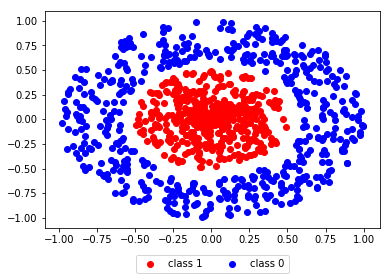

In [2]:
np.random.seed(0)

def generate_dataset(N_points):
    # 1 class
    radiuses = np.random.uniform(0, 0.5, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_1 = np.concatenate((x_1, x_2), axis=1)
    Y_class_1 = np.full((N_points//2,), 1)
        
    # 0 class
    radiuses = np.random.uniform(0.6, 1, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_0 = np.concatenate((x_1, x_2), axis=1)
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y
    
N_points = 1000
X, Y = generate_dataset(N_points)

plt.scatter(X[:N_points//2, 0], X[:N_points//2, 1], color='red', label='class 1') 
plt.scatter(X[N_points//2:, 0], X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

### The neural network
As we can see from the dataset above, the data point are defined as $ 
\begin{equation} 
    \begin{split}
        \mathbf{x} = 
                        \begin{bmatrix}
                            x_1 \\
                            x_2 \\
                        \end{bmatrix}
    \end{split}
\end{equation}
$. Therefore the input layer of the network must have two units. We want to classify the data points as being either class "1" or class "0", then the output layer of the network must contain a single unit. Between the input and the output layers, we add a hidden layer with 3 units. The full network looks like:

<img style="width: 600px;" src="data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+Cjwh%0D%0ALS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoK%0D%0APHN2ZwogICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iCiAgIHht%0D%0AbG5zOmNjPSJodHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMiCiAgIHhtbG5zOnJkZj0iaHR0%0D%0AcDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyIKICAgeG1sbnM6c3ZnPSJo%0D%0AdHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIw%0D%0AMDAvc3ZnIgogICB4bWxuczpzb2RpcG9kaT0iaHR0cDovL3NvZGlwb2RpLnNvdXJjZWZvcmdlLm5l%0D%0AdC9EVEQvc29kaXBvZGktMC5kdGQiCiAgIHhtbG5zOmlua3NjYXBlPSJodHRwOi8vd3d3Lmlua3Nj%0D%0AYXBlLm9yZy9uYW1lc3BhY2VzL2lua3NjYXBlIgogICB3aWR0aD0iMTA2LjkyOTQ1bW0iCiAgIGhl%0D%0AaWdodD0iMTAxLjI4MjE1bW0iCiAgIHZpZXdCb3g9IjAgMCAxMDYuOTI5NDUgMTAxLjI4MjE1Igog%0D%0AICB2ZXJzaW9uPSIxLjEiCiAgIGlkPSJzdmc4IgogICBpbmtzY2FwZTp2ZXJzaW9uPSIwLjkyLjIg%0D%0AKDVjM2U4MGQsIDIwMTctMDgtMDYpIgogICBzb2RpcG9kaTpkb2NuYW1lPSJuZXVyYWxfbmV0d29y%0D%0Aa19wcmFjdGljZS5zdmciCiAgIGlua3NjYXBlOmV4cG9ydC1maWxlbmFtZT0iL2hvbWUvcm9tYWlu%0D%0AL3Byb2plY3RzL2JhY2twcm9wYWdhdGlvbi9zdGF0aWMvaW1hZ2VzL25ldXJhbF9uZXR3b3JrX3By%0D%0AYWN0aWNlLnBuZyIKICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgaW5rc2NhcGU6ZXhw%0D%0Ab3J0LXlkcGk9IjMwMCI+CiAgPGRlZnMKICAgICBpZD0iZGVmczIiIC8+CiAgPHNvZGlwb2RpOm5h%0D%0AbWVkdmlldwogICAgIGlkPSJiYXNlIgogICAgIHBhZ2Vjb2xvcj0iI2ZmZmZmZiIKICAgICBib3Jk%0D%0AZXJjb2xvcj0iIzY2NjY2NiIKICAgICBib3JkZXJvcGFjaXR5PSIxLjAiCiAgICAgaW5rc2NhcGU6%0D%0AcGFnZW9wYWNpdHk9IjAuMCIKICAgICBpbmtzY2FwZTpwYWdlc2hhZG93PSIyIgogICAgIGlua3Nj%0D%0AYXBlOnpvb209IjAuOTg5OTQ5NSIKICAgICBpbmtzY2FwZTpjeD0iLTk0LjcxMjE4IgogICAgIGlu%0D%0Aa3NjYXBlOmN5PSIyNDYuMTM1OCIKICAgICBpbmtzY2FwZTpkb2N1bWVudC11bml0cz0ibW0iCiAg%0D%0AICAgaW5rc2NhcGU6Y3VycmVudC1sYXllcj0ibGF5ZXIxIgogICAgIHNob3dncmlkPSJmYWxzZSIK%0D%0AICAgICBpbmtzY2FwZTp3aW5kb3ctd2lkdGg9IjE5MjAiCiAgICAgaW5rc2NhcGU6d2luZG93LWhl%0D%0AaWdodD0iMTA1MiIKICAgICBpbmtzY2FwZTp3aW5kb3cteD0iMCIKICAgICBpbmtzY2FwZTp3aW5k%0D%0Ab3cteT0iMCIKICAgICBpbmtzY2FwZTp3aW5kb3ctbWF4aW1pemVkPSIxIgogICAgIGZpdC1tYXJn%0D%0AaW4tdG9wPSIwIgogICAgIGZpdC1tYXJnaW4tbGVmdD0iMCIKICAgICBmaXQtbWFyZ2luLXJpZ2h0%0D%0APSIwIgogICAgIGZpdC1tYXJnaW4tYm90dG9tPSIwIiAvPgogIDxtZXRhZGF0YQogICAgIGlkPSJt%0D%0AZXRhZGF0YTUiPgogICAgPHJkZjpSREY+CiAgICAgIDxjYzpXb3JrCiAgICAgICAgIHJkZjphYm91%0D%0AdD0iIj4KICAgICAgICA8ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD4KICAgICAg%0D%0AICA8ZGM6dHlwZQogICAgICAgICAgIHJkZjpyZXNvdXJjZT0iaHR0cDovL3B1cmwub3JnL2RjL2Rj%0D%0AbWl0eXBlL1N0aWxsSW1hZ2UiIC8+CiAgICAgICAgPGRjOnRpdGxlIC8+CiAgICAgIDwvY2M6V29y%0D%0Aaz4KICAgIDwvcmRmOlJERj4KICA8L21ldGFkYXRhPgogIDxnCiAgICAgaW5rc2NhcGU6bGFiZWw9%0D%0AIkxheWVyIDEiCiAgICAgaW5rc2NhcGU6Z3JvdXBtb2RlPSJsYXllciIKICAgICBpZD0ibGF5ZXIx%0D%0AIgogICAgIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0zNi4yODU3MTIsLTIwLjYwODI1OSkiPgogICAg%0D%0APGNpcmNsZQogICAgICAgaWQ9InBhdGgzNjk5IgogICAgICAgY3g9IjQ4LjM5OTIwNCIKICAgICAg%0D%0AIGN5PSI3Mi42MjY1NDkiCiAgICAgICByPSIxMC43NzcxNDIiCiAgICAgICBzdHlsZT0iZmlsbDoj%0D%0AMzQ5YWNlO2ZpbGwtb3BhY2l0eTowLjYwNDI3ODA5O3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDow%0D%0ALjM3Nzc5Mzk0O3N0cm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lIgogICAg%0D%0AICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBp%0D%0APSIzMDAiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmlsbDojMzQ5YWNlO2ZpbGwtb3Bh%0D%0AY2l0eTowLjYwNDI3ODA5O3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjM3Nzc5Mzk0O3N0cm9r%0D%0AZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lIgogICAgICAgcj0iMTAuNzc3MTQy%0D%0AIgogICAgICAgY3k9Ijk3LjIwMjk1IgogICAgICAgY3g9IjQ4LjM5OTIwNCIKICAgICAgIGlkPSJj%0D%0AaXJjbGUzNzAxIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3Nj%0D%0AYXBlOmV4cG9ydC15ZHBpPSIzMDAiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBpZD0iY2lyY2xlMzcy%0D%0AMSIKICAgICAgIGN4PSI4OC4xMzg0MiIKICAgICAgIGN5PSI4NS4yMDA1MTYiCiAgICAgICByPSIx%0D%0AMC43NzcxNDIiCiAgICAgICBzdHlsZT0iZmlsbDojMzQ5YWNlO2ZpbGwtb3BhY2l0eTowLjM5NTcy%0D%0AMTkxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjM3NzE5OTkyIgogICAgICAgaW5rc2NhcGU6%0D%0AZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiIC8+CiAg%0D%0AICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmlsbDojMzQ5YWNlO2ZpbGwtb3BhY2l0eTowLjM5NTcy%0D%0AMTkxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjM3NzE5OTkyIgogICAgICAgcj0iMTAuNzc3%0D%0AMTQyIgogICAgICAgY3k9IjEwOS43NzY5MiIKICAgICAgIGN4PSI4OC4xMzg0MiIKICAgICAgIGlk%0D%0APSJjaXJjbGUzNzIzIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlu%0D%0Aa3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmls%0D%0AbDojMzQ5YWNlO2ZpbGwtb3BhY2l0eTowLjM5NTcyMTkxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0%0D%0AaDowLjM3NzE5OTkyIgogICAgICAgcj0iMTAuNzc3MTQyIgogICAgICAgY3k9IjYwLjYyNDExMSIK%0D%0AICAgICAgIGN4PSI4OC4xMzg0MiIKICAgICAgIGlkPSJjaXJjbGUzNzI3IgogICAgICAgaW5rc2Nh%0D%0AcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiIC8+%0D%0ACiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmlsbDojMzQ3M2NlO2ZpbGwtb3BhY2l0eToxO3N0%0D%0Acm9rZTpub25lO3N0cm9rZS13aWR0aDowLjM3NzE5OTkyIgogICAgICAgcj0iMTAuNzc3MTQyIgog%0D%0AICAgICAgY3k9Ijg1LjIwMDUxNiIKICAgICAgIGN4PSIxMjUuODYwMzIiCiAgICAgICBpZD0iY2ly%0D%0AY2xlMzgwOSIKICAgICAgIGlua3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2Fw%0D%0AZTpleHBvcnQteWRwaT0iMzAwIiAvPgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7%0D%0Ac3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuMzc3MTk5OTJweDtzdHJva2UtbGluZWNhcDpi%0D%0AdXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0ibSA1%0D%0AOS4zMTEwNiw3My4zMDAxMTYgMTguMDUxNzEyLC0xMi4yNTkiCiAgICAgICBpZD0icGF0aDM4MTEi%0D%0ACiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgaW5rc2NhcGU6%0D%0AZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiIC8+CiAg%0D%0AICA8cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lk%0D%0AdGg6MC4zNzcxOTk5MnB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVy%0D%0AO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBkPSJNIDc3LjM2Mjc3Miw4NS42OTM4MjYgNTkuMzEx%0D%0AMDYsNzMuMzAwMTE2IDc3LjQ5NzQ4NiwxMTAuODg1NCIKICAgICAgIGlkPSJwYXRoMzgxMyIKICAg%0D%0AICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBpbmtzY2FwZTpleHBv%0D%0AcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCIgLz4KICAgIDxw%0D%0AYXRoCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDow%0D%0ALjM3NzE5OTkycHg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ry%0D%0Ab2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0gNzcuMzYyNzcyLDYxLjA0MTExNiA1OS4zMTEwNiw5%0D%0AOC4zNTY5NjggNzcuMzYyNzcyLDg1LjY5MzgyNiIKICAgICAgIGlkPSJwYXRoMzgxNSIKICAgICAg%0D%0AIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQt%0D%0AeGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCIgLz4KICAgIDxwYXRo%0D%0ACiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjM3%0D%0ANzE5OTkycHg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tl%0D%0ALW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0gNTkuMzExMDYsOTguMzU2OTY4IDc3LjQ5NzQ4NCwxMTAu%0D%0AODg1NCIKICAgICAgIGlkPSJwYXRoMzgxNyIKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2%0D%0AYXR1cmU9IjAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2Nh%0D%0AcGU6ZXhwb3J0LXlkcGk9IjMwMCIgLz4KICAgIDxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDpub25l%0D%0AO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjM3NzE5OTkycHg7c3Ryb2tlLWxpbmVjYXA6%0D%0AYnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0g%0D%0AOTguOTczMzgxLDYwLjM2NzU0NCAxMTUuMTM5MSw4NS40MjQzOTcgdiAwIEggOTguOTczMzgxIgog%0D%0AICAgICAgaWQ9InBhdGgzODMxIgogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0i%0D%0AMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBv%0D%0AcnQteWRwaT0iMzAwIiAvPgogICAgPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tl%0D%0AOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuMzc3MTk5OTJweDtzdHJva2UtbGluZWNhcDpidXR0O3N0%0D%0Acm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0iTSA5OS4xMDgx%0D%0AMDIsMTEwLjc1MDY4IDExNS4xMzkxLDg1LjQyNDM5NyIKICAgICAgIGlkPSJwYXRoMzgzMyIKICAg%0D%0AICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAiCiAgICAgICBpbmtzY2FwZTpleHBv%0D%0AcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCIgLz4KICAgIDx0%0D%0AZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6%0D%0Abm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6NS4wNTU0OTUyNnB4O2xpbmUtaGVp%0D%0AZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1z%0D%0AcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tl%0D%0ALXdpZHRoOjAuMTI2Mzg3MzciCiAgICAgICB4PSI0NC4wODc4ODciCiAgICAgICB5PSIyOC41MDUw%0D%0ANzIiCiAgICAgICBpZD0idGV4dDQ2NDIiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAw%0D%0AIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAgICAgICAgIHNvZGlw%0D%0Ab2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjQ2NDAiCiAgICAgICAgIHg9IjQ0LjA4%0D%0ANzg4NyIKICAgICAgICAgeT0iMjguNTA1MDcyIgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRo%0D%0AOjAuMTI2Mzg3MzciPklucHV0PC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNw%0D%0AYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdo%0D%0AdDpub3JtYWw7Zm9udC1zaXplOjUuMDU1NDk1MjZweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFt%0D%0AaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDoj%0D%0AMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjEyNjM4NzM3%0D%0AIgogICAgICAgeD0iODAuNDM5NzUxIgogICAgICAgeT0iMjUuODIwOTQ4IgogICAgICAgaWQ9InRl%0D%0AeHQ0NjU0IgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBl%0D%0AOmV4cG9ydC15ZHBpPSIzMDAiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIgog%0D%0AICAgICAgICBpZD0idHNwYW40NjUwIgogICAgICAgICB4PSI4MC40Mzk3NTEiCiAgICAgICAgIHk9%0D%0AIjI1LjgyMDk0OCIKICAgICAgICAgc3R5bGU9InN0cm9rZS13aWR0aDowLjEyNjM4NzM3Ij5IaWRk%0D%0AZW48L3RzcGFuPjx0c3BhbgogICAgICAgICBpZD0idHNwYW40NjUyIgogICAgICAgICBzb2RpcG9k%0D%0AaTpyb2xlPSJsaW5lIgogICAgICAgICB4PSI4MC40Mzk3NTEiCiAgICAgICAgIHk9IjMyLjE0MDMx%0D%0ANiIKICAgICAgICAgc3R5bGU9InN0cm9rZS13aWR0aDowLjEyNjM4NzM3Ij5MYXllciAxPC90c3Bh%0D%0Abj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgaWQ9InRleHQ0NjU4IgogICAgICAgeT0iMjguNjg0%0D%0AMDExIgogICAgICAgeD0iMTE5LjA4ODQxIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFs%0D%0AO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6NS4wNTU0OTUyNnB4O2xpbmUtaGVpZ2h0OjEu%0D%0AMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5n%0D%0AOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRo%0D%0AOjAuMTI2Mzg3MzciCiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgaW5rc2NhcGU6%0D%0AZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiPjx0c3Bh%0D%0AbgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMTI2Mzg3MzciCiAgICAgICAgIHk9IjI4%0D%0ALjY4NDAxMSIKICAgICAgICAgeD0iMTE5LjA4ODQxIgogICAgICAgICBpZD0idHNwYW40NjU2Igog%0D%0AICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj5PdXRwdXQ8L3RzcGFuPjwvdGV4dD4KICAgIDx0%0D%0AZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6%0D%0Abm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6Mi45NTcwODk0MnB4O2xpbmUtaGVp%0D%0AZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1z%0D%0AcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tl%0D%0ALXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICB4PSI2MS44NTQzMDEiCiAgICAgICB5PSI2NC44NzI4%0D%0ANDkiCiAgICAgICBpZD0idGV4dDYyIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIK%0D%0AICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiPjx0c3BhbgogICAgICAgICBzb2RpcG9k%0D%0AaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNwYW42MCIKICAgICAgICAgeD0iNjEuODU0MzAx%0D%0AIgogICAgICAgICB5PSI2NC44NzI4NDkiCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4w%0D%0ANzM5MjcyMyI+dzwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJl%0D%0Ac2VydmUiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFs%0D%0AO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5z%0D%0ALXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtm%0D%0AaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAg%0D%0AIHg9IjYzLjY0NjU2OCIKICAgICAgIHk9IjYyLjY2OTg2MSIKICAgICAgIGlkPSJ0ZXh0NjYiCiAg%0D%0AICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlk%0D%0AcGk9IjMwMCI+PHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlk%0D%0APSJ0c3BhbjY0IgogICAgICAgICB4PSI2My42NDY1NjgiCiAgICAgICAgIHk9IjYyLjY2OTg2MSIK%0D%0AICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjQ3ODU0NDcxcHg7c3Ryb2tlLXdpZHRoOjAuMDcz%0D%0AOTI3MjMiPigxKTwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJl%0D%0Ac2VydmUiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFs%0D%0AO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5z%0D%0ALXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtm%0D%0AaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAg%0D%0AIHg9IjYzLjc1ODU4NyIKICAgICAgIHk9IjY2LjEwNTAzNCIKICAgICAgIGlkPSJ0ZXh0NzAiCiAg%0D%0AICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlk%0D%0AcGk9IjMwMCI+PHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlk%0D%0APSJ0c3BhbjY4IgogICAgICAgICB4PSI2My43NTg1ODciCiAgICAgICAgIHk9IjY2LjEwNTAzNCIK%0D%0AICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjQ3ODU0NDcxcHg7c3Ryb2tlLXdpZHRoOjAuMDcz%0D%0AOTI3MjMiPigxLDEpPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgaWQ9InRleHQxNjAi%0D%0ACiAgICAgICB5PSIxMDguMTAwNzEiCiAgICAgICB4PSI2MS44NTQzMDEiCiAgICAgICBzdHlsZT0i%0D%0AZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToyLjk1NzA4OTQy%0D%0AcHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5n%0D%0AOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6%0D%0Abm9uZTtzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUi%0D%0ACiAgICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0%0D%0ALXlkcGk9IjMwMCI+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4wNzM5Mjcy%0D%0AMyIKICAgICAgICAgeT0iMTA4LjEwMDcxIgogICAgICAgICB4PSI2MS44NTQzMDEiCiAgICAgICAg%0D%0AIGlkPSJ0c3BhbjE1OCIKICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSI+dzwvdHNwYW4+PC90%0D%0AZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0MTY0IgogICAgICAgeT0iMTA1Ljg5NzciCiAg%0D%0AICAgICB4PSI2My42NDY1NjgiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13%0D%0AZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250%0D%0ALWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2Zp%0D%0AbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzM5%0D%0AMjcyMyIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBpbmtzY2FwZTpleHBvcnQt%0D%0AeGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAgICAg%0D%0AICAgIHN0eWxlPSJmb250LXNpemU6MS40Nzg1NDQ3MXB4O3N0cm9rZS13aWR0aDowLjA3MzkyNzIz%0D%0AIgogICAgICAgICB5PSIxMDUuODk3NyIKICAgICAgICAgeD0iNjMuNjQ2NTY4IgogICAgICAgICBp%0D%0AZD0idHNwYW4xNjIiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPigxKTwvdHNwYW4+PC90%0D%0AZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0MTY4IgogICAgICAgeT0iMTA5LjMzMjkiCiAg%0D%0AICAgICB4PSI2My43NTg1ODciCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13%0D%0AZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250%0D%0ALWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2Zp%0D%0AbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzM5%0D%0AMjcyMyIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBpbmtzY2FwZTpleHBvcnQt%0D%0AeGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAgICAg%0D%0AICAgIHN0eWxlPSJmb250LXNpemU6MS40Nzg1NDQ3MXB4O3N0cm9rZS13aWR0aDowLjA3MzkyNzIz%0D%0AIgogICAgICAgICB5PSIxMDkuMzMyOSIKICAgICAgICAgeD0iNjMuNzU4NTg3IgogICAgICAgICBp%0D%0AZD0idHNwYW4xNjYiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPigyLDMpPC90c3Bhbj48%0D%0AL3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxl%0D%0APSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjIuOTU3MDg5%0D%0ANDJweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNp%0D%0Abmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9r%0D%0AZTpub25lO3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIgogICAgICAgeD0iMTA2LjI4MDQyIgogICAg%0D%0AICAgeT0iNjguMTQ3MzMxIgogICAgICAgaWQ9InRleHQxOTYiCiAgICAgICBpbmtzY2FwZTpleHBv%0D%0AcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAg%0D%0AICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjE5NCIKICAgICAg%0D%0AICAgeD0iMTA2LjI4MDQyIgogICAgICAgICB5PSI2OC4xNDczMzEiCiAgICAgICAgIHN0eWxlPSJz%0D%0AdHJva2Utd2lkdGg6MC4wNzM5MjcyMyI+dzwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAg%0D%0AIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9u%0D%0AdC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtm%0D%0Ab250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4%0D%0AO2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4w%0D%0ANzM5MjcyMyIKICAgICAgIHg9IjEwOC4wNzI2OCIKICAgICAgIHk9IjY1Ljk0NDM0NCIKICAgICAg%0D%0AIGlkPSJ0ZXh0MjAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlu%0D%0Aa3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJs%0D%0AaW5lIgogICAgICAgICBpZD0idHNwYW4xOTgiCiAgICAgICAgIHg9IjEwOC4wNzI2OCIKICAgICAg%0D%0AICAgeT0iNjUuOTQ0MzQ0IgogICAgICAgICBzdHlsZT0iZm9udC1zaXplOjEuNDc4NTQ0NzFweDtz%0D%0AdHJva2Utd2lkdGg6MC4wNzM5MjcyMyI+KDIpPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAg%0D%0AICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtm%0D%0Ab250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjIuOTU3MDg5NDJweDtsaW5lLWhlaWdodDoxLjI1%0D%0AO2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzow%0D%0AcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDow%0D%0ALjA3MzkyNzIzIgogICAgICAgeD0iMTA4LjE4NDY5IgogICAgICAgeT0iNjkuMzc5NTE3IgogICAg%0D%0AICAgaWQ9InRleHQyMDQiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAwIgogICAgICAg%0D%0AaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9%0D%0AImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjIwMiIKICAgICAgICAgeD0iMTA4LjE4NDY5IgogICAg%0D%0AICAgICB5PSI2OS4zNzk1MTciCiAgICAgICAgIHN0eWxlPSJmb250LXNpemU6MS40Nzg1NDQ3MXB4%0D%0AO3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIj4oMSwxKTwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQK%0D%0AICAgICAgIGlkPSJ0ZXh0MjA4IgogICAgICAgeT0iODMuNzQyNTk5IgogICAgICAgeD0iMTAxLjM0%0D%0AMTkzIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtm%0D%0Ab250LXNpemU6Mi45NTcwODk0MnB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1z%0D%0AZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7Zmls%0D%0AbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICB4%0D%0AbWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAg%0D%0AICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiPjx0c3BhbgogICAgICAgICBzdHlsZT0ic3Ry%0D%0Ab2tlLXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICAgIHk9IjgzLjc0MjU5OSIKICAgICAgICAgeD0i%0D%0AMTAxLjM0MTkzIgogICAgICAgICBpZD0idHNwYW4yMDYiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9%0D%0AImxpbmUiPnc8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDIxMiIKICAg%0D%0AICAgIHk9IjgxLjUzOTYwNCIKICAgICAgIHg9IjEwMy4xMzQxOSIKICAgICAgIHN0eWxlPSJmb250%0D%0ALXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjIuOTU3MDg5NDJweDts%0D%0AaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4%0D%0AO3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25l%0D%0AO3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAg%0D%0AICAgIGlua3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteWRw%0D%0AaT0iMzAwIj48dHNwYW4KICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjQ3ODU0NDcxcHg7c3Ry%0D%0Ab2tlLXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICAgIHk9IjgxLjUzOTYwNCIKICAgICAgICAgeD0i%0D%0AMTAzLjEzNDE5IgogICAgICAgICBpZD0idHNwYW4yMTAiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9%0D%0AImxpbmUiPigyKTwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0MjE2Igog%0D%0AICAgICAgeT0iODQuOTc0Nzg1IgogICAgICAgeD0iMTAzLjI0NjE4IgogICAgICAgc3R5bGU9ImZv%0D%0AbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6Mi45NTcwODk0MnB4%0D%0AO2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzow%0D%0AcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5v%0D%0AbmU7c3Ryb2tlLXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgog%0D%0AICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC15%0D%0AZHBpPSIzMDAiPjx0c3BhbgogICAgICAgICBzdHlsZT0iZm9udC1zaXplOjEuNDc4NTQ0NzFweDtz%0D%0AdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAgICAgeT0iODQuOTc0Nzg1IgogICAgICAgICB4%0D%0APSIxMDMuMjQ2MTgiCiAgICAgICAgIGlkPSJ0c3BhbjIxNCIKICAgICAgICAgc29kaXBvZGk6cm9s%0D%0AZT0ibGluZSI+KDIsMSk8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDIz%0D%0AMiIKICAgICAgIHk9IjEwMi4wNjcwMyIKICAgICAgIHg9IjEwNi4yODA0MiIKICAgICAgIHN0eWxl%0D%0APSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjIuOTU3MDg5%0D%0ANDJweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNp%0D%0Abmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9r%0D%0AZTpub25lO3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2%0D%0AZSIKICAgICAgIGlua3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBv%0D%0AcnQteWRwaT0iMzAwIj48dHNwYW4KICAgICAgICAgc3R5bGU9InN0cm9rZS13aWR0aDowLjA3Mzky%0D%0ANzIzIgogICAgICAgICB5PSIxMDIuMDY3MDMiCiAgICAgICAgIHg9IjEwNi4yODA0MiIKICAgICAg%0D%0AICAgaWQ9InRzcGFuMjMwIgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj53PC90c3Bhbj48%0D%0AL3RleHQ+CiAgICA8dGV4dAogICAgICAgaWQ9InRleHQyMzYiCiAgICAgICB5PSI5OS44NjQwNDQi%0D%0ACiAgICAgICB4PSIxMDguMDcyNjgiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9u%0D%0AdC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtm%0D%0Ab250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4%0D%0AO2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4w%0D%0ANzM5MjcyMyIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBpbmtzY2FwZTpleHBv%0D%0AcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAg%0D%0AICAgICAgIHN0eWxlPSJmb250LXNpemU6MS40Nzg1NDQ3MXB4O3N0cm9rZS13aWR0aDowLjA3Mzky%0D%0ANzIzIgogICAgICAgICB5PSI5OS44NjQwNDQiCiAgICAgICAgIHg9IjEwOC4wNzI2OCIKICAgICAg%0D%0AICAgaWQ9InRzcGFuMjM0IgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj4oMik8L3RzcGFu%0D%0APjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDI0MCIKICAgICAgIHk9IjEwMy4yOTky%0D%0AMiIKICAgICAgIHg9IjEwOC4xODQ2OSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtm%0D%0Ab250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjIuOTU3MDg5NDJweDtsaW5lLWhlaWdodDoxLjI1%0D%0AO2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzow%0D%0AcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDow%0D%0ALjA3MzkyNzIzIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIGlua3NjYXBlOmV4%0D%0AcG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteWRwaT0iMzAwIj48dHNwYW4K%0D%0AICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjQ3ODU0NDcxcHg7c3Ryb2tlLXdpZHRoOjAuMDcz%0D%0AOTI3MjMiCiAgICAgICAgIHk9IjEwMy4yOTkyMiIKICAgICAgICAgeD0iMTA4LjE4NDY5IgogICAg%0D%0AICAgICBpZD0idHNwYW4yMzgiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPigzLDEpPC90%0D%0Ac3Bhbj48L3RleHQ+CiAgICA8Y2lyY2xlCiAgICAgICBzdHlsZT0iZmlsbDojZmYwMDAwO2ZpbGwt%0D%0Ab3BhY2l0eTowLjYwNDI3ODA5O3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjE5MDQxMDY2O3N0%0D%0Acm9rZS1taXRlcmxpbWl0OjQ7c3Ryb2tlLWRhc2hhcnJheTpub25lIgogICAgICAgcj0iNS40MzE3%0D%0ANTEzIgogICAgICAgY3k9IjQ1LjYzMjMyNCIKICAgICAgIGN4PSI1OC41NTU0NDciCiAgICAgICBp%0D%0AZD0iY2lyY2xlMTA3IgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlu%0D%0Aa3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiIC8+CiAgICA8Y2lyY2xlCiAgICAgICBpZD0iY2lyY2xl%0D%0AMTA5IgogICAgICAgY3g9IjEwMy45ODU3IgogICAgICAgY3k9IjQ1LjYzMjMyNCIKICAgICAgIHI9%0D%0AIjUuNDMxNzUxMyIKICAgICAgIHN0eWxlPSJmaWxsOiNmZjAwMDA7ZmlsbC1vcGFjaXR5OjAuNjA0%0D%0AMjc4MDk7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMTkwNDEwNjY7c3Ryb2tlLW1pdGVybGlt%0D%0AaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmUiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0i%0D%0AMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCIgLz4KICAgIDxwYXRoCiAgICAg%0D%0AICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgaWQ9InBhdGgxMTEiCiAg%0D%0AICAgICBkPSJNIDYzLjkyMTQ1OSw0NS43MDQ1MzcgNzcuMzYyNzcyLDYxLjA0MTExNiIKICAgICAg%0D%0AIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuMzc3MTk5OTJw%0D%0AeDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0%0D%0AeToxIgogICAgICAgc29kaXBvZGk6bm9kZXR5cGVzPSJjYyIKICAgICAgIGlua3NjYXBlOmV4cG9y%0D%0AdC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteWRwaT0iMzAwIiAvPgogICAgPHBh%0D%0AdGgKICAgICAgIHNvZGlwb2RpOm5vZGV0eXBlcz0iY2MiCiAgICAgICBzdHlsZT0iZmlsbDpub25l%0D%0AO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjM3NzE5OTkycHg7c3Ryb2tlLWxpbmVjYXA6%0D%0AYnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0g%0D%0ANjMuOTIxNDU5LDQ1LjcwNDUzNyA3Ny4zNjI3NzIsODUuNjkzODI2IgogICAgICAgaWQ9InBhdGgx%0D%0AMTMiCiAgICAgICBpbmtzY2FwZTpjb25uZWN0b3ItY3VydmF0dXJlPSIwIgogICAgICAgaW5rc2Nh%0D%0AcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiIC8+%0D%0ACiAgICA8cGF0aAogICAgICAgaW5rc2NhcGU6Y29ubmVjdG9yLWN1cnZhdHVyZT0iMCIKICAgICAg%0D%0AIGlkPSJwYXRoMTE1IgogICAgICAgZD0iTSA2My45MjE0NTksNDUuNzA0NTM3IDc3LjQ5NzQ4Niwx%0D%0AMTAuODg1NCIKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdp%0D%0AZHRoOjAuMzc3MTk5OTJweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRl%0D%0AcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgc29kaXBvZGk6bm9kZXR5cGVzPSJjYyIKICAgICAg%0D%0AIGlua3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteWRwaT0i%0D%0AMzAwIiAvPgogICAgPHBhdGgKICAgICAgIGlua3NjYXBlOmNvbm5lY3Rvci1jdXJ2YXR1cmU9IjAi%0D%0ACiAgICAgICBpZD0icGF0aDExNyIKICAgICAgIGQ9Im0gMTA5LjQ2MjIyLDQ1LjgxNTQ2MSA1LjY3%0D%0ANjg4LDM5LjYwODkzNiB2IDAgSCA5OC45NzMzODEiCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0%0D%0Acm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjM3NzE5OTkycHg7c3Ryb2tlLWxpbmVjYXA6YnV0%0D%0AdDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIHNvZGlwb2Rp%0D%0AOm5vZGV0eXBlcz0iY2NjYyIKICAgICAgIGlua3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAg%0D%0AICBpbmtzY2FwZTpleHBvcnQteWRwaT0iMzAwIiAvPgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0%0D%0AMTIxIgogICAgICAgeT0iNTYuNTI0NTYzIgogICAgICAgeD0iMTEyLjA0NDU2IgogICAgICAgc3R5%0D%0AbGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6Mi45NTcw%0D%0AODk0MnB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3Bh%0D%0AY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ry%0D%0Ab2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICB4bWw6c3BhY2U9InByZXNl%0D%0AcnZlIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4%0D%0AcG9ydC15ZHBpPSIzMDAiPjx0c3BhbgogICAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuMDcz%0D%0AOTI3MjMiCiAgICAgICAgIHk9IjU2LjUyNDU2MyIKICAgICAgICAgeD0iMTEyLjA0NDU2IgogICAg%0D%0AICAgICBpZD0idHNwYW4xMTkiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPmI8L3RzcGFu%0D%0APjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDEyNSIKICAgICAgIHk9IjU0LjMyMTU3%0D%0ANSIKICAgICAgIHg9IjExMy44MzY4MSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtm%0D%0Ab250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjIuOTU3MDg5NDJweDtsaW5lLWhlaWdodDoxLjI1%0D%0AO2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzow%0D%0AcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDow%0D%0ALjA3MzkyNzIzIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIGlua3NjYXBlOmV4%0D%0AcG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteWRwaT0iMzAwIj48dHNwYW4K%0D%0AICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjQ3ODU0NDcxcHg7c3Ryb2tlLXdpZHRoOjAuMDcz%0D%0AOTI3MjMiCiAgICAgICAgIHk9IjU0LjMyMTU3NSIKICAgICAgICAgeD0iMTEzLjgzNjgxIgogICAg%0D%0AICAgICBpZD0idHNwYW4xMjMiCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiPigyKTwvdHNw%0D%0AYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIGlkPSJ0ZXh0MTI5IgogICAgICAgeT0iNTcuNzU2%0D%0ANzQ4IgogICAgICAgeD0iMTEzLjk0ODgzIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFs%0D%0AO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6Mi45NTcwODk0MnB4O2xpbmUtaGVpZ2h0OjEu%0D%0AMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5n%0D%0AOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRo%0D%0AOjAuMDczOTI3MjMiCiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgaW5rc2NhcGU6%0D%0AZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiPjx0c3Bh%0D%0AbgogICAgICAgICBzdHlsZT0iZm9udC1zaXplOjEuNDc4NTQ0NzFweDtzdHJva2Utd2lkdGg6MC4w%0D%0ANzM5MjcyMyIKICAgICAgICAgeT0iNTcuNzU2NzQ4IgogICAgICAgICB4PSIxMTMuOTQ4ODMiCiAg%0D%0AICAgICAgIGlkPSJ0c3BhbjEyNyIKICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSI+KDEpPC90%0D%0Ac3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgaWQ9InRleHQxMzMiCiAgICAgICB5PSI0Ni40%0D%0ANDY1MSIKICAgICAgIHg9IjY2LjY3MzUiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7%0D%0AZm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4y%0D%0ANTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6%0D%0AMHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6%0D%0AMC4wNzM5MjcyMyIKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBpbmtzY2FwZTpl%0D%0AeHBvcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFu%0D%0ACiAgICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAgICAgeT0iNDYu%0D%0ANDQ2NTEiCiAgICAgICAgIHg9IjY2LjY3MzUiCiAgICAgICAgIGlkPSJ0c3BhbjEzMSIKICAgICAg%0D%0AICAgc29kaXBvZGk6cm9sZT0ibGluZSI+YjwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAg%0D%0AIGlkPSJ0ZXh0MTM3IgogICAgICAgeT0iNDQuMjQzNTIzIgogICAgICAgeD0iNjguNDY1NzY3Igog%0D%0AICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNp%0D%0AemU6Mi45NTcwODk0MnB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjts%0D%0AZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFj%0D%0AaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICB4bWw6c3Bh%0D%0AY2U9InByZXNlcnZlIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIKICAgICAgIGlu%0D%0Aa3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiPjx0c3BhbgogICAgICAgICBzdHlsZT0iZm9udC1zaXpl%0D%0AOjEuNDc4NTQ0NzFweDtzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAgICAgeT0iNDQuMjQz%0D%0ANTIzIgogICAgICAgICB4PSI2OC40NjU3NjciCiAgICAgICAgIGlkPSJ0c3BhbjEzNSIKICAgICAg%0D%0AICAgc29kaXBvZGk6cm9sZT0ibGluZSI+KDEpPC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAg%0D%0AICAgaWQ9InRleHQxNDEiCiAgICAgICB5PSI0Ny42Nzg2OTYiCiAgICAgICB4PSI2OC41Nzc3ODIi%0D%0ACiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQt%0D%0Ac2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlm%0D%0AO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9w%0D%0AYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAgIHhtbDpz%0D%0AcGFjZT0icHJlc2VydmUiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAwIgogICAgICAg%0D%0AaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAgICAgICAgIHN0eWxlPSJmb250LXNp%0D%0AemU6MS40Nzg1NDQ3MXB4O3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIgogICAgICAgICB5PSI0Ny42%0D%0ANzg2OTYiCiAgICAgICAgIHg9IjY4LjU3Nzc4MiIKICAgICAgICAgaWQ9InRzcGFuMTM5IgogICAg%0D%0AICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIj4oMSk8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAg%0D%0AICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFs%0D%0AO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6Mi45NTcwODk0MnB4O2xpbmUtaGVpZ2h0OjEu%0D%0AMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjtsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5n%0D%0AOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRo%0D%0AOjAuMDczOTI3MjMiCiAgICAgICB4PSI2Ni42NzM1IgogICAgICAgeT0iNDYuNDQ2NTEiCiAgICAg%0D%0AICBpZD0idGV4dDE0NSIKICAgICAgIGlua3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBp%0D%0AbmtzY2FwZTpleHBvcnQteWRwaT0iMzAwIj48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0i%0D%0AbGluZSIKICAgICAgICAgaWQ9InRzcGFuMTQzIgogICAgICAgICB4PSI2Ni42NzM1IgogICAgICAg%0D%0AICB5PSI0Ni40NDY1MSIKICAgICAgICAgc3R5bGU9InN0cm9rZS13aWR0aDowLjA3MzkyNzIzIj5i%0D%0APC90c3Bhbj48L3RleHQ+CiAgICA8dGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAg%0D%0AICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXpl%0D%0AOjIuOTU3MDg5NDJweDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0%0D%0AdGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0%0D%0AeToxO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIgogICAgICAgeD0iNjguNDY1%0D%0ANzY3IgogICAgICAgeT0iNDQuMjQzNTIzIgogICAgICAgaWQ9InRleHQxNDkiCiAgICAgICBpbmtz%0D%0AY2FwZTpleHBvcnQteGRwaT0iMzAwIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+%0D%0APHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjE0%0D%0ANyIKICAgICAgICAgeD0iNjguNDY1NzY3IgogICAgICAgICB5PSI0NC4yNDM1MjMiCiAgICAgICAg%0D%0AIHN0eWxlPSJmb250LXNpemU6MS40Nzg1NDQ3MXB4O3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIj4o%0D%0AMSk8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgog%0D%0AICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNp%0D%0AemU6Mi45NTcwODk0MnB4O2xpbmUtaGVpZ2h0OjEuMjU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjts%0D%0AZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFj%0D%0AaXR5OjE7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICB4PSI2OC41%0D%0ANzc3ODIiCiAgICAgICB5PSI0Ny42Nzg2OTYiCiAgICAgICBpZD0idGV4dDE1MyIKICAgICAgIGlu%0D%0Aa3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteWRwaT0iMzAw%0D%0AIj48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFu%0D%0AMTUxIgogICAgICAgICB4PSI2OC41Nzc3ODIiCiAgICAgICAgIHk9IjQ3LjY3ODY5NiIKICAgICAg%0D%0AICAgc3R5bGU9ImZvbnQtc2l6ZToxLjQ3ODU0NDcxcHg7c3Ryb2tlLXdpZHRoOjAuMDczOTI3MjMi%0D%0APigxKTwvdHNwYW4+PC90ZXh0PgogICAgPHRleHQKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUi%0D%0ACiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQt%0D%0Ac2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlm%0D%0AO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9w%0D%0AYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAgIHg9IjYw%0D%0ALjM0MjQiCiAgICAgICB5PSI1My44MTcwNDciCiAgICAgICBpZD0idGV4dDE1NyIKICAgICAgIGlu%0D%0Aa3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteWRwaT0iMzAw%0D%0AIj48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFu%0D%0AMTU1IgogICAgICAgICB4PSI2MC4zNDI0IgogICAgICAgICB5PSI1My44MTcwNDciCiAgICAgICAg%0D%0AIHN0eWxlPSJzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyI+YjwvdHNwYW4+PC90ZXh0PgogICAgPHRl%0D%0AeHQKICAgICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpu%0D%0Ab3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWln%0D%0AaHQ6MS4yNTtmb250LWZhbWlseTpzYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNw%0D%0AYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Ut%0D%0Ad2lkdGg6MC4wNzM5MjcyMyIKICAgICAgIHg9IjYyLjEzNDY2NiIKICAgICAgIHk9IjUxLjYxNDA1%0D%0AOSIKICAgICAgIGlkPSJ0ZXh0MTYxIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXhkcGk9IjMwMCIK%0D%0AICAgICAgIGlua3NjYXBlOmV4cG9ydC15ZHBpPSIzMDAiPjx0c3BhbgogICAgICAgICBzb2RpcG9k%0D%0AaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNwYW4xNTkiCiAgICAgICAgIHg9IjYyLjEzNDY2%0D%0ANiIKICAgICAgICAgeT0iNTEuNjE0MDU5IgogICAgICAgICBzdHlsZT0iZm9udC1zaXplOjEuNDc4%0D%0ANTQ0NzFweDtzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyI+KDEpPC90c3Bhbj48L3RleHQ+CiAgICA8%0D%0AdGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxl%0D%0AOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjIuOTU3MDg5NDJweDtsaW5lLWhl%0D%0AaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQt%0D%0Ac3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpub25lO3N0cm9r%0D%0AZS13aWR0aDowLjA3MzkyNzIzIgogICAgICAgeD0iNjIuMjQ2NjgxIgogICAgICAgeT0iNTUuMDQ5%0D%0AMjMyIgogICAgICAgaWQ9InRleHQxNjUiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAw%0D%0AIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAgICAgICAgIHNvZGlw%0D%0Ab2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjE2MyIKICAgICAgICAgeD0iNjIuMjQ2%0D%0ANjgxIgogICAgICAgICB5PSI1NS4wNDkyMzIiCiAgICAgICAgIHN0eWxlPSJmb250LXNpemU6MS40%0D%0ANzg1NDQ3MXB4O3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIj4oMyk8L3RzcGFuPjwvdGV4dD4KICAg%0D%0AIDx0ZXh0CiAgICAgICBpZD0idGV4dDE2OSIKICAgICAgIHk9IjUzLjgxNzA0NyIKICAgICAgIHg9%0D%0AIjYwLjM0MjQiCiAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6bm9y%0D%0AbWFsO2ZvbnQtc2l6ZToyLjk1NzA4OTQycHg7bGluZS1oZWlnaHQ6MS4yNTtmb250LWZhbWlseTpz%0D%0AYW5zLXNlcmlmO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAw%0D%0AMDtmaWxsLW9wYWNpdHk6MTtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAg%0D%0AICAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgICAgICBpbmtzY2FwZTpleHBvcnQteGRwaT0iMzAw%0D%0AIgogICAgICAgaW5rc2NhcGU6ZXhwb3J0LXlkcGk9IjMwMCI+PHRzcGFuCiAgICAgICAgIHN0eWxl%0D%0APSJzdHJva2Utd2lkdGg6MC4wNzM5MjcyMyIKICAgICAgICAgeT0iNTMuODE3MDQ3IgogICAgICAg%0D%0AICB4PSI2MC4zNDI0IgogICAgICAgICBpZD0idHNwYW4xNjciCiAgICAgICAgIHNvZGlwb2RpOnJv%0D%0AbGU9ImxpbmUiPmI8L3RzcGFuPjwvdGV4dD4KICAgIDx0ZXh0CiAgICAgICBpZD0idGV4dDE3MyIK%0D%0AICAgICAgIHk9IjUxLjYxNDA1OSIKICAgICAgIHg9IjYyLjEzNDY2NiIKICAgICAgIHN0eWxlPSJm%0D%0Ab250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjIuOTU3MDg5NDJw%0D%0AeDtsaW5lLWhlaWdodDoxLjI1O2ZvbnQtZmFtaWx5OnNhbnMtc2VyaWY7bGV0dGVyLXNwYWNpbmc6%0D%0AMHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO3N0cm9rZTpu%0D%0Ab25lO3N0cm9rZS13aWR0aDowLjA3MzkyNzIzIgogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIK%0D%0AICAgICAgIGlua3NjYXBlOmV4cG9ydC14ZHBpPSIzMDAiCiAgICAgICBpbmtzY2FwZTpleHBvcnQt%0D%0AeWRwaT0iMzAwIj48dHNwYW4KICAgICAgICAgc3R5bGU9ImZvbnQtc2l6ZToxLjQ3ODU0NDcxcHg7%0D%0Ac3Ryb2tlLXdpZHRoOjAuMDczOTI3MjMiCiAgICAgICAgIHk9IjUxLjYxNDA1OSIKICAgICAgICAg%0D%0AeD0iNjIuMTM0NjY2IgogICAgICAgICBpZD0idHNwYW4xNzEiCiAgICAgICAgIHNvZGlwb2RpOnJv%0D%0AbGU9ImxpbmUiPigxKTwvdHNwYW4+PC90ZXh0PgogIDwvZz4KPC9zdmc+Cg==">

Choosing the right network architecture is more an art than a science, and there is no ground reason to choose the second layer to have 3 units. I encourage you to go and play with the [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.07489&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to realize that. We have already studied a similar architecture before but with a single unit per layer. The previous equations can be easily generalized for layers with more than one unit:


$ \mathbf{z_1} = \mathbf{W_1 x} + \mathbf{b_1} $,  with 
$ 
\begin{equation} 
    \begin{split}
        \mathbf{W_1} = 
                        \begin{bmatrix}
                            w^{(1)}_{1,1}       & w^{(1)}_{2,1} \\
                            w^{(1)}_{1,2}       & w^{(1)}_{2,2} \\
                            w^{(1)}_{1,3}       & w^{(1)}_{2,3} \\
                        \end{bmatrix}
    \end{split}
\end{equation}
$, 
$ 
\begin{equation} 
    \begin{split}
        \mathbf{x} = 
                        \begin{bmatrix}
                            x_1 \\
                            x_2 \\
                        \end{bmatrix}
    \end{split}
\end{equation}
$ and
$ 
\begin{equation} 
    \begin{split}
        \mathbf{b_1} = 
                        \begin{bmatrix}
                            b^{(1)}_{1}\\
                            b^{(1)}_{2}\\
                            b^{(1)}_{3}\\
                        \end{bmatrix}
    \end{split}
\end{equation}
$


$ \mathbf{h} = \sigma(\mathbf{z_1}) $

$ \mathbf{z_2} = \mathbf{W_2 h} + b_2$ with 
$ 
\begin{equation} 
    \begin{split}
        \mathbf{W_2} = 
                        \begin{bmatrix}
                            w^{(2)}_{1,1}       & w^{(2)}_{2,1}       & w^{(2)}_{3,1} 
                        \end{bmatrix}
    \end{split}
\end{equation}
$, and $b_2 = b^{(2)}_1$.

$ \mathbf{y} = \sigma(\mathbf{z_2}) $

The above equations allow to predict a single output given a single data point$ 
\begin{equation} 
    \begin{split}
        \mathbf{x} = 
                        \begin{bmatrix}
                            x_1 \\
                            x_2 \\
                        \end{bmatrix}
    \end{split}
\end{equation}
$. Instead of looping over all the data points from the dataset and evaluation y from them, it is way more efficient to take advantage of the vectorization of the problem. Let's consider the vector $\mathbf{X}$ with the shape $(N_{points}, 2)$:
$
\begin{equation} 
    \begin{split}
        \mathbf{X} = 
                        \begin{bmatrix}
                            x_1^{(1)}    &    x_2^{(1)} \\
                            x_1^{(2)}    &    x_2^{(2)} \\
                            . & . \\                           
                            . & . \\                           
                            . & . \\                           
                            x_1^{(N_{points})}    &    x_2^{(N_{points})} \\
                        \end{bmatrix}
    \end{split}
\end{equation}
$

where the upperscripts $^{(i)}$ simply refer to the datapoints.

We can rewrite the equations vectorized:


$ \mathbf{Z_1} = \mathbf{X W_1^T} + \mathbf{1 b_1^T} $, with 
$
\begin{equation} 
    \begin{split}
        \mathbf{1} = 
                        \begin{bmatrix}
                            1 \\
                            1 \\
                            . \\                           
                            . \\                           
                            . \\                           
                            1 \\
                        \end{bmatrix}
    \end{split}
\end{equation}
$ a vector of shape $(N_{points}, 1)$ whose elements are all 1. 

$ \mathbf{H} = \sigma(\mathbf{Z_1}) $

$ \mathbf{Z_2} = \mathbf{H W_2^T} + \mathbf{1} b_2$, with $\mathbf{1}$ is as defined above.

$ \mathbf{Y} = \sigma(\mathbf{Z_2}) $

### Forward propagation
Let's now implement the code for the forward propagation through the network.

In [3]:
weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}

def forward_propagation(X, weights):    
    # this implement the vectorized equations defined above.
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)    
    return Y, Z2, H, Z1

### Loss function
Previously, for simplicity we used the squared error as a loss function. It turns out that for a classification problem, this is not an appropriate choice as a loss function. Indeed the squared error is not able to distinguish bad prediction from extremely bad ones in a classification context. Here as a loss function, we will rather use the cross entropy function defined as:

$L(y, y_T) = \frac{1}{N_{points}} \sum_{n=1}^{N_{points}}\left( -y_T^{(n)} \log(y^{(n)}) - (1-y_T^{(n)}) \log(1-y^{(n)})\right) $ 

where $y^{(n)}$ is the output of the forward propagation of a single data point 
$
\begin{equation} 
    \begin{split}
        \mathbf{x^{(n)}} = 
                        \begin{bmatrix}
                            x^{(n)}_1 \\
                            x^{(n)}_2 \\
                        \end{bmatrix}
    \end{split}
\end{equation}
$, and $y_T^{(n)}$ the correct class of the data point.


To understand why the cross entropy is a good choice as a loss function, I highly recommend this [video from Aurelien Geron](https://www.youtube.com/watch?v=ErfnhcEV1O8). 


### Backpropagation
We have everything we need now to define the back_propagation function. First let's write again down the gradient equations:

$ \frac{\partial L}{\partial \mathbf{W_2}} = \frac{\partial L}{\partial \mathbf{Y}}\frac{\partial \mathbf{Y}}{\partial \mathbf{Z_2}}\frac{\partial \mathbf{Z_2}}{\partial \mathbf{W_2}}$

$ \frac{\partial L}{\partial \mathbf{b_2}} = \frac{\partial L}{\partial \mathbf{Y}}\frac{\partial \mathbf{Y}}{\partial \mathbf{Z_2}}\frac{\partial \mathbf{Z_2}}{\partial \mathbf{b_2}}$

$ \frac{\partial L}{\partial \mathbf{W_1}} = \frac{\partial L}{\partial \mathbf{Y}}\frac{\partial \mathbf{Y}}{\partial \mathbf{Z_2}}\frac{\partial \mathbf{Z_2}}{\partial \mathbf{H}}\frac{\partial \mathbf{H}}{\partial \mathbf{Z_1}}\frac{\partial \mathbf{Z_1}}{\partial \mathbf{W_1}}$

$ \frac{\partial L}{\partial \mathbf{b_1}} = \frac{\partial L}{\partial \mathbf{Y}}\frac{\partial \mathbf{Y}}{\partial \mathbf{Z_2}}\frac{\partial \mathbf{Z_2}}{\partial \mathbf{H}}\frac{\partial \mathbf{H}}{\partial \mathbf{Z_1}}\frac{\partial \mathbf{Z_1}}{\partial \mathbf{b_1}}$

We therefore need the following partial derivatives, which can be easily obtained:

$ \frac{\partial L}{\partial\mathbf{Y}} = \frac{1}{N} \frac{\mathbf{Y}-\mathbf{Y_T}}{\mathbf{Y}(1-\mathbf{Y})}$

$ \frac{\partial \mathbf{L}}{\partial\mathbf{Z_2}} = \frac{\partial L}{\partial\mathbf{Y}} .\left(\sigma(\mathbf{Z_2})(1-\sigma(\mathbf{Z_2}))\right)$

$ \frac{\partial \mathbf{L}}{\partial \mathbf{W_2}} = \mathbf{H^T} \frac{\partial \mathbf{L}}{\partial\mathbf{Z_2}}$ 

$ \frac{\partial \mathbf{L}}{\partial \mathbf{b_2}} = \left(\frac{\partial \mathbf{L}}{\partial\mathbf{Z_2}} \right)^T\mathbf{1}$

$ \frac{\partial \mathbf{L}}{\partial \mathbf{H}} = \frac{\partial \mathbf{L}}{\partial\mathbf{Z_2}} \mathbf{W_2^T}$

$ \frac{\partial \mathbf{L}}{\partial \mathbf{Z_1}} = \frac{\partial \mathbf{L}}{\partial \mathbf{H}}.\left(\sigma(\mathbf{Z_1})(1-\sigma(\mathbf{Z_1}))\right)$

$ \frac{\partial \mathbf{L}}{\partial \mathbf{W_1}} = \left(\frac{\partial \mathbf{L}}{\partial \mathbf{Z_1}}\right)^T\mathbf{X}$

$ \frac{\partial \mathbf{L}}{\partial \mathbf{b_1}} = \left(\frac{\partial \mathbf{L}}{\partial \mathbf{Z_1}}\right)^T\mathbf{1}$

We can now define the code for the backpropagation:

In [4]:
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/N_points) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y))
    # back propagation
    dLdY = 1/N_points * np.divide(Y - Y_T, np.multiply(Y, 1-Y))
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.dot(dLdZ2.T, np.ones(N_points))
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 3))
    dLdZ1 = np.multiply(dLdH, np.multiply(sigmoid(Z1), (1-sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L
    

### Training: gradient descent
We have all in place to start training our network using gradient descent. Remember, at every iteration the weights and the biases are updated as $ w^{(n+1)} = w^{(n)} - \epsilon \frac{\partial L}{\partial w} $.

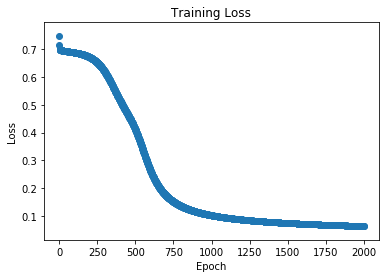

In [5]:
epochs = 2000
epsilon = 1
initial_weights = copy.deepcopy(weights)
    
losses = []
for epoch in range(epochs):
    gradients, L = back_propagation(X, Y, weights)
    for weight_name in weights:
        weights[weight_name] -= epsilon * gradients[weight_name]
        
    losses.append(L)
    
plt.scatter(range(epochs), losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

As we can see in the plot above where the loss is plotted with respect to the number of epochs the network experienced, we clearly observed a decrease of the loss. In other words, the network seems to make less and less errors. In other words, it learns something.

### Visualize what the network learned
Before to see what the network learned, it would be interesting to see how the initial weights of the network would perform.

In [6]:
def visualization(weights, X_data, title, superposed_training=False):
    N_test_points = 1000
    xs = np.linspace(1.1*np.min(X_data), 1.1*np.max(X_data), N_test_points)
    datapoints = np.transpose([np.tile(xs, len(xs)), np.repeat(xs, len(xs))])
    Y_initial = forward_propagation(datapoints, weights)[0].reshape(N_test_points, N_test_points)
    X1, X2 = np.meshgrid(xs, xs)
    plt.pcolormesh(X1, X2, Y_initial)
    plt.colorbar(label='P(1)')
    if superposed_training:
        plt.scatter(X_data[:N_points//2, 0], X_data[:N_points//2, 1], color='red') 
        plt.scatter(X_data[N_points//2:, 0], X_data[N_points//2:, 1], color='blue') 
    plt.title(title)
    plt.show()

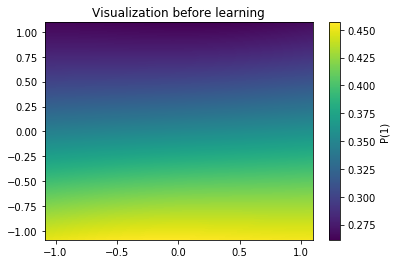

In [7]:
visualization(initial_weights, X,  'Visualization before learning')

The picture above represents as a colormap the probability of a point being of class 1. As expected, the network is completely unable yet to classify correctly. Let's visualize the same thing after learning:

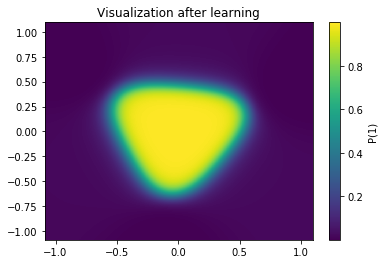

In [8]:
visualization(weights, X, 'Visualization after learning')

Now an island of class "1" lives in the middle of the map, while the rest is of class 0. If we superimpose the training samples to this visualization we realize that our network did a pretty good job classifying this map.

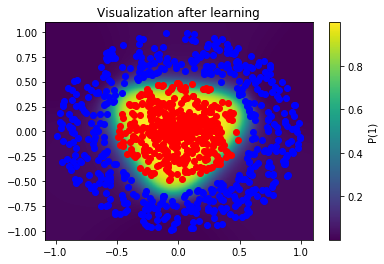

In [9]:
visualization(weights, X, 'Visualization after learning', superposed_training=True)

### With a XOR like distribution
Let's try our implementation with another distribution. 

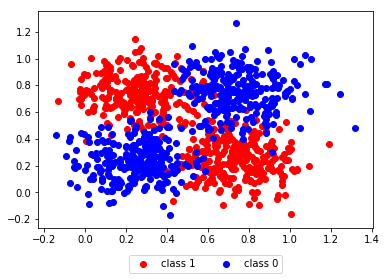

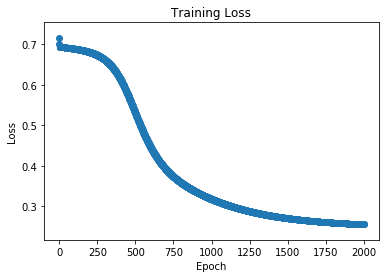

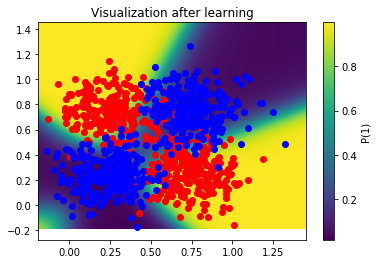

In [10]:
def generate_xor_like_dataset(N_points):
    # 1 class
    X_class_1 = np.concatenate(
        (np.concatenate(
            (np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1),
        np.concatenate(
            (np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1))
    )
    Y_class_1 = np.full((N_points//2,), 1)
        
    # 0 class
    X_class_0 = np.concatenate(
        (np.concatenate(
            (np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1),
        np.concatenate(
            (np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1))
    )
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y
    
xor_X, xor_Y = generate_xor_like_dataset(N_points)

plt.scatter(xor_X[:N_points//2, 0], xor_X[:N_points//2, 1], color='red', label='class 1') 
plt.scatter(xor_X[N_points//2:, 0], xor_X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

xor_weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
xor_initial_weights = copy.deepcopy(xor_weights)
xor_losses = []
for epoch in range(epochs):
    gradients, L = back_propagation(xor_X, xor_Y, xor_weights)
    for weight_name in xor_weights:
        xor_weights[weight_name] -= epsilon * gradients[weight_name]
        
    xor_losses.append(L)
    
plt.scatter(range(epochs), xor_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

visualization(xor_weights, xor_X, 'Visualization after learning', superposed_training=True)

## Conclusion
As a conclusion, backpropagation is not an extremely complicated algorithm, and as we have seen above, it is pretty straightforward to derive a bare numpy implementation for it. Although it comes out of the box with most of the deep learning frameworks, it is a good idea to get your hands dirty and understand a little bit more what it does. In some occasions, it might help you understand why your network is not learning properly.